In [8]:
import os
import re
import pandas as pd

# Path to the specific CSV file
file_path = './comments/Luis Fonsi - Despacito ft. Daddy Yankee.csv'

# Compile the emoji detection pattern
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "\U00002702-\U000027B0"  # Miscellaneous Symbols
    "\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

# Process the specific file
try:
    # Use on_bad_lines='skip' to skip malformed rows
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    df['video'] = os.path.basename(file_path)  # Add a column to identify the source file
    df['contains_emoji'] = df['comment'].str.contains(emoji_pattern, na=False)  # Identify rows with emojis
    print(f"Total records in the file: {df.shape[0]}")
    print(f"Records with emojis: {df['contains_emoji'].sum()}")
    
    # Display the first few rows for verification
    print(df.head())
except Exception as e:
    print(f"Error processing file {file_path}: {e}")


Total records in the file: 50000
Records with emojis: 21546
                    user_id                     username  \
0  UCDNllpqfVnHLxM88HWQ7sHw                  @LanceCrizz   
1  UCt4feOVezNGLhfGuuEH7nxQ               @user2v5h7k5vQ   
2  UCA0mVOxbVKl8rOnldZBB7fA                @Maheshkc9977   
3  UCStqWjoRLddeQPK-RFfWZhg  @isacarcortijocasafranca897   
4  UCeNH_RZFX8_z16RIh4XYO_g                  @BhutanbaII   

                                             comment  likes  replies  \
0  This is the most viewed music video ever, that...      0        0   
1                                            8.5 md😮      1        0   
2                          My also check out guys 😭😭      0        0   
3                                      Soy el 53M 😮🎉      2        1   
4       How baby shark got more views ill never know      0        0   

                   date                                        video  \
0  2024-10-20T15:24:51Z  Luis Fonsi - Despacito ft. Daddy Yankee.csv   
1 

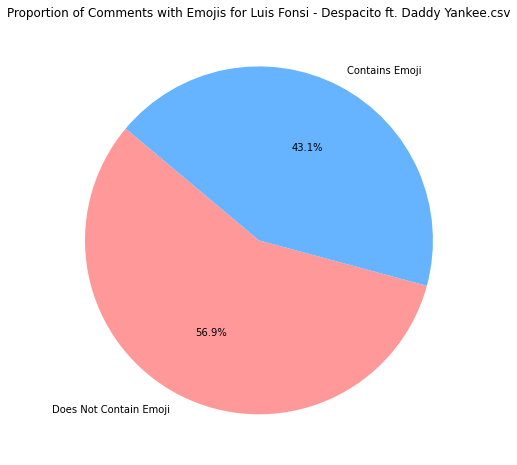

In [9]:
import matplotlib.pyplot as plt
# Count rows with and without emojis
emoji_counts = df['contains_emoji'].value_counts()
labels = ['Does Not Contain Emoji','Contains Emoji']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Comments with Emojis for Luis Fonsi - Despacito ft. Daddy Yankee.csv')
plt.show()

In [10]:
def count_emojis(text):
    return len(emoji_pattern.findall(text))
data_emoji = df[df['contains_emoji'] == True]
data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)
data_filtered = data_emoji[(data_emoji['emoji_count'] <= 4) & (data_emoji['comment'].str.len() <= 100)]
data_filtered

<ipython-input-10-9dc44fd67257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)


user_id                     username  \
1      UCt4feOVezNGLhfGuuEH7nxQ               @user2v5h7k5vQ   
2      UCA0mVOxbVKl8rOnldZBB7fA                @Maheshkc9977   
3      UCStqWjoRLddeQPK-RFfWZhg  @isacarcortijocasafranca897   
6      UCzbHuyJfJbrW6J5gKUCg-lg                  @Holymonkvr   
10     UCcU591i7sGLKUzpI4IP93qw           @MADUWA_MUSIC_LIFE   
...                         ...                          ...   
49988  UCe5HRhDF92ms7_rpNomPiGw             @arishanishi2566   
49990  UCmhmqZ1n_UAoM4sYBmOTwLA               @fransjhon7999   
49992  UC1udu1brBa6XqSY8gzWJazg                     @Tshidow   
49995  UCdpZPpZEE13tn9F-8DRXtrg        @webertyqueiroz-px2sw   
49997  UCVlZRda0yukGg_FQYjBE-8w          @syedaltafpatel2000   

                                        comment  likes  replies  \
1                                       8.5 md😮      1        0   
2                     My also check out guys 😭😭      0        0   
3                                 Soy el 53M 😮🎉      2        1   
6      Bluds views is the popularity of earth😭🙏      1        0   
10                                      2024 ❤️      0        0   
...                                         ...    ...      ...   
49988                                     2024❤      0        0   
49990                                      Dja🎉      0        0   
49992                  I am from Pakistan 🇵🇰❤🇵🇸      0        0   
49995                                  2024🇧🇷🇧🇷      0        0   
49997                  Still listen in 2024 ..💰      0        0   

                       date                                        video  \
1      2024-10-20T15:11:23Z  Luis Fonsi - Despacito ft. Daddy Yankee.csv   
2      2024-10-20T15:01:41Z  Luis Fonsi - Despacito ft. Daddy Yankee.csv   
3      2024-10-20T14:54:16Z  Luis Fonsi - Despacito ft. Daddy Yankee.csv   
6      2024-10-20T14:20:29Z  Luis Fonsi - Despacito ft. Daddy Yankee.csv   
10     2024-10-20T14:02:26Z  Luis Fonsi - Despacito ft. Daddy Yankee.csv   
...                     ...                                          ...   
49988  2024-03-08T03:21:47Z  Luis Fonsi - Despacito ft. Daddy Yankee.csv   
49990  2024-03-08T02:53:40Z  Luis Fonsi - Despacito ft. Daddy Yankee.csv   
49992  2024-03-08T02:41:40Z  Luis Fonsi - Despacito ft. Daddy Yankee.csv   
49995  2024-03-08T01:52:00Z  Luis Fonsi - Despacito ft. Daddy Yankee.csv   
49997  2024-03-08T01:37:23Z  Luis Fonsi - Despacito ft. Daddy Yankee.csv   

       contains_emoji  emoji_count  
1                True            1  
2                True            1  
3                True            1  
6                True            1  
10               True            1  
...               ...          ...  
49988            True            1  
49990            True            1  
49992            True            1  
49995            True            1  
49997            True            1  

[20413 rows x 9 columns]

In [11]:
import os
import re
import time
from deep_translator import GoogleTranslator
from langdetect import detect
import pandas as pd

# Define the function to extract emojis
def extract_emojis(text):
    """Extract all emojis from a given text."""
    emoji_pattern = re.compile("[\U00010000-\U0010ffff]", flags=re.UNICODE)
    return ''.join(emoji_pattern.findall(text))

# Define the function to translate text
def translate_to_english(row):
    try:
        text = row['comment']
        row_number = row.name + 1  # Get the row number (1-indexed)
        
        # Extract emojis
        emojis = extract_emojis(text)
        
        # Remove emojis before translation
        text_without_emojis = re.sub(r'[^\w\s]', '', text)  # Only keep words, remove non-alphabetical characters
        
        # Handle emoji-only text or empty text
        if not text_without_emojis.strip():
            print(f"Row {row_number}: Text contains only emojis or is empty: {text}")
            return text  # Return original text if no translatable content
        
        # Detect language
        detected_language = detect(text_without_emojis)
        print(f"Row {row_number}: Detected language: {detected_language}")

        # Translate if necessary
        if detected_language != 'en':
            translation = GoogleTranslator(target='en').translate(text_without_emojis)
        else:
            translation = text_without_emojis  # Keep the original if it's English

        # Append emojis to the translated text
        translated_with_emojis = f"{translation} {emojis}".strip()
        time.sleep(0.5)  # Respect the rate limit
        print(f"Row {row_number}: Original: {text}, Translated: {translated_with_emojis}")
        return translated_with_emojis
    except Exception as e:
        print(f"Row {row_number}: Error translating text: {text}, Error: {e}")
        return text

# Output folder and file setup
output_folder = './translated_comments_folder4'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'Luis_Fonsi_Despacito_translated_comments.csv')

# Process each row and save results
with open(output_file, 'a', encoding='utf-8') as f:
    # Write header if the file is empty
    if os.path.getsize(output_file) == 0:
        f.write("row_number,original_comment,translated_comment\n")
    
    # Apply the translation function row by row
    for _, row in data_emoji.iterrows():
        row_number = row.name + 1
        original_comment = row['comment']
        translated_comment = translate_to_english(row)
        
        # Append the row to the CSV
        f.write(f"{row_number},{original_comment},{translated_comment}\n")
        print(f"Row {row_number} saved.")


Row 2: Detected language: cy
Row 2: Original: 8.5 md😮, Translated: 85 md 😮
Row 2 saved.
Row 3: Detected language: en
Row 3: Original: My also check out guys 😭😭, Translated: My also check out guys  😭😭
Row 3 saved.
Row 4: Detected language: es
Row 4: Original: Soy el 53M 😮🎉, Translated: I am the 53M 😮🎉
Row 4 saved.
Row 7: Detected language: en
Row 7: Original: Bluds views is the popularity of earth😭🙏, Translated: Bluds views is the popularity of earth 😭🙏
Row 7 saved.
Row 10: Detected language: ja
Row 10: Original: 🇮🇶⁦༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ⁩, Translated: one 🇮🇶
Row 10 saved.
Row 11: Error translating text: 2024 ❤️, Error: No features in text.
Row 11 saved.
Row 12: Detected language: fr
Row 12: Original: Cette fille 👧 qui monte ses fesse a bit ou quoi 😮😮😮😮😮😮😮😮😮😊, Translated: This girl who shows her ass a bit or something 👧😮😮😮😮😮😮😮😮😮😊
Row 12 saved.
Row 14: Detected language: en
Row 14: Original: 🥰🥰🥰🥰🥰✈️✈️🛫🛫🛫 I Love you and she is a call back 💕 yr 😘 you 🤬 me To you 🙏 I need a cable for it 🙏 I, T

Row 146: Original: A NADIE LE IMPORTA EN QUE AÑO LA ESCUCHARON 😂, Translated: NOBODY CARES WHAT YEAR THEY LISTENED TO IT 😂
Row 146 saved.
Row 147: Detected language: af
Row 147: Original: 8.5b views, 20/10/2024🔥, Translated: 85b views 20102024 🔥
Row 147 saved.
Row 149: Error translating text: 2024👀🇧🇷❤️, Error: No features in text.
Row 149 saved.
Row 151: Detected language: en
Row 151: Original: fire 🔥, Translated: fire  🔥
Row 151 saved.
Row 155: Detected language: so
Row 155: Original: Baby Shark 😂, Translated: Baby Shark 😂
Row 155 saved.
Row 157: Detected language: ru
Row 157: Original: я тут тока адин русский 😭🇷🇺, Translated: I'm the only Russian here 😭🇷🇺
Row 157 saved.
Row 160: Detected language: en
Row 160: Original: STREAM HEYA BY IVE ❤❤, Translated: STREAM HEYA BY IVE
Row 160 saved.
Row 161: Detected language: en
Row 161: Original: I sang this to a friend ahhaha😂, Translated: I sang this to a friend ahhaha 😂
Row 161 saved.
Row 166: Detected language: en
Row 166: Original: 8 billi

Row 251: Original: I searched YouTube highest watch' video and come this song i was shocked 😳 to see this view's  and this song was 7 years old.. love from India ♥️♥️, Translated: I searched YouTube highest watch video and come this song i was shocked  to see this views  and this song was 7 years old love from India  😳
Row 251 saved.
Row 252: Detected language: en
Row 252: Original: 19 oct 2024 India 🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🙏🙏🙏🙏🙏, Translated: 19 oct 2024 India  🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🙏🙏🙏🙏🙏
Row 252 saved.
Row 255: Detected language: en
Row 255: Original: Came for the song. Stayed for the hot latinas 😍, Translated: Came for the song Stayed for the hot latinas  😍
Row 255 saved.
Row 256: Detected language: es
Row 256: Original: No me cansó de escucharla !!!🎉, Translated: I never got tired of listening to it 🎉
Row 256 saved.
Row 260: Detected language: en
Row 260: Original: 19/10/24 from Thailand.👍👍👍🤞🤞🤞, Translated: 191024 from Thailand 👍👍👍🤞🤞🤞
Row 260 saved.
Row 261: Detected language: et
Row 261: Original: ESTO NUNC

Row 368: Original: 19 октября 2024 года 😀 о х у е т ь, Translated: October 19, 2024 oh f u c k 😀
Row 368 saved.
Row 369: Detected language: en
Row 369: Original: I added to a comment to keep it up lol 2024 😂, Translated: I added to a comment to keep it up lol 2024  😂
Row 369 saved.
Row 371: Text contains only emojis or is empty: 💪
Row 371 saved.
Row 377: Detected language: es
Row 377: Original: Alguien de octubre del 2024?❤, Translated: Someone from October 2024
Row 377 saved.
Row 378: Detected language: en
Row 378: Original: This song has more views than the population of the world. 😱😱😱, Translated: This song has more views than the population of the world  😱😱😱
Row 378 saved.
Row 379: Detected language: en
Row 379: Original: The lyrics: 🤔🤔🤔
Those who understand the lyrics: 😳
The vibe: 💯💯💯, Translated: The lyrics 
Those who understand the lyrics 
The vibe  🤔🤔🤔😳💯💯💯
Row 379 saved.
Row 381: Detected language: so
Row 381: Original: 19.10.24❤7.34am, Translated: 191024734am
Row 381 saved.
Ro

Row 506: Original: Keeping this comment so if someone like i remember about this song and watch it again and again 😅, Translated: Keeping this comment so if someone like i remember about this song and watch it again and again  😅
Row 506 saved.
Row 508: Text contains only emojis or is empty: 🤟😩😵❣️
Row 508 saved.
Row 510: Detected language: ro
Row 510: Original: 18oct 2024❤😂, Translated: 18oct 2024 😂
Row 510 saved.
Row 518: Detected language: ko
Row 518: Original: 넌. 깡, Translated: You are a jerk
Row 518 saved.
Row 522: Detected language: tl
Row 522: Original: Anyone 2025😅😅, Translated: Anyone 2025 😅😅
Row 522 saved.
Row 523: Detected language: cy
Row 523: Original: Lyrics💀💀💀, Translated: Lyrics 💀💀💀
Row 523 saved.
Row 524: Detected language: en
Row 524: Original: October 2024, 🗿🗿, Translated: October 2024  🗿🗿
Row 524 saved.
Row 525: Detected language: ko
Row 525: Original: 자막에 한국어 추가 부탁드립니다, Translated: Please add Korean to the subtitles
Row 525 saved.
Row 530: Detected language: en
Row 5

Row 661: Original: Hello 2030 guys 😂❤, Translated: Hello 2030 guys 😂
Row 661 saved.
Row 662: Detected language: en
Row 662: Original: Right now 18 October 3 am 😂, Translated: Right now 18 October 3 am  😂
Row 662 saved.
Row 663: Detected language: en
Row 663: Original: Again here ❤️, Translated: Again here
Row 663 saved.
Row 665: Detected language: en
Row 665: Original: October,18,2024 here🎉, Translated: October182024 here 🎉
Row 665 saved.
Row 668: Error translating text: 1:27 💀💀💀, Error: No features in text.
Row 668 saved.
Row 669: Text contains only emojis or is empty: 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉❤❤❤❤❤❤❤❤❤❤❤❤❤❤ ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 669 saved.
Row 670: Detected language: de
Row 670: Original: BestbSong🎉🎉🎉🎉, Translated: BestbSong 🎉🎉🎉🎉
Row 670 saved.
Row 675: Detected language: th
Row 675: Original: เพลงพี่ผมชอบมากครับ เนื้อหาเพลง ดีมากครับ🇹🇭🙏🚵🏿‍♂️ขอบคุณครับ, Translated: I really like this song. The lyrics are complete. Thank you very much. 🇹🇭🙏🚵🏿
Row 675 saved.
Row 679: Det

Row 765: Original: How can it be even possible, 8.5 billion views which means nthe entire population on earth has watched it😮😮😮😮, Translated: How can it be even possible 85 billion views which means nthe entire population on earth has watched it 😮😮😮😮
Row 765 saved.
Row 767: Detected language: en
Row 767: Original: Life was good when this song was trending 😌
Those times....., Translated: Life was good when this song was trending 
Those times 😌
Row 767 saved.
Row 769: Detected language: vi
Row 769: Original: Một bài hát latin tuyệt vời Việt Nam ❤❤❤❤22/12/2024🎉🎉🎉, Translated: A great latin song Vietnam 22122024 🎉🎉🎉
Row 769 saved.
Row 770: Detected language: en
Row 770: Original: This song is YouTube's most liked and viewed song oawwwww❤❤❤, Translated: This song is YouTubes most liked and viewed song oawwwww
Row 770 saved.
Row 772: Detected language: en
Row 772: Original: Love from🇳🇵🇳🇵, Translated: Love from 🇳🇵🇳🇵
Row 772 saved.
Row 773: Text contains only emojis or is empty: 😂
Row 773 save

Row 901: Original: 16 October 2024 ❤❤❤ 
Love from.India, Translated: 16 October 2024  
Love fromIndia
Row 901 saved.
Row 903: Detected language: en
Row 903: Original: HOLA ❤  LOVE ❤️ FROM USA ❤
NORTH WEST  USA, Translated: HOLA   LOVE  FROM USA 
NORTH WEST  USA
Row 903 saved.
Row 904: Detected language: es
Row 904: Original: 17octubre 2024❤, Translated: 17octubre 2024
Row 904 saved.
Row 905: Text contains only emojis or is empty: 🗿💯🔥.
Row 905 saved.
Row 909: Detected language: ko
Row 909: Original: 빠구리권장송인가, Translated: Is this a recommended song for a baguri?
Row 909 saved.
Row 913: Detected language: en
Row 913: Original: Any Rwandan here ❤, Translated: Any Rwandan here
Row 913 saved.
Row 917: Detected language: sw
Row 917: Original: ❤ amo, Translated: amo
Row 917 saved.
Row 918: Detected language: en
Row 918: Original: Who came to watch it in 2024?👋👋, Translated: Who came to watch it in 2024 👋👋
Row 918 saved.
Row 920: Detected language: es
Row 920: Original: Alguien el 16 de octubre

Row 1026: Original: 8 ونص مليار مشاهدة😮🎉, Translated: 8 and a half billion views 😮🎉
Row 1026 saved.
Row 1027: Detected language: es
Row 1027: Original: Amor desde la India Despacito❤, Translated: Love from India Despacito
Row 1027 saved.
Row 1030: Error translating text: 2025 ❤❤❤❤❤❤, Error: No features in text.
Row 1030 saved.
Row 1031: Error translating text: 1/1/2030 😅😅, Error: No features in text.
Row 1031 saved.
Row 1034: Detected language: sv
Row 1034: Original: 2024  octomber 15 ❤, Translated: 2024 October 15
Row 1034 saved.
Row 1035: Detected language: ko
Row 1035: Original: 항상 늘 행복하세요, Translated: Always be happy
Row 1035 saved.
Row 1038: Detected language: id
Row 1038: Original: Dunyodagi barcha insonlar koʻrgan ekan 8,5milliard odam 😱, Translated: All the people in the world have seen it, 85 billion people 😱
Row 1038 saved.
Row 1039: Detected language: et
Row 1039: Original: Հայաստան 🇦🇲🇦🇲🇦🇲❤, Translated: Armenia 🇦🇲🇦🇲🇦🇲
Row 1039 saved.
Row 1041: Detected language: no
Row 1041:

Row 1159: Original: 2024, 15 october, From Bangladesh ❤️❤️, Translated: 2024 15 october From Bangladesh
Row 1159 saved.
Row 1161: Detected language: en
Row 1161: Original: So did yall come here to check the views too?😂, Translated: So did yall come here to check the views too 😂
Row 1161 saved.
Row 1162: Detected language: en
Row 1162: Original: 16th October 2024❤️, Translated: 16th October 2024
Row 1162 saved.
Row 1165: Detected language: tl
Row 1165: Original: Any 2024😊, Translated: Any 2024 😊
Row 1165 saved.
Row 1166: Detected language: en
Row 1166: Original: Baby shark is better🗿, Translated: Baby shark is better 🗿
Row 1166 saved.
Row 1167: Detected language: en
Row 1167: Original: 15 October any one here😂, Translated: 15 October any one here 😂
Row 1167 saved.
Row 1168: Detected language: en
Row 1168: Original: I love this song sooooooooooooooo much and I'm 8 years old ❤❤❤❤, Translated: I love this song sooooooooooooooo much and Im 8 years old
Row 1168 saved.
Row 1174: Detected lang

Row 1267: Original: Mantap bang,😎😎😎😎 uuuuuu, Translated: Awesome bro uuuuuu 😎😎😎😎
Row 1267 saved.
Row 1268: Detected language: no
Row 1268: Original: Mike Tyson💀💀, Translated: Mike Tyson 💀💀
Row 1268 saved.
Row 1269: Detected language: en
Row 1269: Original: everyone😅, Translated: everyone 😅
Row 1269 saved.
Row 1270: Detected language: fr
Row 1270: Original: Best song🎵, Translated: Best song 🎵
Row 1270 saved.
Row 1272: Detected language: no
Row 1272: Original: Dream village ❤❤️‍🩹, Translated: Dream village 🩹
Row 1272 saved.
Row 1274: Text contains only emojis or is empty: ❤
Row 1274 saved.
Row 1275: Detected language: en
Row 1275: Original: Pov: it's summer 2017 we all💀☠️, Translated: Pov its summer 2017 we all 💀
Row 1275 saved.
Row 1277: Text contains only emojis or is empty: 👍
Row 1277 saved.
Row 1278: Text contains only emojis or is empty: 😚💙
Row 1278 saved.
Row 1279: Detected language: en
Row 1279: Original: Any one today Listen 🙏🙏, Translated: Any one today Listen  🙏🙏
Row 1279 saved

Row 1309: Original: ™ SLOWLY...........


          ₩●●d$+○C/<2○25
          OOOOO$!×/\/🐝



5.183M, Translated: SLOWLY


          dC225
          OOOOO



5183M 🐝
Row 1309 saved.
Row 1315: Detected language: es
Row 1315: Original: 8,563,236,705 vistas en 7 años? Borra la cuenta 🔥, Translated: 8563236705 views in 7 years Delete account 🔥
Row 1315 saved.
Row 1316: Text contains only emojis or is empty: ❤❤❤❤😊
Row 1316 saved.
Row 1318: Text contains only emojis or is empty: ❤❤❤💃💃🥂🥂
Row 1318 saved.
Row 1323: Detected language: en
Row 1323: Original: Now I m going to learn Spanish.......👍, Translated: Now I m going to learn Spanish 👍
Row 1323 saved.
Row 1324: Detected language: fi
Row 1324: Original: 8 Billi! Salute!✌️❤️🙏💯, Translated: 8 Billi Health 🙏💯
Row 1324 saved.
Row 1325: Detected language: af
Row 1325: Original: Sep 14🎉7:20, Translated: Sep 14720 🎉
Row 1325 saved.
Row 1335: Detected language: es
Row 1335: Original: Alguien en octubre del 2024 😢 edit 1 gracias por los 3 likes me pue

Row 1475: Original: Begging give 😂😂😂, Translated: Begging give 😂😂😂
Row 1475 saved.
Row 1477: Detected language: en
Row 1477: Original: World population 8 billion and this song views 8.5 billion 😮😮😮, Translated: World population 8 billion and this song views 85 billion  😮😮😮
Row 1477 saved.
Row 1481: Detected language: it
Row 1481: Original: Ai !!! Fonzi 🌊 vi" la stava chiamando/💚💛, Translated: Fonzi was calling you 🌊💚💛
Row 1481 saved.
Row 1482: Error translating text: 2024❤❤❤
2027❤❤❤❤, Error: No features in text.
Row 1482 saved.
Row 1486: Detected language: en
Row 1486: Original: Song views❌ World population ✅, Translated: Song views World population
Row 1486 saved.
Row 1487: Detected language: en
Row 1487: Original: World wide population 8.2 billion
Despacito views 8.5😂


DESPACITO ON TOP❤, Translated: World wide population 82 billion
Despacito views 85


DESPACITO ON TOP 😂
Row 1487 saved.
Row 1489: Detected language: sw
Row 1489: Original: Hi ☺️☺️ hi 🤠😮😮😮, Translated: Hi hi 🤠😮😮😮
Row 1

Row 1587: Original: Остановите пожалуйста время 😢, Translated: Please stop time 😢
Row 1587 saved.
Row 1588: Detected language: en
Row 1588: Original: Anyone in October 2024 😂, Translated: Anyone in October 2024  😂
Row 1588 saved.
Row 1594: Detected language: en
Row 1594: Original: Father Moncloa 5 🎉, Translated: Father Moncloa 5  🎉
Row 1594 saved.
Row 1595: Detected language: en
Row 1595: Original: 13 October 2024 Canada 🇨🇦, Translated: 13 October 2024 Canada  🇨🇦
Row 1595 saved.
Row 1600: Detected language: fr
Row 1600: Original: ❤🙏🌬☘LUCKY, Translated: LUCKY 🙏🌬
Row 1600 saved.
Row 1601: Detected language: en
Row 1601: Original: 2017: people come to listen song 
2024: people come to check viewers ❤😂, Translated: 2017 people come to listen song 
2024 people come to check viewers  😂
Row 1601 saved.
Row 1608: Detected language: tr
Row 1608: Original: 2024 dinleyenler 😊, Translated: 2024 listeners 😊
Row 1608 saved.
Row 1612: Detected language: en
Row 1612: Original: 2017 to 2024 ❤, Translat

Row 1696: Original: This is the most viewed song on YouTube 🗿🗿🗿💯💯💯, Translated: This is the most viewed song on YouTube  🗿🗿🗿💯💯💯
Row 1696 saved.
Row 1697: Detected language: en
Row 1697: Original: English or Spanish 😢, Translated: English or Spanish  😢
Row 1697 saved.
Row 1698: Detected language: en
Row 1698: Original: Today 13th Oct,2024 views is 8.5 billion 😮, Translated: Today 13th Oct2024 views is 85 billion  😮
Row 1698 saved.
Row 1700: Error translating text: 2027 ✋🏻, Error: No features in text.
Row 1700 saved.
Row 1701: Detected language: pt
Row 1701: Original: ²⁰⁵⁰😮, Translated: ²⁰⁵⁰ 😮
Row 1701 saved.
Row 1702: Detected language: pt
Row 1702: Original: ²⁰²⁴👌, Translated: ²⁰²⁴ 👌
Row 1702 saved.
Row 1706: Text contains only emojis or is empty: ❤
Row 1706 saved.
Row 1707: Text contains only emojis or is empty: 😂😂
Row 1707 saved.
Row 1708: Error translating text: 100000000❤😂😂😂, Error: No features in text.
Row 1708 saved.
Row 1710: Detected language: en
Row 1710: Original: 13 October 

Row 1818: Original: 2023 i miss you 😢😢, Translated: 2023 i miss you 😢😢
Row 1818 saved.
Row 1819: Error translating text: 2025 😢😢😢, Error: No features in text.
Row 1819 saved.
Row 1831: Detected language: es
Row 1831: Original: 12 de octubre 2024😅, Translated: October 12, 2024 😅
Row 1831 saved.
Row 1833: Text contains only emojis or is empty: ❤
Row 1833 saved.
Row 1835: Detected language: af
Row 1835: Original: 8.5B views😮👀, Translated: 85B views 😮👀
Row 1835 saved.
Row 1837: Detected language: en
Row 1837: Original: Ah yeah finally got my bluetooth speaker charged up!! Playing my fav game, Annoy the neighbors!! 😊 Rockin a little of everything in my diverse musical world!! Yay music...keeping me relatively sane!!, Translated: Ah yeah finally got my bluetooth speaker charged up Playing my fav game Annoy the neighbors  Rockin a little of everything in my diverse musical world Yay musickeeping me relatively sane 😊
Row 1837 saved.
Row 1838: Text contains only emojis or is empty: ❤
Row 1838 s

Row 1930: Original: 8.7 billion😮😮, Translated: 87 billion 😮😮
Row 1930 saved.
Row 1934: Detected language: en
Row 1934: Original: 🎉8 billion humans on but uhhhhhhh😮, Translated: 8 billion humans on but uhhhhhhh 🎉😮
Row 1934 saved.
Row 1940: Detected language: cy
Row 1940: Original: Yes y 2050😅, Translated: Yes y 2050 😅
Row 1940 saved.
Row 1941: Detected language: ar
Row 1941: Original: 8 مليار و 500 مليون وعالم كلها 8 مليار 500 مليون هم مخلوقات فضائية 👽👽💀, Translated: 8 billion and 500 million and the whole world is 8 billion and 500 million they are aliens 👽👽💀
Row 1941 saved.
Row 1944: Text contains only emojis or is empty: 🇧🇷
Row 1944 saved.
Row 1946: Detected language: lt
Row 1946: Original: Bodimais❤😂🎉, Translated: Bodimais 😂🎉
Row 1946 saved.
Row 1947: Detected language: pt
Row 1947: Original: Alguém em 2025 ? 
Brasil 🇧🇷🇧🇷, Translated: Someone in 2025
Brazil 🇧🇷🇧🇷
Row 1947 saved.
Row 1948: Detected language: af
Row 1948: Original: I want 1000 likes! 😢, Translated: I want 1000 likes 😢


Row 2036: Original: 🎉🎉😢😢🎉🎉 2024 12 October Morning 6:10 AM, Translated: 2024 12 October Morning 610 AM 🎉🎉😢😢🎉🎉
Row 2036 saved.
Row 2037: Detected language: no
Row 2037: Original: understand❌
enjoy☑️, Translated: understand
enjoy
Row 2037 saved.
Row 2040: Detected language: tl
Row 2040: Original: Anyone in 2026❤, Translated: Anyone in 2026
Row 2040 saved.
Row 2043: Text contains only emojis or is empty: 😢❤
Row 2043 saved.
Row 2046: Detected language: pl
Row 2046: Original: Views😮😮😮😮😂😂😂😂😂, Translated: Views 😮😮😮😮😂😂😂😂😂
Row 2046 saved.
Row 2047: Detected language: ru
Row 2047: Original: Октябрь 2024😍😍😍😍, Translated: October 2024 😍😍😍😍
Row 2047 saved.
Row 2048: Detected language: en
Row 2048: Original: Who's waiting for 10 Billion Views 😂😂, Translated: Whos waiting for 10 Billion Views  😂😂
Row 2048 saved.
Row 2049: Detected language: en
Row 2049: Original: Just checking in on the views. 😂😂, Translated: Just checking in on the views  😂😂
Row 2049 saved.
Row 2050: Detected language: en
Row 2050: 

Row 2181: Original: 2024 out?😮, Translated: 2024 out 😮
Row 2181 saved.
Row 2182: Detected language: en
Row 2182: Original: Today is my birthday but no one wish me😢, Translated: Today is my birthday but no one wish me 😢
Row 2182 saved.
Row 2184: Detected language: en
Row 2184: Original: The background dance ☠️☠️💀💀☠️☠️💀💀, Translated: The background dance  💀💀💀💀
Row 2184 saved.
Row 2188: Detected language: en
Row 2188: Original: Congratulate for 8 billion.. 🍷🗿, Translated: Congratulate for 8 billion  🍷🗿
Row 2188 saved.
Row 2190: Detected language: en
Row 2190: Original: 8 billion people in the world and 8.5 billion views on this. literally, the whole world has watched it❤, Translated: 8 billion people in the world and 85 billion views on this literally the whole world has watched it
Row 2190 saved.
Row 2191: Detected language: en
Row 2191: Original: 2017 People Come listening the song
2024 people Come to check the view 😂 True or false, Translated: 2017 People Come listening the song
2024 p

Row 2296: Original: 8 billion views is really insane😮, Translated: 8 billion views is really insane 😮
Row 2296 saved.
Row 2297: Detected language: en
Row 2297: Original: ❤ OCTOBER 2024 😂 ANYONE SAY HELLO..... WELL THIS SONG IS 7 YEARS OLD😂😂😂😂, Translated: OCTOBER 2024  ANYONE SAY HELLO WELL THIS SONG IS 7 YEARS OLD 😂😂😂😂😂
Row 2297 saved.
Row 2299: Detected language: en
Row 2299: Original: 2024 oct 10th in kerala❤, Translated: 2024 oct 10th in kerala
Row 2299 saved.
Row 2300: Detected language: en
Row 2300: Original: The views 💀💀💀
That’s like the whole world, Translated: The views 
Thats like the whole world 💀💀💀
Row 2300 saved.
Row 2301: Text contains only emojis or is empty: ❤️
Row 2301 saved.
Row 2304: Text contains only emojis or is empty: ❤❤❤❤❤
Row 2304 saved.
Row 2308: Detected language: ja
Row 2308: Original: なんでか知らないけど日本語字幕あるの神やろ, Translated: I don't know why, but it has Japanese subtitles.
Row 2308 saved.
Row 2309: Detected language: es
Row 2309: Original: alguien en 2024??    
¡

Row 2422: Original: Almost all over world listen this song 😂❤, Translated: Almost all over world listen this song  😂
Row 2422 saved.
Row 2429: Detected language: tl
Row 2429: Original: Anyone in 2200?❤, Translated: Anyone in 2200
Row 2429 saved.
Row 2433: Detected language: en
Row 2433: Original: 2017 : People Came to listen song ❤️‍🩹🖐️📌
2030 : People Came to Check views And Comment 😱

Me Check For 2030 Year Later 👀🖐️  

Thank you So much Check My Comment ☺️, Translated: 2017  People Came to listen song 
2030  People Came to Check views And Comment 

Me Check For 2030 Year Later   

Thank you So much Check My Comment  🩹🖐📌😱👀🖐
Row 2433 saved.
Row 2434: Detected language: ca
Row 2434: Original: Qui en 09 octobre 2025😂 Ali Wal Hamid Djibrail 😊😂😂, Translated: Who in October 09, 2025 Ali Wal Hamid Djibrail 😂😊😂😂
Row 2434 saved.
Row 2436: Detected language: en
Row 2436: Original: I m from  India ❤❤, Translated: I m from  India
Row 2436 saved.
Row 2438: Detected language: en
Row 2438: Original:

Row 2542: Original: 8.5 billion views wow soon.....10 billion😉, Translated: 85 billion views wow soon10 billion 😉
Row 2542 saved.
Row 2543: Detected language: en
Row 2543: Original: 👇Who has came here to check if it reached 9 billion 🗿, Translated: Who has came here to check if it reached 9 billion  👇🗿
Row 2543 saved.
Row 2548: Detected language: es
Row 2548: Original: Video 🤡 
Audio 🗿, Translated: Video  
Audio 🤡🗿
Row 2548 saved.
Row 2549: Error translating text: 2024❤, Error: No features in text.
Row 2549 saved.
Row 2551: Detected language: tl
Row 2551: Original: Anyone 2024 😊😊😊, Translated: Anyone 2024 😊😊😊
Row 2551 saved.
Row 2557: Detected language: it
Row 2557: Original: Loda song😅, Translated: Loda song 😅
Row 2557 saved.
Row 2558: Detected language: en
Row 2558: Original: Nobody November 2024😢, Translated: Nobody November 2024 😢
Row 2558 saved.
Row 2559: Text contains only emojis or is empty: 😮
Row 2559 saved.
Row 2561: Text contains only emojis or is empty: 🇧🇩🇧🇩🇧🇩🇧🇩
Row 2561 sav

Row 2670: Original: Who's like the video 😊😊, Translated: Whos like the video  😊😊
Row 2670 saved.
Row 2672: Detected language: bn
Row 2672: Original: ২০২৪ সালের ০৯  অক্টোবর কেউ কি আছো। 😂😂😂, Translated: 2024 Solar 09 October Is there anyone? 😂😂😂
Row 2672 saved.
Row 2673: Detected language: af
Row 2673: Original: Look at views 😮😮, Translated: Look at views 😮😮
Row 2673 saved.
Row 2676: Detected language: en
Row 2676: Original: Per second😂😂😂, Translated: Per second 😂😂😂
Row 2676 saved.
Row 2680: Detected language: it
Row 2680: Original: 9 billion 🎉, Translated: 9 billion 🎉
Row 2680 saved.
Row 2681: Detected language: fr
Row 2681: Original: J adorais danser cette chanson à la Pachanga à  Paris 🎉, Translated: I loved dancing this song at the Pachanga in Paris 🎉
Row 2681 saved.
Row 2684: Detected language: en
Row 2684: Original: 8.55 million views, how this song has influenced us all.. I  remember listening to this masterpiece back in 2017❤, Translated: 855 million views how this song has influ

Row 2810: Original: I just came back to check the views 😂, Translated: I just came back to check the views  😂
Row 2810 saved.
Row 2815: Text contains only emojis or is empty: ❤❤❤❤❤🥰🥰😍😍😍🤩🤩🤩🤩🤩🤩🤩🤩💖💖💝💝💝🤩🤩🤩🥰🥰🥰💗💗💗🤩🤩🤩🤩😍😍🤩😍🤩😍🤩😍🤩😍🤩
Row 2815 saved.
Row 2817: Detected language: so
Row 2817: Original: 😊❤xD
🎉, Translated: xD 😊🎉
Row 2817 saved.
Row 2819: Text contains only emojis or is empty: 🇹🇲🇹🇷🇺🇿
Row 2819 saved.
Row 2821: Detected language: es
Row 2821: Original: Alguien 2025 october 😂😂, Translated: Someone 2025 october 😂😂
Row 2821 saved.
Row 2828: Detected language: de
Row 2828: Original: Well...Anyone in 2024 😅, Translated: WellAnyone in 2024 😅
Row 2828 saved.
Row 2830: Text contains only emojis or is empty: ❤❤❤
Row 2830 saved.
Row 2831: Detected language: en
Row 2831: Original: Half of us not even knowing Spanish but still listening to it💀💀👇, Translated: Half of us not even knowing Spanish but still listening to it 💀💀👇
Row 2831 saved.
Row 2834: Text contains only emojis or is empty: ❤❤❤
Row 28

Row 2930: Original: చాలా బాగా ఉంది❤😊, Translated: Good morning. 😊
Row 2930 saved.
Row 2932: Error translating text: 2024😢, Error: No features in text.
Row 2932 saved.
Row 2934: Detected language: vi
Row 2934: Original: July we tr ❤❤❤❤anh hạ ngien, Translated: July we return to you
Row 2934 saved.
Row 2936: Detected language: en
Row 2936: Original: The king of my dream im your lady in your dream exist pls in❤🎉❤, Translated: The king of my dream im your lady in your dream exist pls in 🎉
Row 2936 saved.
Row 2937: Detected language: en
Row 2937: Original: 4.2 million comments and 8.5 views, this song is amazing😮😮. 2024 almost end., Translated: 42 million comments and 85 views this song is amazing 2024 almost end 😮😮
Row 2937 saved.
Row 2940: Detected language: es
Row 2940: Original: Despacito fans Indonesia 🇮🇩, Translated: Despacito fans Indonesia 🇮🇩
Row 2940 saved.
Row 2943: Detected language: en
Row 2943: Original: Who watched 2080😂😂😂, Translated: Who watched 2080 😂😂😂
Row 2943 saved.
Row 

Row 3060: Original: hii song ni my farvourite  until today😍😍😍😍😍😍😍😍😍😍😍😍😍, Translated: hii song ni my farvourite  until today 😍😍😍😍😍😍😍😍😍😍😍😍😍
Row 3060 saved.
Row 3061: Detected language: so
Row 3061: Original: Hahahaahahah😂😂, Translated: Hahahahaha 😂😂
Row 3061 saved.
Row 3062: Detected language: en
Row 3062: Original: I’m gen alpha 
I came from future 2100
This song is still top of the universe ❤, Translated: Im gen alpha 
I came from future 2100
This song is still top of the universe
Row 3062 saved.
Row 3066: Text contains only emojis or is empty: ♠️♠️♠️🇻🇪🇻🇪🇻🇪🇻🇪🇻🇪😁🏆👍
Row 3066 saved.
Row 3068: Detected language: de
Row 3068: Original: ❤❤FC🇹🇭🇹🇭🇹🇭❤❤2024🎉, Translated: FC2024 🇹🇭🇹🇭🇹🇭🎉
Row 3068 saved.
Row 3069: Detected language: en
Row 3069: Original: WHO COMES TO CHECK VIDEO LIKES😅

ALSO LIKE THIS COMMENT ❤, Translated: WHO COMES TO CHECK VIDEO LIKES

ALSO LIKE THIS COMMENT  😅
Row 3069 saved.
Row 3072: Text contains only emojis or is empty: 🫢🇱🇦😍
Row 3072 saved.
Row 3075: Detected language: en


Row 3193: Original: Xfjvldkjcjendjxj❤😮, Translated: Xfjvldkjcjendjxj 😮
Row 3193 saved.
Row 3196: Detected language: es
Row 3196: Original: Quedo marcado en la número logia del tiempo que nunca pasa de moda.❤ 
Por que seguirá creciendo las vistas y pasará de generación en generación ❤❤❤ amén y 🙌 amen❤, Translated: I am marked in the numerology of time that never goes out of style 
Because the views will continue to grow and will be passed on from generation to generation amen and amen 🙌
Row 3196 saved.
Row 3197: Detected language: en
Row 3197: Original: I only came to check the views 😂, Translated: I only came to check the views  😂
Row 3197 saved.
Row 3198: Detected language: en
Row 3198: Original: Who Watching 2024 November 🎉, Translated: Who Watching 2024 November  🎉
Row 3198 saved.
Row 3212: Detected language: es
Row 3212: Original: 8 billones de visitas ☠️☠️, Translated: 8 billion views
Row 3212 saved.
Row 3217: Detected language: en
Row 3217: Original: Who know is dead 😂, Translate

Row 3335: Original: El comentario con más likes es GAY 😂, Translated: The comment with the most likes is GAY 😂
Row 3335 saved.
Row 3336: Detected language: es
Row 3336: Original: Escuchar este temazo en 2024 😮‍💨, Translated: Listen to this hit song in 2024 😮💨
Row 3336 saved.
Row 3337: Detected language: vi
Row 3337: Original: 5/10/2024 Để lại đây. Sau này con cháu ta sẽ thấy 😂, Translated: 5102024 Leave it here for our descendants to see. 😂
Row 3337 saved.
Row 3338: Detected language: en
Row 3338: Original: October 2024 😃, Translated: October 2024  😃
Row 3338 saved.
Row 3345: Detected language: en
Row 3345: Original: Me frm India😊, Translated: Me frm India 😊
Row 3345 saved.
Row 3354: Detected language: en
Row 3354: Original: Anyone in October 2024🫣😮‍💨, Translated: Anyone in October 2024 🫣😮💨
Row 3354 saved.
Row 3355: Detected language: en
Row 3355: Original: Soon it will be 10 billions💖
Agree or Cry😊, Translated: Soon it will be 10 billions
Agree or Cry 💖😊
Row 3355 saved.
Row 3358: Text

Row 3479: Original: 2030 gang 😂😂😂😂😂😂, Translated: 2030 gang 😂😂😂😂😂😂
Row 3479 saved.
Row 3480: Detected language: en
Row 3480: Original: People : Listening the song in 2024 🌚
Legends : Watching the views in 2024 🗿, Translated: People  Listening the song in 2024 
Legends  Watching the views in 2024  🌚🗿
Row 3480 saved.
Row 3481: Detected language: en
Row 3481: Original: How many Goats are there coming to watch the views in 2024 🎉not the video., Translated: How many Goats are there coming to watch the views in 2024 not the video 🎉
Row 3481 saved.
Row 3483: Detected language: en
Row 3483: Original: 😂 2029 who's here?, Translated: 2029 whos here 😂
Row 3483 saved.
Row 3489: Detected language: ar
Row 3489: Original: اخر مره سمعتها قبل ٧ اعوام 
والان تصادفني صدفه وتذكرت ايام وباء كورونا 😷😷😷, Translated: The last time I heard it was 7 years ago. Now I came across it by chance and remembered the days of the Corona pandemic. 😷😷😷
Row 3489 saved.
Row 3490: Detected language: en
Row 3490: Original: I 

Row 3601: Original: Anyone in 2025?🎉❤, Translated: Anyone in 2025 🎉
Row 3601 saved.
Row 3604: Detected language: en
Row 3604: Original: Pre book for november 2024 
👇🏻, Translated: Pre book for november 2024 
 👇🏻
Row 3604 saved.
Row 3606: Detected language: en
Row 3606: Original: October 2024 ?❤, Translated: October 2024
Row 3606 saved.
Row 3607: Detected language: en
Row 3607: Original: In two thousands Twenty four ten months, 
Meri zannatul maria birthday ❤, Translated: In two thousands Twenty four ten months 
Meri zannatul maria birthday
Row 3607 saved.
Row 3609: Text contains only emojis or is empty: ❤
Row 3609 saved.
Row 3610: Text contains only emojis or is empty: ❤
Row 3610 saved.
Row 3613: Text contains only emojis or is empty: 🐻🐻🐻
Row 3613 saved.
Row 3615: Detected language: tl
Row 3615: Original: Anyone 2025? 😂, Translated: Anyone 2025 😂
Row 3615 saved.
Row 3616: Detected language: lv
Row 3616: Original: Ĵàùèòç js djs eķß🎉, Translated: Ĵàùèòç js djs eķß 🎉
Row 3616 saved.
Row 3

Row 3633: Original: Congratulation 24 subscriber😢😂🎉, Translated: Congratulation 24 subscriber 😢😂🎉
Row 3633 saved.
Row 3634: Detected language: so
Row 3634: Original: 8 b 🎉, Translated: 8 b 🎉
Row 3634 saved.
Row 3637: Detected language: so
Row 3637: Original: Hi today is my birthday 😢, Translated: Hi today is my birthday 😢
Row 3637 saved.
Row 3643: Detected language: en
Row 3643: Original: 2024 October… 😅, Translated: 2024 October  😅
Row 3643 saved.
Row 3647: Detected language: en
Row 3647: Original: Can't wait to see you tonight! ❤, Translated: Cant wait to see you tonight
Row 3647 saved.
Row 3649: Detected language: en
Row 3649: Original: 7 year ago😮 i,m 10 year old❤❤, Translated: 7 year ago im 10 year old 😮
Row 3649 saved.
Row 3651: Detected language: en
Row 3651: Original: This song is a classic of this genre, probably of the few good ones. ❤, Translated: This song is a classic of this genre probably of the few good ones
Row 3651 saved.
Row 3654: Detected language: en
Row 3654: Orig

Row 3741: Original: Me dan un like 😂, Translated: I don't like you 😂
Row 3741 saved.
Row 3742: Detected language: ro
Row 3742: Original: Eu😂😂, Translated: Eu 😂😂
Row 3742 saved.
Row 3746: Detected language: en
Row 3746: Original: Who listens today like❤❤°°°°°°°°>, Translated: Who listens today like
Row 3746 saved.
Row 3751: Detected language: en
Row 3751: Original: Yow 8.5 Billion wives 😮🎉, Translated: Yow 85 Billion wives  😮🎉
Row 3751 saved.
Row 3752: Text contains only emojis or is empty: 🎉
Row 3752 saved.
Row 3754: Detected language: en
Row 3754: Original: Only legend here 2024 😂, Translated: Only legend here 2024  😂
Row 3754 saved.
Row 3757: Detected language: et
Row 3757: Original: Er ist kul ❤❤❤, Translated: He is cool
Row 3757 saved.
Row 3759: Detected language: no
Row 3759: Original: Like my comment 😅😅, Translated: Like my comment 😅😅
Row 3759 saved.
Row 3762: Text contains only emojis or is empty: ❤
Row 3762 saved.
Row 3763: Detected language: tl
Row 3763: Original: Anyone in 20

Row 3867: Original: Any Kannadigas ❤, Translated: Any Kannadigas
Row 3867 saved.
Row 3868: Detected language: ja
Row 3868: Original: クラクションの動画で知った人も多いのかな, Translated: I guess many people knew about it from the horn video.
Row 3868 saved.
Row 3869: Detected language: en
Row 3869: Original: Who's listening in 2025😂❤, Translated: Whos listening in 2025 😂
Row 3869 saved.
Row 3871: Detected language: en
Row 3871: Original: 8-Billion view and the whole world population more than 7-Billon 😮😊, Translated: 8Billion view and the whole world population more than 7Billon  😮😊
Row 3871 saved.
Row 3877: Detected language: pt
Row 3877: Original: Bro Arua 100000 ❤❤❤, Translated: Bro Arua 100000
Row 3877 saved.
Row 3879: Detected language: tr
Row 3879: Original: 85b🎉, Translated: 85b 🎉
Row 3879 saved.
Row 3882: Detected language: en
Row 3882: Original: Who listen in 2024 October??😅, Translated: Who listen in 2024 October 😅
Row 3882 saved.
Row 3883: Detected language: en
Row 3883: Original: Semeone in to

Row 4012: Original: October 2024😅 ???, Translated: October 2024  😅
Row 4012 saved.
Row 4013: Detected language: en
Row 4013: Original: People visited from Bharat don't understand lyrics but still liking 😅, Translated: People visited from Bharat dont understand lyrics but still liking  😅
Row 4013 saved.
Row 4015: Detected language: pt
Row 4015: Original: Quem é do brasil de 2024
👇, Translated: Who is from Brazil in 2024? 👇
Row 4015 saved.
Row 4018: Detected language: en
Row 4018: Original: Just here to brag some new news to my classmates about the increase of views😂😂, Translated: Just here to brag some new news to my classmates about the increase of views 😂😂
Row 4018 saved.
Row 4022: Detected language: en
Row 4022: Original: This song is very exciting😄, Translated: This song is very exciting 😄
Row 4022 saved.
Row 4027: Detected language: en
Row 4027: Original: Legends are going to watching  in 2030😂😂😂😂😂, Translated: Legends are going to watching  in 2030 😂😂😂😂😂
Row 4027 saved.
Row 4028: 

Row 4138: Original: Alguin del 2025😢😊?, Translated: Someone from 2025 😢😊
Row 4138 saved.
Row 4142: Detected language: sl
Row 4142: Original: Zuleyka Rivero😍, Translated: Zuleyka Rivero 😍
Row 4142 saved.
Row 4144: Detected language: es
Row 4144: Original: Alguien de 1 de octubre 2024 😢, Translated: Someone from October 1, 2024 😢
Row 4144 saved.
Row 4147: Detected language: af
Row 4147: Original: Meaning 0%
Feel 100%
Likes 💀
Views ☠️, Translated: Meaning 0
Feel 100
Likes 
Views 💀
Row 4147 saved.
Row 4149: Detected language: es
Row 4149: Original: despacito el mejor tema de todos 2024🎉🎉, Translated: Slowly the best song of all 2024 🎉🎉
Row 4149 saved.
Row 4150: Text contains only emojis or is empty: 🇧🇩✌️
Row 4150 saved.
Row 4151: Detected language: fr
Row 4151: Original: Le plus de like possible 😢😢, Translated: As many likes as possible 😢😢
Row 4151 saved.
Row 4152: Detected language: pt
Row 4152: Original: To baixando em pleno 2024 por causa de um edit q eu vi 😭, Translated: I'm downloadin

Row 4263: Original: Bro where u put money it's around 9 billion views 😮, Translated: Bro where u put money its around 9 billion views  😮
Row 4263 saved.
Row 4266: Detected language: ca
Row 4266: Original: Present
 👍2024, Translated: Present
 2024 👍
Row 4266 saved.
Row 4267: Detected language: en
Row 4267: Original: Tomorrow is my birthday guys plz wish me 😢😢❤❤, Translated: Tomorrow is my birthday guys plz wish me  😢😢
Row 4267 saved.
Row 4272: Text contains only emojis or is empty: 😄⚡🔥
Row 4272 saved.
Row 4276: Detected language: en
Row 4276: Original: Everybody who hates like beggars
👇, Translated: Everybody who hates like beggars
 👇
Row 4276 saved.
Row 4277: Text contains only emojis or is empty: 🇧🇩🇧🇩🇧🇩🇧🇩♥️♥️♥️🇧🇩🇧🇩🇧🇩
Row 4277 saved.
Row 4278: Text contains only emojis or is empty: 🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷
Row 4278 saved.
Row 4279: Detected language: en
Row 4279: Original: There is too many views 😮Wow 😊Good luck 🎉👏, Translated: There is too many views Wow Good luck  😮😊🎉

Row 4394: Original: From Somalia 🇸🇴, Translated: From Somalia 🇸🇴
Row 4394 saved.
Row 4396: Detected language: es
Row 4396: Original: Sigo escuchando está canción pegadiza 💞💗💗, Translated: I keep listening to this catchy song 💞💗💗
Row 4396 saved.
Row 4402: Detected language: en
Row 4402: Original: Anyone 2024 October like
Please 😊😊❤❤❤❤🎉🎉, Translated: Anyone 2024 October like
Please  😊😊🎉🎉
Row 4402 saved.
Row 4403: Detected language: en
Row 4403: Original: Anyone from India..............👍👍👍, Translated: Anyone from India 👍👍👍
Row 4403 saved.
Row 4407: Detected language: en
Row 4407: Original: Who from 1994 double tap this comment ❤, Translated: Who from 1994 double tap this comment
Row 4407 saved.
Row 4409: Detected language: en
Row 4409: Original: any one October 2024❤, Translated: any one October 2024
Row 4409 saved.
Row 4410: Error translating text: 2024 🖤 2:11, Error: No features in text.
Row 4410 saved.
Row 4411: Detected language: en
Row 4411: Original: Love from 🇧🇩 ❤, Translated: Lov

Row 4515: Original: World population= 7 billion 😊       This song views = 8.5 billion 😮😂, Translated: World population 7 billion        This song views  85 billion  😊😮😂
Row 4515 saved.
Row 4518: Detected language: en
Row 4518: Original: PLEASE HELP ME. *¡AYUDA!*

I'm too traumatized to explain but if any human with a beating heart of kindness ever reads this comment of me streaming, type out a tree (🌳). 

I feel very awful I had a meaningless argument with my mother because of an ugly Floridan family of 3 koopas that mistreated me and used me for doing their chores after they lived and stolen our castle (apartment 260) from us and need to rant and ask for support.

I'M SO DESPERATE AND FEELING HELPLESS. 

Mon. Sept. 30. 2024 @ 1:18am. Arizona Mountain Time 19 nights clean, Translated: PLEASE HELP ME AYUDA

Im too traumatized to explain but if any human with a beating heart of kindness ever reads this comment of me streaming type out a tree  

I feel very awful I had a meaningless argum

Row 4636: Original: Anyone here in 2025😊?, Translated: Anyone here in 2025 😊
Row 4636 saved.
Row 4637: Detected language: en
Row 4637: Original: 1:23 that vibe was absolutely fantastic ❤🩵🥰🔥, Translated: 123 that vibe was absolutely fantastic  🩵🥰🔥
Row 4637 saved.
Row 4638: Detected language: ar
Row 4638: Original: هل يوجد جزائري هنا 😕🤣, Translated: Is there an Algerian here? 😕🤣
Row 4638 saved.
Row 4640: Detected language: en
Row 4640: Original: I am leaving my comment here, whenever someone likes my comment I will come back to listen to this masterpiece again….💓, Translated: I am leaving my comment here whenever someone likes my comment I will come back to listen to this masterpiece again 💓
Row 4640 saved.
Row 4644: Detected language: nl
Row 4644: Original: Alguien en 2024? 😊, Translated: Someone in 2024 😊
Row 4644 saved.
Row 4647: Detected language: it
Row 4647: Original: Morocco ❤❤2024-9-29--, Translated: Morocco 2024929
Row 4647 saved.
Row 4650: Detected language: so
Row 4650: Origin

Row 4752: Original: Anyone in september 2024🎉🎉🎉, Translated: Anyone in september 2024 🎉🎉🎉
Row 4752 saved.
Row 4753: Detected language: en
Row 4753: Original: 2:07 Daddy Yankee classic raggae rap👍, Translated: 207 Daddy Yankee classic raggae rap 👍
Row 4753 saved.
Row 4754: Detected language: en
Row 4754: Original: The most liked🎉🎉🎉, Translated: The most liked 🎉🎉🎉
Row 4754 saved.
Row 4756: Detected language: de
Row 4756: Original: 8.5B 😭😭😭, Translated: 85B 😭😭😭
Row 4756 saved.
Row 4757: Error translating text: 2024🎉🎉❤, Error: No features in text.
Row 4757 saved.
Row 4758: Detected language: en
Row 4758: Original: Por
Rn 
Se
Xy
Song
X
X
Xsong feling ❤❤❤ only girls sexy dance hot 🔥 scene only 2025 boys 😂😂, Translated: Por
Rn 
Se
Xy
Song
X
X
Xsong feling  only girls sexy dance hot  scene only 2025 boys  🔥😂😂
Row 4758 saved.
Row 4762: Detected language: en
Row 4762: Original: Fist no this song😮, Translated: Fist no this song 😮
Row 4762 saved.
Row 4770: Error translating text: # 2024🎉🎉, Error: 

Row 4866: Original: Bro the meaning of this song is very dark. 🌚🌚🌚, Translated: Bro the meaning of this song is very dark  🌚🌚🌚
Row 4866 saved.
Row 4871: Detected language: en
Row 4871: Original: Any one in 2024😅, Translated: Any one in 2024 😅
Row 4871 saved.
Row 4872: Error translating text: 2024✌🏻, Error: No features in text.
Row 4872 saved.
Row 4874: Detected language: ru
Row 4874: Original: Ас-саляму алейукум братья и сестры мусульманин ❤❤❤❤❤, Translated: Assalamu alayukum brothers and sisters muslim
Row 4874 saved.
Row 4876: Detected language: en
Row 4876: Original: I was here today, alive, well, and happy. 😆😇😘- Isuru, Translated: I was here today alive well and happy  Isuru 😆😇😘
Row 4876 saved.
Row 4878: Detected language: lt
Row 4878: Original: Very sus 😳, Translated: Very sus 😳
Row 4878 saved.
Row 4880: Detected language: en
Row 4880: Original: 2:07 The Goosebump 😮, Translated: 207 The Goosebump  😮
Row 4880 saved.
Row 4884: Detected language: pt
Row 4884: Original: 8 bilhões 😊😊😊,

Row 5026: Original: The person reading this comment: I wish you great success, love, health, and happiness ❤, Translated: The person reading this comment I wish you great success love health and happiness
Row 5026 saved.
Row 5030: Error translating text: 2024😊😊, Error: No features in text.
Row 5030 saved.
Row 5035: Detected language: de
Row 5035: Original: Listent now😊😅😮😮😢, Translated: Listent now 😊😅😮😮😢
Row 5035 saved.
Row 5036: Detected language: it
Row 5036: Original: My all time favourite ❤, Translated: My all time favourite
Row 5036 saved.
Row 5037: Detected language: en
Row 5037: Original: Pat we lovya❤❤❤, Translated: Pat we lovya
Row 5037 saved.
Row 5040: Text contains only emojis or is empty: 🇦🇿🇦🇿🇦🇿🇦🇿🇦🇿🇦🇿🇦🇿☝️
Row 5040 saved.
Row 5043: Text contains only emojis or is empty: 🚭🚯🚳🚷🔞🔇📵
Row 5043 saved.
Row 5046: Detected language: en
Row 5046: Original: Hii from France 🇫🇷 
Friday 27 september 11:42pm, Translated: Hii from France  
Friday 27 september 1142pm 🇫🇷
Row 5046 saved.
Row 5048

Row 5155: Original: مين جاي من 2024 😂, Translated: Who is coming from 2024? 😂
Row 5155 saved.
Row 5156: Detected language: en
Row 5156: Original: Free Fire using the beat ❤❤, Translated: Free Fire using the beat
Row 5156 saved.
Row 5159: Detected language: en
Row 5159: Original: How to see to be the last commenter in 8.4 Billions score 🤯😱, Translated: How to see to be the last commenter in 84 Billions score  🤯😱
Row 5159 saved.
Row 5160: Detected language: en
Row 5160: Original: I wanted commenting 7 years ago but didn’t see the need to😢😢….. here I am commenting in 2024 😂 to the biggest/ most viewed song in the universe., Translated: I wanted commenting 7 years ago but didnt see the need to here I am commenting in 2024  to the biggest most viewed song in the universe 😢😢😂
Row 5160 saved.
Row 5161: Detected language: en
Row 5161: Original: What's meaning Despacito in English? ? 😐, Translated: Whats meaning Despacito in English   😐
Row 5161 saved.
Row 5168: Detected language: en
Row 5168: 

Row 5285: Original: 8.5Bilion view 😮, Translated: 85Bilion view 😮
Row 5285 saved.
Row 5292: Detected language: en
Row 5292: Original: Dont know why but this song gives me fast and furious vibes❤, Translated: Dont know why but this song gives me fast and furious vibes
Row 5292 saved.
Row 5295: Detected language: en
Row 5295: Original: Can’t understand a single word 😂🎉, Translated: Cant understand a single word  😂🎉
Row 5295 saved.
Row 5297: Text contains only emojis or is empty: 😂
Row 5297 saved.
Row 5302: Detected language: hr
Row 5302: Original: Wohoo❤❤❤jekif😮😮😮, Translated: Wohoojekif 😮😮😮
Row 5302 saved.
Row 5303: Detected language: sw
Row 5303: Original: Moi❤❤❤❤, Translated: Moi
Row 5303 saved.
Row 5304: Detected language: ru
Row 5304: Original: Всем привет из 2024🎉😂, Translated: Hello everyone from 2024 🎉😂
Row 5304 saved.
Row 5305: Detected language: fr
Row 5305: Original: 😢😢😢😢😂❤❤❤😂vive l'Espagne 😂❤❤Mexique 🇲🇽 Algérie 🇩🇿  Égypte 🇪🇬 Maroc 🇲🇦 😅😅😮😮😮😮, Translated: Long live Spain Mexico

Row 5440: Original: من جاي من 2024 ,😂, Translated: My place is 2024 😂
Row 5440 saved.
Row 5441: Detected language: vi
Row 5441: Original: Video này thật sự rất chất lượng và sáng tạo!.⛵️, Translated: This video is really good quality and creative
Row 5441 saved.
Row 5442: Detected language: ro
Row 5442: Original: Masterpiece ❤❤❤❤❤❤, Translated: Masterpiece
Row 5442 saved.
Row 5443: Detected language: en
Row 5443: Original: Who watching in 2025😂-->>, Translated: Who watching in 2025 😂
Row 5443 saved.
Row 5444: Error translating text: 😂2024 --- >>, Error: No features in text.
Row 5444 saved.
Row 5445: Detected language: cs
Row 5445: Original: Olá 💫👁️, Translated: Hello 💫👁
Row 5445 saved.
Row 5446: Text contains only emojis or is empty: ❤❤🎉
Row 5446 saved.
Row 5455: Detected language: hi
Row 5455: Original: मारवाड़ी वालों को कुछ नहीं समझ आया वो लाइक करे 😅😂😂😂, Translated: If you don't understand anything then please like it 😅😂😂😂
Row 5455 saved.
Row 5457: Detected language: en
Row 5457: Ori

Row 5579: Original: Anyone in 2024,25,26😅, Translated: Anyone in 20242526 😅
Row 5579 saved.
Row 5580: Detected language: en
Row 5580: Original: Who listening in September 😅, Translated: Who listening in September  😅
Row 5580 saved.
Row 5581: Error translating text: 2024 😊😊, Error: No features in text.
Row 5581 saved.
Row 5582: Detected language: es
Row 5582: Original: Quien la escucha en septiembre 😊😊, Translated: Who listens to it in September 😊😊
Row 5582 saved.
Row 5587: Detected language: et
Row 5587: Original: Hindu like❤️👍🙏❤️, Translated: Hindu like 👍🙏
Row 5587 saved.
Row 5588: Detected language: en
Row 5588: Original: Attendance in 2025
👇, Translated: Attendance in 2025
 👇
Row 5588 saved.
Row 5589: Error translating text: ⓘ 𝘠𝘰𝘶 𝘤𝘢𝘯'𝘵 𝘴𝘦𝘦 𝘵𝘩𝘪𝘴 𝘤𝘰𝘮𝘮𝘦𝘯𝘵 𝘣𝘦𝘤𝘢𝘶𝘴𝘦 𝘺𝘰𝘶 𝘢𝘳𝘦 𝘶𝘴𝘪𝘯𝘨 𝘢 𝘊𝘩𝘪𝘯𝘦𝘴𝘦 𝘮𝘰𝘣𝘪𝘭𝘦, Error: No features in text.
Row 5589 saved.
Row 5593: Detected language: en
Row 5593: Original: Who 2024😂, Translated: Who 2024 😂
Row 5593 saved.
Row 5594: Detected language: en
Row 5594: Origi

Row 5717: Original: Bro the views have to be generated because there’s only 53M likes 💀, Translated: Bro the views have to be generated because theres only 53M likes  💀
Row 5717 saved.
Row 5719: Detected language: es
Row 5719: Original: Me encanta❤😊, Translated: I love 😊
Row 5719 saved.
Row 5722: Detected language: en
Row 5722: Original: ‏‪1:02‬‏ /I love this song from Iraq
🇮🇶❤, Translated: 102 I love this song from Iraq
 🇮🇶
Row 5722 saved.
Row 5723: Detected language: id
Row 5723: Original: Kon kon meri Tara aha views dekhne aya hai😂😂., Translated: Who has come to see my star? 😂😂
Row 5723 saved.
Row 5729: Detected language: pt
Row 5729: Original: 1OOOO%VIEWS😂, Translated: 1OOOOVIEWS 😂
Row 5729 saved.
Row 5733: Detected language: pt
Row 5733: Original: Que saudades dessa música.❤️, Translated: I miss this song so much
Row 5733 saved.
Row 5736: Text contains only emojis or is empty: 😮😮
Row 5736 saved.
Row 5742: Detected language: pt
Row 5742: Original: COC ERA ❤❤😢, Translated: COOK ERA 

Row 5868: Original: Most viewed video in the 🌍, Translated: Most viewed video in the  🌍
Row 5868 saved.
Row 5871: Detected language: bn
Row 5871: Original: বাসি তো বাসি তো ভালবাসি তো😂😂, Translated: Sit down, sit 😂😂
Row 5871 saved.
Row 5874: Detected language: es
Row 5874: Original: Waooo I love Despacito ❤❤, Translated: Waooo I love Despacito
Row 5874 saved.
Row 5880: Detected language: en
Row 5880: Original: Enghlis or spanish who ever moves first is gay 😳😳😳😳😳😳😳, Translated: Enghlis or spanish who ever moves first is gay  😳😳😳😳😳😳😳
Row 5880 saved.
Row 5883: Detected language: en
Row 5883: Original: I love this song ❤❤

Abraços from Brazil 🇧🇷, Translated: I love this song 

Abraços from Brazil  🇧🇷
Row 5883 saved.
Row 5886: Detected language: sl
Row 5886: Original: Love ♥️🇵🇰💞, Translated: Love 🇵🇰💞
Row 5886 saved.
Row 5888: Detected language: es
Row 5888: Original: 2024 y sigue siendo una canción de Lujo 🫶🏾🔥, Translated: 2024 and it's still a luxury song 🫶🏾🔥
Row 5888 saved.
Row 5892: Detec

Row 5983: Original: 23 September, 2024 - 8,54,65,69,120 viewers

See you again after 26 years 😅, Translated: 23 September 2024  8546569120 viewers

See you again after 26 years  😅
Row 5983 saved.
Row 5984: Detected language: en
Row 5984: Original: Erm….I thought there was only 7B in the world 😮😂, Translated: ErmI thought there was only 7B in the world  😮😂
Row 5984 saved.
Row 5987: Text contains only emojis or is empty: ❤❤❤
Row 5987 saved.
Row 5990: Detected language: en
Row 5990: Original: 8.5billion views😭, Translated: 85billion views 😭
Row 5990 saved.
Row 5991: Detected language: en
Row 5991: Original: Indian's attendance here❤, Translated: Indians attendance here
Row 5991 saved.
Row 5993: Detected language: en
Row 5993: Original: I love this song ❤
Despacito, Translated: I love this song 
Despacito
Row 5993 saved.
Row 5994: Detected language: en
Row 5994: Original: World's population is estimated 8.2 billions and here  this song got 8.5 billion views how?😂🤣, Translated: Worlds popul

Row 6122: Original: Worlds population is only 8.4B views on this video 8.5B  how is it possible 😂😂, Translated: Worlds population is only 84B views on this video 85B  how is it possible  😂😂
Row 6122 saved.
Row 6123: Text contains only emojis or is empty: 🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷
Row 6123 saved.
Row 6124: Detected language: en
Row 6124: Original: Confess, after a long time you came back because you missed this masterpiece😎, Translated: Confess after a long time you came back because you missed this masterpiece 😎
Row 6124 saved.
Row 6128: Detected language: en
Row 6128: Original: Very nice song❤❤
👇, Translated: Very nice song
 👇
Row 6128 saved.
Row 6129: Detected language: en
Row 6129: Original: This song realies to when i'm 6)7)8 year old any guy view this in 12)13 year and 2024 🎉🎉🎉❤❤😂, Translated: This song realies to when im 678 year old any guy view this in 1213 year and 2024  🎉🎉🎉😂
Row 6129 saved.
Row 6131: Error translating text: 😂❤😂❤20.09.24🎉🎉🎉🎉, Error: No features in text.
Row 6131 saved.
Row 6

Row 6245: Original: World population in 2024  8.2B but Despacito views 8.5B 😮, Translated: World population in 2024  82B but Despacito views 85B  😮
Row 6245 saved.
Row 6248: Detected language: es
Row 6248: Original: Desde, panamá 🇵🇦, Erika Ender para el mundo, aquí fue donde nació, el general, Translated: From Panama Erika Ender to the world this is where the general was born 🇵🇦
Row 6248 saved.
Row 6252: Detected language: es
Row 6252: Original: Soy yo o antes estaban más chidas las rolas y el tiempo era mejor 😂, Translated: Is it just me or were the songs cooler and the weather better before? 😂
Row 6252 saved.
Row 6255: Detected language: af
Row 6255: Original: OMG 😮😮 8.5B views 😮😮😮😮😮, Translated: OMG  85B views 😮😮😮😮😮😮😮
Row 6255 saved.
Row 6257: Detected language: th
Row 6257: Original: นึกว่า มูซา 😊😊, Translated: The bird of the crow 😊😊
Row 6257 saved.
Row 6258: Text contains only emojis or is empty: 🎉
Row 6258 saved.
Row 6264: Detected language: tl
Row 6264: Original: I’m Filipino ❤

Row 6355: Original: I need only one like in my comment 😢, Translated: I need only one like in my comment  😢
Row 6355 saved.
Row 6356: Detected language: hr
Row 6356: Original: I'm from Tajikistan 🇹🇯 4:01 😊, Translated: Im from Tajikistan  401 🇹🇯😊
Row 6356 saved.
Row 6357: Detected language: hr
Row 6357: Original: I'm from Tajikistan 🇹🇯 4:01, Translated: Im from Tajikistan  401 🇹🇯
Row 6357 saved.
Row 6358: Detected language: hr
Row 6358: Original: I'm from Tajikistan 🇹🇯 4:01, Translated: Im from Tajikistan  401 🇹🇯
Row 6358 saved.
Row 6359: Detected language: hr
Row 6359: Original: I'm from Tajikistan 🇹🇯, Translated: Im from Tajikistan 🇹🇯
Row 6359 saved.
Row 6360: Detected language: hr
Row 6360: Original: I'm from Tajikistan🇹🇯, Translated: Im from Tajikistan 🇹🇯
Row 6360 saved.
Row 6361: Detected language: tl
Row 6361: Original: 2025 anyone 🫵🏻💀, Translated: 2025 anyone 🫵🏻💀
Row 6361 saved.
Row 6362: Error translating text: 2024❤, Error: No features in text.
Row 6362 saved.
Row 6366: Error 

Row 6458: Original: Couldn't understand the song still vibing😅, Translated: Couldnt understand the song still vibing 😅
Row 6458 saved.
Row 6461: Detected language: en
Row 6461: Original: September 21 , anyone is here ❤, Translated: September 21  anyone is here
Row 6461 saved.
Row 6462: Text contains only emojis or is empty: 😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮
Row 6462 saved.
Row 6467: Detected language: de
Row 6467: Original: Zuleyka Miss Universe 2006😻, Translated: Zuleyka Miss Universe 2006 😻
Row 6467 saved.
Row 6469: Detected language: id
Row 6469: Original: Aku dari indonesia datang untuk mendengarkan lagu ini di 21 september 2024 dn jika tuhan memberiku umur panjang aku ingin kembali mendengarkan di tahun 2030 tolong sukai comentarku agar aku bisa kembali menonton setiap ada yg like comenku😂😂, Translated: I'm from Indonesia coming to listen to this song on September 21, 2024 and if God gives me a long life I want to listen to it again in 2030 please like my comment so I can watch it again eve

Row 6539: Original: Alguien del 20 de septiembre de 2024 😢, Translated: Someone from September 20, 2024 😢
Row 6539 saved.
Row 6542: Detected language: es
Row 6542: Original: yoooooooooooooooooooooooooooooooooo quiero saber cómo puedes una canción épica ❤❤❤❤❤❤❤🎉🎉🎉🎉🎉, Translated: yooooooooooooooooooooooooooooooooooo I want to know how you can an epic song 🎉🎉🎉🎉🎉
Row 6542 saved.
Row 6543: Detected language: es
Row 6543: Original: Hola gente el que me de like es guapo❤, Translated: Hi people, whoever gives me a like is handsome
Row 6543 saved.
Row 6547: Error translating text: 2025 😁, Error: No features in text.
Row 6547 saved.
Row 6549: Detected language: pt
Row 6549: Original: Alguém vendo em 2024???🎉🎉🎉🎉🎉🎉❤❤❤❤❤, Translated: Anyone watching in 2024 🎉🎉🎉🎉🎉🎉
Row 6549 saved.
Row 6554: Detected language: ar
Row 6554: Original: شخص ما في سبتمبر 2024 يكتب الان❤, Translated: Someone in September 2024 is writing now
Row 6554 saved.
Row 6556: Detected language: es
Row 6556: Original: Gracias ha dios

Row 6680: Original: Todo el tiempo desde que salió👊, Translated: All the time since it came out 👊
Row 6680 saved.
Row 6684: Detected language: it
Row 6684: Original: 800 crore view❤😮, Translated: 800 crore view 😮
Row 6684 saved.
Row 6689: Detected language: sw
Row 6689: Original: Shakira ft Natti Natasha 🔥🔥, Translated: Shakira ft. Natti Natasha 🔥🔥
Row 6689 saved.
Row 6703: Detected language: so
Row 6703: Original: 2024 aaaayeeee 😄❤️🇮🇳, Translated: 2024 aaaaaayeeee 😄🇮🇳
Row 6703 saved.
Row 6704: Detected language: es
Row 6704: Original: Reportense las personas que todavía siguen escuchando este tema! 🎉, Translated: Please report the people who are still listening to this topic. 🎉
Row 6704 saved.
Row 6706: Text contains only emojis or is empty: 🛩🛩🛩
Row 6706 saved.
Row 6707: Detected language: de
Row 6707: Original: Vibe👍, Translated: Vibe 👍
Row 6707 saved.
Row 6709: Detected language: ca
Row 6709: Original: 😮😊❤🎉guau, Translated: Wow 😮😊🎉
Row 6709 saved.
Row 6713: Detected language: ur
Row

Row 6830: Original: 02:06
Here We Go 
Come On 
Daddy Yankee 😮, Translated: 0206
Here We Go 
Come On 
Daddy Yankee  😮
Row 6830 saved.
Row 6833: Detected language: en
Row 6833: Original: I am very underrated 😢, Translated: I am very underrated  😢
Row 6833 saved.
Row 6838: Detected language: en
Row 6838: Original: GUYS WHO COME FROM BELUGA 😂😂, Translated: GUYS WHO COME FROM BELUGA  😂😂
Row 6838 saved.
Row 6839: Detected language: en
Row 6839: Original: How many views come from Alien ??? 👽, Translated: How many views come from Alien   👽
Row 6839 saved.
Row 6841: Detected language: en
Row 6841: Original: The entire earth watched this video 😭🙏, Translated: The entire earth watched this video  😭🙏
Row 6841 saved.
Row 6842: Detected language: en
Row 6842: Original: Nice song🎵🎵😊😊😊😊, Translated: Nice song 🎵🎵😊😊😊😊
Row 6842 saved.
Row 6843: Text contains only emojis or is empty: 💃
Row 6843 saved.
Row 6847: Detected language: en
Row 6847: Original: 8.5 B views 
53 M likes 
4.2 M comments
Most watched 

Row 6958: Original: 2025 Coom 👇️, Translated: 2025 Coom 👇
Row 6958 saved.
Row 6959: Detected language: es
Row 6959: Original: Los dos son buenos❤❤❤❤❤❤, Translated: Both are good
Row 6959 saved.
Row 6961: Detected language: en
Row 6961: Original: Who's still here 2024🎉, Translated: Whos still here 2024 🎉
Row 6961 saved.
Row 6963: Detected language: en
Row 6963: Original: Anyone from 2026 when I'm 20 years  put this fucking like 👍 Check if I'm still alive 💬💪, Translated: Anyone from 2026 when Im 20 years  put this fucking like  Check if Im still alive  👍💬💪
Row 6963 saved.
Row 6969: Detected language: en
Row 6969: Original: wait!what I tought there is only8B people in whord 
But this video view is 8.5B????😮😮😮😮😮😮, Translated: waitwhat I tought there is only8B people in whord 
But this video view is 85B 😮😮😮😮😮😮
Row 6969 saved.
Row 6971: Detected language: pt
Row 6971: Original: 💙Uma das músicas q não será esquecida tão cedo🎵🎶🎶, Translated: One of the songs that will not be forgotten any time

Row 7070: Original: *_#LuisFonsi​_**_ _**_#Despacito​_**_ _**_#Imposible​_**_ _**_#Calypso​_**_ _**_#EchamelaCulpa​_**_ _**_#NadaEsImposible​_**_ _**_#NothingisImpossible​_**_ _**_#LF​_* ❤, Translated: _LuisFonsi__ __Despacito__ __Imposible__ __Calypso__ __EchamelaCulpa__ __NadaEsImposible__ __NothingisImpossible__ __LF_
Row 7070 saved.
Row 7072: Detected language: en
Row 7072: Original: This is the whole population of the fucking earth💀, Translated: This is the whole population of the fucking earth 💀
Row 7072 saved.
Row 7074: Detected language: es
Row 7074: Original: Agosto de 2024 escuchando está joya 💎, Translated: August 2024 listening to this gem 💎
Row 7074 saved.
Row 7076: Detected language: es
Row 7076: Original: ¿Quien de septiembre 2024 en adelante escuchando esta rolita? 👀, Translated: Who from September 2024 onwards listening to this little song 👀
Row 7076 saved.
Row 7077: Detected language: so
Row 7077: Original: Yoooo🔥, Translated: Yoooo 🔥
Row 7077 saved.
Row 7079: Detecte

Row 7185: Original: This shit is full if sexism and dirty thing i wonder how did this go viral 😮, Translated: This shit is full if sexism and dirty thing i wonder how did this go viral  😮
Row 7185 saved.
Row 7186: Detected language: mk
Row 7186: Original: Спасибо за детство 😊😊, Translated: Thank you for childhood 😊😊
Row 7186 saved.
Row 7189: Error translating text: ｌｏｖｅ ❤ ｆｒｏｍ. ｎｅｐａｌ🇳🇵 ｗｈｏ ｈｅａｒ 2024 😂😂, Error: No features in text.
Row 7189 saved.
Row 7190: Detected language: en
Row 7190: Original: Any Indian here😂, Translated: Any Indian here 😂
Row 7190 saved.
Row 7194: Detected language: es
Row 7194: Original: 8.5 mil millones de visitas ya🤯😳, Translated: 85 billion views already 🤯😳
Row 7194 saved.
Row 7196: Detected language: en
Row 7196: Original: Anyone watching on September 2024?❤🎉, Translated: Anyone watching on September 2024 🎉
Row 7196 saved.
Row 7200: Detected language: en
Row 7200: Original: anyone from 2024 ? 😂🖐🏻, Translated: anyone from 2024   😂🖐🏻
Row 7200 saved.
Row 7202: 

Row 7316: Original: Alguien en gatoso del 2024😂❤, Translated: Someone in 2024 cats 😂
Row 7316 saved.
Row 7320: Detected language: en
Row 7320: Original: Who in 2024?😇👽, Translated: Who in 2024 😇👽
Row 7320 saved.
Row 7322: Detected language: de
Row 7322: Original: 8.5B 😲😲, Translated: 85B 😲😲
Row 7322 saved.
Row 7324: Detected language: en
Row 7324: Original: I dont know one word spanish but i love spani beat love from sri lanka 💪💪🇱🇰🇱🇰, Translated: I dont know one word spanish but i love spani beat love from sri lanka  💪💪🇱🇰🇱🇰
Row 7324 saved.
Row 7327: Detected language: en
Row 7327: Original: Eny Indian here 😀, Translated: Eny Indian here  😀
Row 7327 saved.
Row 7328: Detected language: en
Row 7328: Original: Anyone from india 🇮🇳 in September 2024?, Translated: Anyone from india  in September 2024 🇮🇳
Row 7328 saved.
Row 7329: Detected language: en
Row 7329: Original: Song is very good ❤❤
Shooting is very bad😢😢, Translated: Song is very good 
Shooting is very bad 😢😢
Row 7329 saved.
Row 733

Row 7420: Original: Beautiful ❤🎉😢😊😮👼👼👼👼👼👼👼👼🫡🫡🫡🫡🫡👼👼👼👼🫡🫡👼🫸🫷🦾🦾❤️❤️❤️👼🫡🦾❤️❤️😶‍🌫️🤩🤩😎😎😎😇😍😍🥰😉😉😷🤗🥳🫡🥳🥳🥳🫡👼👼❤❤❤🎉🎉😢😢😮❤️❤️🦾👼👼👼🫡🫡🫡👼😉🥰🥰🥰😉😷🫣🤣🔥🔥😷😷🫣🤗🥳🥳👼👼👼🦾❤😂😢🎉🎉😮😮😢😮🎉❤❤👼😂😂❤😂😂😂😂👼👼🦾❤️❤️❤️😶‍🌫️🤩🤩😎😇😇😍 1:38, Translated: Beautiful  138 🎉😢😊😮👼👼👼👼👼👼👼👼🫡🫡🫡🫡🫡👼👼👼👼🫡🫡👼🫸🫷🦾🦾👼🫡🦾😶🌫🤩🤩😎😎😎😇😍😍🥰😉😉😷🤗🥳🫡🥳🥳🥳🫡👼👼🎉🎉😢😢😮🦾👼👼👼🫡🫡🫡👼😉🥰🥰🥰😉😷🫣🤣🔥🔥😷😷🫣🤗🥳🥳👼👼👼🦾😂😢🎉🎉😮😮😢😮🎉👼😂😂😂😂😂😂👼👼🦾😶🌫🤩🤩😎😇😇😍
Row 7420 saved.
Row 7422: Detected language: en
Row 7422: Original: https://youtu.be/GllebLfV17A?si=qSPAQaJuywvRhfyi🎉🎉🎉🎉🎉, Translated: httpsyoutubeGllebLfV17AsiqSPAQaJuywvRhfyi 🎉🎉🎉🎉🎉
Row 7422 saved.
Row 7428: Detected language: ja
Row 7428: Original: 日本人いるわけないかぁ, Translated: There's no way there are any Japanese people here.
Row 7428 saved.
Row 7433: Detected language: tl
Row 7433: Original: Anyone Bangladesh 🥰🖤🇧🇩, Translated: Anyone Bangladesh 🥰🖤🇧🇩
Row 7433 saved.
Row 7435: Detected language: en
Row 7435: Original: Any INDIAN on the comment section 🇮🇳, Translated: Any INDIAN on the comment section  🇮🇳
Row 7435 saved.
Row 7439: Detected language: en
Row 7439: Origina

Row 7518: Original: Why are you doing that cringe thing 😮😮😮, Translated: Why are you doing that cringe thing  😮😮😮
Row 7518 saved.
Row 7521: Detected language: en
Row 7521: Original: Bros dumb by accident 💀, Translated: Bros dumb by accident  💀
Row 7521 saved.
Row 7523: Detected language: fr
Row 7523: Original: Support me ❤❤, Translated: Support me
Row 7523 saved.
Row 7524: Detected language: en
Row 7524: Original: 2027 years old song... 
2024 video view.. 8.5B view 😮, Translated: 2027 years old song 
2024 video view 85B view  😮
Row 7524 saved.
Row 7528: Detected language: af
Row 7528: Original: September 15 2024🙌😂😻🥳🥳we are safe guys🎉, Translated: September 15 2024we are safe guys 🙌😂😻🥳🥳🎉
Row 7528 saved.
Row 7529: Detected language: fr
Row 7529: Original: 8 billions 🫡😱😱, Translated: 8 billions 🫡😱😱
Row 7529 saved.
Row 7532: Detected language: en
Row 7532: Original: Love from Pakistan 🇵🇰, Translated: Love from Pakistan  🇵🇰
Row 7532 saved.
Row 7534: Error translating text: 2024🎉, Error: No 

Row 7635: Original: Love from india🇮🇳, Translated: Love from india 🇮🇳
Row 7635 saved.
Row 7636: Detected language: af
Row 7636: Original: 8.5 bilhões de views 🚀, Translated: 85 billion views 🚀
Row 7636 saved.
Row 7638: Detected language: en
Row 7638: Original: Great song and great performance. Well done 👍, Translated: Great song and great performance Well done  👍
Row 7638 saved.
Row 7640: Detected language: et
Row 7640: Original: Hindi wale kon kon hai 😊, Translated: who are the hindi guys 😊
Row 7640 saved.
Row 7641: Detected language: id
Row 7641: Original: Kon kon search markar aaya hai 😅, Translated: Which search mark has appeared? 😅
Row 7641 saved.
Row 7642: Detected language: en
Row 7642: Original: Anyone in September 2024❤, Translated: Anyone in September 2024
Row 7642 saved.
Row 7643: Detected language: ko
Row 7643: Original: 給在看這留言的你🥰♥️😊♥️💯是帥哥美女💯🥰♥️😊♥️💯漂亮大天使你好💯😊尊敬佩服 ♥️鞠躬♥️祝福你萬事如意♥️健康平安 ♥️財源廣進♥️幸福美滿 ♥️多福多壽 ♥️
♥️💯耶穌愛你 💯💯♥️
🥰♥️💯好聰明💯好愛心♥️💯你真棒💯♥️💯好寬宏大量好帥你真棒💯♥️尊敬佩服♥️鞠躬
真正的高貴，是自己在人世間所

Row 7759: Original: Lyrics understanding 0%
Vibe 100%😂❤
From india 🇮🇳, Translated: Lyrics understanding 0
Vibe 100
From india  😂🇮🇳
Row 7759 saved.
Row 7760: Text contains only emojis or is empty: ❤
Row 7760 saved.
Row 7763: Detected language: es
Row 7763: Original: Alguien En Septiembre De 2024??🖐️, Translated: Someone in September 2024 🖐
Row 7763 saved.
Row 7765: Detected language: es
Row 7765: Original: Quien està escuchando ahora mismo en Septiembre de 2024??🖐️, Translated: Who is listening right now in September 2024 🖐
Row 7765 saved.
Row 7767: Detected language: ar
Row 7767: Original: وصلت8مليار 😮😮😮😮, Translated: reached 8 billion 😮😮😮😮
Row 7767 saved.
Row 7768: Detected language: tl
Row 7768: Original: eyla maisara Singapore Thailand 📵📱📱👎👎🗣️, Translated: eyla maisara Singapore Thailand 📵📱📱👎👎🗣
Row 7768 saved.
Row 7769: Detected language: tl
Row 7769: Original: Singapore 👍👍👍, Translated: Singapore 👍👍👍
Row 7769 saved.
Row 7774: Detected language: de
Row 7774: Original: AMAZING 😍 🤩, T

Row 7910: Original: 8.5 billion views💀, Translated: 85 billion views 💀
Row 7910 saved.
Row 7917: Text contains only emojis or is empty: 💞👌🏻
Row 7917 saved.
Row 7919: Detected language: en
Row 7919: Original: What have I been singing  7 years ago 😭😭, Translated: What have I been singing  7 years ago  😭😭
Row 7919 saved.
Row 7922: Detected language: en
Row 7922: Original: Iam big fan sir 
one chance brother you video song 😢😢😢😢😢😢😢😢pls🙏🙏🙏🙏🙏, Translated: Iam big fan sir 
one chance brother you video song pls 😢😢😢😢😢😢😢😢🙏🙏🙏🙏🙏
Row 7922 saved.
Row 7925: Detected language: pt
Row 7925: Original: Fonsi❤, Translated: Fonsi
Row 7925 saved.
Row 7926: Text contains only emojis or is empty: 🎉
Row 7926 saved.
Row 7927: Detected language: es
Row 7927: Original: YOOO la estoy escuchando ahorita mismo 😂, Translated: YOOO I'm listening to it right now 😂
Row 7927 saved.
Row 7929: Detected language: en
Row 7929: Original: Indian attendence ❤, Translated: Indian attendence
Row 7929 saved.
Row 7930: Detected lang

Row 8046: Original: Still the best 🥹🫶❤️, Translated: Still the best  🥹🫶
Row 8046 saved.
Row 8047: Detected language: en
Row 8047: Original: Anyone from Bangladesh 🇧🇩✌️, Translated: Anyone from Bangladesh  🇧🇩
Row 8047 saved.
Row 8049: Detected language: fr
Row 8049: Original: support me ❤❤❤, Translated: support me
Row 8049 saved.
Row 8050: Detected language: hr
Row 8050: Original: support kijiye 😢😢😢😢, Translated: please support 😢😢😢😢
Row 8050 saved.
Row 8051: Text contains only emojis or is empty: 🇩🇿🇩🇿🇩🇿❤
Row 8051 saved.
Row 8052: Detected language: en
Row 8052: Original: Jhankar from 🇮🇳 time 08:23date13,sep,2024 for checking view/ already watched in 2017
And you?.........., Translated: Jhankar from  time 0823date13sep2024 for checking view already watched in 2017
And you 🇮🇳
Row 8052 saved.
Row 8053: Detected language: en
Row 8053: Original: Anyone in September 2024😊, Translated: Anyone in September 2024 😊
Row 8053 saved.
Row 8055: Detected language: en
Row 8055: Original: ❤ nice song As

Row 8188: Original: Such a beautiful song🎉 and no one like my comments ever 😢, Translated: Such a beautiful song and no one like my comments ever  🎉😢
Row 8188 saved.
Row 8190: Detected language: vi
Row 8190: Original: Hy 😮, Translated: Hy 😮
Row 8190 saved.
Row 8191: Detected language: fr
Row 8191: Original: Mais attends on est 8,1 milliards sur terre alors que la chanson fait 8,5 milliards ??😳, Translated: But wait, there are 81 billion of us on earth, while the song is about 85 billion. 😳
Row 8191 saved.
Row 8192: Detected language: sw
Row 8192: Original: India wale like karo😂❤, Translated: India only like karo 😂
Row 8192 saved.
Row 8195: Detected language: en
Row 8195: Original: Wholisteningtodayprent❤🎉, Translated: Wholisteningtodayprent 🎉
Row 8195 saved.
Row 8196: Detected language: af
Row 8196: Original: 8 bilion views💀☠☠, Translated: 8 bilion views 💀
Row 8196 saved.
Row 8197: Detected language: id
Row 8197: Original: 2024 me kon kon dekh hai ye ❤❤, Translated: Who do you want to 

Row 8320: Original: Who is watching in 2024, September ❤❤❤🎉, Translated: Who is watching in 2024 September  🎉
Row 8320 saved.
Row 8322: Detected language: es
Row 8322: Original: 1:28 y ese movimiento 😮😏🥵🥵🥵🥵, Translated: 128 and that movement 😮😏🥵🥵🥵🥵
Row 8322 saved.
Row 8323: Detected language: en
Row 8323: Original: Complete 1k subs pls 🙏🏻🥺, Translated: Complete 1k subs pls  🙏🏻🥺
Row 8323 saved.
Row 8325: Detected language: en
Row 8325: Original: Anyone here in 2024 September for old memories with this song ❤, Translated: Anyone here in 2024 September for old memories with this song
Row 8325 saved.
Row 8326: Detected language: ar
Row 8326: Original: مين الي بيتفرج والساعه دلوقتي 7/43😂😂, Translated: Who is watching and the time now is 7:43 😂😂
Row 8326 saved.
Row 8327: Detected language: en
Row 8327: Original: Watching from Africa "Uganda 2024🔥🔥, Translated: Watching from Africa Uganda 2024 🔥🔥
Row 8327 saved.
Row 8328: Error translating text: 1:28 ❤😂😂😂, Error: No features in text.
Row 8328

Row 8457: Original: Mire en Google que es la canción más escuchada 😮, Translated: Look on Google to see what the most listened to song is 😮
Row 8457 saved.
Row 8458: Detected language: es
Row 8458: Original: despacito 🗣️, Translated: slowly 🗣
Row 8458 saved.
Row 8462: Detected language: pt
Row 8462: Original: Quem está escutando, em setembro de 2024 ? 😂, Translated: Who's listening in September 2024 😂
Row 8462 saved.
Row 8465: Text contains only emojis or is empty: ❤❤❤😊
Row 8465 saved.
Row 8468: Detected language: de
Row 8468: Original: Over 8B 😱😱, Translated: Over 8B 😱😱
Row 8468 saved.
Row 8470: Detected language: it
Row 8470: Original: All indian❤❤❤❤, Translated: All indian
Row 8470 saved.
Row 8473: Detected language: en
Row 8473: Original: My love for the song ❤, Translated: My love for the song
Row 8473 saved.
Row 8474: Detected language: et
Row 8474: Original: 60M likes coming soon....✓🎉, Translated: 60M likes coming soon 🎉
Row 8474 saved.
Row 8476: Detected language: en
Row 8476:

Row 8577: Original: September 2024 attendance here 👇, Translated: September 2024 attendance here  👇
Row 8577 saved.
Row 8579: Detected language: en
Row 8579: Original: Feel the vibes ❤😍 it's amazing 👍, Translated: Feel the vibes  its amazing  😍👍
Row 8579 saved.
Row 8581: Detected language: tl
Row 8581: Original: Anyone in 10 sep 2024 ❤❤❤, Translated: Anyone in 10 sep 2024
Row 8581 saved.
Row 8584: Detected language: sw
Row 8584: Original: Lagu nya oke 👍👍, Translated: The song is okay 👍👍
Row 8584 saved.
Row 8588: Detected language: cy
Row 8588: Original: Gchhf😊😊😊, Translated: Gchhf 😊😊😊
Row 8588 saved.
Row 8589: Text contains only emojis or is empty: ❤
Row 8589 saved.
Row 8590: Detected language: es
Row 8590: Original: Aaa como me sangran los oídos al oír esta 💩💩🤮 aquí puro corrido tumbado fierro por la 300 primaria turca yo no lo descargo por que ya lo tengo XD, Translated: Aaa how my ears bleed when I hear this here pure running down iron on the 300 Turkish primary school I'm not downl

Row 8678: Original: J'adore ❤❤❤❤❤❤❤❤❤, Translated: Jadore
Row 8678 saved.
Row 8679: Detected language: en
Row 8679: Original: 8.5 billion views😭🤌🏻 that's hilarious bruhhh🤍🚩, Translated: 85 billion views thats hilarious bruhhh 😭🤌🏻🤍🚩
Row 8679 saved.
Row 8681: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤
Row 8681 saved.
Row 8682: Detected language: es
Row 8682: Original: Pero esta mismo lar fluege in pasta da fotó😊, Translated: But this same lar flows in the photo paste 😊
Row 8682 saved.
Row 8683: Text contains only emojis or is empty: ❤❤❤
Row 8683 saved.
Row 8687: Detected language: et
Row 8687: Original: 2024 is just a song vs 2017 😢, Translated: 2024 is just a song vs 2017 😢
Row 8687 saved.
Row 8688: Detected language: en
Row 8688: Original: Any one  2024 😍, Translated: Any one  2024  😍
Row 8688 saved.
Row 8691: Detected language: it
Row 8691: Original: Dominic Toretto 😂, Translated: Dominic Toretto 😂
Row 8691 saved.
Row 8695: Detected language: af
Row 8695: Original: 8.5 Billions

Row 8796: Original: Yaap🎉 2024, Translated: Yaap 2024 🎉
Row 8796 saved.
Row 8798: Detected language: en
Row 8798: Original: ❤❤❤❤❤❤ aww so cute  😊😊, Translated: aww so cute   😊😊
Row 8798 saved.
Row 8801: Text contains only emojis or is empty: 🇮🇩
Row 8801 saved.
Row 8802: Detected language: en
Row 8802: Original: June 2017 when I first listened this master piece ❤️, Translated: June 2017 when I first listened this master piece
Row 8802 saved.
Row 8805: Detected language: en
Row 8805: Original: 8.2 bil is worlds population 
8.5 bil + views and still going 😂, Translated: 82 bil is worlds population 
85 bil  views and still going  😂
Row 8805 saved.
Row 8806: Detected language: en
Row 8806: Original: 8,5 billion views = 🌍~8000000000🧍, Translated: 85 billion views  8000000000 🌍🧍
Row 8806 saved.
Row 8808: Detected language: en
Row 8808: Original: Bro os still cookin😊😊, Translated: Bro os still cookin 😊😊
Row 8808 saved.
Row 8810: Detected language: es
Row 8810: Original: Lo admito, mis primeras

Row 8902: Original: The entire population watch this video 😮😮😮, Translated: The entire population watch this video  😮😮😮
Row 8902 saved.
Row 8903: Detected language: en
Row 8903: Original: Who's listen 👂 today😅, Translated: Whos listen  today 👂😅
Row 8903 saved.
Row 8905: Text contains only emojis or is empty: 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
Row 8905 saved.
Row 8911: Detected language: en
Row 8911: Original: who from September 2k24 😬, Translated: who from September 2k24  😬
Row 8911 saved.
Row 8913: Detected language: de
Row 8913: Original: OMG 😱😮, Translated: OMG 😱😮
Row 8913 saved.
Row 8914: Detected language: es
Row 8914: Original: Rolón 😢, Translated: Roll 😢
Row 8914 saved.
Row 8915: Detected language: af
Row 8915: Original: Understanding ❌️ vibing ✅️, Translated: Understanding  vibing
Row 8915 saved.
Row 8917: Error translating text: 8 /9 /2024
  10:45
❤❤❤, Error: No features in text.
Row 8917 saved.
Row 8919: Detected language: id
Row 8919: Original: Ja 2003 juni🎉❤, Translated: Yes 2003 June 🎉
Row 8919

Row 9031: Original: Tamilnadu people like pannunga 🎉🎉🎉🎉🎉🎉, Translated: Tamilnadu people like pannunga 🎉🎉🎉🎉🎉🎉
Row 9031 saved.
Row 9036: Detected language: en
Row 9036: Original: Who still love this masterpiece 
, ❤️😻❤️😻❤️😻❤️😻😻😻❤️, Translated: Who still love this masterpiece 
  😻😻😻😻😻😻
Row 9036 saved.
Row 9041: Detected language: et
Row 9041: Original: I miss 2017 😢😢😢, Translated: I miss 2017 😢😢😢
Row 9041 saved.
Row 9042: Error translating text: 2024🎉, Error: No features in text.
Row 9042 saved.
Row 9048: Error translating text: 2024❤, Error: No features in text.
Row 9048 saved.
Row 9051: Detected language: en
Row 9051: Original: 8 Billion + views, well deserved. First time watching the music video🔥, Translated: 8 Billion  views well deserved First time watching the music video 🔥
Row 9051 saved.
Row 9052: Detected language: en
Row 9052: Original: Luis fonsi fan this like 
👇, Translated: Luis fonsi fan this like 
 👇
Row 9052 saved.
Row 9053: Detected language: af
Row 9053: Original: ❤❤swee

Row 9155: Original: Chhinatto babuuu❤, Translated: Chhinatto babuuu
Row 9155 saved.
Row 9157: Detected language: es
Row 9157: Original: Este 2024 voy a verlo espero cantar esta canción en vivo 🎉🎉🎉🎉❤, Translated: This 2024 I'm going to see him, I hope to sing this song live 🎉🎉🎉🎉
Row 9157 saved.
Row 9158: Detected language: es
Row 9158: Original: Si lees este comentario, tus padres morirán dentro de los próximos 5 años. Para deshacerse de esta bronca, tienes que copiarlo y pegarlo en otros cinco videos
Soy una víctima, lo siento 💀, Translated: If you read this comment your parents will die within the next 5 years To get rid of this anger you have to copy and paste it in five other videos
I'm a victim I'm sorry 💀
Row 9158 saved.
Row 9160: Text contains only emojis or is empty: ❤❤❤
Row 9160 saved.
Row 9162: Detected language: vi
Row 9162: Original: TEMAZOOOOOO ❤, Translated: TEMAZOOOOOO
Row 9162 saved.
Row 9163: Detected language: en
Row 9163: Original: 7 sep 2024  still the same vibe 😅🇳🇵🇳

Row 9276: Original: 2024 September 6🎉, Translated: 2024 September 6 🎉
Row 9276 saved.
Row 9277: Detected language: ar
Row 9277: Original: طالبة سادس😂, Translated: Sixth grade student 😂
Row 9277 saved.
Row 9278: Detected language: en
Row 9278: Original: Luis dances like me after few drinks of jacks & cokes 😅, Translated: Luis dances like me after few drinks of jacks  cokes  😅
Row 9278 saved.
Row 9287: Detected language: ru
Row 9287: Original: Песня моего детства❤, Translated: Song of my childhood
Row 9287 saved.
Row 9289: Detected language: en
Row 9289: Original: 👇if you are watching this in 2024, Translated: if you are watching this in 2024 👇
Row 9289 saved.
Row 9291: Detected language: en
Row 9291: Original: September 6th 2024 anyone 🎉, Translated: September 6th 2024 anyone  🎉
Row 9291 saved.
Row 9294: Detected language: en
Row 9294: Original: Who are all going to watch this in 2025
(\ /)
(°•°)
 >❤, Translated: Who are all going to watch this in 2025
Row 9294 saved.
Row 9300: Detected

Row 9402: Original: Baby shark:😎te falta techo. 
Pero gracias por la colaboración ☺️, Translated: Baby sharkte lacks a roof 
But thanks for the collaboration 😎
Row 9402 saved.
Row 9407: Detected language: mk
Row 9407: Original: Узбела бомисла 🗿, Translated: I thought it was a joke. 🗿
Row 9407 saved.
Row 9410: Detected language: en
Row 9410: Original: Still listening this masterpiece from France 🇫🇷❤, Translated: Still listening this masterpiece from France  🇫🇷
Row 9410 saved.
Row 9411: Error translating text: 2024-25 😂😂, Error: No features in text.
Row 9411 saved.
Row 9412: Detected language: pt
Row 9412: Original: As views ultrapassaram a população mundial por completo 😮, Translated: Views have completely surpassed the world population 😮
Row 9412 saved.
Row 9413: Detected language: en
Row 9413: Original: Why’s the likes and views js don’t change?.😔, Translated: Whys the likes and views js dont change 😔
Row 9413 saved.
Row 9416: Detected language: bn
Row 9416: Original: দেশবাসিতো 😂🤣, Tr

Row 9546: Original: Anyone from Bangladesh ❤ in 2024
Plz like 🎉, Translated: Anyone from Bangladesh  in 2024
Plz like  🎉
Row 9546 saved.
Row 9548: Detected language: es
Row 9548: Original: La mejor canción del mundo 😻😻😻😻😻😻😻😻😻😻😻😻😻😻😻, Translated: The best song in the world 😻😻😻😻😻😻😻😻😻😻😻😻😻😻😻
Row 9548 saved.
Row 9549: Detected language: en
Row 9549: Original: I can't understand this song but this is a amazing song i like it😅😅😅, Translated: I cant understand this song but this is a amazing song i like it 😅😅😅
Row 9549 saved.
Row 9550: Detected language: fr
Row 9550: Original: Qui est là en 2024 😎😎, Translated: Who's there in 2024 😎😎
Row 9550 saved.
Row 9553: Detected language: en
Row 9553: Original: Dude this video got views more than people existing😂😂😂❌❌❌❌❌, Translated: Dude this video got views more than people existing 😂😂😂
Row 9553 saved.
Row 9556: Detected language: es
Row 9556: Original: Vero que luis viene a pa voy a necesitar verlo ❤️, Translated: Vero, Luis is coming to Pa, I'm going t

Row 9653: Original: Raise your hand if you are from 2030😂, Translated: Raise your hand if you are from 2030 😂
Row 9653 saved.
Row 9654: Text contains only emojis or is empty: 🏥🏥🏥
Row 9654 saved.
Row 9657: Detected language: en
Row 9657: Original: Who love this aong give a likes👍👍, Translated: Who love this aong give a likes 👍👍
Row 9657 saved.
Row 9658: Detected language: ja
Row 9658: Original: 世界人口以上の人が聞いてるのすごいな, Translated: It's amazing that more people than the world's population are listening to it.
Row 9658 saved.
Row 9660: Detected language: en
Row 9660: Original: Who is listening in 2024 ❤, Translated: Who is listening in 2024
Row 9660 saved.
Row 9662: Error translating text: 2025😂😂😂❤, Error: No features in text.
Row 9662 saved.
Row 9663: Detected language: en
Row 9663: Original: It's confirmed that aliens also watching this video 😂😂😂😂, Translated: Its confirmed that aliens also watching this video  😂😂😂😂
Row 9663 saved.
Row 9664: Detected language: ja
Row 9664: Original: この動画をリミッ

Row 9767: Original: 853 crores😮, Translated: 853 crores 😮
Row 9767 saved.
Row 9768: Detected language: de
Row 9768: Original: Me❤, Translated: Me
Row 9768 saved.
Row 9770: Detected language: tr
Row 9770: Original: 8 mlyard👍🏻, Translated: 8 mlyard 👍🏻
Row 9770 saved.
Row 9774: Detected language: en
Row 9774: Original: “3 September 2024 Funny Video, let’s see how many legends are listening to this masterpiece, still one of the most popular songs ever even after 7 year’s!” Very Special Trending Comedy Video 2024 😂 Amazing Funny Video Episode ?
https://www.youtube.com/@Jaoraheadquarters007, Translated: 3 September 2024 Funny Video lets see how many legends are listening to this masterpiece still one of the most popular songs ever even after 7 years Very Special Trending Comedy Video 2024  Amazing Funny Video Episode 
httpswwwyoutubecomJaoraheadquarters007 😂
Row 9774 saved.
Row 9775: Text contains only emojis or is empty: ❤
Row 9775 saved.
Row 9776: Detected language: en
Row 9776: Original: 

Row 9900: Original: Août 2024🎉❤❤, Translated: August 2024 🎉
Row 9900 saved.
Row 9904: Text contains only emojis or is empty: 🎉🎉🎉🎉
Row 9904 saved.
Row 9909: Detected language: es
Row 9909: Original: Argentina!! 2/9/2024❤❤, Translated: Argentina 292024
Row 9909 saved.
Row 9912: Text contains only emojis or is empty: ❤❤❤❤
Row 9912 saved.
Row 9913: Text contains only emojis or is empty: ❤❤❤❤
Row 9913 saved.
Row 9914: Error translating text: 2024😂😂, Error: No features in text.
Row 9914 saved.
Row 9916: Text contains only emojis or is empty: 🇨🇷🇵🇷🇵🇦🇸🇻.
Row 9916 saved.
Row 9921: Detected language: es
Row 9921: Original: Quien en el 2024 😜, Translated: Who in 2024 😜
Row 9921 saved.
Row 9922: Text contains only emojis or is empty: ❤❤
Row 9922 saved.
Row 9928: Detected language: ar
Row 9928: Original: شكلي الوحيد العربي في التعليقات😂😂😂, Translated: My only Arab form in the comments 😂😂😂
Row 9928 saved.
Row 9932: Detected language: ru
Row 9932: Original: 8,5 млрд просмотров 😮, Translated: 85 billio

Row 10053: Original: This video views have covered earth population and the likes have covered Kenya🇰🇪 population,2024, Translated: This video views have covered earth population and the likes have covered Kenya population2024 🇰🇪
Row 10053 saved.
Row 10055: Detected language: sv
Row 10055: Original: Mon, 2 September 2024
Still song 🎵 👍, Translated: Mon 2 September 2024
Still song 🎵👍
Row 10055 saved.
Row 10060: Detected language: de
Row 10060: Original: September 💕, Translated: September 💕
Row 10060 saved.
Row 10064: Detected language: en
Row 10064: Original: Will it not be better and faster for us new YOUTUBERS to simply subscribe to everyone's channel who comments on this video and have all return the favor, on the current count that will be over 4.2M new subscribers ,let's go guys❤, Translated: Will it not be better and faster for us new YOUTUBERS to simply subscribe to everyones channel who comments on this video and have all return the favor on the current count that will be over 4

Row 10070: Original: Feel like heaven and views like a Universe ❤, Translated: Feel like heaven and views like a Universe
Row 10070 saved.
Row 10071: Detected language: en
Row 10071: Original: Looks like I'm listening this masterpiece for the first time ❤
Anyone in September 2024, Translated: Looks like Im listening this masterpiece for the first time 
Anyone in September 2024
Row 10071 saved.
Row 10075: Error translating text: 2025❤🎉, Error: No features in text.
Row 10075 saved.
Row 10076: Text contains only emojis or is empty: 💀
Row 10076 saved.
Row 10077: Text contains only emojis or is empty: 😻
Row 10077 saved.
Row 10078: Text contains only emojis or is empty: 😻
Row 10078 saved.
Row 10079: Text contains only emojis or is empty: 😻
Row 10079 saved.
Row 10082: Detected language: en
Row 10082: Original: Bro Tum wahi ho na 
Jisne 1st English song yahi sunna tha 😅😅😅, Translated: Bro Tum wahi ho na 
Jisne 1st English song yahi sunna tha  😅😅😅
Row 10082 saved.
Row 10083: Detected language: 

Row 10217: Original: 😭best song, Translated: best song 😭
Row 10217 saved.
Row 10218: Error translating text: 😮😮😮8,5, Error: No features in text.
Row 10218 saved.
Row 10219: Detected language: hu
Row 10219: Original: Örök kedvenc!❤, Translated: All-time favorite
Row 10219 saved.
Row 10221: Detected language: en
Row 10221: Original: Anyone in 2024 for this masterpiece? ❤, Translated: Anyone in 2024 for this masterpiece
Row 10221 saved.
Row 10222: Detected language: en
Row 10222: Original: Despacito Without Daddy Yankee is Tea Without Sugar❤, Translated: Despacito Without Daddy Yankee is Tea Without Sugar
Row 10222 saved.
Row 10223: Text contains only emojis or is empty: 😅😅
Row 10223 saved.
Row 10224: Detected language: sv
Row 10224: Original: ❤ from sri lanka, Translated: from sri lanka
Row 10224 saved.
Row 10225: Detected language: en
Row 10225: Original: Coming back to check the views 💀, Translated: Coming back to check the views  💀
Row 10225 saved.
Row 10227: Detected language: en
Row

Row 10332: Original: 8 billion?😭, Translated: 8 billion 😭
Row 10332 saved.
Row 10334: Detected language: en
Row 10334: Original: Love from Bangladesh ❤
Listening  again in September 2024, Translated: Love from Bangladesh 
Listening  again in September 2024
Row 10334 saved.
Row 10335: Detected language: it
Row 10335: Original: All time top⚡, Translated: All time top
Row 10335 saved.
Row 10336: Detected language: es
Row 10336: Original: Quién el 1 de Septiembre sintiendo que se viene diciembre con este tema? 😅, Translated: Who on September 1st feeling that December is coming with this topic 😅
Row 10336 saved.
Row 10337: Detected language: en
Row 10337: Original: Its record will be broken in 2028 🗿, Translated: Its record will be broken in 2028  🗿
Row 10337 saved.
Row 10338: Detected language: en
Row 10338: Original: Who is listening in September 2024 ??😂, Translated: Who is listening in September 2024  😂
Row 10338 saved.
Row 10339: Detected language: en
Row 10339: Original: Indian Attend

Row 10436: Original: Who's watching in 2024? 😂, Translated: Whos watching in 2024  😂
Row 10436 saved.
Row 10439: Detected language: tr
Row 10439: Original: Yesd sir😊, Translated: Yesd sir 😊
Row 10439 saved.
Row 10441: Detected language: nl
Row 10441: Original: Lets get it😊, Translated: Lets get it 😊
Row 10441 saved.
Row 10453: Detected language: en
Row 10453: Original: Love from Bangladesh❤️🇧🇩, Translated: Love from Bangladesh 🇧🇩
Row 10453 saved.
Row 10455: Error translating text: 2017:😊
2024:😃, Error: No features in text.
Row 10455 saved.
Row 10459: Detected language: en
Row 10459: Original: People came here ❤ to listen, Translated: People came here  to listen
Row 10459 saved.
Row 10461: Error translating text: 2:16❤😊, Error: No features in text.
Row 10461 saved.
Row 10462: Detected language: pt
Row 10462: Original: O facto que me surpreendeu é que a população mundial é de 8 mil milhões e que vidio 8,5 mil milhões foi visto😅❤, Translated: The fact that surprised me is that the world p

Row 10565: Original: ALGUIEN EN 2030⁉️👀, Translated: SOMEONE IN 2030 👀
Row 10565 saved.
Row 10566: Text contains only emojis or is empty: 🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎
Row 10566 saved.
Row 10567: Text contains only emojis or is empty: 🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎
Row 10567 saved.
Row 10568: Text contains only emojis or is empty: 🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎
Row 10568 saved.
Row 10569: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 10569 saved.
Row 10570: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 10570 saved.
Row 10571: Detected language: so
Row 10571: Original: 🌎🌎🌎🌎 ESE TERRORISTA SOY YO 🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎, Translated: THAT TERRORIST IS ME 🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎🌎
Row 10571 saved.
Row 10573: Detected language: en
Row 10573: Original: Omg everyone listened this masterpiece .😂💯🔥🔥🔥🔥🥹😅😇, Translated: Omg everyone listened this masterpiece  😂💯🔥🔥🔥🔥🥹😅😇
Row 10573 saved.
Row 10574: Detected language: en
Row 10574: Original: 🌎🌎🌎🌎 EN EL VIDEO DE METALLICA ENTER SANDMAN EL VÍDEO OFICIAL HAY UN TERRO

Row 10662: Original: Views crossed world 🌍 population 😅😅, Translated: Views crossed world  population  🌍😅😅
Row 10662 saved.
Row 10663: Detected language: en
Row 10663: Original: Before 2024:- people came to listen 👂 song
After 2024:- people come to see 👁️ 👀 number of views😅😅, Translated: Before 2024 people came to listen  song
After 2024 people come to see   number of views 👂👁👀😅😅
Row 10663 saved.
Row 10665: Detected language: id
Row 10665: Original: Enak banget siarane bro🎉❤
Salam kenal dari wong indonesia🎉, Translated: The broadcast is really good, bro
Greetings from an Indonesian 🎉🎉
Row 10665 saved.
Row 10666: Detected language: nl
Row 10666: Original: Kereeen🎉, Translated: Awesome 🎉
Row 10666 saved.
Row 10671: Detected language: ru
Row 10671: Original: Хороший клип, сразу хочется танцевать.😄, Translated: A good video makes you want to dance right away 😄
Row 10671 saved.
Row 10672: Detected language: id
Row 10672: Original: Indian 🔥🤝, Translated: Indian 🔥🤝
Row 10672 saved.
Row 10673:

Row 10800: Original: Someone 2032 😅, Translated: Someone 2032 😅
Row 10800 saved.
Row 10801: Detected language: fa
Row 10801: Original: 2024 قدام سوداني مره من هنا ❤, Translated: 2024 Sudanese in front of me once from here
Row 10801 saved.
Row 10805: Detected language: en
Row 10805: Original: Is this reggaeton❤, Translated: Is this reggaeton
Row 10805 saved.
Row 10806: Text contains only emojis or is empty: ❤♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️❤️❤️
Row 10806 saved.
Row 10807: Detected language: en
Row 10807: Original: any one 3000😅😅, Translated: any one 3000 😅😅
Row 10807 saved.
Row 10814: Detected language: hr
Row 10814: Original: Brazil👍, Translated: Brazil 👍
Row 10814 saved.
Row 10815: Detected language: tl
Row 10815: Original: Anyone in 2050 ❤, Translated: Anyone in 2050
Row 10815 saved.
Row 10816: Detected language: es
Row 10816: Original: Sigame ese canal por que voy hace el primer video de YouTube 🎉😢, Translated: Follow that channel because I'm going to make my first YouTube video

Row 10938: Original: Only 2024❤1, Translated: Only 20241
Row 10938 saved.
Row 10940: Detected language: no
Row 10940: Original: 2024 listening 😮, Translated: 2024 listening 😮
Row 10940 saved.
Row 10941: Detected language: es
Row 10941: Original: Despacito despacito despacito despacito despacito despacito despacito despacito despacito 👇, Translated: Slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly, slowly 👇
Row 10941 saved.
Row 10942: Detected language: en
Row 10942: Original: 👇 what the what in the world is despacito is awesome say on YouTube George what's the and it said like what's that song like like so like and then, Translated: what the what in the world is despacito is awesome say on YouTube George whats the and it said like whats that song like like so like and then 👇
Row 10942 saved.
Row 10943: Text contains only emojis or is empty: 😮😮😮😮😮😮😮😮😮😮😮😮😮🤯👇
Row 10943 saved.
Row 10944: Detected language: en
Row 10944: Original: LOVE from INDIA 🇮🇳👉🏻, Translated: LOVE from IN

Row 11064: Original: Despacito VS World Population 😂😅🎉, Translated: Despacito VS World Population  😂😅🎉
Row 11064 saved.
Row 11065: Detected language: es
Row 11065: Original: Excelente canción Daddy Yankee rompiendo como siempre 🎉✌🏼, Translated: Excellent song Daddy Yankee breaking as always 🎉🏼
Row 11065 saved.
Row 11066: Detected language: ja
Row 11066: Original: 日本人枠, Translated: Japanese quota
Row 11066 saved.
Row 11070: Detected language: pt
Row 11070: Original: Eu sou vissiada ❤❤😂😂, Translated: I am visted 😂😂
Row 11070 saved.
Row 11072: Detected language: en
Row 11072: Original: 2:05  Reason Why 8.5B Views 🤟🏻, Translated: 205  Reason Why 85B Views  🤟🏻
Row 11072 saved.
Row 11074: Detected language: ja
Row 11074: Original: みんな楽しそう, Translated: Everyone looks like they're having fun
Row 11074 saved.
Row 11075: Detected language: sq
Row 11075: Original: Kon kon 2024 me dhek rha hai 😂😂😂, Translated: Who is going to be in 2024 😂😂😂
Row 11075 saved.
Row 11076: Text contains only emojis or 

Row 11190: Original: I'm here 😌❤️, Translated: Im here 😌
Row 11190 saved.
Row 11192: Detected language: fr
Row 11192: Original: Yo me la sé toda😊, Translated: I know it all 😊
Row 11192 saved.
Row 11195: Detected language: it
Row 11195: Original: 8.5 Billion🎉, Translated: 85 Billion 🎉
Row 11195 saved.
Row 11196: Error translating text: 2024🐐🔥, Error: No features in text.
Row 11196 saved.
Row 11198: Detected language: nl
Row 11198: Original: Alguien en 2026? ❤❤❤, Translated: Someone in 2026
Row 11198 saved.
Row 11200: Detected language: fi
Row 11200: Original: #Vision2030 🙏🌻💯, Translated: Vision2030 🙏🌻💯
Row 11200 saved.
Row 11201: Detected language: de
Row 11201: Original: 8B😮, Translated: 8B 😮
Row 11201 saved.
Row 11204: Detected language: en
Row 11204: Original: Now I know how many people use YouTube 💀, Translated: Now I know how many people use YouTube  💀
Row 11204 saved.
Row 11207: Detected language: en
Row 11207: Original: Wow amazing view of wold song 😮❤, Translated: Wow amazing vi

Row 11331: Original: Hum ❤❤❤❤😂, Translated: Hum 😂
Row 11331 saved.
Row 11332: Detected language: sq
Row 11332: Original: 2024 it me😊, Translated: 2024 it me 😊
Row 11332 saved.
Row 11333: Detected language: nl
Row 11333: Original: Let's gooo 🎉, Translated: Lets gooo 🎉
Row 11333 saved.
Row 11334: Text contains only emojis or is empty: 😮😮😮😮
Row 11334 saved.
Row 11339: Detected language: de
Row 11339: Original: 8B😲, Translated: 8B 😲
Row 11339 saved.
Row 11340: Detected language: en
Row 11340: Original: Voice is nice , love from India❤❤❤❤❤❤, Translated: Voice is nice  love from India
Row 11340 saved.
Row 11341: Detected language: et
Row 11341: Original: Heliu 2025🎉❤, Translated: Helium 2025 🎉
Row 11341 saved.
Row 11342: Detected language: pt
Row 11342: Original: Estamos🎉, Translated: We are 🎉
Row 11342 saved.
Row 11344: Detected language: es
Row 11344: Original: Aqui los que aman a dios 😢 amen 🙏, Translated: Here those who love God amen 😢🙏
Row 11344 saved.
Row 11345: Detected language: et
R

Row 11410: Original: 😂😂😂😂😂😂😂😂😂😂 я, Translated: I 😂😂😂😂😂😂😂😂😂😂
Row 11410 saved.
Row 11412: Text contains only emojis or is empty: ❤❤❤❤❤❤❤🎉🎉🎉🎉🎉🎉🎉🎉🎉😢😢😢😢😢😢😢😢😂😂
Row 11412 saved.
Row 11413: Text contains only emojis or is empty: ❤❤❤❤❤❤❤🎉🎉🎉🎉🎉🎉🎉😢😢😢😢😢
Row 11413 saved.
Row 11414: Text contains only emojis or is empty: ❤🎉
Row 11414 saved.
Row 11415: Detected language: sw
Row 11415: Original: L*nd kuchh samjh to aata nhi hai per vibe to hai isliye sun rha hu 😂, Translated: I don't understand anything about Lnd but the vibe is there that's why I am listening to it 😂
Row 11415 saved.
Row 11416: Detected language: en
Row 11416: Original: In dominica 20 deaths in 2024😔 my granpa died to it was blood cut he was in the hospital and he couldn't walk then he wanted to pee but when he was calling a nurse they didnt come😢 he tried to walk but he fell and he had blood cut and then a disease went into his stomach then they had to suck it up from his stomach and i felt like he went throughout alot of pain and th

Row 11500: Original: Anyone August 2024 ❤, Translated: Anyone August 2024
Row 11500 saved.
Row 11502: Detected language: af
Row 11502: Original: 😮view❤, Translated: view 😮
Row 11502 saved.
Row 11503: Detected language: en
Row 11503: Original: 2017:people come to listen song❤️
2024: people come to check view and my like❤, Translated: 2017people come to listen song
2024 people come to check view and my like
Row 11503 saved.
Row 11505: Text contains only emojis or is empty: 🇦🇱
👇
Row 11505 saved.
Row 11506: Detected language: en
Row 11506: Original: https://youtube.com/shorts/0vmxtIIutW4?si=M9tH0R7T0wCu7Qy3❤, Translated: httpsyoutubecomshorts0vmxtIIutW4siM9tH0R7T0wCu7Qy3
Row 11506 saved.
Row 11507: Detected language: vi
Row 11507: Original: 🎉🎃H, Translated: H 🎉🎃
Row 11507 saved.
Row 11509: Detected language: tl
Row 11509: Original: Pin me❤, Translated: Pin me
Row 11509 saved.
Row 11512: Detected language: hu
Row 11512: Original: Gdgddbthhhhthhhdzhsjzzlslktkdjzhrkzkslzjdkzlldzjnshzndhzj❤❤❤❤

Row 11592: Original: Very very nice song 😊😊, Translated: Very very nice song  😊😊
Row 11592 saved.
Row 11594: Detected language: de
Row 11594: Original: 8.5 ɃƗŁŁƗØN VƗɆWS WØW.. 🎉, Translated: 85 I AM WORTH IT 🎉
Row 11594 saved.
Row 11595: Detected language: ko
Row 11595: Original: 한국인손, Translated: Korean hand
Row 11595 saved.
Row 11600: Detected language: en
Row 11600: Original: Almost 9 billion views☠️, Translated: Almost 9 billion views
Row 11600 saved.
Row 11602: Error translating text: ℑ𝔫𝔡𝔦𝔞𝔫𝔰 𝔩𝔦𝔨𝔢 𝔥𝔢𝔞𝔯 ❤, Error: No features in text.
Row 11602 saved.
Row 11606: Error translating text: 2024💀, Error: No features in text.
Row 11606 saved.
Row 11607: Text contains only emojis or is empty: 👍👍👍👍👍👍🤤🤤🤤🚙🚙
Row 11607 saved.
Row 11610: Detected language: hu
Row 11610: Original: el formosa kontole🔥🔥, Translated: to the el formosa account 🔥🔥
Row 11610 saved.
Row 11615: Detected language: en
Row 11615: Original: Very nice song😮👍, Translated: Very nice song 😮👍
Row 11615 saved.
Row 11616: Error tra

Row 11743: Original: IF THIS COMMENT GET 1 MILLION LIKES
👇👇👇, Translated: IF THIS COMMENT GET 1 MILLION LIKES
 👇👇👇
Row 11743 saved.
Row 11745: Detected language: en
Row 11745: Original: Who is from 2025 😂, Translated: Who is from 2025  😂
Row 11745 saved.
Row 11746: Detected language: zh-cn
Row 11746: Original: 日本人, Translated: Japanese
Row 11746 saved.
Row 11749: Detected language: id
Row 11749: Original: Joh yeh comment binna like 👍 krye gya woh hamesha har kam meh fail ho jayye ga don't take risk😂👍, Translated: Whoever liked this comment without liking it, he will always fail in every work, don't take the risk 👍😂👍
Row 11749 saved.
Row 11750: Detected language: id
Row 11750: Original: Joh yeh comment binna like 👍 krye gya woh hamesha har kam meh fail ho jayye ga don't take risk😂👍, Translated: Whoever liked this comment without liking it, he will always fail in every work, don't take the risk 👍😂👍
Row 11750 saved.
Row 11751: Text contains only emojis or is empty: 😇
Row 11751 saved.
Row 

Row 11875: Original: Alguien del 2024 😢, Translated: Someone from 2024 😢
Row 11875 saved.
Row 11877: Error translating text: 🇧🇩🇧🇩2024, Error: No features in text.
Row 11877 saved.
Row 11878: Detected language: es
Row 11878: Original: Mi pregunta es que como tiene 8 billones de vistas si solo somos 7 billones de humanos 😮, Translated: My question is how does it have 8 billion views if there are only 7 billion humans? 😮
Row 11878 saved.
Row 11885: Detected language: fr
Row 11885: Original: Free palestine 🇵🇸✌🏻❤️, Translated: Free palestine 🇵🇸🏻
Row 11885 saved.
Row 11886: Detected language: es
Row 11886: Original: Como que ya son 7 años de esta canción pense que eran 3😢, Translated: It's been 7 years since this song came out, I thought it was 3. 😢
Row 11886 saved.
Row 11889: Detected language: en
Row 11889: Original: First time seeing the real video 👆🏻, Translated: First time seeing the real video  👆🏻
Row 11889 saved.
Row 11891: Detected language: en
Row 11891: Original: This music will re

Row 12016: Original: 8.5 billion 😮, Translated: 85 billion 😮
Row 12016 saved.
Row 12020: Text contains only emojis or is empty: 😂😂😂
Row 12020 saved.
Row 12022: Detected language: en
Row 12022: Original: Who is watching in 2025😂😂😂, Translated: Who is watching in 2025 😂😂😂
Row 12022 saved.
Row 12024: Detected language: en
Row 12024: Original: Follow me 😢pls, Translated: Follow me pls 😢
Row 12024 saved.
Row 12026: Detected language: sw
Row 12026: Original: Kis kis ko ye hero sandeep maheshwari laga..😅😅😅, Translated: Who liked this hero Sandeep Maheshwari 😅😅😅
Row 12026 saved.
Row 12028: Detected language: en
Row 12028: Original: Who is watching 2024🤘💀🎧, Translated: Who is watching 2024 🤘💀🎧
Row 12028 saved.
Row 12038: Detected language: id
Row 12038: Original: Kon a song 2080 me shun rha hai ❤, Translated: Who is listening to a song in 2080?
Row 12038 saved.
Row 12040: Detected language: ko
Row 12040: Original: 安安, Translated: An An
Row 12040 saved.
Row 12042: Detected language: nl
Row 12042

Row 12152: Original: Cool🤑🤑🤑🤑🤑🤑😇😇😙😙😙😙🎫⚾️🥎👟🥾👞💪🦵👱‍♂️😚🙃🤗🤗🙂🤔🫠😗🙃😝🫠, Translated: Cool 🤑🤑🤑🤑🤑🤑😇😇😙😙😙😙🎫🥎👟🥾👞💪🦵👱😚🙃🤗🤗🙂🤔🫠😗🙃😝🫠
Row 12152 saved.
Row 12153: Detected language: vi
Row 12153: Original: POV/PRIME LIFE❤😊, Translated: POVPRIME LIFE 😊
Row 12153 saved.
Row 12154: Error translating text: 2024/8/25😎, Error: No features in text.
Row 12154 saved.
Row 12155: Detected language: pt
Row 12155: Original: E muito boa essa música ❤❤❤, Translated: This song is very good
Row 12155 saved.
Row 12158: Detected language: en
Row 12158: Original: 2024 attendance here👇🏻, Translated: 2024 attendance here 👇🏻
Row 12158 saved.
Row 12165: Error translating text: 🎉2024, Error: No features in text.
Row 12165 saved.
Row 12167: Detected language: en
Row 12167: Original: people in 2024 where we at!? 🔥🔥🔥, Translated: people in 2024 where we at  🔥🔥🔥
Row 12167 saved.
Row 12170: Text contains only emojis or is empty: ❤😊😊😊😊😊🎉
Row 12170 saved.
Row 12174: Detected language: es
Row 12174: Original: Bro realmente extrañaba esta ca

Row 12241: Original: Le meilleur son ❤, Translated: The best sound
Row 12241 saved.
Row 12243: Detected language: af
Row 12243: Original: Etne like views kha se aate😮, Translated: where do you get so many likes and views from 😮
Row 12243 saved.
Row 12244: Detected language: it
Row 12244: Original: 😅😅 8.4 billion, Translated: 84 billion 😅😅
Row 12244 saved.
Row 12245: Text contains only emojis or is empty: 🖤
Row 12245 saved.
Row 12246: Detected language: en
Row 12246: Original: World population 8.3 billion...despacito song views 8.5 billion 😂😂😂 alien is alive 😂😂, Translated: World population 83 billiondespacito song views 85 billion  alien is alive  😂😂😂😂😂
Row 12246 saved.
Row 12248: Detected language: de
Row 12248: Original: FIRST COMMENT KING OF KINGS 🔥, Translated: FIRST COMMENT KING OF KINGS 🔥
Row 12248 saved.
Row 12253: Detected language: th
Row 12253: Original: มีคนไทยไม่❤🎉🎉🎉, Translated: No Thai people 🎉🎉🎉
Row 12253 saved.
Row 12254: Detected language: en
Row 12254: Original: India

Row 12346: Original: 2024 🇰🇪 like here, Translated: 2024  like here 🇰🇪
Row 12346 saved.
Row 12348: Detected language: en
Row 12348: Original: Anybody came to see views 😅😅, Translated: Anybody came to see views  😅😅
Row 12348 saved.
Row 12352: Detected language: en
Row 12352: Original: Any people stay here on 24 August 2k24 how are u😊, Translated: Any people stay here on 24 August 2k24 how are u 😊
Row 12352 saved.
Row 12353: Detected language: en
Row 12353: Original: 😉 David Garrett version:  https://youtu.be/-8m67QwPmFk?si=Rn6y3bZ596Za9LI1, Translated: David Garrett version  httpsyoutube8m67QwPmFksiRn6y3bZ596Za9LI1 😉
Row 12353 saved.
Row 12355: Detected language: pl
Row 12355: Original: Ale czad😮, Translated: What a blast 😮
Row 12355 saved.
Row 12356: Error translating text: 2024😮, Error: No features in text.
Row 12356 saved.
Row 12359: Detected language: no
Row 12359: Original: ❤ love from Srilanka 🇱🇰 forever...Daddy yankee😊❤, Translated: love from Srilanka  foreverDaddy yankee 🇱🇰😊
Row

Row 12490: Original: मला तर ह्या गाण्याचे शब्द तर काहीच कळत नाहीत पण म्युझिक भारी आहे. आणि सगळ्यात महत्त्वाचे म्हणजे ह्याच म्युझिक वर मराठी भाषेत 1 गाणं आहे ते पण भारी बसवले आहे . 
धन्यवाद भावांनो🎉🎉🎉🎉, Translated: I am not saying anything about the Ganaya word but I am very happy with it and I am very happy with it. I am very happy with it. I am very happy with it. 

Thank you Bhavan 🎉🎉🎉🎉
Row 12490 saved.
Row 12491: Error translating text: 2024😂🎉, Error: No features in text.
Row 12491 saved.
Row 12494: Detected language: en
Row 12494: Original: https://www.youtube.com/watch?v=Sva5AXdEFFQ
👩‍👩‍👧👨‍👨‍👧‍👧👩‍👦‍👦👩‍👦, Translated: httpswwwyoutubecomwatchvSva5AXdEFFQ
 👩👩👧👨👨👧👧👩👦👦👩👦
Row 12494 saved.
Row 12498: Detected language: tl
Row 12498: Original: Anyone in 2050😂???, Translated: Anyone in 2050 😂
Row 12498 saved.
Row 12499: Detected language: tl
Row 12499: Original: Anyone in 2024?? 😊, Translated: Anyone in 2024 😊
Row 12499 saved.
Row 12501: Detected language: uk
Row 12501: Original: Әдемі есті

Row 12623: Original: Who is here after Aug23, 2024🗿🥶 morning time 9.35 like here, Translated: Who is here after Aug23 2024 morning time 935 like here 🗿🥶
Row 12623 saved.
Row 12626: Detected language: sw
Row 12626: Original: 🎉🎉🎉🎉hi 🎉🎉🎉🎉🎉, Translated: hi 🎉🎉🎉🎉🎉🎉🎉🎉🎉
Row 12626 saved.
Row 12628: Text contains only emojis or is empty: 🇱🇰🌬️😻❤️
Row 12628 saved.
Row 12629: Detected language: ar
Row 12629: Original: صلي على سيدنا محمد ❤, Translated: Pray for our master Muhammad
Row 12629 saved.
Row 12632: Detected language: en
Row 12632: Original: Anyone from india ❤, Translated: Anyone from india
Row 12632 saved.
Row 12639: Error translating text: 2024😊😊, Error: No features in text.
Row 12639 saved.
Row 12640: Detected language: es
Row 12640: Original: Alguien en el 2024? 🙀, Translated: Someone in 2024 🙀
Row 12640 saved.
Row 12641: Detected language: tl
Row 12641: Original: https://youtu.be/c14EZatP09E?si=yT8gigpDILTwE8SO❤❤❤❤❤❤❤❤, Translated: httpsyoutubec14EZatP09EsiyT8gigpDILTwE8SO
Row 12641 s

Row 12761: Original: An immortal song to 2050👏🏻, Translated: An immortal song to 2050 👏🏻
Row 12761 saved.
Row 12762: Detected language: en
Row 12762: Original: An immortal song to 2050👏🏻, Translated: An immortal song to 2050 👏🏻
Row 12762 saved.
Row 12766: Detected language: pt
Row 12766: Original: Alguem em 2024 😊, Translated: Someone in 2024 😊
Row 12766 saved.
Row 12767: Detected language: pt
Row 12767: Original: Alguem em 2024 😊, Translated: Someone in 2024 😊
Row 12767 saved.
Row 12769: Detected language: en
Row 12769: Original: Im leaving this comment here, so whenever someone likes it , i get reminded by this masterpiece!🔥, Translated: Im leaving this comment here so whenever someone likes it  i get reminded by this masterpiece 🔥
Row 12769 saved.
Row 12771: Detected language: it
Row 12771: Original: Welcome 2030😢, Translated: Welcome 2030 😢
Row 12771 saved.
Row 12783: Detected language: en
Row 12783: Original: Can u guys noticed tripple tap on comment appears love.❤, Translated: Ca

Row 12882: Original: Lagu viral pada masanya, sekarang 2024 udah 8 miliyar view wooww😮, Translated: Viral song at the time now 2024 already 8 billion views wooww 😮
Row 12882 saved.
Row 12883: Detected language: en
Row 12883: Original: 22/08/2024
Algerian 🇩🇿 was listening to this beautiful song from Honolulu_Hawaii 🌴❤, Translated: 22082024
Algerian  was listening to this beautiful song from Honolulu_Hawaii  🇩🇿🌴
Row 12883 saved.
Row 12885: Detected language: en
Row 12885: Original: Nice song ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤, Translated: Nice song
Row 12885 saved.
Row 12887: Detected language: en
Row 12887: Original: World population ❌
Despacito.             ✅, Translated: World population 
Despacito
Row 12887 saved.
Row 12890: Detected language: es
Row 12890: Original: Esta canción suena diferente después de crecer y ver la vida 😮‍💨, Translated: This song sounds different after growing up and seeing life 😮💨
Row 12890 saved.
Row 12891: Error translating text: 2040😅😅, Error: No features in text.
Row 1289

Row 13006: Original: Hola¿
Anyone 
August 2024
Still good vibes😊😎🤟🤙, Translated: Hola
Anyone 
August 2024
Still good vibes 😊😎🤟🤙
Row 13006 saved.
Row 13008: Text contains only emojis or is empty: 😢🎉
Row 13008 saved.
Row 13009: Detected language: tl
Row 13009: Original: Amazing ❤❤❤, Translated: Amazing
Row 13009 saved.
Row 13013: Detected language: en
Row 13013: Original: I just found out that double tapping on a comment gets you a like😅, Translated: I just found out that double tapping on a comment gets you a like 😅
Row 13013 saved.
Row 13015: Detected language: tl
Row 13015: Original: Anyone in  2050??❤👀, Translated: Anyone in  2050 👀
Row 13015 saved.
Row 13016: Detected language: tl
Row 13016: Original: Anyone watching 2024?😂, Translated: Anyone watching 2024 😂
Row 13016 saved.
Row 13018: Detected language: en
Row 13018: Original: People still listening to this song in 2045？, Translated: People still listening to this song in 2045
Row 13018 saved.
Row 13019: Detected language: en
Row 

Row 13099: Original: 8.5 billion views 20 August 2024.
Whatever 
I love this music 🎶., Translated: 85 billion views 20 August 2024
Whatever 
I love this music  🎶
Row 13099 saved.
Row 13102: Detected language: af
Row 13102: Original: song ❎ views ✅, Translated: song  views
Row 13102 saved.
Row 13105: Detected language: pt
Row 13105: Original: 2024 e você ainda não esquece essa música? Eu também 😂, Translated: 2024 and you still don't forget this song Me too 😂
Row 13105 saved.
Row 13108: Detected language: ca
Row 13108: Original: ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤Isabel.    Maria. Ps ifo❤, Translated: Isabel Maria Ps ifo
Row 13108 saved.
Row 13116: Detected language: es
Row 13116: Original: Despacito Tiene más reproducción que la población mundial 😮😮, Translated: Despacito has more reproduction than the world's population 😮😮
Row 13116 saved.
Row 13118: Detected language: af
Row 13118: Original: Bhai 8.5b views 😮😮, Translated: Bhai 85b views 😮😮
Row 13118 saved.
Row 13120: Detected language: pt
R

Row 13229: Original: Legend watching today 😂, Translated: Legend watching today  😂
Row 13229 saved.
Row 13233: Text contains only emojis or is empty: 🇮🇳🇮🇳🇮🇳
Row 13233 saved.
Row 13237: Detected language: en
Row 13237: Original: Anyone here from 🇮🇳, Translated: Anyone here from  🇮🇳
Row 13237 saved.
Row 13240: Text contains only emojis or is empty: 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉❤❤❤❤❤❤❤❤❤❤❤🤩🤩🤩🤩🤩🤩🤩😎😎😍😊😘🌹🎈😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎🏋️‍♂️🏋️‍♂️🤺😀🎈🤗🐱😊🐎🐎🤩🍹🌸🍹🎅😎🤗🏋️‍♂️😀🤶🙈😀🌹😍🌻😎🌸🤶🎅😍🙈🤸‍♂️🌹🌸🎈♥️♥️♥️😘🌸🎈🌹🙈😀😊🌹🐱🤶😍🍹😎😘🤩🏋️‍♂️🤗😀🤶🥁🌹🙈🌹😀🌸🎅🌸😍🐕🍹🐎👍🐕😍🐎👍🐎😊🤩🐎😊🌹🤩🏋️‍♂️🤗🤩😊🍹♥️🐎😍👍🤗🥁🌸🤩♥️😍🥁🤗🤶♥️🎅😍🎈🐎😍🤩👍🤶👍🐕😎🏋️‍♂️🤗🤶🐱🌹😊🎈🤶🐱🌹🎅🤶🎅🌸😍🌹🎅🍹😎😘🤗😊🍹🐎🌹🤩🍹🐎😊👍🙈🌹🍹😊🤩🤗😊😘🤶😎🎈😍🤶😊♥️🤶♥️😊🎈😍🐎🤩🌸😍🤩😎🌹😎🎈😎🌹🎈🌹🤩😎😍🤩🎈🙈🌹🐎🤩😍🌹🤗😍👍🐎🐕🐎🤩😍🌹👍🏋️‍♂️🤩🐎😍🤗🌹😍🐎🤩🤗🤩😍😎🌹🤩😎🤗🤩😎😎🤩🌹🤗😎🤩🌹🏋️‍♂️🤗🤩🌹😎🤩😎🤗🤩😍🎈😊🤩🌸😊😍🌹🤩🤩😎🤗🌸🤺👍😎🤩🎈😍🤺🤗👍🐎🐕😎🐕🌻🎈🐎😍🐕🤗👍😀😍🐎🤩👍🤺♥️🤩😍😎👍🤺🎈🏋️‍♂️😍🐎👍🎈🤗😊♥️🤗🤺🤩🍹😍😊♥️🤺😎🌸🌹🤸‍♂️😎🤩😍🌹😍👍♥️🤗🐎😊🤩🏋️‍♂️🌹🍹🐎😊🤩🌸🐎😊🍹🤩🌸🐎🍹😊👍🥔🥖🌰🍆🍆🥜🥐🥒🥐🥜🍍🍆🥞🥫🧀🥨🍜🍙🥘🍳🍖🍳🌭🍛🥙🥫🐮🦓🦌🐵🦌🐈🦍🐄🦊🦌🐄🐐🐒🐏🦁🐶🐎🦄🐖🐅🦓🐄🐒🐖🐎🦄🐏🦍🐆🐯🐷🦌🦄🦊🐮🐕🐗🏛🏗🏥🏨🏞🏣🌋🏙🏗🏤🏛🏗🏘🏘🏗🏦🏩🌍🏝🏞🏘🏙🏛🏗🏤🏜🏗🏙🏪🏨🏢☎️🎤🎛🥁🎙🎧📱📞🎤📲🔈🥁📲📱🎤🎤🎤🎤🎤🎤🎤🎤🎤🎤🎤🎤🎤🎧🎤🥁📲📱💼🖍📁🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧🇫🇧

Row 13325: Original: "🎶 Despacito is not just a song; it's a feeling woven into melody. Every time I listen, it feels like discovering something new, touching the heart with its amazing tune and lyrics. Truly one of the best creations of our time! 💃🕺 #MusicIsLife", Translated: Despacito is not just a song its a feeling woven into melody Every time I listen it feels like discovering something new touching the heart with its amazing tune and lyrics Truly one of the best creations of our time  MusicIsLife 🎶💃🕺
Row 13325 saved.
Row 13328: Detected language: it
Row 13328: Original: 2024.8.20 😮 Ripon, Translated: 2024820  Ripon 😮
Row 13328 saved.
Row 13330: Detected language: no
Row 13330: Original: One like for India 🇮🇳, Translated: One like for India 🇮🇳
Row 13330 saved.
Row 13333: Detected language: da
Row 13333: Original: 20 AUGUST Here ! 😎😎, Translated: 20 AUGUST Here 😎😎
Row 13333 saved.
Row 13334: Detected language: en
Row 13334: Original: thanks for the 53 🙏🏻 my like 😊❤, Translated: tha

Row 13427: Original: Y’a qui en août 2024 ❤🇫🇷🇫🇷, Translated: Ya who in August 2024 🇫🇷🇫🇷
Row 13427 saved.
Row 13430: Detected language: et
Row 13430: Original: August 20 😁😁🔥🔥, Translated: August 20 😁😁🔥🔥
Row 13430 saved.
Row 13431: Detected language: en
Row 13431: Original: justice for heaven😭😭😢 ፍትህ ለ ሄቨን😢🇪🇹🇪🇹, Translated: justice for heaven ፍትህ ለ ሄቨን 😭😭😢😢🇪🇹🇪🇹
Row 13431 saved.
Row 13433: Detected language: es
Row 13433: Original: Muchos YouTubers de Minecraft usan esta canción 🎵, Translated: Many Minecraft YouTubers use this song 🎵
Row 13433 saved.
Row 13435: Detected language: pl
Row 13435: Original: Wow🎉, Translated: Wow 🎉
Row 13435 saved.
Row 13436: Detected language: tl
Row 13436: Original: Waiting 10 B 😅, Translated: Waiting 10 B 😅
Row 13436 saved.
Row 13437: Detected language: en
Row 13437: Original: Who is listening today after decades 20/08/2024❤❤❤, Translated: Who is listening today after decades 20082024
Row 13437 saved.
Row 13441: Detected language: so
Row 13441: Original: Who

Row 13517: Original: Anyone in August 😅, Translated: Anyone in August 😅
Row 13517 saved.
Row 13519: Detected language: es
Row 13519: Original: Alguien el 19 de agosto del 2024😅?😂😂, Translated: Someone on August 19, 2024 😅😂😂
Row 13519 saved.
Row 13520: Detected language: et
Row 13520: Original: 2024 😂❤ August, Translated: 2024  August 😂
Row 13520 saved.
Row 13524: Error translating text: 2:07🔥🔥🔥, Error: No features in text.
Row 13524 saved.
Row 13527: Detected language: es
Row 13527: Original: Alguien el 19 de agosto del 2024😅?, Translated: Someone on August 19, 2024 😅
Row 13527 saved.
Row 13528: Detected language: en
Row 13528: Original: This song won the whole world's population 😂8,5 billion views😮That's epic, Translated: This song won the whole worlds population 85 billion viewsThats epic 😂😮
Row 13528 saved.
Row 13529: Detected language: ca
Row 13529: Original: Legal 😮😂, Translated: Legal 😮😂
Row 13529 saved.
Row 13530: Detected language: en
Row 13530: Original: Perfect🎉, Translated: 

Row 13627: Original: boisy
ddkdh
db❤os, Translated: boisy
ddkdh
dbos
Row 13627 saved.
Row 13628: Detected language: fi
Row 13628: Original: ysñspshs😊u, Translated: yñspshsu 😊
Row 13628 saved.
Row 13630: Error translating text: 2:17 😂, Error: No features in text.
Row 13630 saved.
Row 13632: Detected language: es
Row 13632: Original: Alguien del 2024?😅😊, Translated: Someone from 2024 😅😊
Row 13632 saved.
Row 13634: Detected language: en
Row 13634: Original: Anyone on 19 august still listening this masterpiece ❤, Translated: Anyone on 19 august still listening this masterpiece
Row 13634 saved.
Row 13637: Detected language: et
Row 13637: Original: This song jas 53M likes
Este video tiene 53M me gustas 🎉, Translated: This song has 53M likes
This video has 53M likes 🎉
Row 13637 saved.
Row 13638: Detected language: es
Row 13638: Original: Alguien el 19 de agosto de 2024😅?, Translated: Someone on August 19, 2024 😅
Row 13638 saved.
Row 13641: Detected language: cy
Row 13641: Original: YAAAAAAAA.

Row 13714: Original: 18 August here ! 😊, Translated: 18 August here 😊
Row 13714 saved.
Row 13715: Detected language: et
Row 13715: Original: 18 August 2024 😂, Translated: 18 August 2024 😂
Row 13715 saved.
Row 13716: Detected language: en
Row 13716: Original: Zuleyka Rivera is in the video 😮😮😮, Translated: Zuleyka Rivera is in the video  😮😮😮
Row 13716 saved.
Row 13717: Detected language: en
Row 13717: Original: 851 crore most viewed on youtube 💀, Translated: 851 crore most viewed on youtube  💀
Row 13717 saved.
Row 13720: Detected language: ru
Row 13720: Original: Наша цель набрать 10 миллиардов просмотров 🔥, Translated: Our goal is to reach 10 billion views. 🔥
Row 13720 saved.
Row 13723: Detected language: hi
Row 13723: Original: आई शप्पत एवढे लाईक.......😮, Translated: I Swear By You 😮
Row 13723 saved.
Row 13724: Error translating text: 2024❤️, Error: No features in text.
Row 13724 saved.
Row 13725: Detected language: en
Row 13725: Original: I didn't know that woman is Zuleyka Rivera! 😮

Row 13817: Original: Our all population watched this video 😂 earthquake in this video 🎉, Translated: Our all population watched this video  earthquake in this video  😂🎉
Row 13817 saved.
Row 13819: Detected language: en
Row 13819: Original: In the little time I haven't seen it, the number of views has been amazing！, Translated: In the little time I havent seen it the number of views has been amazing
Row 13819 saved.
Row 13821: Detected language: et
Row 13821: Original: 2024😊❤ Julek, Translated: 2024 Julek 😊
Row 13821 saved.
Row 13822: Detected language: en
Row 13822: Original: Thanks for 11subscribers 😢, Translated: Thanks for 11subscribers  😢
Row 13822 saved.
Row 13823: Detected language: de
Row 13823: Original: OLD BUT GOLD💓, Translated: OLD BUT GOLD 💓
Row 13823 saved.
Row 13824: Detected language: id
Row 13824: Original: So many likes💀, Translated: So many likes 💀
Row 13824 saved.
Row 13825: Detected language: id
Row 13825: Original: Haanji India boy or girl 😅, Translated: Haanji Ind

Row 13950: Original: Year 2024 : people come to listen this song ❌
                      People come to check views ✅, Translated: Year 2024  people come to listen this song 
                      People come to check views
Row 13950 saved.
Row 13952: Detected language: en
Row 13952: Original: Is Olivia 🎉🎉, Translated: Is Olivia  🎉🎉
Row 13952 saved.
Row 13958: Detected language: it
Row 13958: Original: I love you all' girl' ❤❤❤😘😘😘😘😘😘😍🥰😍🥰😘🥰, Translated: I love you all girl 😘😘😘😘😘😘😍🥰😍🥰😘🥰
Row 13958 saved.
Row 13959: Detected language: en
Row 13959: Original: Anyone in 2024?
After 8.5 billion views😅
👇❤, Translated: Anyone in 2024
After 85 billion views
 😅👇
Row 13959 saved.
Row 13961: Detected language: en
Row 13961: Original: I am not understand this song😂😂😂😂, Translated: I am not understand this song 😂😂😂😂
Row 13961 saved.
Row 13962: Detected language: en
Row 13962: Original: I'm listen daily this song 😄, Translated: Im listen daily this song  😄
Row 13962 saved.
Row 13969: Detected language

Row 14059: Original: 4M comment 🤭🤭😛, Translated: 4M comment 🤭🤭😛
Row 14059 saved.
Row 14061: Detected language: en
Row 14061: Original: If you still don't know what despacito means you're based as fuck 🗿, Translated: If you still dont know what despacito means youre based as fuck  🗿
Row 14061 saved.
Row 14063: Detected language: en
Row 14063: Original: This song is kinda wild but it's my taste😏☻🔥🔥, Translated: This song is kinda wild but its my taste 😏🔥🔥
Row 14063 saved.
Row 14065: Detected language: tl
Row 14065: Original: Opbrosong❤❤, Translated: Offensive
Row 14065 saved.
Row 14070: Detected language: es
Row 14070: Original: Se pequeña amaba escuchar esta canción, y siempre la escuchaba con mi mamá cuando tocaba limpiar. 😅

¡Saludos desde Puerto Rico!, Translated: When I was little I loved listening to this song and I always listened to it with my mom when it was time to clean.

Greetings from Puerto Rico 😅
Row 14070 saved.
Row 14072: Detected language: ko
Row 14072: Original: 讚, Tra

Row 14129: Original: هل هناك عربي هنا 2024؟! 🥲
. 
🇩🇿, Translated: Is there an Arab here 2024 🥲🇩🇿
Row 14129 saved.
Row 14132: Text contains only emojis or is empty: 🇮🇹🍕
Row 14132 saved.
Row 14133: Detected language: no
Row 14133: Original: ❤ love song 😍😘💕💓💝😻, Translated: love song 😍😘💕💓💝😻
Row 14133 saved.
Row 14137: Detected language: de
Row 14137: Original: 2024 August here❤😂🇰🇪🇰🇪, Translated: 2024 August here 😂🇰🇪🇰🇪
Row 14137 saved.
Row 14138: Detected language: en
Row 14138: Original: Will I find anyone here before the end of this year 2024?😊, Translated: Will I find anyone here before the end of this year 2024 😊
Row 14138 saved.
Row 14139: Text contains only emojis or is empty: 😾😍❤️😘🥰
Row 14139 saved.
Row 14144: Detected language: en
Row 14144: Original: world population 8 billion  
😮This song is 8.5 billion, Translated: world population 8 billion  
This song is 85 billion 😮
Row 14144 saved.
Row 14145: Detected language: en
Row 14145: Original: Bro he got more views that the worlds pop

Row 14234: Original: Leaving this comment so whenever someone likes it, it will remind me to come back and watch this certified banger🔥, Translated: Leaving this comment so whenever someone likes it it will remind me to come back and watch this certified banger 🔥
Row 14234 saved.
Row 14235: Detected language: en
Row 14235: Original: Bro every human has heard this song😭, Translated: Bro every human has heard this song 😭
Row 14235 saved.
Row 14236: Detected language: ja
Row 14236: Original: クラクションから来た人
↓, Translated: The person from the horn
Row 14236 saved.
Row 14240: Detected language: en
Row 14240: Original: Great clip and great music. This is my 2nd comment since opening this account.  😅, Translated: Great clip and great music This is my 2nd comment since opening this account   😅
Row 14240 saved.
Row 14242: Detected language: es
Row 14242: Original: Oficialmente todo el mundo mundial vio este video +8B❤, Translated: Officially everyone in the world saw this video 8B
Row 14242 saved.


Row 14344: Original: Love 52🎉, Translated: Love 52 🎉
Row 14344 saved.
Row 14346: Detected language: id
Row 14346: Original: In 2024😂, Translated: In 2024 😂
Row 14346 saved.
Row 14348: Detected language: en
Row 14348: Original: Anyone from India in 2024 ?? 😂, Translated: Anyone from India in 2024   😂
Row 14348 saved.
Row 14350: Detected language: es
Row 14350: Original: Este Temazoo es un hit Mundial de los Mundial para la historia like si Opinan igual con toda la lógica 🎉🎉, Translated: This Temazoo is a World of the World hit for history like if you think the same with all logic 🎉🎉
Row 14350 saved.
Row 14351: Detected language: en
Row 14351: Original: DE LATAM PAL MUNDO
DESDE PERUVIAN🇵🇪🇵🇪, Translated: DE LATAM PAL MUNDO
DESDE PERUVIAN 🇵🇪🇵🇪
Row 14351 saved.
Row 14354: Detected language: es
Row 14354: Original: Sigo con Carlos jiji😅, Translated: I'm still with Carlos hehe 😅
Row 14354 saved.
Row 14358: Detected language: en
Row 14358: Original: Anyone watching in August 2024? After 8.5 bi

Row 14457: Original: Seyash bhoy 15 aug 2024❤❤ from India, Translated: Seyash bhoy 15 aug 2024 from India
Row 14457 saved.
Row 14459: Detected language: en
Row 14459: Original: My best music ❤
I will back 2025 in new music 😮, Translated: My best music 
I will back 2025 in new music  😮
Row 14459 saved.
Row 14463: Detected language: sl
Row 14463: Original: Bro 53 mln like 💀🤫🧏, Translated: Bro 53 mln like 💀🤫🧏
Row 14463 saved.
Row 14464: Detected language: en
Row 14464: Original: Anyone here from 2024 



Im from India. Abd where are you from??




 Don't ignore me ik waiting for your response 😔, Translated: Anyone here from 2024 



Im from India Abd where are you from




 Dont ignore me ik waiting for your response  😔
Row 14464 saved.
Row 14465: Detected language: ja
Row 14465: Original: 日本人で見てる人おる？😂, Translated: There are Japanese people watching it. 😂
Row 14465 saved.
Row 14466: Error translating text: 2025 😅❤, Error: No features in text.
Row 14466 saved.
Row 14469: Detected language:

Row 14566: Original: Buena rola 🎉, Translated: Good song 🎉
Row 14566 saved.
Row 14568: Detected language: fi
Row 14568: Original: Russia 🇷🇺 💪❤, Translated: Russia 🇷🇺💪
Row 14568 saved.
Row 14569: Detected language: en
Row 14569: Original: Seriously, this is...amazing ❤, Translated: Seriously this isamazing
Row 14569 saved.
Row 14570: Detected language: es
Row 14570: Original: 👋🏻😃☝️☝️☝️queiro que perdan que yo las amo mucho Dios par mi todos son guales aun pesar de sus hermosos vengan a mi aun así los amo mucho Dios ☝️😃☝️☝️☝️☝️👋🏻😍👋🏻😃👋🏻👋🏻👋🏻👋🏻👋🏻👋🏻👋🏻👋🏻👍🏻👍🏻, Translated: I want them to lose because I love them very much God, for me they are all the same even though they are beautiful, come to me I still love them very much God 👋🏻😃😃👋🏻😍👋🏻😃👋🏻👋🏻👋🏻👋🏻👋🏻👋🏻👋🏻👋🏻👍🏻👍🏻
Row 14570 saved.
Row 14572: Text contains only emojis or is empty: 😃🤝🙂
Row 14572 saved.
Row 14573: Error translating text: 2024🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿, Erro

Row 14695: Original: Nice song 😊❤❤, Translated: Nice song  😊
Row 14695 saved.
Row 14698: Detected language: en
Row 14698: Original: I wonder how much money bro got from this vid(imagine getting a dolar for every single view)  bro didnt have to work at all🙌🏻, Translated: I wonder how much money bro got from this vidimagine getting a dolar for every single view  bro didnt have to work at all 🙌🏻
Row 14698 saved.
Row 14700: Detected language: tl
Row 14700: Original: Anyone in 2030 😂?, Translated: Anyone in 2030 😂
Row 14700 saved.
Row 14702: Detected language: en
Row 14702: Original: My birthday is coming 😊😊😊 in August 19!!, Translated: My birthday is coming  in August 19 😊😊😊
Row 14702 saved.
Row 14704: Text contains only emojis or is empty: 😮😮😮😮😮😮😮😮😮😮😮 ?????? 🍑🍑🍑🍑🍑🍑🍑
Row 14704 saved.
Row 14705: Detected language: en
Row 14705: Original: Anyone watch this video August 14🙋‍♂️, Translated: Anyone watch this video August 14 🙋
Row 14705 saved.
Row 14708: Detected language: en
Row 14708: Origina

Row 14811: Original: This view is for Hurricane Ernesto 🙏, Translated: This view is for Hurricane Ernesto  🙏
Row 14811 saved.
Row 14812: Detected language: en
Row 14812: Original: Right now, any one online?😂, Translated: Right now any one online 😂
Row 14812 saved.
Row 14816: Detected language: fa
Row 14816: Original: مين بيسمعه ٢٠٢٤ 😂😂😂😂😂, Translated: Who is listening to it 2024? 😂😂😂😂😂
Row 14816 saved.
Row 14817: Detected language: pt
Row 14817: Original: Agosto de 2024??? 😅, Translated: August 2024 😅
Row 14817 saved.
Row 14819: Detected language: tl
Row 14819: Original: Aug 14 2024 guys ❤, Translated: Aug 14 2024 guys
Row 14819 saved.
Row 14821: Detected language: en
Row 14821: Original: Whos here after hearing the translation 😂😂, Translated: Whos here after hearing the translation  😂😂
Row 14821 saved.
Row 14823: Detected language: nl
Row 14823: Original: Record is broken 💔😭, Translated: Record is broken 💔😭
Row 14823 saved.
Row 14828: Detected language: es
Row 14828: Original: Veniste

Row 14916: Original: damn it will cross 10B soon 😮, Translated: damn it will cross 10B soon  😮
Row 14916 saved.
Row 14918: Detected language: de
Row 14918: Original: SEXY GIRL AND BOY. 😍😍😍, Translated: SEXY GIRL AND BOY 😍😍😍
Row 14918 saved.
Row 14919: Detected language: de
Row 14919: Original: Me in 2018 🎉😂, Translated: Me in 2018 🎉😂
Row 14919 saved.
Row 14921: Text contains only emojis or is empty: ❤❤❤
Row 14921 saved.
Row 14922: Detected language: ja
Row 14922: Original: 2024年皆－あつまれー, Translated: Let's all gather together in 2024!
Row 14922 saved.
Row 14923: Detected language: en
Row 14923: Original: Anyone in August- 2024 ?😜, Translated: Anyone in August 2024  😜
Row 14923 saved.
Row 14925: Detected language: ja
Row 14925: Original: 日本人で見てる人はいないんだろうな, Translated: I guess no Japanese people are watching this.
Row 14925 saved.
Row 14926: Detected language: es
Row 14926: Original: 1:34 Daspacitoò ❤, Translated: 134 Daspacitoò
Row 14926 saved.
Row 14929: Detected language: es
Row 14929: 

Row 15042: Original: From Afghanistan ❤🇦🇫, Translated: From Afghanistan 🇦🇫
Row 15042 saved.
Row 15046: Detected language: en
Row 15046: Original: Pathe moloko😮😮😢🎉🎉🎉😢😅😊😊😊, Translated: Pathe moloko 😮😮😢🎉🎉🎉😢😅😊😊😊
Row 15046 saved.
Row 15051: Detected language: ar
Row 15051: Original: تموت العراق يخلي يلاك❤, Translated: Iraq is dying, come on
Row 15051 saved.
Row 15052: Detected language: en
Row 15052: Original: What Mike Tyson 😮, Translated: What Mike Tyson  😮
Row 15052 saved.
Row 15053: Detected language: en
Row 15053: Original: crazy to think this song has more views than the world population 😭😭😭😭, Translated: crazy to think this song has more views than the world population  😭😭😭😭
Row 15053 saved.
Row 15063: Detected language: en
Row 15063: Original: Anyone from Pakistan 🇵🇰 12 August 2024?, Translated: Anyone from Pakistan  12 August 2024 🇵🇰
Row 15063 saved.
Row 15064: Detected language: nl
Row 15064: Original: Alguien in 2024? 😅, Translated: Someone in 2024 😅
Row 15064 saved.
Row 15069: D

Row 15194: Original: Alguien de 2024😅, Translated: Someone from 2024 😅
Row 15194 saved.
Row 15195: Detected language: es
Row 15195: Original: Reportese aquí los que aun escuchan al día de hoy  este temazo 😎🔥, Translated: Those who still listen to this great song today, please report here 😎🔥
Row 15195 saved.
Row 15197: Detected language: hr
Row 15197: Original: Subscribe 1k kara do plz 🙏🏻, Translated: Subscribe 1k kara do plz 🙏🏻
Row 15197 saved.
Row 15201: Detected language: en
Row 15201: Original: No one wants to like my comment anyway😢😢😢, Translated: No one wants to like my comment anyway 😢😢😢
Row 15201 saved.
Row 15203: Detected language: tl
Row 15203: Original: Anyone 👀👀25th aug, 2024 👀👀, Translated: Anyone 25th aug 2024 👀👀👀👀
Row 15203 saved.
Row 15204: Detected language: en
Row 15204: Original: Someone in the world listen and dance together🌏, Translated: Someone in the world listen and dance together 🌏
Row 15204 saved.
Row 15208: Detected language: es
Row 15208: Original: Quien en p

Row 15317: Original: 8,5 Milliarden🤪 🔝🔝🔝🔝, Translated: 85 billion 🤪🔝🔝🔝🔝
Row 15317 saved.
Row 15318: Detected language: en
Row 15318: Original: 2024 aug from Nepal 🇳🇵🇳🇵🇳🇵, Translated: 2024 aug from Nepal  🇳🇵🇳🇵🇳🇵
Row 15318 saved.
Row 15319: Text contains only emojis or is empty: ❤❤❤❤❤😊
Row 15319 saved.
Row 15320: Detected language: en
Row 15320: Original: Dear friend request accept yaad welcome back cover😮😅, Translated: Dear friend request accept yaad welcome back cover 😮😅
Row 15320 saved.
Row 15321: Detected language: af
Row 15321: Original: 2:07-2:51  vibes 🔥🔥, Translated: 207251  vibes 🔥🔥
Row 15321 saved.
Row 15322: Detected language: en
Row 15322: Original: Anyone here from December 2036?









👇, Translated: Anyone here from December 2036









 👇
Row 15322 saved.
Row 15324: Detected language: es
Row 15324: Original: tazo un fuerte abrazos desde filipinas🇵🇭🤝🏻, Translated: tazo a big hug from the philippines 🇵🇭🤝🏻
Row 15324 saved.
Row 15326: Detected language: hi
Row 15326: Orig

Row 15408: Original: Happy independence day 🇮🇳, Translated: Happy independence day 🇮🇳
Row 15408 saved.
Row 15410: Detected language: it
Row 15410: Original: 8,5 billion💀, Translated: 85 billion 💀
Row 15410 saved.
Row 15411: Detected language: tl
Row 15411: Original: Anyone in 2025❤👇, Translated: Anyone in 2025 👇
Row 15411 saved.
Row 15413: Detected language: en
Row 15413: Original: Thise who heard Bangladeshi version 
👇, Translated: Thise who heard Bangladeshi version 
 👇
Row 15413 saved.
Row 15414: Detected language: cs
Row 15414: Original: I love you Kyrgyzstan 🇰🇬 ❤️, Translated: I love you Kyrgyzstan 🇰🇬
Row 15414 saved.
Row 15415: Detected language: fr
Row 15415: Original: 2:06 best part ❤, Translated: 206 best part
Row 15415 saved.
Row 15416: Detected language: es
Row 15416: Original: Despacito Blackmind y 😈🤷✍️🏻🔥for bam bam pasito pasito suave suavasito y 😊manuscrito 🎉😊❤😈✍️🏻🔥💖🌬👉🏻🫶🏻🙌🏻🤤😋D, Translated: Despacito Blackmind and for bam bam step by step softly softly and handwritten D 😈🤷

Row 15542: Original: Anyone from India??🖐🖐, Translated: Anyone from India 🖐🖐
Row 15542 saved.
Row 15545: Detected language: bg
Row 15545: Original: ТАДЖИКИСТАН 🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯, Translated: TAJIKISTAN 🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯🇹🇯
Row 15545 saved.
Row 15546: Detected language: en
Row 15546: Original: Anyone here in August 2024???😊, Translated: Anyone here in August 2024 😊
Row 15546 saved.
Row 15549: Detected language: en
Row 15549: Original: 8.5 billion views ☠️ the whole world was watching, Translated: 85 billion views  the whole world was watching
Row 15549 saved.
Row 15556: Detected language: et
Row 15556: Original: She looks like girl Michael jackson😅😮, Translated: She looks like girl Michael jackson 😅😮
Row 15556 saved.
Row 15557: Detected language: en
Row 15557: Original: Indians attendance here 🇮🇳🇮🇳, Translated: Indians attendance here  🇮🇳🇮🇳
Row 15557 saved.
Row 15558: Detected language: fi
Row 15558: Original: Hn

Row 15653: Original: 2024❤❤❤❤It's hit😂🖤, Translated: 2024Its hit 😂🖤
Row 15653 saved.
Row 15655: Detected language: et
Row 15655: Original: Uzbekistan 🇺🇿 2024 10 avgust 🇺🇿🇺🇿, Translated: Uzbekistan 2024 August 10 🇺🇿🇺🇿🇺🇿
Row 15655 saved.
Row 15657: Detected language: es
Row 15657: Original: 1:27 esta parte es para los ninos? 😂, Translated: 127 This part is for children 😂
Row 15657 saved.
Row 15658: Detected language: lt
Row 15658: Original: Jis nu gana vadia lgia oh like Karo ❤❤❤❤😊😊😊😊😮😮, Translated: Whose song is great please like it oh 😊😊😊😊😮😮
Row 15658 saved.
Row 15659: Detected language: en
Row 15659: Original: This song never old 😊, Translated: This song never old  😊
Row 15659 saved.
Row 15660: Detected language: id
Row 15660: Original: BGM 🗿, Translated: BGM 🗿
Row 15660 saved.
Row 15665: Detected language: da
Row 15665: Original: 2:29 real fun begins💀🗿, Translated: 229 real fun begins 💀🗿
Row 15665 saved.
Row 15668: Detected language: en
Row 15668: Original: If you havent seen this ye

Row 15754: Original: All the way from south africa ❤, Translated: All the way from south africa
Row 15754 saved.
Row 15755: Detected language: en
Row 15755: Original: I guess im the only one in the month of August 2024😂, Translated: I guess im the only one in the month of August 2024 😂
Row 15755 saved.
Row 15757: Text contains only emojis or is empty: ❤
Row 15757 saved.
Row 15758: Detected language: en
Row 15758: Original: Who's here in August 2024❤💀, Translated: Whos here in August 2024 💀
Row 15758 saved.
Row 15759: Detected language: en
Row 15759: Original: Not me searching up the video with the most likes coming to its comment section and seeing people commenting like 1 day ago despite it being posted 7 years ago😂😂❤️, Translated: Not me searching up the video with the most likes coming to its comment section and seeing people commenting like 1 day ago despite it being posted 7 years ago 😂😂
Row 15759 saved.
Row 15760: Detected language: en
Row 15760: Original: We don't get the feel o

Row 15855: Original: More views than the planet's entire population 😂, Translated: More views than the planets entire population  😂
Row 15855 saved.
Row 15857: Detected language: en
Row 15857: Original: Any one in 2024❤, Translated: Any one in 2024
Row 15857 saved.
Row 15863: Error translating text: 2030 ?? 😂, Error: No features in text.
Row 15863 saved.
Row 15865: Text contains only emojis or is empty: ☀️💃🕺❤
Row 15865 saved.
Row 15868: Detected language: en
Row 15868: Original: Nice song ❤❤❤, Translated: Nice song
Row 15868 saved.
Row 15871: Detected language: af
Row 15871: Original: waiting to see 9B views.😂, Translated: waiting to see 9B views 😂
Row 15871 saved.
Row 15873: Detected language: id
Row 15873: Original: 2025 m kon kon. Sun rha hai bhai 😅😅😅, Translated: Who is listening to you in 2025 brother? 😅😅😅
Row 15873 saved.
Row 15874: Detected language: en
Row 15874: Original: The best music bro😎👆, Translated: The best music bro 😎👆
Row 15874 saved.
Row 15875: Detected language: en


Row 16001: Original: Who watching from India 🇮🇳🇮🇳🇮🇳❤like pls, Translated: Who watching from India like pls 🇮🇳🇮🇳🇮🇳
Row 16001 saved.
Row 16005: Text contains only emojis or is empty: 😂😂
Row 16005 saved.
Row 16006: Detected language: en
Row 16006: Original: Almost the amount of earth population watched this video.💀💀💀, Translated: Almost the amount of earth population watched this video 💀💀💀
Row 16006 saved.
Row 16010: Detected language: en
Row 16010: Original: Like if you came to watch the video because of the views😂, Translated: Like if you came to watch the video because of the views 😂
Row 16010 saved.
Row 16013: Detected language: tl
Row 16013: Original: Anyone today ❤, Translated: Anyone today
Row 16013 saved.
Row 16014: Detected language: es
Row 16014: Original: Alguien en agosto 😪?, Translated: Someone in August 😪
Row 16014 saved.
Row 16015: Detected language: ca
Row 16015: Original: Cada vez que alguien ponga un "me gusta"  volveré a ver esta obra maestra atemporal ( Despacito)👀🌍, T

Row 16135: Original: 8 billones💀💀💀, Translated: 8 billion 💀💀💀
Row 16135 saved.
Row 16138: Detected language: en
Row 16138: Original: Who anyone indian😊, Translated: Who anyone indian 😊
Row 16138 saved.
Row 16139: Text contains only emojis or is empty: ❤❤❤❤
Row 16139 saved.
Row 16140: Detected language: da
Row 16140: Original: Before GTA 6,2025 gang👇?, Translated: Before GTA 62025 gang 👇
Row 16140 saved.
Row 16141: Detected language: en
Row 16141: Original: Here on 8 August 2024❤, Translated: Here on 8 August 2024
Row 16141 saved.
Row 16144: Detected language: es
Row 16144: Original: Recuardos de cuando andaba morro y la ponian en la tele 😢, Translated: Memories of when I was a kid and they showed it on TV 😢
Row 16144 saved.
Row 16146: Detected language: en
Row 16146: Original: Any watching 2024😂 8.5 billion, Translated: Any watching 2024 85 billion 😂
Row 16146 saved.
Row 16148: Error translating text: 2024 ❤, Error: No features in text.
Row 16148 saved.
Row 16154: Detected language: id

Row 16243: Original: Hi guys 2024 Next time Bitcoin to the moon 😅😅😅, Translated: Hi guys 2024 Next time Bitcoin to the moon  😅😅😅
Row 16243 saved.
Row 16247: Text contains only emojis or is empty: ♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️💖💖💖💖💖💖💖💖💖♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️💖💖♥️♥️♥️♥️💖♥️💖💖♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💜💕💕💕🌆💜💜💜💜💜💜💜💜💜🩵🩵🩵🩵🩵🩵🩵❤️❤️❤️❤️❤️❤️❤️❤️❤️
Row 16247 saved.
Row 16248: Detected language: tl
Row 16248: Original: Anyone in 2024 😢?, Translated: Anyone in 2024 😢
Row 16248 saved.
Row 16249: Detected language: id
Row 16249: Original: Kita catit lu baru kita boleh blas .❤❤❤😂, Translated: We'll write you down then we can talk. 😂
Row 16249 saved.
Row 16250: Detected language: en
Row 16250: Original: Nah 8.5 billion views 😅, Translated: Nah 85 billion views  😅
Row 16250 saved.
Row 16252: Error translating text: 2024 ❤️🌿, Error: No features in 

Row 16358: Original: весь мир посмотрел 😮, Translated: the whole world watched 😮
Row 16358 saved.
Row 16366: Detected language: en
Row 16366: Original: Literally 😂 8b views and 53m likes 😢, Translated: Literally  8b views and 53m likes  😂😢
Row 16366 saved.
Row 16367: Detected language: de
Row 16367: Original: Karim Benzema☝🏻👑, Translated: Karim Benzema 🏻👑
Row 16367 saved.
Row 16369: Error translating text: 2024❤, Error: No features in text.
Row 16369 saved.
Row 16373: Detected language: en
Row 16373: Original: This song should have been sent into space so that aliens could be found.😂, Translated: This song should have been sent into space so that aliens could be found 😂
Row 16373 saved.
Row 16374: Detected language: en
Row 16374: Original: Who is listening to this song from Sun Mars Venus Earth Jupiter Saturn Uranus Neptune Pluto?😂😂😂, Translated: Who is listening to this song from Sun Mars Venus Earth Jupiter Saturn Uranus Neptune Pluto 😂😂😂
Row 16374 saved.
Row 16375: Detected language

Row 16516: Original: Супер, дякую❤❤❤❤, Translated: Thank you very much
Row 16516 saved.
Row 16518: Detected language: tl
Row 16518: Original: Anyone 2024...~06-07-2024😂😂, Translated: Anyone 202406072024 😂😂
Row 16518 saved.
Row 16519: Detected language: id
Row 16519: Original: Kon Kon 2024 Me Sun Rha Hai ❤, Translated: Which country is the sun in 2024
Row 16519 saved.
Row 16520: Detected language: pl
Row 16520: Original: Wow 8.5M❤🎉, Translated: Wow 85M 🎉
Row 16520 saved.
Row 16521: Detected language: en
Row 16521: Original: Views More Then Earth Population 👍❤️😇, Translated: Views More Then Earth Population  👍😇
Row 16521 saved.
Row 16523: Detected language: ar
Row 16523: Original: 👍 اغنيه الموسم, Translated: Song of the season 👍
Row 16523 saved.
Row 16527: Detected language: en
Row 16527: Original: 2026:  Anyone from 2024
😅😅😅😅
Meanwhile 2024:  Anyone from 2026, Translated: 2026  Anyone from 2024

Meanwhile 2024  Anyone from 2026 😅😅😅😅
Row 16527 saved.
Row 16528: Detected language: pt
Row 

Row 16675: Original: August 2024 ❤❤❤❤❤, Translated: August 2024
Row 16675 saved.
Row 16676: Detected language: de
Row 16676: Original: ME LEGEND OF SOMALI  SEDO😂  6/AUG/2024  1:30AM😢❤❤, Translated: ME LEGEND OF SOMALI  SEDO  6AUG2024  130AM 😂😢
Row 16676 saved.
Row 16677: Detected language: af
Row 16677: Original: 8.5 billion views!😮😮, Translated: 85 billion views 😮😮
Row 16677 saved.
Row 16679: Detected language: es
Row 16679: Original: Sera que algun dia te podre besar,ojala sea todo el cuerpo😊😊😊❤❤❤, Translated: Maybe one day I'll be able to kiss you, I hope it's your whole body 😊😊😊
Row 16679 saved.
Row 16681: Detected language: tl
Row 16681: Original: Anyone in August 2024😂, Translated: Anyone in August 2024 😂
Row 16681 saved.
Row 16682: Detected language: fr
Row 16682: Original: quien esta aqui en 2024 😎❤️, Translated: Who is here in 2024 😎
Row 16682 saved.
Row 16683: Detected language: en
Row 16683: Original: Whose here in 2024 ❤❤❤, Translated: Whose here in 2024
Row 16683 saved.
Ro

Row 16783: Original: Wtf 😒, Translated: Wtf 😒
Row 16783 saved.
Row 16788: Detected language: en
Row 16788: Original: Do you definitely try to translate it?
あなたは騙されました, Translated: Do you definitely try to translate it
あなたは騙されました
Row 16788 saved.
Row 16790: Error translating text: 2024 ❤, Error: No features in text.
Row 16790 saved.
Row 16791: Detected language: pt
Row 16791: Original: Eu em 2024🎉❤ Amo demais esse hit😍👏🏻, Translated: Me in 2024 I love this hit so much 🎉😍👏🏻
Row 16791 saved.
Row 16795: Detected language: fi
Row 16795: Original: https://youtu.be/iesJn3js_oo?si=4S1a-etp9mIo_ZG0 ❤, Translated: httpsyoutubeiesJn3js_oosi4S1aetp9mIo_ZG0
Row 16795 saved.
Row 16796: Detected language: en
Row 16796: Original: I hope a fellow Indian 🇮🇳 reads this. Please reply me. I’m a foreigner and I’m curious about Indian economy. I found that this is a somewhat effect way to get closer to accurate results from real people.

Please tell me,

1) What is the standard minimum salary for an average 

Row 16850: Original: Who watching in August 2024 ❤?, Translated: Who watching in August 2024
Row 16850 saved.
Row 16851: Text contains only emojis or is empty: ♥️♥️♥️
Row 16851 saved.
Row 16852: Text contains only emojis or is empty: ❤❤❤
Row 16852 saved.
Row 16857: Text contains only emojis or is empty: ∞✓®©‰¥♪|`~
Row 16857 saved.
Row 16863: Detected language: en
Row 16863: Original: Please subscribe karo 😅, Translated: Please subscribe karo  😅
Row 16863 saved.
Row 16864: Detected language: de
Row 16864: Original: 8.5 B😮, Translated: 85 B 😮
Row 16864 saved.
Row 16866: Detected language: af
Row 16866: Original: Dislike😢😢😢👎, Translated: Dislike 😢😢😢👎
Row 16866 saved.
Row 16867: Text contains only emojis or is empty: 😢😢😢😢😢😢😢😢😢😢😢
Row 16867 saved.
Row 16868: Detected language: en
Row 16868: Original: 8 billion wath😮😮, Translated: 8 billion wath 😮😮
Row 16868 saved.
Row 16870: Error translating text: 2024 ❤, Error: No features in text.
Row 16870 saved.
Row 16872: Detected language: tl
Row 1687

Row 16958: Original: Legends listening to this song in 2024 😎, Translated: Legends listening to this song in 2024  😎
Row 16958 saved.
Row 16960: Detected language: hr
Row 16960: Original: Bdjdjdidkdjeikwekedk❤, Translated: Bdjdjdidkdjeikwekedk
Row 16960 saved.
Row 16965: Detected language: de
Row 16965: Original: Understand  0  % vibe 100%❤, Translated: Understand  0   vibe 100
Row 16965 saved.
Row 16966: Detected language: en
Row 16966: Original: August 2024 anyone?? 😂😂😊, Translated: August 2024 anyone  😂😂😊
Row 16966 saved.
Row 16970: Detected language: ru
Row 16970: Original: 8.5 млрд просмотр 😮, Translated: 85 billion views 😮
Row 16970 saved.
Row 16971: Detected language: en
Row 16971: Original: all time hit sidhu moose wala ❤, Translated: all time hit sidhu moose wala
Row 16971 saved.
Row 16972: Error translating text: 2025🤝😎, Error: No features in text.
Row 16972 saved.
Row 16974: Detected language: fi
Row 16974: Original: Siuuuuuuuuuuuu😲, Translated: Wow! 😲
Row 16974 saved.
Row 1

Row 17094: Original: これぞ世界, Translated: This is the world
Row 17094 saved.
Row 17095: Detected language: en
Row 17095: Original: Anyone here August 2024😊😊, Translated: Anyone here August 2024 😊😊
Row 17095 saved.
Row 17098: Text contains only emojis or is empty: 🎉
Row 17098 saved.
Row 17099: Detected language: sl
Row 17099: Original: Like 1k plz ❤, Translated: Like 1k plz
Row 17099 saved.
Row 17100: Text contains only emojis or is empty: 😅
Row 17100 saved.
Row 17103: Detected language: en
Row 17103: Original: Nice song 😊, Translated: Nice song  😊
Row 17103 saved.
Row 17105: Detected language: tl
Row 17105: Original: August 4 2024 🔥🔥🔥🔥🔥🔥
Anyone?, Translated: August 4 2024 
Anyone 🔥🔥🔥🔥🔥🔥
Row 17105 saved.
Row 17107: Detected language: en
Row 17107: Original: If you are here 2025 hi😮, Translated: If you are here 2025 hi 😮
Row 17107 saved.
Row 17109: Detected language: en
Row 17109: Original: Who is not able to understand the language but is still listening to this song😂😂😂😂, Translated: Who 

Row 17213: Original: Alguém 2024😊😊, Translated: Someone 2024 😊😊
Row 17213 saved.
Row 17214: Detected language: en
Row 17214: Original: Damn 7 year already. I feel like it was yesterday 😂❤, Translated: Damn 7 year already I feel like it was yesterday  😂
Row 17214 saved.
Row 17215: Detected language: en
Row 17215: Original: If 8 billion people in the earth☠️ then how is this possible 🤔, Translated: If 8 billion people in the earth then how is this possible  🤔
Row 17215 saved.
Row 17218: Detected language: ko
Row 17218: Original: 🇰🇷황금 보기를 돌같이 하라🇰🇷, Translated: Make the golden view like a stone 🇰🇷🇰🇷
Row 17218 saved.
Row 17220: Detected language: en
Row 17220: Original: If this song is the most liked video on YouTube than one day my comment will be the most liked comment 😀, Translated: If this song is the most liked video on YouTube than one day my comment will be the most liked comment  😀
Row 17220 saved.
Row 17223: Detected language: pl
Row 17223: Original: Wow😲, Translated: Wow 😲
Row 172

Row 17325: Original: Someone  2025 😅, Translated: Someone  2025 😅
Row 17325 saved.
Row 17326: Detected language: en
Row 17326: Original: (Year 2025 ) views 9 billion 🗿, Translated: Year 2025  views 9 billion  🗿
Row 17326 saved.
Row 17329: Detected language: tl
Row 17329: Original: Is anyone in 2024 😂😂😂, Translated: Is anyone in 2024 😂😂😂
Row 17329 saved.
Row 17331: Detected language: en
Row 17331: Original: I visited this place it was awesome 🇵🇷, Translated: I visited this place it was awesome  🇵🇷
Row 17331 saved.
Row 17332: Detected language: sv
Row 17332: Original: I am From Bangladesh 🎉🎉🇧🇩🇧🇩🇧🇩🇦🇷, Translated: I am From Bangladesh 🎉🎉🇧🇩🇧🇩🇧🇩🇦🇷
Row 17332 saved.
Row 17335: Detected language: en
Row 17335: Original: Bruhh 8.5B is not the population of this world😂, Translated: Bruhh 85B is not the population of this world 😂
Row 17335 saved.
Row 17337: Detected language: en
Row 17337: Original: I love 😍 Poland! ❤❤, Translated: I love  Poland  😍
Row 17337 saved.
Row 17339: Detected language: h

Row 17439: Original: August 2024?? 😎, Translated: August 2024 😎
Row 17439 saved.
Row 17441: Detected language: fr
Row 17441: Original: dont turn on subtitles 😨💀😨, Translated: dont turn on subtitles 😨💀😨
Row 17441 saved.
Row 17442: Detected language: ru
Row 17442: Original: Прниогшббшзжӡ ҩӡӡҩҩгд то ӡ же бзиа з ҳәа з ҽзхҽх знаю на 😂😂😂к 🎉по ӷгоогьл Vladislav Arġynba 😊😊😊😊😊😊😊, Translated: Prniogshbbshzhdz vydzwvgd to dz zhe bzhi z he z zhkhekh znayu na k po ggoogl Vladislav Arġynba 😂😂😂🎉😊😊😊😊😊😊😊
Row 17442 saved.
Row 17450: Error translating text: 2024 😂❤, Error: No features in text.
Row 17450 saved.
Row 17451: Detected language: no
Row 17451: Original: Anyone listening from 3050😮, Translated: Anyone listening from 3050 😮
Row 17451 saved.
Row 17452: Detected language: es
Row 17452: Original: Tu  eres el y yo soy el  metal me voy acercando voy armando el plan solo con pensarlo se acelera el pulso. ❤, Translated: You are him and I am the metal I am getting closer I am putting together the plan ju

Row 17577: Original: 850 crore views ❤❤❤, Translated: 850 crore views
Row 17577 saved.
Row 17578: Error translating text: 2024 ❤❤, Error: No features in text.
Row 17578 saved.
Row 17579: Detected language: en
Row 17579: Original: Any one in 2024🎉, Translated: Any one in 2024 🎉
Row 17579 saved.
Row 17580: Detected language: fr
Row 17580: Original: Support me 😢, Translated: Support me 😢
Row 17580 saved.
Row 17581: Detected language: en
Row 17581: Original: world Population : 0 
Despacito : 1 😭, Translated: world Population  0 
Despacito  1  😭
Row 17581 saved.
Row 17583: Detected language: en
Row 17583: Original: I really like this song 🎉🎉is, Translated: I really like this song is 🎉🎉
Row 17583 saved.
Row 17585: Detected language: en
Row 17585: Original: Who has come here to check only views not listening song😂, Translated: Who has come here to check only views not listening song 😂
Row 17585 saved.
Row 17587: Detected language: tl
Row 17587: Original: Bangladesh 🇧🇩🇧🇩🇧🇩, Translated: Banglad

Row 17661: Original: August 2024 😂😂😂😂😂, Translated: August 2024 😂😂😂😂😂
Row 17661 saved.
Row 17665: Detected language: es
Row 17665: Original: Siempre he amado escuchar esta canción desde que tenia 3 años, en la radio mientras iba a la escuela... Sigo amando esto, ¡ Y 8 billones de vistas es increíble!



Bendiciones desde Mexico 🇲🇽 ❤, Translated: I've always loved listening to this song since I was 3 years old on the radio while I was going to school I still love this And 8 billion views is amazing

Blessings from Mexico 🇲🇽
Row 17665 saved.
Row 17667: Detected language: en
Row 17667: Original: Today bollywood songs total views are this song likes 🗿🗿, Translated: Today bollywood songs total views are this song likes  🗿🗿
Row 17667 saved.
Row 17668: Detected language: pt
Row 17668: Original: 7 anos se passaram, e a vibe incrível continua sendo a mesma da primeira vez que ouvimos 🤩🤩❤❤❤, Translated: 7 years have passed and the incredible vibe remains the same as the first time we heard it 🤩🤩

Row 17789: Original: Hardworking person⬇️
https://youtu.be/E_2f5RLsT_o?si=Sq-zSI1lAD0aucR6, Translated: Hardworking person
httpsyoutubeE_2f5RLsT_osiSqzSI1lAD0aucR6
Row 17789 saved.
Row 17790: Detected language: id
Row 17790: Original: India On Top !! 🇮🇳💗🌻, Translated: India On Top 🇮🇳💗🌻
Row 17790 saved.
Row 17791: Detected language: tl
Row 17791: Original: Anyone 2024 ❤, Translated: Anyone 2024
Row 17791 saved.
Row 17793: Detected language: en
Row 17793: Original: Why come for a Ambani's sadi
👇, Translated: Why come for a Ambanis sadi
 👇
Row 17793 saved.
Row 17794: Detected language: ja
Row 17794: Original: 確かにとてもハンサムです❤, Translated: He is very handsome indeed
Row 17794 saved.
Row 17796: Text contains only emojis or is empty: ❤❤❤
Row 17796 saved.
Row 17797: Detected language: en
Row 17797: Original: Who is watching in 2024 👇👇, Translated: Who is watching in 2024  👇👇
Row 17797 saved.
Row 17801: Detected language: en
Row 17801: Original: This music is still fire 🔥, Translated: This music 

Row 17901: Original: من يسمعها 2024😂, Translated: Who hears it 2024 😂
Row 17901 saved.
Row 17904: Detected language: en
Row 17904: Original: So cool! Like the song paradise❤, Translated: So cool Like the song paradise
Row 17904 saved.
Row 17906: Detected language: sl
Row 17906: Original: 85B. Solo god❤❤❤❤❤, Translated: 85B Solo god
Row 17906 saved.
Row 17910: Detected language: tl
Row 17910: Original: Anyway  August 😂, Translated: Anyway  August 😂
Row 17910 saved.
Row 17916: Detected language: en
Row 17916: Original: Who's listening to this in August 2024 🎉😊, Translated: Whos listening to this in August 2024  🎉😊
Row 17916 saved.
Row 17922: Detected language: tl
Row 17922: Original: So amazing song big fan from Pakistani people 🇵🇰 🇵🇰🇵🇰🇵🇰🇵🇰🇵🇰, Translated: So amazing song big fan from Pakistani people 🇵🇰🇵🇰🇵🇰🇵🇰🇵🇰🇵🇰
Row 17922 saved.
Row 17923: Detected language: tr
Row 17923: Original: Türkler nerde bi görelim 🇹🇷🇹🇷🇹🇷, Translated: Let's see where the Turks are 🇹🇷🇹🇷🇹🇷
Row 17923 saved.
Row 179

Row 18019: Original: #AniruddhSarkar #VoiceOfDigiBengal 💌💌, Translated: AniruddhSarkar VoiceOfDigiBengal 💌💌
Row 18019 saved.
Row 18020: Detected language: it
Row 18020: Original: Someone in 2025?😅, Translated: Someone in 2025 😅
Row 18020 saved.
Row 18021: Detected language: en
Row 18021: Original: Who is watching 2024❤😅, Translated: Who is watching 2024 😅
Row 18021 saved.
Row 18024: Detected language: id
Row 18024: Original: Indian boys like me😊, Translated: Indian boys like me 😊
Row 18024 saved.
Row 18027: Detected language: en
Row 18027: Original: It's me😅, Translated: Its me 😅
Row 18027 saved.
Row 18028: Text contains only emojis or is empty: 👍
Row 18028 saved.
Row 18030: Detected language: en
Row 18030: Original: 31st July 2024❤ again and again ❤, Translated: 31st July 2024 again and again
Row 18030 saved.
Row 18032: Detected language: en
Row 18032: Original: The best❤, Translated: The best
Row 18032 saved.
Row 18038: Detected language: en
Row 18038: Original: What a  song?❤❤❤, Tra

Row 18111: Original: 2024 From East Africa  Tanzania 🇹🇿😳😳, Translated: 2024 From East Africa  Tanzania 🇹🇿😳😳
Row 18111 saved.
Row 18112: Detected language: en
Row 18112: Original: anyone from nepal❤, Translated: anyone from nepal
Row 18112 saved.
Row 18113: Error translating text: 2024👽👻, Error: No features in text.
Row 18113 saved.
Row 18115: Error translating text: 2024❤, Error: No features in text.
Row 18115 saved.
Row 18116: Detected language: en
Row 18116: Original: Anybody Here In July 2024.?👊🖤, Translated: Anybody Here In July 2024 👊🖤
Row 18116 saved.
Row 18117: Detected language: en
Row 18117: Original: Why am I up at 3:15 AM watching this 😭, Translated: Why am I up at 315 AM watching this  😭
Row 18117 saved.
Row 18118: Error translating text: 2022❤❤, Error: No features in text.
Row 18118 saved.
Row 18123: Detected language: fr
Row 18123: Original: Aui regarde sa en 2024😂😂😂 sest gênant, Translated: Aui watching this in 2024 is embarrassing 😂😂😂
Row 18123 saved.
Row 18124: Text co

Row 18233: Original: 50mil likes😮😮😮, Translated: 50mil likes 😮😮😮
Row 18233 saved.
Row 18234: Detected language: en
Row 18234: Original: Yo we all have pur lyrics for this song 😂, Translated: Yo we all have pur lyrics for this song  😂
Row 18234 saved.
Row 18235: Detected language: en
Row 18235: Original: Any one in July 2024😅, Translated: Any one in July 2024 😅
Row 18235 saved.
Row 18236: Detected language: id
Row 18236: Original: Bhai Hindi comments kaha hai 🙄😂, Translated: Brother where are the Hindi comments 🙄😂
Row 18236 saved.
Row 18237: Detected language: en
Row 18237: Original: Those Who Understands the lyrics of this song 💀💀, Translated: Those Who Understands the lyrics of this song  💀💀
Row 18237 saved.
Row 18244: Detected language: so
Row 18244: Original: India wale kyaa haal h ❤, Translated: how are you in India
Row 18244 saved.
Row 18245: Error translating text: 2024🎉, Error: No features in text.
Row 18245 saved.
Row 18248: Detected language: tl
Row 18248: Original: Anyone in 

Row 18371: Original: Здесь комментарии интересней Чем этот клип и песня 😂, Translated: The comments here are more interesting than this video and song. 😂
Row 18371 saved.
Row 18372: Detected language: et
Row 18372: Original: Me on 30 jul 2024❤, Translated: Me on 30 jul 2024
Row 18372 saved.
Row 18373: Detected language: pl
Row 18373: Original: 2017      2050j 😅😅😅😅, Translated: 2017      2050j 😅😅😅😅
Row 18373 saved.
Row 18374: Detected language: so
Row 18374: Original: Good👍, Translated: Good 👍
Row 18374 saved.
Row 18376: Detected language: en
Row 18376: Original: How do search this song ? 😂😢, Translated: How do search this song   😂😢
Row 18376 saved.
Row 18377: Detected language: sw
Row 18377: Original: Kya bakwas hai yaro 🙊🙊🙊🙊🙊🙊🙊🙊, Translated: what a joke friends 🙊🙊🙊🙊🙊🙊🙊🙊
Row 18377 saved.
Row 18378: Detected language: tl
Row 18378: Original: Anyone in 2024❤, Translated: Anyone in 2024
Row 18378 saved.
Row 18379: Detected language: af
Row 18379: Original: 30.07.2024 is🇺🇿🇺🇿🇹🇯🇹🇯, Translate

Row 18454: Original: Watching from Karlskoga in Sweden kl. 22:56 monday sunny summer day ❤❤❤❤, Translated: Watching from Karlskoga in Sweden kl 2256 monday sunny summer day
Row 18454 saved.
Row 18455: Detected language: pt
Row 18455: Original: Despacito é bastante  caliente ❤🎉🎉😊😊😊😊, Translated: Despacito is quite hot 🎉🎉😊😊😊😊
Row 18455 saved.
Row 18456: Detected language: en
Row 18456: Original: Who's here in July 2024? The views are 🤯😭, Translated: Whos here in July 2024 The views are  🤯😭
Row 18456 saved.
Row 18458: Detected language: en
Row 18458: Original: Which language is this ❤, Translated: Which language is this
Row 18458 saved.
Row 18459: Detected language: en
Row 18459: Original: Best song ever 🎉
Fun fact: most people have their own lyrics for this song, but if u remember the actual lyrics then you are just a legend 😊, Translated: Best song ever 
Fun fact most people have their own lyrics for this song but if u remember the actual lyrics then you are just a legend  🎉😊
Row 18459 

Row 18541: Original: 2024 ,Ou sont les burkinabé du capitaine Ibrahim Traoré 🥰?🇧🇫, Translated: 2024 Where are the Burkinabe of Captain Ibrahim Traoré? 🥰🇧🇫
Row 18541 saved.
Row 18542: Text contains only emojis or is empty: 😊
Row 18542 saved.
Row 18543: Text contains only emojis or is empty: 😮
Row 18543 saved.
Row 18544: Error translating text: ❤❤❤❤❤⁰, Error: No features in text.
Row 18544 saved.
Row 18545: Text contains only emojis or is empty: 😊
Row 18545 saved.
Row 18547: Detected language: en
Row 18547: Original: Who is watching right now 😊?, Translated: Who is watching right now  😊
Row 18547 saved.
Row 18549: Detected language: ko
Row 18549: Original: 👀가정의 만복이 가득하세요👀, Translated: May your family be filled with happiness 👀👀
Row 18549 saved.
Row 18550: Detected language: en
Row 18550: Original: I'm from Việt Nam 🇻🇳🇻🇳. Where are you from, Translated: Im from Việt Nam  Where are you from 🇻🇳🇻🇳
Row 18550 saved.
Row 18551: Detected language: ko
Row 18551: Original: 😎항상 늘 행복하세요😎, Translated

Row 18625: Original: Julio del 2024 y son 8500 millones de visitas jaja que locura este tema 😮, Translated: July 2024 and there are 8.5 billion visits haha ​​what a crazy topic 😮
Row 18625 saved.
Row 18626: Detected language: nl
Row 18626: Original: Amen 🙏 Repent, Translated: Amen  Repent 🙏
Row 18626 saved.
Row 18627: Detected language: nl
Row 18627: Original: Amen 🙏 Repent ❤, Translated: Amen  Repent 🙏
Row 18627 saved.
Row 18628: Detected language: nl
Row 18628: Original: Amen 🙏 Repent ❤, Translated: Amen  Repent 🙏
Row 18628 saved.
Row 18629: Detected language: so
Row 18629: Original: So good fil❤❤2024, Translated: So good fil2024
Row 18629 saved.
Row 18630: Detected language: nl
Row 18630: Original: Amen 🙏 Repent, Translated: Amen  Repent 🙏
Row 18630 saved.
Row 18631: Detected language: nl
Row 18631: Original: Amen 🙏 Repent ❤, Translated: Amen  Repent 🙏
Row 18631 saved.
Row 18632: Detected language: nl
Row 18632: Original: Amen 🙏 Repent, Translated: Amen  Repent 🙏
Row 18632 saved.
Ro

Row 18740: Original: Anyone in 2024?? 😂😂😂, Translated: Anyone in 2024 😂😂😂
Row 18740 saved.
Row 18741: Error translating text: 2024😂, Error: No features in text.
Row 18741 saved.
Row 18742: Detected language: fr
Row 18742: Original: Saport me 🙏, Translated: support me 🙏
Row 18742 saved.
Row 18744: Error translating text: 2024😂, Error: No features in text.
Row 18744 saved.
Row 18745: Detected language: ko
Row 18745: Original: 🌬가정의 만복이 가득하세요🌬, Translated: May your family be filled with happiness 🌬🌬
Row 18745 saved.
Row 18746: Detected language: ko
Row 18746: Original: 😎항상 언제나 건행하세요😎, Translated: Always, always, always be healthy 😎😎
Row 18746 saved.
Row 18748: Detected language: fr
Row 18748: Original: 🎉L🎉I🎉N🎉D🎉O❤❤❤❤❤❤❤❤❤❤❤, Translated: LINDO 🎉🎉🎉🎉🎉
Row 18748 saved.
Row 18750: Detected language: fr
Row 18750: Original: 2024❤❤ qui est la???, Translated: 2024 which is the
Row 18750 saved.
Row 18752: Detected language: tl
Row 18752: Original: 1:10 😂 Bangladesh 🇧🇩 ❤❤, Translated: 110  Banglades

Row 18852: Original: Ozbek sila ozbekla eshtvotgan bosela like bosib ketila🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿❤, Translated: If you like Uzbek, please click like and share. 🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿🇺🇿
Row 18852 saved.
Row 18853: Detected language: en
Row 18853: Original: 8 Billion Views World's Population 🎉🎉🎉
What an achievement ❤❤❤, Translated: 8 Billion Views Worlds Population 
What an achievement  🎉🎉🎉
Row 18853 saved.
Row 18858: Detected language: en
Row 18858: Original: 😂I am from the future 2024, Translated: I am from the future 2024 😂
Row 18858 saved.
Row 18859: Detected language: en
Row 18859: Original: Anyone from 3024 💀💀, Translated: Anyone from 3024  💀💀
Row 18859 saved.
Row 18860: Detected language: en
Row 18860: Original: Who are listening in 2025 😂, Translated: Who are listening in 2025  😂
Row 18860 saved.
Row 18861: Text contains only emojis or is e

Row 18956: Original: Anyone 2024?? 😂😂😂, Translated: Anyone 2024 😂😂😂
Row 18956 saved.
Row 18958: Detected language: ko
Row 18958: Original: 😎가정의 만복이 가득하세요😎, Translated: May your family be filled with happiness 😎😎
Row 18958 saved.
Row 18962: Detected language: en
Row 18962: Original: This song is next-level as a Bangladeshi song.♥️, Translated: This song is nextlevel as a Bangladeshi song
Row 18962 saved.
Row 18963: Detected language: en
Row 18963: Original: This song sounds like how it sounds when you're seeing a certain loved person for the last time..
😭😭😭❤️❤️❤️, Translated: This song sounds like how it sounds when youre seeing a certain loved person for the last time
 😭😭😭
Row 18963 saved.
Row 18965: Detected language: en
Row 18965: Original: More views than people on earth💀, Translated: More views than people on earth 💀
Row 18965 saved.
Row 18967: Detected language: es
Row 18967: Original: Escuchándolo ❤😍27 de julio del 2024, Translated: Listening to it July 27, 2024 😍
Row 18967 saved

Row 19029: Original: its july 28 2k24 12:18 AM 
Hit the like button if u r in same 
😂😂😂😂, Translated: its july 28 2k24 1218 AM 
Hit the like button if u r in same 
 😂😂😂😂
Row 19029 saved.
Row 19030: Detected language: en
Row 19030: Original: It's 28 July, 2024🎉, Translated: Its 28 July 2024 🎉
Row 19030 saved.
Row 19033: Detected language: en
Row 19033: Original: The most watched video in youtube history 😃, Translated: The most watched video in youtube history  😃
Row 19033 saved.
Row 19034: Detected language: cy
Row 19034: Original: 8Md 😮😮😮😮, Translated: 8Md 😮😮😮😮
Row 19034 saved.
Row 19035: Text contains only emojis or is empty: 🇧🇩
Row 19035 saved.
Row 19038: Detected language: en
Row 19038: Original: Eight billion views  that's so crazy and mind blowing 🤯  by the way this is my favorite song  and I also came here to check ✔️ ✅️  views, Translated: Eight billion views  thats so crazy and mind blowing   by the way this is my favorite song  and I also came here to check    views 🤯
Row 1903

Row 19137: Original: Any one 2025😂😂🎉🎉, Translated: Any one 2025 😂😂🎉🎉
Row 19137 saved.
Row 19138: Detected language: ko
Row 19138: Original: 뭔 조회수가 시발ㅋㅋㅋ인구수다, Translated: What the fuck are the viewsㅋㅋㅋIt's the population
Row 19138 saved.
Row 19141: Detected language: en
Row 19141: Original: This music is not the popularesy😅, Translated: This music is not the popularesy 😅
Row 19141 saved.
Row 19144: Detected language: pt
Row 19144: Original: Desde aonde estás a ouvi? 🇵🇹, Translated: From where you are I heard 🇵🇹
Row 19144 saved.
Row 19147: Detected language: en
Row 19147: Original: Listen 🎧 this song from India, Translated: Listen  this song from India 🎧
Row 19147 saved.
Row 19151: Detected language: vi
Row 19151: Original: TRUMP 2024 🇺🇲🇺🇲🇺🇲, Translated: TRUMP 2024 🇺🇲🇺🇲🇺🇲
Row 19151 saved.
Row 19152: Detected language: ar
Row 19152: Original: اي عربي يحط لايك ❤, Translated: Any Arab who likes this
Row 19152 saved.
Row 19155: Detected language: en
Row 19155: Original: 2024 listen first tim

Row 19281: Original: Ma to views dakh ka ayaa ka asaa kansaa gana ha 😂😂, Translated: Ma to views dakh ka ayaa ka asaa kansaa gana ha 😂😂
Row 19281 saved.
Row 19292: Error translating text: 1:28😭💀, Error: No features in text.
Row 19292 saved.
Row 19295: Detected language: ar
Row 19295: Original: وصلوني 70k ألف مشترك ❤❤❤, Translated: I reached 70k subscribers
Row 19295 saved.
Row 19296: Error translating text: 2024 𝚊𝚗𝚢𝚘𝚗𝚎❤️‍🔥, Error: No features in text.
Row 19296 saved.
Row 19297: Error translating text: 2026😂😂, Error: No features in text.
Row 19297 saved.
Row 19298: Detected language: ca
Row 19298: Original: La música tein 8bi 😱, Translated: The music tein 8bi 😱
Row 19298 saved.
Row 19307: Detected language: en
Row 19307: Original: Who is listen in 2024 😂😂, Translated: Who is listen in 2024  😂😂
Row 19307 saved.
Row 19308: Detected language: tl
Row 19308: Original: Anyone today ❤...???, Translated: Anyone today
Row 19308 saved.
Row 19309: Detected language: en
Row 19309: Original: My bel

Row 19370: Original: 地球70億人口 、這觀看率超過地球人口🔥🔥🔥🔥🔥🔥, Translated: There are 7 billion people on the earth. This viewing rate exceeds the population of the earth. 🔥🔥🔥🔥🔥🔥
Row 19370 saved.
Row 19371: Detected language: tl
Row 19371: Original: 26 July anyone❤, Translated: 26 July anyone
Row 19371 saved.
Row 19372: Detected language: tl
Row 19372: Original: 2016.......................................∞ Gang🎉, Translated: 2016 Gang 🎉
Row 19372 saved.
Row 19374: Detected language: id
Row 19374: Original: 26 Juli 2024, masih top onE viewers terbanyak, 😇, Translated: July 26, 2024 still top onE with the most viewers 😇
Row 19374 saved.
Row 19376: Detected language: tl
Row 19376: Original: Mast ha ya song ❤, Translated: Mast ha ya song
Row 19376 saved.
Row 19378: Detected language: en
Row 19378: Original: Who came for checking views😂 in 2024, Translated: Who came for checking views in 2024 😂
Row 19378 saved.
Row 19380: Detected language: en
Row 19380: Original: omg the lyrics😂❤, Translated: omg the lyri

Row 19476: Original: 😍 From Elroy Dennis Soans, Translated: From Elroy Dennis Soans 😍
Row 19476 saved.
Row 19481: Error translating text: 1:27 😂, Error: No features in text.
Row 19481 saved.
Row 19483: Detected language: tl
Row 19483: Original: 2024 play song Nich song ❤❤, Translated: 2024 play song Nich song
Row 19483 saved.
Row 19486: Detected language: ja
Row 19486: Original: でも高評価数はBaby Sharkには勝ってるこの曲w, Translated: But this song has more likes than Baby Shark lol
Row 19486 saved.
Row 19491: Detected language: ja
Row 19491: Original: 車のクラクションのやつから来た人おる？, Translated: Someone came from the car horn guy.
Row 19491 saved.
Row 19493: Detected language: es
Row 19493: Original: Yo ❤❤❤linda música alos que las escucha bendiciones a todos, Translated: I have beautiful music for those who listen to it, blessings to all
Row 19493 saved.
Row 19494: Text contains only emojis or is empty: ❤❤
Row 19494 saved.
Row 19498: Detected language: ru
Row 19498: Original: Тут у одного 630 тысяч лайков😅да ют

Row 19607: Original: 😊😊yes🎉, Translated: yes 😊😊🎉
Row 19607 saved.
Row 19608: Detected language: en
Row 19608: Original: Most popular song in the world ✨, Translated: Most popular song in the world
Row 19608 saved.
Row 19609: Detected language: es
Row 19609: Original: Te quiero luis fonsi 🎉🎉🎉❤❤❤❤❤ soy tu fan número 1, Translated: I love you Luis Fonsi, I'm your number 1 fan. 🎉🎉🎉
Row 19609 saved.
Row 19610: Detected language: ru
Row 19610: Original: Есть кто живой 😂, Translated: Is anyone alive? 😂
Row 19610 saved.
Row 19611: Detected language: en
Row 19611: Original: Wait a minute even the world population is lesser than views🙂, Translated: Wait a minute even the world population is lesser than views 🙂
Row 19611 saved.
Row 19616: Detected language: et
Row 19616: Original: 53 million likes💀💀💀, Translated: 53 million likes 💀💀💀
Row 19616 saved.
Row 19622: Detected language: en
Row 19622: Original: 4:42 I come only for 8B+ views on video ❤❤, Translated: 442 I come only for 8B views on video


Row 19718: Original: Gracias Gallegoooo por venir a Vigo 🇪🇸👯👩🏼‍⚕️⛵🦕🎡👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻, Translated: Thank you Gallegoooo for coming to Vigo 🇪🇸👯👩🏼🦕🎡👏🏻👏🏻👏🏻👏🏻👏🏻👏🏻
Row 19718 saved.
Row 19719: Text contains only emojis or is empty: 💯💯💯🔥🔥🔥
Row 19719 saved.
Row 19721: Detected language: ru
Row 19721: Original: Сколько просмотров на земле столько людей ☠️, Translated: How many views on earth so many people
Row 19721 saved.
Row 19724: Detected language: pt
Row 19724: Original: MANO ESTOU FICANDO VELHO🫡🫡🫸🏻🫷🏻, Translated: MAN I'M GETTING OLD 🫡🫡🫸🏻🫷🏻
Row 19724 saved.
Row 19726: Error translating text: 2124？, Error: No features in text.
Row 19726 saved.
Row 19727: Detected language: ja
Row 19727: Original: クラクションから来た人絶対いる, Translated: There must be someone coming from the horn.
Row 19727 saved.
Row 19728: Detected language: pt
Row 19728: Original: Linda mu#ic❤, Translated: Beautiful music
Row 19728 saved.
Row 19731: Detected language: en
Row 19731: Original: For every like one push up 👍, Translated: For e

Row 19856: Original: Anyone in 2024❤, Translated: Anyone in 2024
Row 19856 saved.
Row 19857: Text contains only emojis or is empty: ❤❤❤
Row 19857 saved.
Row 19858: Detected language: en
Row 19858: Original: Hated that song cause of the social media... Never heard it 😅. Till I heard it and loved it 😉❤, Translated: Hated that song cause of the social media Never heard it  Till I heard it and loved it  😅😉
Row 19858 saved.
Row 19860: Text contains only emojis or is empty: 🇳🇵 🇳🇵 🇳🇵 🇳🇵 🇳🇵 🇳🇵 🇳🇵 🇳🇵 🇳🇵 🇳🇵
Row 19860 saved.
Row 19863: Detected language: en
Row 19863: Original: People who tried to sing this to his crush🥲
👇, Translated: People who tried to sing this to his crush
 🥲👇
Row 19863 saved.
Row 19865: Text contains only emojis or is empty: ❤
Row 19865 saved.
Row 19867: Detected language: en
Row 19867: Original: 2017 came for song
2024 came for views😅, Translated: 2017 came for song
2024 came for views 😅
Row 19867 saved.
Row 19868: Detected language: en
Row 19868: Original: Sub me plss my 

Row 19974: Original: Whole world watched this masterpiece❤🎉, Translated: Whole world watched this masterpiece 🎉
Row 19974 saved.
Row 19976: Detected language: tl
Row 19976: Original: Anyone watching 6am😂😂, Translated: Anyone watching 6am 😂😂
Row 19976 saved.
Row 19977: Detected language: en
Row 19977: Original: How's this shit 7 years so soon? I'm getting too old wtf 😭, Translated: Hows this shit 7 years so soon Im getting too old wtf  😭
Row 19977 saved.
Row 19978: Text contains only emojis or is empty: 🔥🔥🔥
Row 19978 saved.
Row 19979: Detected language: en
Row 19979: Original: Free fire player attendance (👍🏻) here.
Pubg player attendance here(📝), Translated: Free fire player attendance  here
Pubg player attendance here 👍🏻📝
Row 19979 saved.
Row 19984: Text contains only emojis or is empty: 🤍🩵💙✈️🏡🫀❤️❤️❤️❤️❤️
Row 19984 saved.
Row 19987: Detected language: en
Row 19987: Original: Ceypnm💋💋😻👩‍❤️‍💋‍👨, Translated: Ceypnm 💋💋😻👩💋👨
Row 19987 saved.
Row 19988: Detected language: en
Row 19988: Origin

Row 20089: Original: Can’t believe this is still the most liked video 😅, Translated: Cant believe this is still the most liked video  😅
Row 20089 saved.
Row 20090: Detected language: tl
Row 20090: Original: Anyone Indian In 2024 🇮🇳, Translated: Anyone Indian In 2024 🇮🇳
Row 20090 saved.
Row 20092: Detected language: en
Row 20092: Original: Despacito 2 is better ❤, Translated: Despacito 2 is better
Row 20092 saved.
Row 20093: Detected language: en
Row 20093: Original: July 2024 😅❤, Translated: July 2024  😅
Row 20093 saved.
Row 20095: Detected language: en
Row 20095: Original: Who will listen to this song in 2024? 😂❤, Translated: Who will listen to this song in 2024  😂
Row 20095 saved.
Row 20096: Detected language: ja
Row 20096: Original: 昔を思い出す神秘的な歌で素晴らしい👍, Translated: A wonderful, mysterious song that brings back memories 👍
Row 20096 saved.
Row 20097: Detected language: sv
Row 20097: Original: 2024 hare 😊, Translated: 2024 hare 😊
Row 20097 saved.
Row 20098: Error translating text: තාම ම

Row 20220: Original: Anyone in 2030❤🎉😅, Translated: Anyone in 2030 🎉😅
Row 20220 saved.
Row 20223: Detected language: en
Row 20223: Original: July 22 2024 attendance lagalo 😂, Translated: July 22 2024 attendance lagalo  😂
Row 20223 saved.
Row 20226: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤🇬🇦
Row 20226 saved.
Row 20230: Detected language: en
Row 20230: Original: Who is from India listening this song... Like here 😂, Translated: Who is from India listening this song Like here  😂
Row 20230 saved.
Row 20231: Detected language: en
Row 20231: Original: 8.4 billion views, Just for fun…. This video overall earning till now is equal to mrbeast earning of 3 months😭, Translated: 84 billion views Just for fun This video overall earning till now is equal to mrbeast earning of 3 months 😭
Row 20231 saved.
Row 20232: Detected language: tl
Row 20232: Original: Anyone in 2024 😍?, Translated: Anyone in 2024 😍
Row 20232 saved.
Row 20233: Detected language: af
Row 20233: Original: Most viewed song ❤,

Row 20269: Original: Alguien en el 2024❤, Translated: Someone in 2024
Row 20269 saved.
Row 20270: Detected language: tl
Row 20270: Original: Anyone watching in 2024 👇, Translated: Anyone watching in 2024 👇
Row 20270 saved.
Row 20271: Detected language: en
Row 20271: Original: I'm from India but I loved this song and I'm daily listen this anyone from India ❤🥹, Translated: Im from India but I loved this song and Im daily listen this anyone from India  🥹
Row 20271 saved.
Row 20272: Detected language: en
Row 20272: Original: Song hear 😊 song read meaning 💀, Translated: Song hear  song read meaning  😊💀
Row 20272 saved.
Row 20274: Detected language: tl
Row 20274: Original: Anyone in 2024 ??😢, Translated: Anyone in 2024 😢
Row 20274 saved.
Row 20279: Text contains only emojis or is empty: ❤❤❤❤
Row 20279 saved.
Row 20280: Detected language: en
Row 20280: Original: Leo ..... Messi 😮😮😮😮😍😍this song listening after long time in 2024😊❤❤, Translated: Leo  Messi this song listening after long time in 

Row 20397: Original: Here 😊, Translated: Here 😊
Row 20397 saved.
Row 20403: Error translating text: 2024😅, Error: No features in text.
Row 20403 saved.
Row 20405: Detected language: ru
Row 20405: Original: Есть Русские???? 😢, Translated: There are Russians 😢
Row 20405 saved.
Row 20406: Detected language: en
Row 20406: Original: Anyone in july 2024😊, Translated: Anyone in july 2024 😊
Row 20406 saved.
Row 20415: Detected language: it
Row 20415: Original: My favorite clip❤, Translated: My favorite clip
Row 20415 saved.
Row 20417: Detected language: en
Row 20417: Original: ❤❤😂😂 love this song, Translated: love this song 😂😂
Row 20417 saved.
Row 20420: Detected language: en
Row 20420: Original: This masterpiece... So mwa.😊😘, Translated: This masterpiece So mwa 😊😘
Row 20420 saved.
Row 20421: Detected language: de
Row 20421: Original: Understand 0%
Vibe 100% 😂😂😂, Translated: Understand 0
Vibe 100 😂😂😂
Row 20421 saved.
Row 20424: Detected language: fr
Row 20424: Original: Best music 🎉, Translate

Row 20569: Original: Jesus loves you and wants you to follow Him ❤ He is the way, the truth, and the life. I was an atheist for years and practiced some forms of the occult until I had a supernatural encounter with Jesus that profoundly changed my life. The gift of salvation and eternal life is available to all who put their trust in Jesus. He can heal you of the deepest pain, trauma, disease, addictions, and shame. Seek Him with a genuine and humble heart and He will reveal His existence to you., Translated: Jesus loves you and wants you to follow Him  He is the way the truth and the life I was an atheist for years and practiced some forms of the occult until I had a supernatural encounter with Jesus that profoundly changed my life The gift of salvation and eternal life is available to all who put their trust in Jesus He can heal you of the deepest pain trauma disease addictions and shame Seek Him with a genuine and humble heart and He will reveal His existence to you
Row 20569 saved.

Row 20651: Original: 7 years ago: people watching cause they like it

Me now: watching because of the views 😂, Translated: 7 years ago people watching cause they like it

Me now watching because of the views  😂
Row 20651 saved.
Row 20655: Detected language: es
Row 20655: Original: Despacito 🎉, Translated: Slowly 🎉
Row 20655 saved.
Row 20659: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉❤❤❤❤❤❤❤❤
Row 20659 saved.
Row 20660: Detected language: en
Row 20660: Original: Still don't understand a single word but the vibe is broooooio❤, Translated: Still dont understand a single word but the vibe is broooooio
Row 20660 saved.
Row 20663: Detected language: en
Row 20663: Original: It's nostalgic for us Filipinasss...I remember my childhood memory 😭...anyone watching July 2024???

-Love from the PHILIPPINES 🇵🇭 gowww, Translated: Its nostalgic for us FilipinasssI remember my childhood memory anyone watching July 2024

Love from the PHILIPPINES  gowww 😭🇵🇭
R

Row 20754: Original: At 1.27 he broke his eggs😂😂😂😂😂😂😂, Translated: At 127 he broke his eggs 😂😂😂😂😂😂😂
Row 20754 saved.
Row 20756: Detected language: th
Row 20756: Original: เพลงเพราะแต่ไม่รู้ว่าภาษาอะไรคะ😊, Translated: The song is beautiful, but I don't know what language it is in. 😊
Row 20756 saved.
Row 20757: Error translating text: 20.07.2024 🤍🫶🏻, Error: No features in text.
Row 20757 saved.
Row 20758: Detected language: en
Row 20758: Original: English people listening?👇, Translated: English people listening 👇
Row 20758 saved.
Row 20761: Detected language: it
Row 20761: Original: 8 billion +😮😮, Translated: 8 billion 😮😮
Row 20761 saved.
Row 20762: Detected language: en
Row 20762: Original: Why are we still here 😂❤, Translated: Why are we still here  😂
Row 20762 saved.
Row 20763: Detected language: id
Row 20763: Original: Sesad🗿🗿, Translated: Sesad 🗿🗿
Row 20763 saved.
Row 20775: Detected language: en
Row 20775: Original: MY comment was spotted that commented 6 years ago 😍😂😂😂😂, Translate

Row 20899: Original: Rest in peace 🕊️ Despacito oh my god your an idiot, Translated: Rest in peace  Despacito oh my god your an idiot 🕊
Row 20899 saved.
Row 20901: Detected language: en
Row 20901: Original: Is it just me, or does Despacito make every year feel like a summer party? ☀️🎉, Translated: Is it just me or does Despacito make every year feel like a summer party  🎉
Row 20901 saved.
Row 20902: Detected language: en
Row 20902: Original: Despacito in 2024: the ultimate proof that some things never go out of style! 🌟🎶, Translated: Despacito in 2024 the ultimate proof that some things never go out of style  🌟🎶
Row 20902 saved.
Row 20903: Detected language: en
Row 20903: Original: Whenever I'm down, I play Despacito and my world instantly brightens up! 🌞💃, Translated: Whenever Im down I play Despacito and my world instantly brightens up  🌞💃
Row 20903 saved.
Row 20904: Detected language: en
Row 20904: Original: This song ages like fine wine. Here’s to dancing to Despacito in 2040! 🍷🎧, 

Row 20982: Original: Legends are watching this in 2024 ❤, Translated: Legends are watching this in 2024
Row 20982 saved.
Row 20990: Detected language: es
Row 20990: Original: Esta rr3 muert0 el cantante en la actualidad 😂😂😂, Translated: This rr3 singer is dead at present 😂😂😂
Row 20990 saved.
Row 20992: Detected language: en
Row 20992: Original: This music is fantastic for calming down. I started a lo-fi channel, hope you enjoy it.😍😍😍😍, Translated: This music is fantastic for calming down I started a lofi channel hope you enjoy it 😍😍😍😍
Row 20992 saved.
Row 20999: Detected language: en
Row 20999: Original: Music like this is so relaxing. I launched a lo-fi channel, hope you enjoy it.😍😍😍😍, Translated: Music like this is so relaxing I launched a lofi channel hope you enjoy it 😍😍😍😍
Row 20999 saved.
Row 21004: Detected language: en
Row 21004: Original: 8.4B views 😮 This music brings back to 2017 vibes😊, Translated: 84B views  This music brings back to 2017 vibes 😮😊
Row 21004 saved.
Row 21006

Row 21142: Original: Dieseel 🎉🎉🎉, Translated: Diesel 🎉🎉🎉
Row 21142 saved.
Row 21143: Detected language: fi
Row 21143: Original: Bellisima🎉🎉🎉🎉🎉🎉😮😮😮😊😊😊, Translated: Very beautiful 🎉🎉🎉🎉🎉🎉😮😮😮😊😊😊
Row 21143 saved.
Row 21145: Detected language: de
Row 21145: Original: BETTER THAN BLINDING LIGHTS 😒, Translated: BETTER THAN BLINDING LIGHTS 😒
Row 21145 saved.
Row 21146: Error translating text: 2024/7/18 😂, Error: No features in text.
Row 21146 saved.
Row 21148: Detected language: en
Row 21148: Original: I am indian i listen cant under stand song but i like the song because vibe are best ❤, Translated: I am indian i listen cant under stand song but i like the song because vibe are best
Row 21148 saved.
Row 21154: Detected language: lt
Row 21154: Original: Bro las visitas 💀, Translated: Bro the visits 💀
Row 21154 saved.
Row 21160: Detected language: tr
Row 21160: Original: Hola 😊, Translated: Hello 😊
Row 21160 saved.
Row 21161: Detected language: id
Row 21161: Original: India 🇮🇳 ambani 😂, Translat

Row 21288: Original: Great Song 👏👏👏👏👏👏👏👏 Well done Fonsi bro, Translated: Great Song  Well done Fonsi bro 👏👏👏👏👏👏👏👏
Row 21288 saved.
Row 21289: Detected language: en
Row 21289: Original: It's Strange How Easily People Follow The Evil 👽, Translated: Its Strange How Easily People Follow The Evil  👽
Row 21289 saved.
Row 21293: Detected language: en
Row 21293: Original: I watched 2024😂❤, Translated: I watched 2024 😂
Row 21293 saved.
Row 21294: Detected language: en
Row 21294: Original: This song broke YouTube ❤, Translated: This song broke YouTube
Row 21294 saved.
Row 21297: Detected language: en
Row 21297: Original: Anyone in july 2024..? 🙂, Translated: Anyone in july 2024  🙂
Row 21297 saved.
Row 21298: Detected language: it
Row 21298: Original: Una amica e incazzati con una  nostalgia amica che è partita senza dire nulla.....la Bruzzone.alias mi....dico che è.partita con un hombre....la conosco bene d estate e a caccia..😂😂😂, Translated: A friend and pissed off with a nostalgic friend who 

Row 21446: Original: My favourite song video❤❤❤, Translated: My favourite song video
Row 21446 saved.
Row 21447: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 21447 saved.
Row 21453: Detected language: ru
Row 21453: Original: 17 июля 2024 ❤❤, Translated: July 17, 2024
Row 21453 saved.
Row 21454: Detected language: en
Row 21454: Original: 2024 it's still a banger🔥🔥🔥, Translated: 2024 its still a banger 🔥🔥🔥
Row 21454 saved.
Row 21456: Detected language: no
Row 21456: Original: Anyone else from Uganda🇺🇬🇺🇬🇺🇬🇺🇬, Translated: Anyone else from Uganda 🇺🇬🇺🇬🇺🇬🇺🇬
Row 21456 saved.
Row 21457: Detected language: es
Row 21457: Original: 7 años, y el vídeo más visto de YouTube no se pasa de moda 😎🤩💥🤘., Translated: 7 years and the most viewed video on YouTube is still going out of style 😎🤩💥🤘
Row 21457 saved.
Row 21458: Detected language: it
Row 21458: Original: (\_/)
( •.•)
/≥❤Support, Translated: _
 
Support
Row 21458 saved.

Row 21563: Original: Me acuerdo que escuchaba esta canción a los 11, 12 años 😭😭😭😭 
JAJAJSJAJ 
La música que escucho ahora es completamente diferente a los escuchaba a esa edad Jajajj, Translated: I remember listening to this song when I was 11 or 12 years old 
LOLOLOLOLOL 
The music I listen to now is completely different from what I listened to at that age LOLOLOLOL 😭😭😭😭
Row 21563 saved.
Row 21569: Detected language: en
Row 21569: Original: I wanna little cup coffee with despacitio song 😅😅, Translated: I wanna little cup coffee with despacitio song  😅😅
Row 21569 saved.
Row 21574: Detected language: sw
Row 21574: Original: Behncho kuchh smjh nhi aa rha 😅😅😅, Translated: I am not able to understand anything, sister 😅😅😅
Row 21574 saved.
Row 21575: Detected language: ru
Row 21575: Original: Аллохумма сольи аала соидина Мухаммад 😘🇰🇬🇺🇿🇹🇲🇰🇿🇦🇿🇹🇷, Translated: O Allah, bless the Prophet Muhammad 😘🇰🇬🇺🇿🇹🇲🇰🇿🇦🇿🇹🇷
Row 21575 saved.
Row 21582: Detected language: en
Row 21582: Original: Good morning 🎉❤,

Row 21692: Original: Aivan ihanaaaa  ❤🙂, Translated: Absolutely wonderful 🙂
Row 21692 saved.
Row 21693: Detected language: cy
Row 21693: Original: 2024 holla🎉🎉🎉🎉🎉🎉🎉, Translated: 2024 holla 🎉🎉🎉🎉🎉🎉🎉
Row 21693 saved.
Row 21694: Detected language: en
Row 21694: Original: Ok  like my comment now😢, Translated: Ok  like my comment now 😢
Row 21694 saved.
Row 21695: Detected language: en
Row 21695: Original: I'm not Spanish but i like this Song❤❤❤❤, Translated: Im not Spanish but i like this Song
Row 21695 saved.
Row 21697: Detected language: fi
Row 21697: Original: 2024 still listen ❤❤, Translated: 2024 still listen
Row 21697 saved.
Row 21701: Detected language: sq
Row 21701: Original: My 1k times 🎉, Translated: My 1k times 🎉
Row 21701 saved.
Row 21703: Detected language: en
Row 21703: Original: 90 s guys. missed counting age😅, Translated: 90 s guys missed counting age 😅
Row 21703 saved.
Row 21707: Detected language: tl
Row 21707: Original: Anyone hear 2024 ? 😮😮, Translated: Anyone hear 2024 😮

Row 21800: Original: 85億再生にいくぞ〜！
by🇯🇵, Translated: Let's go for 8.5 billion views
by 🇯🇵
Row 21800 saved.
Row 21802: Detected language: en
Row 21802: Original: Who came here to check number of views😂👇, Translated: Who came here to check number of views 😂👇
Row 21802 saved.
Row 21803: Detected language: en
Row 21803: Original: Who came here to check the top comments 👇, Translated: Who came here to check the top comments  👇
Row 21803 saved.
Row 21806: Detected language: en
Row 21806: Original: https://youtu.be/-a4Grad4dCU?si=wyB3iXv5Q0vLLycP❤, Translated: httpsyoutubea4Grad4dCUsiwyB3iXv5Q0vLLycP
Row 21806 saved.
Row 21808: Detected language: en
Row 21808: Original: English or Spanish ?
Who ever move first he was gay 😂, Translated: English or Spanish 
Who ever move first he was gay  😂
Row 21808 saved.
Row 21809: Detected language: id
Row 21809: Original: Kun kun India se dekh rha he ❤❤, Translated: Who is watching from India?
Row 21809 saved.
Row 21811: Detected language: fr
Row 21811: Orig

Row 21924: Original: কে কে ২০২৪ সালে বাংলাদেশ থেকে দেখছেন 😂?, Translated: The year 2024 is coming to an end. 😂
Row 21924 saved.
Row 21930: Detected language: ro
Row 21930: Original: Roumania N.1Roumania ⛪️🏆🇹🇩🇹🇩🇹🇩❤️🇹🇩❤️🇹🇩🏅🇹🇩🏅🇹🇩⛪️🇹🇩🇹🇩⛪️🇹🇩⛪️🇹🇩⛪️🇹🇩🏆🏆🙏🙏🇹🇩⛪️🇹🇩⛪️🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩⛪️🏆🙏🏆🏆🙏⛪️🇹🇩🇹🇩🇹🇩❤️🇹🇩❤️🇹🇩❤️🇹🇩❤️🇹🇩🇹🇩🇹🇩🇹🇩Roumania N.1Roumania ⛪️🏆🇹🇩🇹🇩🇹🇩❤️🇹🇩❤️🇹🇩🏅🇹🇩🏅🇹🇩⛪️🇹🇩🇹🇩⛪️🇹🇩⛪️🇹🇩⛪️🇹🇩🏆🏆🙏🙏🇹🇩⛪️🇹🇩⛪️🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩⛪️🏆🙏🏆🏆🙏⛪️🇹🇩🇹🇩🇹🇩❤️🇹🇩❤️🇹🇩❤️🇹🇩❤️🇹🇩🇹🇩🇹🇩🇹🇩Roumania N.1Roumania ⛪️🏆🇹🇩🇹🇩🇹🇩❤️🇹🇩❤️🇹🇩🏅🇹🇩🏅🇹🇩⛪️🇹🇩🇹🇩⛪️🇹🇩⛪️🇹🇩⛪️🇹🇩🏆🏆🙏🙏🇹🇩⛪️🇹🇩⛪️🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩⛪️🏆🙏🏆🏆🙏⛪️🇹🇩🇹🇩🇹🇩❤️🇹🇩❤️🇹🇩❤️🇹🇩❤️🇹🇩🇹🇩🇹🇩🇹🇩Roumania N.1Roumania ⛪️🏆🇹🇩🇹🇩🇹🇩❤️🇹🇩❤️🇹🇩🏅🇹🇩🏅🇹🇩⛪️🇹🇩🇹🇩⛪️🇹🇩⛪️🇹🇩⛪️🇹🇩🏆🏆🙏🙏🇹🇩⛪️🇹🇩⛪️🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩⛪️🏆🙏🏆🏆🙏⛪️🇹🇩🇹🇩🇹🇩❤️🇹🇩❤️🇹🇩❤️🇹🇩❤️🇹🇩🇹🇩🇹🇩🇹🇩felicitări frate România N.1Roumania 🇹🇩⛪️⛪️⚽️⚽️🇹🇩🇹🇩⛪️⚽️❤️🇹🇩🇹🇩🎉🇹🇩⚽️⚽️🇹🇩🇹🇩⛪️❤️⚽️🇹🇩🇹🇩⚽️🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩⚽️🇹🇩⚽️⛪️⚽️🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩⛪️⚽️⛪️⚽felicitări frate România Maramureș N.1Roumania 🇹🇩⛪️⛪️⚽️⚽️🇹🇩🇹🇩⛪️⚽️❤️🇹🇩🇹🇩🎉🇹🇩⚽️⚽️🇹🇩🇹🇩⛪️❤️⚽️🇹🇩🇹🇩⚽️🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩⚽️🇹🇩⚽️⛪️⚽️🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩🇹🇩⛪️⚽️⛪️⚽felicitări frate România N.1Ro

Row 21935: Original: If you are see this comment plez like it 😊❤❤, Translated: If you are see this comment plez like it  😊
Row 21935 saved.
Row 21936: Detected language: en
Row 21936: Original: From India after 2024 15th July press the like button ✅, Translated: From India after 2024 15th July press the like button
Row 21936 saved.
Row 21937: Detected language: en
Row 21937: Original: Anyone here watching in July 2024?? plez like this comment😊, Translated: Anyone here watching in July 2024 plez like this comment 😊
Row 21937 saved.
Row 21940: Error translating text: 2:16 😮😮, Error: No features in text.
Row 21940 saved.
Row 21941: Detected language: tr
Row 21941: Original: Nağarirsiz a bala siz 😂, Translated: You are helpless, oh baby. 😂
Row 21941 saved.
Row 21943: Detected language: sw
Row 21943: Original: MARTYNA❤, Translated: MARTIN
Row 21943 saved.
Row 21944: Text contains only emojis or is empty: 🎉
Row 21944 saved.
Row 21946: Detected language: en
Row 21946: Original: Who will liste

Row 22069: Original: I am Listening to Despacito after Spanish Triumph in Wimbledon and UEFA EURO CUP 2024 🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸❤️💛❤️💛❤️💛, Translated: I am Listening to Despacito after Spanish Triumph in Wimbledon and UEFA EURO CUP 2024  🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸🇪🇸💛💛💛
Row 22069 saved.
Row 22071: Text contains only emojis or is empty: 😍😍😍😍😍😍😍😍
Row 22071 saved.
Row 22073: Detected language: en
Row 22073: Original: Anyone from earth 🌎 ❤ 😂, Translated: Anyone from earth    🌎😂
Row 22073 saved.
Row 22076: Detected language: en
Row 22076: Original: Humanity saw this music 💀, Translated: Humanity saw this music  💀
Row 22076 saved.
Row 22087: Detected language: en
Row 22087: Original: Anyone from 2050???? Listening this masterpiece ❤😢, Translated: Anyone from 2050 Listening this masterpiece  😢
Row 22087 saved.
Row 22091: Detected language: en
Row 22091: Original: Anyone else in 2024 listening to this masterpiece!!! I hope so! ❤😊👍, Translated: Anyone else in 2024 listening to

Row 22176: Original: I came here because spain won the EURO CUP 2024🎉🎉🎉🎉, Translated: I came here because spain won the EURO CUP 2024 🎉🎉🎉🎉
Row 22176 saved.
Row 22181: Detected language: en
Row 22181: Original: Thailand 2024 ❤, Translated: Thailand 2024
Row 22181 saved.
Row 22182: Detected language: en
Row 22182: Original: despacito more views than shape of you 🇪🇸🏴󠁧󠁢󠁥󠁮󠁧󠁿😂 euro24, Translated: despacito more views than shape of you  euro24 🇪🇸🏴󠁧󠁢󠁥󠁮󠁧󠁿😂
Row 22182 saved.
Row 22187: Detected language: pl
Row 22187: Original: 8B views is just crazy… wow 😮, Translated: 8B views is just crazy wow 😮
Row 22187 saved.
Row 22188: Detected language: pt
Row 22188: Original: Brasileiro por Favor. SQN 😁, Translated: Brazilian Please JK 😁
Row 22188 saved.
Row 22193: Error translating text: 2024🎉, Error: No features in text.
Row 22193 saved.
Row 22194: Text contains only emojis or is empty: 🇩🇿🇩🇿🇩🇿🇩🇿❤
Row 22194 saved.
Row 22195: Detected language: ar
Row 22195: Original: مرحبا مليون 💘 🌺 💐 💖 💝 💕 💋 ❤️ 💔 🍃 💛 💓

Row 22295: Original: مين بيسمعها في 2024😂, Translated: Who will listen to it in 2024? 😂
Row 22295 saved.
Row 22299: Detected language: en
Row 22299: Original: What 8.4 Billion 😮, Translated: What 84 Billion  😮
Row 22299 saved.
Row 22301: Detected language: ko
Row 22301: Original: 84억회.., Translated: 8.4 billion times
Row 22301 saved.
Row 22310: Detected language: en
Row 22310: Original: Am just finding out what the lyrics mean in 2024😨😨, Translated: Am just finding out what the lyrics mean in 2024 😨😨
Row 22310 saved.
Row 22314: Detected language: ja
Row 22314: Original: 見てる人いますか？笑, Translated: Is anyone watching lol
Row 22314 saved.
Row 22315: Detected language: da
Row 22315: Original: Anyone after Ambani Marriage😂, Translated: Anyone after Ambani Marriage 😂
Row 22315 saved.
Row 22319: Detected language: pt
Row 22319: Original: Tú acha pisica demais pra calça servir❤, Translated: You think it's too much for the pants to fit
Row 22319 saved.
Row 22321: Detected language: pt
Row 22321: O

Row 22401: Original: 兒子，明天看好，老爸表演給你看。, Translated: My son will watch my father perform for you tomorrow.
Row 22401 saved.
Row 22403: Detected language: es
Row 22403: Original: Alguien en el 2025😢, Translated: Someone in 2025 😢
Row 22403 saved.
Row 22404: Detected language: en
Row 22404: Original: 2017: vibing to the song without knowing the meaning
2024: realised what hes actually singing 🫥💀, Translated: 2017 vibing to the song without knowing the meaning
2024 realised what hes actually singing  🫥💀
Row 22404 saved.
Row 22405: Detected language: en
Row 22405: Original: Aint no way someones comment just got 624k likes😮, Translated: Aint no way someones comment just got 624k likes 😮
Row 22405 saved.
Row 22406: Detected language: tl
Row 22406: Original: Anyone has sri lanka 🇱🇰, Translated: Anyone has sri lanka 🇱🇰
Row 22406 saved.
Row 22408: Detected language: de
Row 22408: Original: Video dekhne wale ❌️
Views dekhne wale✅️, Translated: Those who watch the video 
Those who watch the views
R

Row 22537: Original: Aquí los que vienen del Google
👇, Translated: Here are those who come from Google 👇
Row 22537 saved.
Row 22538: Detected language: so
Row 22538: Original: Adghhgaadgjjqqwetuiuwwwetyuhqwdghhhh🎉13tyuwwryyuuu, Translated: Adghhgaadgjjqqwetuiuwwwetyuhqwdghhhh13tyuwwryyyuuu 🎉
Row 22538 saved.
Row 22541: Detected language: es
Row 22541: Original: 2024 alguien? 😊, Translated: 2024 someone 😊
Row 22541 saved.
Row 22543: Detected language: en
Row 22543: Original: Who is come for how many view 😅😅, Translated: Who is come for how many view  😅😅
Row 22543 saved.
Row 22545: Detected language: en
Row 22545: Original: In July 2024 😂, Translated: In July 2024  😂
Row 22545 saved.
Row 22548: Text contains only emojis or is empty: 🇦🇷
Row 22548 saved.
Row 22550: Detected language: it
Row 22550: Original: Impresionante cancion❤❤❤, Translated: Awesome song
Row 22550 saved.
Row 22552: Text contains only emojis or is empty: 😈
Row 22552 saved.
Row 22555: Text contains only emojis or is empty

Row 22657: Original: Will you like me?😢🙏, Translated: Will you like me 😢🙏
Row 22657 saved.
Row 22660: Text contains only emojis or is empty: 💯💯💯
Row 22660 saved.
Row 22661: Detected language: en
Row 22661: Original: the best muziek in the world❤, Translated: the best muziek in the world
Row 22661 saved.
Row 22662: Detected language: en
Row 22662: Original: is it at 10 billion yet ?!?!?! 
Comment in the future
                        👇🏻, Translated: is it at 10 billion yet  
Comment in the future
                         👇🏻
Row 22662 saved.
Row 22668: Text contains only emojis or is empty: 💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃💃
Row 22668 saved.
Row 22670: Text contains only emojis or is empty: 🇮🇳
Row 22670 saved.
Row 22671: Detected language: es
Row 22671: Original: Recuerdo q cuando estaba en 4to grado de primaria en 2017 baile esa canción en el dia de las madres y me encanto y yo nisiquiera sabia q salió ese año y siempre ameee esa canción❤❤❤, Translated: I remember when I was in 

Row 22791: Original: Im here to check on the views 🎉😊, Translated: Im here to check on the views  🎉😊
Row 22791 saved.
Row 22792: Detected language: en
Row 22792: Original: The place 😎The vibe🦹🏻‍♂️The lyrics 🗿🗿🗿, Translated: The place The vibeThe lyrics  😎🦹🏻🗿🗿🗿
Row 22792 saved.
Row 22793: Error translating text: 2024 ?🇭🇺, Error: No features in text.
Row 22793 saved.
Row 22794: Detected language: en
Row 22794: Original: Who is here July 2024🎉, Translated: Who is here July 2024 🎉
Row 22794 saved.
Row 22796: Detected language: en
Row 22796: Original: In which country was this song performed?😘🤔🤔🤔, Translated: In which country was this song performed 😘🤔🤔🤔
Row 22796 saved.
Row 22798: Detected language: en
Row 22798: Original: Insta  the girl❤❤😢 pleas, Translated: Insta  the girl pleas 😢
Row 22798 saved.
Row 22799: Error translating text: 2024 😊, Error: No features in text.
Row 22799 saved.
Row 22809: Detected language: tr
Row 22809: Original: Aneyone 2024❤❤❤❤😊😊😊😊, Translated: Anyone 2024 😊😊😊😊

Row 22895: Original: From Egypt, I love you, people of the world ❤❤❤, Translated: From Egypt I love you people of the world
Row 22895 saved.
Row 22896: Detected language: bn
Row 22896: Original: নাটক কম করো প্রিয়🧕 তুমি যে অন্য জনের প্রেমে আসক্ত 😑সেটা তোমার ব্যবহারে বোজা যায় 🐍🔪 প্রিয় 🤡, Translated: If you play less, you will be more attached to others, and your behavior will be more important. 🧕😑🐍🔪🤡
Row 22896 saved.
Row 22901: Detected language: ro
Row 22901: Original: 2.05 masterpiece ❤🎉, Translated: 205 masterpiece 🎉
Row 22901 saved.
Row 22902: Detected language: en
Row 22902: Original: Youtube has 10 billion downloads but this is 8.4billion  plus the other videos 💀💀💀, Translated: Youtube has 10 billion downloads but this is 84billion  plus the other videos  💀💀💀
Row 22902 saved.
Row 22904: Detected language: it
Row 22904: Original: Hello future me 👋, Translated: Hello future me 👋
Row 22904 saved.
Row 22905: Detected language: en
Row 22905: Original: I watched this video in 2024 ❤, 

Row 23055: Original: came for the view count, stayed for the music and lyrics 🎶, Translated: came for the view count stayed for the music and lyrics  🎶
Row 23055 saved.
Row 23056: Detected language: tl
Row 23056: Original: What is song 😅, Translated: What is song 😅
Row 23056 saved.
Row 23061: Detected language: id
Row 23061: Original: India ❤️ 11/7/24🌻, Translated: India  11724 🌻
Row 23061 saved.
Row 23062: Detected language: en
Row 23062: Original: As of July 2024 8.4B Views 😮
Great song though 
For both English and Spanish Speaking people, Translated: As of July 2024 84B Views 
Great song though 
For both English and Spanish Speaking people 😮
Row 23062 saved.
Row 23065: Detected language: so
Row 23065: Original: SOMEONE IN JULY 2024??☺️🎧, Translated: SOMEONE IN JULY 2024 🎧
Row 23065 saved.
Row 23066: Detected language: en
Row 23066: Original: It would be great if all the viewers subscribed to this ❤
Those who watch this must do so 💪🙂
And first cup of most subscribed channel 💖💖💖💖, Tra

Row 23159: Original: Songs ❤❤❤, Translated: Songs
Row 23159 saved.
Row 23162: Detected language: it
Row 23162: Original: I DON'T CRY *I SING* 😭🎶, Translated: I DONT CRY I SING 😭🎶
Row 23162 saved.
Row 23164: Detected language: en
Row 23164: Original: July 2024 just wave👋, Translated: July 2024 just wave 👋
Row 23164 saved.
Row 23165: Detected language: tl
Row 23165: Original: 0:30 was an amazing nostalgia ❤, Translated: 030 was an amazing nostalgia
Row 23165 saved.
Row 23167: Detected language: tl
Row 23167: Original: 2:06 starting was an amazing ❤, Translated: 206 starting was an amazing
Row 23167 saved.
Row 23173: Detected language: en
Row 23173: Original: Who is watching in 2024???????❤, Translated: Who is watching in 2024
Row 23173 saved.
Row 23177: Detected language: en
Row 23177: Original: Enough YouTube for today


(I used Captions💀), Translated: Enough YouTube for today


I used Captions 💀
Row 23177 saved.
Row 23179: Detected language: af
Row 23179: Original: O m g 8B views 53 li

Row 23311: Original: I miss the Despacito song era, ahhh 2017🎉🎉, Translated: I miss the Despacito song era ahhh 2017 🎉🎉
Row 23311 saved.
Row 23314: Detected language: en
Row 23314: Original: Randomly I searched most viewed YouTube video and got this😮😂, Translated: Randomly I searched most viewed YouTube video and got this 😮😂
Row 23314 saved.
Row 23318: Detected language: vi
Row 23318: Original: 2024 ai còn nghe k ạ 🍒🍇🍈🍉🍊🍋🍌🍍🍎🍐🥝🍅🥑🍆🥔🥕🌽🌶️🥒🍄🥜🌰🍞🥐🥖🥞🧀🍖🍗🥓🍔🍟🍕🌭🌮🌯🥙🥚🍳🥘🍲🥗🍿🍱🍘🍙🍚🍛🍜🍝, Translated: 2024 anyone still listening? 🍒🍇🍈🍉🍊🍋🍌🍍🍎🍐🥝🍅🥑🍆🥔🥕🌽🌶🥒🍄🥜🌰🍞🥐🥖🥞🧀🍖🍗🥓🍔🍟🍕🌭🌮🌯🥙🥚🍳🥘🍲🥗🍿🍱🍘🍙🍚🍛🍜🍝
Row 23318 saved.
Row 23322: Detected language: en
Row 23322: Original: I can do it better 😂, Translated: I can do it better  😂
Row 23322 saved.
Row 23323: Error translating text: 1:36 ❤, Error: No features in text.
Row 23323 saved.
Row 23327: Detected language: hu
Row 23327: Original: Absolutely 😅😅😅😅, Translated: Absolutely 😅😅😅😅
Row 23327 saved.
Row 23329: Detected language: en
Row 23329: Original: 2024 hello mother fucker🎉🎉🎉, Trans

Row 23444: Original: Alguien en 2024😊, Translated: Someone in 2024 😊
Row 23444 saved.
Row 23446: Detected language: fi
Row 23446: Original: ANYONE 10 july❤❤❤, Translated: ANYONE 10 july
Row 23446 saved.
Row 23447: Detected language: sv
Row 23447: Original: Still🔥 song, Translated: Still song 🔥
Row 23447 saved.
Row 23448: Detected language: af
Row 23448: Original: Nostalgie 😢😢, Translated: Nostalgia 😢😢
Row 23448 saved.
Row 23449: Detected language: en
Row 23449: Original: "10 July 2024" any one today here to check view 😂, Translated: 10 July 2024 any one today here to check view  😂
Row 23449 saved.
Row 23452: Detected language: en
Row 23452: Original: Wow!  ❤❤❤i am an Indian ,
 I don't understand the language of this song
But I listen this song many times everyday ❤, Translated: Wow  i am an Indian 
 I dont understand the language of this song
But I listen this song many times everyday
Row 23452 saved.
Row 23454: Detected language: en
Row 23454: Original: 0:36 Micheal Jackson😭🗣️🔥💀
2:07 

Row 23548: Original: Ultra legends watching even in 2024 ❤️🫶🏻, Translated: Ultra legends watching even in 2024 🫶🏻
Row 23548 saved.
Row 23549: Detected language: en
Row 23549: Original: Please like who came here to check views😊, Translated: Please like who came here to check views 😊
Row 23549 saved.
Row 23550: Detected language: en
Row 23550: Original: I am coming here to check the views😂., Translated: I am coming here to check the views 😂
Row 23550 saved.
Row 23557: Detected language: en
Row 23557: Original: 1 like=10minute study 😊📚
Please give me a challenge 🎉
Wow 2 like ,I completed my 20 minutes study, Translated: 1 like10minute study 
Please give me a challenge 
Wow 2 like I completed my 20 minutes study 😊📚🎉
Row 23557 saved.
Row 23559: Detected language: no
Row 23559: Original: Best song ever❤, Translated: Best song ever
Row 23559 saved.
Row 23561: Detected language: en
Row 23561: Original: Who is 2024 😂❤😮, Translated: Who is 2024  😂😮
Row 23561 saved.
Row 23563: Detected language: 

Row 23673: Original: Love from india 🇮🇳🇮🇳, Translated: Love from india  🇮🇳🇮🇳
Row 23673 saved.
Row 23674: Detected language: en
Row 23674: Original: Understand 0%
Enjoying 100%
Love from india 🇮🇳, Translated: Understand 0
Enjoying 100
Love from india  🇮🇳
Row 23674 saved.
Row 23676: Detected language: af
Row 23676: Original: Most viewers words no1 😊❤, Translated: Most viewers words no1 😊
Row 23676 saved.
Row 23679: Detected language: en
Row 23679: Original: I can't believe it, 8 billions of views 😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮, Translated: I cant believe it 8 billions of views  😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮
Row 23679 saved.
Row 23682: Error translating text: 2024🎉🎉, Error: No features in text.
Row 23682 saved.
Row 23683: Detected language: es
Row 23683: Original: Nadie nunca va a superar los números y el logro de esta canción hit mundial🎉, Translated: No one will ever surpass the numbers and achievement of this worldwide hit song. 🎉
Row 23683 saved.
Row 23687: Detected language: en
Row 23687: Original: I am 

Row 23809: Original: Who came to watch this video.. in search of highly viewed video in yt 😅, Translated: Who came to watch this video in search of highly viewed video in yt  😅
Row 23809 saved.
Row 23812: Detected language: id
Row 23812: Original: India ❤❤, Translated: India
Row 23812 saved.
Row 23814: Detected language: ko
Row 23814: Original: 85億再生...？, Translated: 8.5 billion regeneration
Row 23814 saved.
Row 23816: Detected language: ja
Row 23816: Original: 私に👍はつけないで, Translated: Don't put it on me 👍
Row 23816 saved.
Row 23818: Detected language: id
Row 23818: Original: orang indo cuma gw yak😂, Translated: I'm the only Indonesian, huh? 😂
Row 23818 saved.
Row 23819: Text contains only emojis or is empty: 😊😊😊😊😊
Row 23819 saved.
Row 23821: Detected language: af
Row 23821: Original: Superhit & Awesome ❤❤, Translated: Superhit  Awesome
Row 23821 saved.
Row 23824: Detected language: sv
Row 23824: Original: 💝☺️🍃s uperr song 🎧, Translated: s uperr song 💝🍃🎧
Row 23824 saved.
Row 23826: Detec

Row 23846: Original: India walo like karo 👉😅, Translated: India eight like karo 👉😅
Row 23846 saved.
Row 23850: Detected language: tl
Row 23850: Original: Anyone today❤, Translated: Anyone today
Row 23850 saved.
Row 23851: Detected language: en
Row 23851: Original: Song ta just wow 👌❤🥰, Translated: Song ta just wow  👌🥰
Row 23851 saved.
Row 23854: Detected language: fr
Row 23854: Original: Qui est la en 2024 team français 😌🫶🎊🇧🇯, Translated: Who is there in 2024 French team? 😌🫶🎊🇧🇯
Row 23854 saved.
Row 23856: Detected language: en
Row 23856: Original: THE BEAT IS CRAZY SUCH A BEAT 🔥, Translated: THE BEAT IS CRAZY SUCH A BEAT  🔥
Row 23856 saved.
Row 23859: Detected language: en
Row 23859: Original: July 8 2024 listening 🎧❤️, Translated: July 8 2024 listening  🎧
Row 23859 saved.
Row 23862: Detected language: en
Row 23862: Original: Indian People Attendance 🇮🇳😅, Translated: Indian People Attendance  🇮🇳😅
Row 23862 saved.
Row 23865: Detected language: en
Row 23865: Original: My follower song👌👌👌

Row 23997: Original: Me gusta ❤😊 es lo mejor, Translated: I like it, it's the best 😊
Row 23997 saved.
Row 24000: Detected language: es
Row 24000: Original: ❤❤ que lindo, Translated: how nice
Row 24000 saved.
Row 24001: Detected language: en
Row 24001: Original: greetings from Moscow 😊, Translated: greetings from Moscow  😊
Row 24001 saved.
Row 24002: Detected language: en
Row 24002: Original: Is there any body still listening to old music in 2024 ?🎉, Translated: Is there any body still listening to old music in 2024  🎉
Row 24002 saved.
Row 24003: Detected language: et
Row 24003: Original: India Wale kon kon hai 😅, Translated: who are from India 😅
Row 24003 saved.
Row 24031: Detected language: es
Row 24031: Original: alguien en 2024 ❤
AMO EST CANCIÓN  
LIKE SI LA ESCUCHAS❤, Translated: someone in 2024 
I LOVE THIS SONG 
LIKE IT IF YOU LISTEN TO IT
Row 24031 saved.
Row 24032: Detected language: nl
Row 24032: Original: This comment won’t get 💯 likes, Translated: This comment wont get  like

Row 24037: Original: 07.07.2024 me encanta maravilhoso ❤❤❤, Translated: 07072024 I love it wonderful
Row 24037 saved.
Row 24038: Text contains only emojis or is empty: 😂
Row 24038 saved.
Row 24039: Detected language: en
Row 24039: Original: Today is my birthday help me by your blessings 💐, Translated: Today is my birthday help me by your blessings  💐
Row 24039 saved.
Row 24040: Detected language: en
Row 24040: Original: 2:06 Daddy Yankee 🔥🔥🔥Rap hits hard the music 🎶 ✨, Translated: 206 Daddy Yankee Rap hits hard the music   🔥🔥🔥🎶
Row 24040 saved.
Row 24043: Error translating text: 07/ 07/24😂, Error: No features in text.
Row 24043 saved.
Row 24045: Text contains only emojis or is empty: 💙💙💙💙
Row 24045 saved.
Row 24049: Detected language: es
Row 24049: Original: Despacito 2024 👍👋👋, Translated: Slowly 2024 👍👋👋
Row 24049 saved.
Row 24052: Detected language: tl
Row 24052: Original: Si si😂, Translated: And yes 😂
Row 24052 saved.
Row 24057: Detected language: en
Row 24057: Original: Anyone from

Row 24187: Original: Someone here in 2024😂, Translated: Someone here in 2024 😂
Row 24187 saved.
Row 24189: Error translating text: 2024❤, Error: No features in text.
Row 24189 saved.
Row 24191: Detected language: da
Row 24191: Original: Anyone Here 2024 ❤😂 ?, Translated: Anyone Here 2024 😂
Row 24191 saved.
Row 24192: Text contains only emojis or is empty: ❤❤❤🎉🎉
Row 24192 saved.
Row 24194: Error translating text: ٢٠٢٤🫶🏻❤, Error: No features in text.
Row 24194 saved.
Row 24195: Detected language: nl
Row 24195: Original: Alguien en 2028?😂
2028년에도 듣는사람, Translated: Alguien in 2028
People listening in 2028 😂
Row 24195 saved.
Row 24201: Detected language: es
Row 24201: Original: 👇Alguien en 2024, Translated: Someone in 2024 👇
Row 24201 saved.
Row 24203: Detected language: en
Row 24203: Original: From Germany 🇩🇪 ❤, Translated: From Germany   🇩🇪
Row 24203 saved.
Row 24204: Detected language: es
Row 24204: Original: A Luis y Daddy son los mejores cantantes❤❤❤, Translated: Luis and Daddy are the

Row 24286: Original: miShrek?:YaLLEEEGUE!! APOYAAARLO!! c/suDESPAAACITO!!:pq Pucha,Q! seALLEEESGO!! c/Esto!:DobleSuspiro,Celto?,JiJiJi...&em laVIIDA!!,Hay! q ATLEVEEELSE!!,No!+:TripleSuspiro,Celto?,JiJiJi...😂😢😮😅🎉❤❤❤❤❤❤❤, Translated: miShrekYaLLEEEGUE APOYAAARLO csuDESPAAACITOpq PuchaQ seALLEEESGO cEstoDobleSuspiroCeltoJiJiJiem laVIIDAHay q ATLEVEEELSENoTripleSuspiroCeltoJiJiJi 😂😢😮😅🎉
Row 24286 saved.
Row 24291: Detected language: pt
Row 24291: Original: Baby shark do do do do🗿☕️, Translated: Baby shark do do do do 🗿
Row 24291 saved.
Row 24293: Detected language: en
Row 24293: Original: 2024 and Continue!
Are you checking the Views!?💀😂, Translated: 2024 and Continue
Are you checking the Views 💀😂
Row 24293 saved.
Row 24294: Error translating text: 1:27💀💀, Error: No features in text.
Row 24294 saved.
Row 24295: Detected language: en
Row 24295: Original: 6 July 2024 I'm watching this video🎉, Translated: 6 July 2024 Im watching this video 🎉
Row 24295 saved.
Row 24301: Text contains only emoj

Row 24426: Original: [Despacito] always the   masterpiece🎉, Translated: Despacito always the   masterpiece 🎉
Row 24426 saved.
Row 24428: Detected language: en
Row 24428: Original: Slowly 💕 still listening 🎧 2024 ❤, Translated: Slowly  still listening  2024  💕🎧
Row 24428 saved.
Row 24432: Detected language: af
Row 24432: Original: 8.4 billion views💀, Translated: 84 billion views 💀
Row 24432 saved.
Row 24445: Detected language: en
Row 24445: Original: Fadla song, thank you, Fonsi ❤, Translated: Fadla song thank you Fonsi
Row 24445 saved.
Row 24446: Text contains only emojis or is empty: ❤❤❤❤❤❤❤
Row 24446 saved.
Row 24448: Detected language: en
Row 24448: Original: Top views in YouTube song🎉😅, Translated: Top views in YouTube song 🎉😅
Row 24448 saved.
Row 24451: Detected language: ja
Row 24451: Original: この日本人コメを探せ！！, Translated: Find this Japanese comment
Row 24451 saved.
Row 24454: Detected language: sv
Row 24454: Original: 2024 still vibin 🔥, Translated: 2024 still vibin 🔥
Row 24454 sav

Row 24513: Original: Who will came to hear this song in upcomming this 2025❤🎉, Translated: Who will came to hear this song in upcomming this 2025 🎉
Row 24513 saved.
Row 24516: Detected language: es
Row 24516: Original: decpasito😂, Translated: decpasito 😂
Row 24516 saved.
Row 24517: Detected language: id
Row 24517: Original: Hindi meh nikalo esa🙏🙏🙏, Translated: I can't believe that. 🙏🙏🙏
Row 24517 saved.
Row 24518: Detected language: de
Row 24518: Original: DID HRITHIK ROSHAN COPIED FROM HERE FOR HIS MOVIE🙏🙏, Translated: DID HRITHIK ROSHAN COPIED FROM HERE FOR HIS MOVIE 🙏🙏
Row 24518 saved.
Row 24521: Detected language: so
Row 24521: Original: I love daddy Yankee rap❤❤, Translated: I love daddy Yankee rap
Row 24521 saved.
Row 24522: Detected language: so
Row 24522: Original: I love daddy Yankee rap❤❤, Translated: I love daddy Yankee rap
Row 24522 saved.
Row 24524: Text contains only emojis or is empty: 😳
Row 24524 saved.
Row 24526: Detected language: fi
Row 24526: Original: Hello😂, Transl

Row 24642: Original: 小黄歌, Translated: Little Yellow Song
Row 24642 saved.
Row 24646: Detected language: ro
Row 24646: Original: 847 crore ⚡️, Translated: 847 crore
Row 24646 saved.
Row 24647: Detected language: es
Row 24647: Original: 2024 y sigue siendo la mejor del mundo ❤🎉🎉, Translated: 2024 and still the best in the world 🎉🎉
Row 24647 saved.
Row 24651: Detected language: it
Row 24651: Original: 2024 walo ki attendance 👇, Translated: 2024 eligibility and attendance 👇
Row 24651 saved.
Row 24653: Detected language: en
Row 24653: Original: Who is in 2024 ? ❤, Translated: Who is in 2024
Row 24653 saved.
Row 24655: Detected language: en
Row 24655: Original: Anyone in july 5 2024?❤, Translated: Anyone in july 5 2024
Row 24655 saved.
Row 24657: Detected language: pt
Row 24657: Original: O ano é 2024 eu ainda procuro aquela ruiva da coreografia.😂😂😂😂, Translated: The year is 2024 and I'm still looking for that redhead from the choreography 😂😂😂😂
Row 24657 saved.
Row 24659: Detected language: 

Row 24796: Original: Hey stranger from future ✨, Translated: Hey stranger from future
Row 24796 saved.
Row 24798: Detected language: en
Row 24798: Original: 2:07 to 2:52 is epic😂❤, Translated: 207 to 252 is epic 😂
Row 24798 saved.
Row 24800: Detected language: en
Row 24800: Original: Any Indian is here attandance😅😅😅😅
👇, Translated: Any Indian is here attandance
 😅😅😅😅👇
Row 24800 saved.
Row 24802: Detected language: en
Row 24802: Original: July 2024 anyone 🎉, Translated: July 2024 anyone  🎉
Row 24802 saved.
Row 24803: Detected language: tl
Row 24803: Original: All sanatani come 🫴🏻 and say;
ॐ नमः पार्वती पतये, हर हर महादेव 🔱🚩🙏🏻, Translated: All Sanatani come and say

Om Namah Parvat Pataya Har Har Mahadev 🫴🏻🔱🚩🙏🏻
Row 24803 saved.
Row 24805: Detected language: en
Row 24805: Original: Who is INDIAN 🇮🇳🇮🇳..let's see how many Indian like this comment!!💯👇🏻😎, Translated: Who is INDIAN lets see how many Indian like this comment 🇮🇳🇮🇳💯👇🏻😎
Row 24805 saved.
Row 24806: Detected language: en
Row 24806: 

Row 24933: Original: I am indea girl🇮🇳, Translated: I am indea girl 🇮🇳
Row 24933 saved.
Row 24934: Text contains only emojis or is empty: 😮😮😮😮😮
Row 24934 saved.
Row 24935: Detected language: en
Row 24935: Original: Oh my God 847 crore views 😮, Translated: Oh my God 847 crore views  😮
Row 24935 saved.
Row 24936: Detected language: tl
Row 24936: Original: Anyone 2024😂, Translated: Anyone 2024 😂
Row 24936 saved.
Row 24938: Detected language: en
Row 24938: Original: The only Song That Maxed Out The Human Population And Viral,Also Most Liked And Dislike On YouTube With 2,7 Million Comment and Had Nostalgia Feelings With Fast And Furious Style On The Music Video 🎉🎉, Translated: The only Song That Maxed Out The Human Population And ViralAlso Most Liked And Dislike On YouTube With 27 Million Comment and Had Nostalgia Feelings With Fast And Furious Style On The Music Video  🎉🎉
Row 24938 saved.
Row 24940: Text contains only emojis or is empty: 😅
Row 24940 saved.
Row 24941: Text contains only emo

Row 25037: Original: Dejo mi comentario aqui para que cuando alguien decida dejar un " me gusta" reciba una notificacion recordandome que tengo que volver a escuchar esta atemporal obra maestra.🤔🔝🌏❤, Translated: I'm leaving my comment here so that when someone decides to leave a like, I'll get a notification reminding me to listen to this timeless masterpiece again. 🤔🔝🌏
Row 25037 saved.
Row 25042: Detected language: en
Row 25042: Original: Indian people attendence ❤️🧡💛💚💙, Translated: Indian people attendence  🧡💛💚💙
Row 25042 saved.
Row 25047: Detected language: sw
Row 25047: Original: 2024 wale like kare ❤❤, Translated: 2024 only like card
Row 25047 saved.
Row 25048: Detected language: en
Row 25048: Original: From India 🇮🇳 Who will watching till 2024❤, Translated: From India  Who will watching till 2024 🇮🇳
Row 25048 saved.
Row 25049: Detected language: ca
Row 25049: Original: SI ALGUIEN VE MI COMENTARIO EN EL 2050 , ES PORQUE ESTOY VIEJITO XD 😂😂😂, Translated: IF ANYONE SEES MY COMMENT I

Row 25154: Original: Hella! 
Steig auf!
Dein song ist sooo toll. Ich höre ihn 24/7❤, Translated: Hella 
Get on
Your song is sooo great I listen to it 247
Row 25154 saved.
Row 25157: Detected language: en
Row 25157: Original: I dont understand the language but this tune🎉🎉 Uganda we move🇺🇬🇺🇬🇺🇬🇺🇬, Translated: I dont understand the language but this tune Uganda we move 🎉🎉🇺🇬🇺🇬🇺🇬🇺🇬
Row 25157 saved.
Row 25158: Detected language: en
Row 25158: Original: Finally I find favorite insta song😊, Translated: Finally I find favorite insta song 😊
Row 25158 saved.
Row 25165: Detected language: en
Row 25165: Original: World's population 8 billion 
Despacito's views 8.4 billion already 😂😂😮, Translated: Worlds population 8 billion 
Despacitos views 84 billion already  😂😂😮
Row 25165 saved.
Row 25166: Text contains only emojis or is empty: ❤❤❤❤
Row 25166 saved.
Row 25167: Error translating text: 2025😂, Error: No features in text.
Row 25167 saved.
Row 25168: Text contains only emojis or is empty: ❤
Row 25168 

Row 25272: Original: I like the song 😀😍😀, Translated: I like the song  😀😍😀
Row 25272 saved.
Row 25273: Detected language: hr
Row 25273: Original: 2024 na pero ma nanonood padin gravu from Philippines 🇵🇭, Translated: It's 2024 but I'm still watching Gravu from the Philippines 🇵🇭
Row 25273 saved.
Row 25275: Detected language: es
Row 25275: Original: Alguien El 1 De Julio 2024👀, Translated: Someone On July 1, 2024 👀
Row 25275 saved.
Row 25276: Error translating text: 2024🎉🥰, Error: No features in text.
Row 25276 saved.
Row 25277: Detected language: pt
Row 25277: Original: Diossssss pero esto sigue subiendo 😮, Translated: God but this keeps going up 😮
Row 25277 saved.
Row 25278: Detected language: es
Row 25278: Original: Alguien 2025?❤, Translated: Someone 2025
Row 25278 saved.
Row 25279: Detected language: en
Row 25279: Original: Anyone in July 2024😂😂😂, Translated: Anyone in July 2024 😂😂😂
Row 25279 saved.
Row 25281: Detected language: ru
Row 25281: Original: У клипа больше просмотров чем 

Row 25415: Original: Love from Nepal 🇳🇵, Translated: Love from Nepal  🇳🇵
Row 25415 saved.
Row 25416: Detected language: en
Row 25416: Original: 2024: people's come to check Views 😂, Translated: 2024 peoples come to check Views  😂
Row 25416 saved.
Row 25417: Detected language: fa
Row 25417: Original: پشمام🇮🇷🇮🇷✌️, Translated: Wool 🇮🇷🇮🇷
Row 25417 saved.
Row 25419: Detected language: fr
Row 25419: Original: Qui est là  en  2024 😅😊, Translated: Who's there in 2024 😅😊
Row 25419 saved.
Row 25422: Detected language: es
Row 25422: Original: Despacito in 2017 ❌
Despacito in 2024 ✅, Translated: Despacito in 2017 
Despacito in 2024
Row 25422 saved.
Row 25425: Detected language: tl
Row 25425: Original: Anyone listening in 2024❤, Translated: Anyone listening in 2024
Row 25425 saved.
Row 25426: Error translating text: 2025 😵‍💫☝, Error: No features in text.
Row 25426 saved.
Row 25427: Text contains only emojis or is empty: 😎❤🎉🎶🎹💎🔊🎶🎶
Row 25427 saved.
Row 25429: Detected language: no
Row 25429: Original

Row 25555: Original: 🎉🎉😂wow😂, Translated: wow 🎉🎉😂😂
Row 25555 saved.
Row 25557: Detected language: hr
Row 25557: Original: Bravo Amazing Song😍😍💞❤💯, Translated: Bravo Amazing Song 😍😍💞💯
Row 25557 saved.
Row 25559: Detected language: en
Row 25559: Original: From India ❤️, Translated: From India
Row 25559 saved.
Row 25563: Text contains only emojis or is empty: 🇧🇩
Row 25563 saved.
Row 25567: Text contains only emojis or is empty: 😮😮😮😮❤❤❤❤
Row 25567 saved.
Row 25569: Detected language: en
Row 25569: Original: Today is my birthday and I have no likes😢😭😭, Translated: Today is my birthday and I have no likes 😢😭😭
Row 25569 saved.
Row 25571: Detected language: id
Row 25571: Original: 2024 Indians ❤🎉, Translated: 2024 Indians 🎉
Row 25571 saved.
Row 25572: Detected language: en
Row 25572: Original: All the people of this planet watched this 😂, Translated: All the people of this planet watched this  😂
Row 25572 saved.
Row 25573: Text contains only emojis or is empty: 😮😮😮😮😮😮❤❤❤
Row 25573 saved.
Row 2

Row 25694: Original: Indians are legends😂
https://youtu.be/Tt7i0CUjBDA, Translated: Indians are legends
httpsyoutubeTt7i0CUjBDA 😂
Row 25694 saved.
Row 25699: Detected language: sl
Row 25699: Original: Logo ke jitne views hote h utne like h 😂, Translated: The more views people have, the more they like it 😂
Row 25699 saved.
Row 25700: Detected language: es
Row 25700: Original: Alguien especial, me dedicó esta canción. Nunca entendí muy bien que significaba...para él 🌩, Translated: Someone special dedicated this song to me. I never quite understood what it meant to him. 🌩
Row 25700 saved.
Row 25701: Detected language: en
Row 25701: Original: Liz Lopez ❤❤ she's the best legal aid ⛑️, Translated: Liz Lopez  shes the best legal aid
Row 25701 saved.
Row 25702: Detected language: en
Row 25702: Original: Watching at 2024😅, Translated: Watching at 2024 😅
Row 25702 saved.
Row 25707: Text contains only emojis or is empty: ❤
Row 25707 saved.
Row 25712: Detected language: tl
Row 25712: Original: 202

Row 25847: Original: Attendance please 2024 😁, Translated: Attendance please 2024 😁
Row 25847 saved.
Row 25849: Detected language: en
Row 25849: Original: Where is Justin😢, Translated: Where is Justin 😢
Row 25849 saved.
Row 25852: Detected language: en
Row 25852: Original: I only come to check views😂, Translated: I only come to check views 😂
Row 25852 saved.
Row 25856: Detected language: en
Row 25856: Original: Anyone July 2024? Like Me pls 🙏😊, Translated: Anyone July 2024 Like Me pls  🙏😊
Row 25856 saved.
Row 25857: Error translating text: 2:07❤❤❤2024, Error: No features in text.
Row 25857 saved.
Row 25862: Text contains only emojis or is empty: 🇪🇸
Row 25862 saved.
Row 25870: Detected language: ja
Row 25870: Original: 地球の人口より再生数多いやんw, Translated: That's more views than the population of the earth
Row 25870 saved.
Row 25871: Detected language: en
Row 25871: Original: Is anyone still listening?👂, Translated: Is anyone still listening 👂
Row 25871 saved.
Row 25872: Detected language: ko
Ro

Row 25997: Original: Still like yesterday banger ❤️, Translated: Still like yesterday banger
Row 25997 saved.
Row 25998: Text contains only emojis or is empty: ❤
Row 25998 saved.
Row 25999: Error translating text: 2️⃣0️⃣2️⃣4️⃣❓👍🎉, Error: No features in text.
Row 25999 saved.
Row 26005: Text contains only emojis or is empty: 🇨🇱🇨🇱🇨🇱🇨🇱🇨🇱🇨🇱🇨🇱
Row 26005 saved.
Row 26006: Detected language: en
Row 26006: Original: +  8 billions  views  🙄, Translated: 8 billions  views   🙄
Row 26006 saved.
Row 26009: Detected language: sw
Row 26009: Original: ye irfan pathan kis line mein aa gaya hai 😂, Translated: In which line has this Irfan Pathan come 😂
Row 26009 saved.
Row 26010: Detected language: en
Row 26010: Original: This song brings me back a lot of memories back in 2018 😭, Translated: This song brings me back a lot of memories back in 2018  😭
Row 26010 saved.
Row 26013: Detected language: ru
Row 26013: Original: Эх были времена в мягких играли тогда😥😭, Translated: Ah, those were the days when we p

Row 26100: Original: Anyone in june 2024🎉😊, Translated: Anyone in june 2024 🎉😊
Row 26100 saved.
Row 26102: Detected language: en
Row 26102: Original: the song is always playing 😭, Translated: the song is always playing  😭
Row 26102 saved.
Row 26103: Detected language: en
Row 26103: Original: Searching for this part ?? 👉🏻2:07, Translated: Searching for this part  207 👉🏻
Row 26103 saved.
Row 26105: Text contains only emojis or is empty: ❤❤❤❤
❤❤❤❤
❤❤❤❤
❤❤❤❤
❤❤❤❤
❤❤❤❤
❤❤❤❤
❤❤❤❤❤❤
Row 26105 saved.
Row 26106: Text contains only emojis or is empty: ❤❤❤
Row 26106 saved.
Row 26111: Detected language: fr
Row 26111: Original: Parfait ❤, Translated: Parfait
Row 26111 saved.
Row 26112: Detected language: en
Row 26112: Original: 2025 2026 2040 2050 2030 is here live like this comment❤, Translated: 2025 2026 2040 2050 2030 is here live like this comment
Row 26112 saved.
Row 26113: Detected language: en
Row 26113: Original: Any one June month ❤️, Translated: Any one June month
Row 26113 saved.
Row 261

Row 26237: Original: Aún la escucho ❤️❤️❤️, Translated: I still listen to it
Row 26237 saved.
Row 26238: Detected language: fr
Row 26238: Original: ❤June 2024❤, Translated: June 2024
Row 26238 saved.
Row 26240: Detected language: fr
Row 26240: Original: June 2024🎉🎉🎉, Translated: June 2024 🎉🎉🎉
Row 26240 saved.
Row 26244: Detected language: es
Row 26244: Original: 2017:temazo 🎉
2024: quiten esa mrd💀, Translated: 2017great song
2024 get rid of that shit 🎉💀
Row 26244 saved.
Row 26246: Detected language: pt
Row 26246: Original: Cada like é um murro na minha vó 😊, Translated: Every like is a punch to my grandma 😊
Row 26246 saved.
Row 26247: Detected language: en
Row 26247: Original: If people click twice on the comment, it will automatically like it😂😂, Translated: If people click twice on the comment it will automatically like it 😂😂
Row 26247 saved.
Row 26248: Detected language: it
Row 26248: Original: La ragazza di questo video 😍, Translated: The girl in this video 😍
Row 26248 saved.
Row 26

Row 26345: Original: the population of earth is 8,118,835,999
The number of views the vid has is more then the entire the earths population 💀💀💀💀💀💀💀💀, Translated: the population of earth is 8118835999
The number of views the vid has is more then the entire the earths population  💀💀💀💀💀💀💀💀
Row 26345 saved.
Row 26347: Detected language: en
Row 26347: Original: Anyone listen this song today 😅, Translated: Anyone listen this song today  😅
Row 26347 saved.
Row 26349: Detected language: en
Row 26349: Original: Puro gar fatha song 😅😅😢😢, Translated: Puro gar fatha song  😅😅😢😢
Row 26349 saved.
Row 26353: Detected language: ru
Row 26353: Original: Сколько лет прошло а также качает ❤, Translated: How many years have passed and also downloads
Row 26353 saved.
Row 26356: Detected language: ru
Row 26356: Original: Деспасито 2050 всем привет надеюс есть кто живы 😂, Translated: Despacito 2050 Hello everyone I hope there is someone alive 😂
Row 26356 saved.
Row 26357: Error translating text: 2024🎉, Error: 

Row 26421: Original: Hey are you watching in 2024 😊, Translated: Hey are you watching in 2024  😊
Row 26421 saved.
Row 26422: Detected language: ja
Row 26422: Original: 2024年聞いてる人, Translated: People listening in 2024
Row 26422 saved.
Row 26427: Text contains only emojis or is empty: 💀💥
Row 26427 saved.
Row 26437: Detected language: nl
Row 26437: Original: Kids: listen Despacito 
Legends: Bailamos🔥, Translated: Kids listen to Despacito 
Legends Let's Dance 🔥
Row 26437 saved.
Row 26438: Detected language: ja
Row 26438: Original: ロシア住みだから言う、これ明らかにロシアじゃない, Translated: I live in Russia so I can say this is clearly not Russian.
Row 26438 saved.
Row 26439: Detected language: es
Row 26439: Original: Si Luis Fonsi ya hizo despacio con dadi Yankee like para que haga rapidito con dadi Yankee❤❤❤❤, Translated: If Luis Fonsi already did it slowly with Dadi Yankee, he should do it quickly with Dadi Yankee
Row 26439 saved.
Row 26440: Detected language: af
Row 26440: Original: Over 8 bill views ❤❤❤❤❤, 

Row 26521: Original: Watching in 2024❤❤❤❤❤❤, Translated: Watching in 2024
Row 26521 saved.
Row 26522: Text contains only emojis or is empty: ❤
Row 26522 saved.
Row 26526: Detected language: en
Row 26526: Original: 8.B People...........8.B....... views 😲🔥📈, Translated: 8B People8B views  😲🔥📈
Row 26526 saved.
Row 26527: Detected language: et
Row 26527: Original: Anyone 2024😊 
Please like it👍, Translated: Anyone 2024 
Please like it 😊👍
Row 26527 saved.
Row 26529: Detected language: tl
Row 26529: Original: Jhat samjh nahi aya kuch bhi bas sun kr acha laga 😅😅😅, Translated: I did not understand anything at all, it felt good just after hearing it 😅😅😅
Row 26529 saved.
Row 26532: Detected language: es
Row 26532: Original: Despacito 2024 ❤❤❤❤, Translated: Slowly 2024
Row 26532 saved.
Row 26533: Detected language: en
Row 26533: Original: I love  this song  it's  my favorite ❤❤❤❤❤❤❤❤❤❤❤, Translated: I love  this song  its  my favorite
Row 26533 saved.
Row 26534: Detected language: tl
Row 26534: Or

Row 26655: Original: 2024 y esta sigue siendo un himno!! ❤, Translated: 2024 and this is still an anthem
Row 26655 saved.
Row 26657: Detected language: en
Row 26657: Original: I am Indian here's 2024 watching❤❤❤, Translated: I am Indian heres 2024 watching
Row 26657 saved.
Row 26658: Detected language: en
Row 26658: Original: 8.4B? that's crazy 😳, Translated: 84B thats crazy  😳
Row 26658 saved.
Row 26662: Text contains only emojis or is empty: ❤😊
Row 26662 saved.
Row 26663: Detected language: en
Row 26663: Original: BJ, Here 🌟  2024 ... Everyone...  Despacito  (Slowly)  Let's all  slow down and take it slowly! 💖💚, Translated: BJ Here   2024  Everyone  Despacito  Slowly  Lets all  slow down and take it slowly  🌟💖💚
Row 26663 saved.
Row 26664: Detected language: es
Row 26664: Original: Alguien del año 3901?😢, Translated: Someone from the year 3901 😢
Row 26664 saved.
Row 26670: Detected language: tl
Row 26670: Original: Anyone 2025 😩💀💀, Translated: Anyone 2025 😩💀💀
Row 26670 saved.
Row 2667

Row 26785: Original: The most liked Video on YouTube 💀💀💀, Translated: The most liked Video on YouTube  💀💀💀
Row 26785 saved.
Row 26787: Detected language: ko
Row 26787: Original: ❤️❤️❤️
                                                      
愛你喲                  😀                
                             
愛你喲                   😀 
                              
 愛你喲                    😀
                    
 愛你喲                     😀, Translated: love you
                             
love you
                              
 love you
                    
 love you 😀😀😀😀
Row 26787 saved.
Row 26788: Detected language: pt
Row 26788: Original: To all beings send you pure love.❤️❤️❤️ om a vam ram ham kham om a vi ra hum kham om a ra pa ca na Purple Mantra, Translated: To all beings send you pure love om a vam ram ham kham om a vi ra hum kham om a ra pa ca na Purple Mantra
Row 26788 saved.
Row 26790: Detected language: ja
Row 26790: Original: 日本人いる？, Translated: There are Japanese people
Row

Row 26930: Original: Anyone in 2024?😂, Translated: Anyone in 2024 😂
Row 26930 saved.
Row 26934: Detected language: zh-cn
Row 26934: Original: 你要的中文评论❤, Translated: The Chinese comments you want
Row 26934 saved.
Row 26935: Detected language: it
Row 26935: Original: Morocco semi final❤️, Translated: Morocco semi final
Row 26935 saved.
Row 26940: Detected language: en
Row 26940: Original: What..
Wait I listen this song first time😢, Translated: What
Wait I listen this song first time 😢
Row 26940 saved.
Row 26942: Detected language: ar
Row 26942: Original: كاين شي مغريبي هنا ؟؟؟😂❤, Translated: Is there a Moroccan here? 😂
Row 26942 saved.
Row 26943: Detected language: es
Row 26943: Original: Quien en el 2024 ? 🎉🎉, Translated: Who in 2024 🎉🎉
Row 26943 saved.
Row 26944: Detected language: en
Row 26944: Original: Where my blind people at 🤏🏻👓

https://youtube.com/shorts/yqmsPU4z8uo?si=EmeJdZQZOI5Je5yp, Translated: Where my blind people at 

httpsyoutubecomshortsyqmsPU4z8uosiEmeJdZQZOI5Je5yp 🤏🏻👓


Row 27043: Original: Para quem não sabe essa música mais famosa do mundo 😮, Translated: For those who don't know this most famous song in the world 😮
Row 27043 saved.
Row 27044: Detected language: ar
Row 27044: Original: عرب❤, Translated: Arab
Row 27044 saved.
Row 27045: Detected language: ja
Row 27045: Original: 日本人でこの曲好きな人！🇯🇵, Translated: Japanese people who like this song 🇯🇵
Row 27045 saved.
Row 27046: Detected language: tl
Row 27046: Original: Anyone 2024❤, Translated: Anyone 2024
Row 27046 saved.
Row 27047: Detected language: en
Row 27047: Original: 2024🇲🇦Who is listening? 🎧🎧, Translated: 2024Who is listening  🇲🇦🎧🎧
Row 27047 saved.
Row 27049: Detected language: fi
Row 27049: Original: 24 juin 2024🎉, Translated: June 24, 2024 🎉
Row 27049 saved.
Row 27052: Text contains only emojis or is empty: 🎉🎉
Row 27052 saved.
Row 27057: Error translating text: 2017 ✓
2024✓, Error: No features in text.
Row 27057 saved.
Row 27063: Detected language: de
Row 27063: Original: 2017: Listening 🎶🎶
2024

Row 27162: Original: Despacito <3
Greatest of all times ❤️, Translated: Despacito 3
Greatest of all times
Row 27162 saved.
Row 27165: Detected language: en
Row 27165: Original: People that understand him 
👇, Translated: People that understand him 
 👇
Row 27165 saved.
Row 27172: Text contains only emojis or is empty: ❤
Row 27172 saved.
Row 27173: Detected language: en
Row 27173: Original: A great song needs no language. It is proven. 🇮🇳🫡, Translated: A great song needs no language It is proven  🇮🇳🫡
Row 27173 saved.
Row 27174: Detected language: tl
Row 27174: Original: So many girls😂, Translated: So many girls 😂
Row 27174 saved.
Row 27176: Detected language: en
Row 27176: Original: 2024 just check the likes the views and the comments 😅😅, Translated: 2024 just check the likes the views and the comments  😅😅
Row 27176 saved.
Row 27180: Detected language: sv
Row 27180: Original: I am from 2024❤, Translated: I am from 2024
Row 27180 saved.
Row 27182: Detected language: en
Row 27182: Original:

Row 27239: Original: Most of the worlds population has seen this video 💀, Translated: Most of the worlds population has seen this video  💀
Row 27239 saved.
Row 27241: Detected language: vi
Row 27241: Original: Có ae nào VN điểm danh nào😎, Translated: Any Vietnamese guys check in? 😎
Row 27241 saved.
Row 27242: Detected language: so
Row 27242: Original: Aaaaaaaaaaaaaaaaaaaà favorite song❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤, Translated: Aaaaaaaaaaaaaaaaaaaaa favorite song
Row 27242 saved.
Row 27244: Error translating text: 2024 🎉🎉🙋, Error: No features in text.
Row 27244 saved.
Row 27245: Text contains only emojis or is empty: ❤❤🎉🎉
Row 27245 saved.
Row 27246: Detected language: ru
Row 27246: Original: Прошло уже 7 лет а эта песня осталась моей любимой❤, Translated: It's been 7 years and this song is still my favorite.
Row 27246 saved.
Row 27247: Detected language: en
Row 27247: Original: Who came to watch the most viewed video on YouTube like me? 😂, Translated: Who came to watch the most viewed video on Yo

Row 27336: Original: 2024 😢😢 que rápido pasa el tiempo, Translated: 2024 how fast time goes by 😢😢
Row 27336 saved.
Row 27341: Detected language: en
Row 27341: Original: Man listening to this song, I would love to have a lovely Spanish woman. 🤗☺️ Teach me to dance and speak Spanish. 🙌 I'll take care of you. 🥹, Translated: Man listening to this song I would love to have a lovely Spanish woman  Teach me to dance and speak Spanish  Ill take care of you  🤗🙌🥹
Row 27341 saved.
Row 27343: Detected language: en
Row 27343: Original: who watch at 2024
👇, Translated: who watch at 2024
 👇
Row 27343 saved.
Row 27347: Error translating text: 2025😅, Error: No features in text.
Row 27347 saved.
Row 27348: Detected language: nl
Row 27348: Original: Ppl in 2024 👇, Translated: Ppl in 2024 👇
Row 27348 saved.
Row 27350: Detected language: af
Row 27350: Original: 8.4 billion view 💀, Translated: 84 billion view 💀
Row 27350 saved.
Row 27352: Detected language: es
Row 27352: Original: Vine por luis y waoosssss 

Row 27446: Original: When I saw the like of arman singh I got shoked😮😮, Translated: When I saw the like of arman singh I got shoked 😮😮
Row 27446 saved.
Row 27447: Error translating text: 2024❤, Error: No features in text.
Row 27447 saved.
Row 27448: Detected language: ko
Row 27448: Original: 중간에 랩이 있는 노래 중에..
단연 최고봉 이다., Translated: Among the songs with rap in the middle, this is by far the best.
Row 27448 saved.
Row 27449: Detected language: en
Row 27449: Original: This is Best song of 2024 ❤, Translated: This is Best song of 2024
Row 27449 saved.
Row 27450: Detected language: es
Row 27450: Original: Quien en 2024 😢🎉, Translated: Who in 2024 😢🎉
Row 27450 saved.
Row 27451: Detected language: en
Row 27451: Original: 30/02/2035 who is watching this after we successfully come back to earth from mars..🖐️🖐️, Translated: 30022035 who is watching this after we successfully come back to earth from mars 🖐🖐
Row 27451 saved.
Row 27457: Detected language: en
Row 27457: Original: He will listen to 

Row 27538: Original: <2.0 billion =  Legendary song
<2.5 billion = Ultra legendary 
< 3.0 billion = Masterpiece 
< 3.5 billion = All together 
< 4 billion = All together ++ 
< 4.5 billion = Anthem of humanity 
< 5.0 billion = Song of universe
< 5.5 billion = Song of multiverse 
<6.0 billion = God favourite
<6.5 billion = Sing in dream
< 7.0 billion= Drug
<7.5 billion = Heaven
< 8.0 = Wet dream
<8.5 = 😵‍💫, Translated: 20 billion   Legendary song
25 billion  Ultra legendary 
 30 billion  Masterpiece 
 35 billion  All together 
 4 billion  All together  
 45 billion  Anthem of humanity 
 50 billion  Song of universe
 55 billion  Song of multiverse 
60 billion  God favourite
65 billion  Sing in dream
 70 billion Drug
75 billion  Heaven
 80  Wet dream
85   😵💫
Row 27538 saved.
Row 27540: Detected language: bg
Row 27540: Original: Таджикистан 🇹🇯🇹🇯🇹🇯🇹🇯, Translated: Tajikistan 🇹🇯🇹🇯🇹🇯🇹🇯
Row 27540 saved.
Row 27541: Detected language: es
Row 27541: Original: Quién en 2068??😅, Translated: Who in 20

Row 27673: Original: Combien de personnes peuvent flex en disant mon clip à fait plus de vue que d'être humains sur terres 😂😂😂?, Translated: How many people can flex by saying my clip has more views than human beings on earth 😂😂😂
Row 27673 saved.
Row 27675: Text contains only emojis or is empty: ❤❤🙌🙌
Row 27675 saved.
Row 27678: Detected language: en
Row 27678: Original: July 2024  ❤😊🎉, Translated: July 2024   😊🎉
Row 27678 saved.
Row 27679: Text contains only emojis or is empty: 🔥🔥🔥🔥
Row 27679 saved.
Row 27680: Detected language: en
Row 27680: Original: the fact that more than the human population has viewed this video 💀, Translated: the fact that more than the human population has viewed this video  💀
Row 27680 saved.
Row 27686: Detected language: tl
Row 27686: Original: 2024 anyone?❤, Translated: 2024 anyone
Row 27686 saved.
Row 27693: Detected language: de
Row 27693: Original: Wonderful 🎉🎉🎉, Translated: Wonderful 🎉🎉🎉
Row 27693 saved.
Row 27694: Detected language: en
Row 27694: Origin

Row 27696: Original: Queen En 2030? 😍😍😍, Translated: Queen In 2030 😍😍😍
Row 27696 saved.
Row 27697: Detected language: es
Row 27697: Original: Quien En 2024 ??❤, Translated: Who in 2024
Row 27697 saved.
Row 27699: Text contains only emojis or is empty: ❤❤❤❤❤❤❤
Row 27699 saved.
Row 27700: Detected language: tl
Row 27700: Original: You lose❤❤
My naam is ryan kamuanga luamba why you naam, Translated: You lose
My name is Ryan Kamuanga.
Row 27700 saved.
Row 27702: Detected language: es
Row 27702: Original: I love despacito😊, Translated: I love despacito 😊
Row 27702 saved.
Row 27705: Error translating text: 2024 😅😅😅, Error: No features in text.
Row 27705 saved.
Row 27710: Detected language: pt
Row 27710: Original: Despaseto ❤ 2025??, Translated: Despaseto 2025
Row 27710 saved.
Row 27711: Text contains only emojis or is empty: ❤❤
Row 27711 saved.
Row 27712: Text contains only emojis or is empty: ❤❤❤
Row 27712 saved.
Row 27713: Detected language: en
Row 27713: Original: Let's see how many legen

Row 27804: Original: GRACIAS POR DEDICARME ESA CANCIÓN  AMIX 😎👍POR UN COMIENZO DEL 2024 ⭐💫LLENO DE LIBERTAD, Translated: THANK YOU FOR DEDICATION OF THIS SONG TO ME AMIX FOR A START OF 2024 FULL OF FREEDOM 😎👍💫
Row 27804 saved.
Row 27805: Detected language: es
Row 27805: Original: Despacito nunca pasa de moda  2024 ❤️, Translated: Despacito never goes out of style 2024
Row 27805 saved.
Row 27810: Text contains only emojis or is empty: 🇻🇳
Row 27810 saved.
Row 27811: Error translating text: 2017 ☠️, Error: No features in text.
Row 27811 saved.
Row 27812: Detected language: so
Row 27812: Original: Daddy Yankee 😍❤❤❤, Translated: Daddy Yankee 😍
Row 27812 saved.
Row 27813: Detected language: en
Row 27813: Original: Who is watching this video in 2024🎉, Translated: Who is watching this video in 2024 🎉
Row 27813 saved.
Row 27814: Error translating text: 21.6.2024😊, Error: No features in text.
Row 27814 saved.
Row 27815: Detected language: en
Row 27815: Original: 2898 k -- any one ❤, Translated: 

Row 27944: Original: Indians attendence 🇮🇳, Translated: Indians attendence  🇮🇳
Row 27944 saved.
Row 27945: Text contains only emojis or is empty: 😊😊
Row 27945 saved.
Row 27947: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤
Row 27947 saved.
Row 27949: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 27949 saved.
Row 27952: Detected language: zh-cn
Row 27952: Original: 拈花微笑🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸拈花微笑🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸拈花微笑🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸拈花微笑🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸拈花微笑🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸拈花微笑🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸拈花微笑🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸拈花微笑🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸拈花微笑🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸拈花微笑🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸🌸, Translated: Pick up the flower and smile. Pick up the flower and smile. Pick up the flower and smile. Pick up the flower and smile. Pick up the flower and smile. Pick up the flower and smile. Pick up the flower and smile. Pick up the flower and smile. Pick up the flower and smile. 🌸🌸🌸🌸🌸

Row 27988: Original: Papapapa la vidéo 8milyar 2024😂😮, Translated: Papapa la video 8 billion 2024 😂😮
Row 27988 saved.
Row 27989: Detected language: es
Row 27989: Original: Bien dicen que no son las canciones viejas, son los viejos recuerdos 😢, Translated: They say it's not the old songs, it's the old memories 😢
Row 27989 saved.
Row 27993: Detected language: es
Row 27993: Original: Megusta mucho estar contigo amor 💑, Translated: I really like being with you, love. 💑
Row 27993 saved.
Row 27994: Detected language: hr
Row 27994: Original: From Kazakstan😮❤, Translated: From Kazakhstan 😮
Row 27994 saved.
Row 27997: Text contains only emojis or is empty: ❤
Row 27997 saved.
Row 27998: Detected language: bn
Row 27998: Original: আমি ভালোবাসি কেমনে চির সবিত মাটির সাথে চিটাগানা মানে কি আমার ❤, Translated: I am a common farmer, I have always been a farmer, I have always been a farmer.
Row 27998 saved.
Row 28000: Detected language: en
Row 28000: Original: Man how this song views is more than world p

Row 28111: Original: How in the HECK did he get the whole worlds population listening to this 
🤨💀😭, Translated: How in the HECK did he get the whole worlds population listening to this 
 🤨💀😭
Row 28111 saved.
Row 28115: Detected language: tl
Row 28115: Original: Anyone in 2024?
👇, Translated: Anyone in 2024 👇
Row 28115 saved.
Row 28116: Detected language: sw
Row 28116: Original: 2024 watch😂, Translated: 2024 watch 😂
Row 28116 saved.
Row 28118: Detected language: es
Row 28118: Original: Despacito 2024 y suena con la misma energía que en 2017🔥👏🏻, Translated: Despacito 2024 and it sounds with the same energy as in 2017 🔥👏🏻
Row 28118 saved.
Row 28119: Detected language: en
Row 28119: Original: To the person reading this, even though we don’t know each other and may never meet again, I want to wish you all the best in life. Remember to love yourself and never stop doing so. You're a beautiful human being, and the world wouldn't be the same without you. You mean so much to so many people, Enj

Row 28191: Original: Mierc.19-06-24❤❤👱‍♀️💯🧔❤️‍🔥❤️‍🔥🫂🧸👑💝🎼🎙🎤🎵🎶🎧🇦🇷📱😪😪😭😭, Translated: Mierc190624 👱💯🧔🔥🔥🫂🧸👑💝🎼🎙🎤🎵🎶🎧🇦🇷📱😪😪😭😭
Row 28191 saved.
Row 28195: Detected language: vi
Row 28195: Original: QUELLE BELLE CHANSON❤❤❤, Translated: WHAT A BEAUTIFUL SONG
Row 28195 saved.
Row 28196: Detected language: es
Row 28196: Original: Increíble música 🎼🖤, Translated: Amazing music 🎼🖤
Row 28196 saved.
Row 28200: Text contains only emojis or is empty: 😍🫠❤️‍🔥
Row 28200 saved.
Row 28202: Detected language: en
Row 28202: Original: Here from 2024 i will see this comment in 2036 lets see how many likes i will get❤, Translated: Here from 2024 i will see this comment in 2036 lets see how many likes i will get
Row 28202 saved.
Row 28204: Detected language: es
Row 28204: Original: mi cancion para la peda😘😘😘😘😘😘😘😘🤩🤩🤩🤩🤩🤩🤩🤩🤩🤩😈😈😈😈😈😈😁😁😁😁😁😁😁😁😁😁😎😎😎😎😎😎😎😎😎😎😎😎🎶🎶🎶🎶🎶🎶, Translated: My song for the party 😘😘😘😘😘😘😘😘🤩🤩🤩🤩🤩🤩🤩🤩🤩🤩😈😈😈😈😈😈😁😁😁😁😁😁😁😁😁😁😎😎😎😎😎😎😎😎😎😎😎😎🎶🎶🎶🎶🎶🎶
Row 28204 saved.
Row 28207: Text contains only emojis or is empty: ❤❤❤❤❤❤


Row 28297: Original: Li maghrib iban 7daya ❤, Translated: I am from Maghreb and Iban 7 days ago
Row 28297 saved.
Row 28300: Detected language: en
Row 28300: Original: Any one 2024🎉😂, Translated: Any one 2024 🎉😂
Row 28300 saved.
Row 28302: Detected language: pt
Row 28302: Original: 2024  :People  come  to check reviews.
❤️❤️❤️ om a vam ram ham kham om a vi ra hum kham om a ra pa ca na Purple Mantra, Translated: 2024  People  come  to check reviews
 om a vam ram ham kham om a vi ra hum kham om a ra pa ca na Purple Mantra
Row 28302 saved.
Row 28303: Detected language: es
Row 28303: Original: Despacito 😚♥️, Translated: Slowly 😚
Row 28303 saved.
Row 28304: Detected language: es
Row 28304: Original: Yo la escucho desde los 6 años y haora tengo 10 años 😅, Translated: I've been listening to it since I was 6 years old and now I'm 10 years old. 😅
Row 28304 saved.
Row 28306: Detected language: pt
Row 28306: Original: ❤️❤️❤️ om a vam ram ham kham om a vi ra hum kham om a ra pa ca na Purple Mantra,

Row 28435: Original: 84 view😦😮, Translated: 84 view 😦😮
Row 28435 saved.
Row 28436: Detected language: en
Row 28436: Original: From here in above 18 june 2024 ❤, Translated: From here in above 18 june 2024
Row 28436 saved.
Row 28438: Detected language: vi
Row 28438: Original: Cuốn 😊, Translated: Coil 😊
Row 28438 saved.
Row 28440: Detected language: en
Row 28440: Original: Any Indian here like here 👇 and show power, Translated: Any Indian here like here  and show power 👇
Row 28440 saved.
Row 28443: Text contains only emojis or is empty: 💗✨️
Row 28443 saved.
Row 28450: Detected language: en
Row 28450: Original: This video has more views than the population of the whole entire Earth 💀, Translated: This video has more views than the population of the whole entire Earth  💀
Row 28450 saved.
Row 28463: Detected language: en
Row 28463: Original: Cool ❤🎉 1:31, Translated: Cool  131 🎉
Row 28463 saved.
Row 28464: Detected language: en
Row 28464: Original: All time best song❤️‍🩹🫶, Translated: All t

Row 28570: Original: Who still listen this cool music on June 2024?😢❤, Translated: Who still listen this cool music on June 2024 😢
Row 28570 saved.
Row 28571: Detected language: en
Row 28571: Original: Suddenly remember this song and guess what can't stop listening now😅😍😘, Translated: Suddenly remember this song and guess what cant stop listening now 😅😍😘
Row 28571 saved.
Row 28572: Detected language: es
Row 28572: Original: Quien en 2024???👇, Translated: Who in 2024 👇
Row 28572 saved.
Row 28573: Detected language: es
Row 28573: Original: Quién en 2040????😊, Translated: Who in 2040 😊
Row 28573 saved.
Row 28578: Detected language: es
Row 28578: Original: Quien en 2024?? 😻😻, Translated: Who in 2024 😻😻
Row 28578 saved.
Row 28580: Detected language: ru
Row 28580: Original: 1992 богатырева полина ❤, Translated: 1992 Bogatyreva Polina
Row 28580 saved.
Row 28583: Error translating text: 2024❤, Error: No features in text.
Row 28583 saved.
Row 28585: Detected language: es
Row 28585: Original: Qu

Row 28666: Original: Todavia 2024 y todavia es una joya esta cansion, la escucho desde que tengo 6 años❤❤, Translated: Still 2024 and it's still a gem. I've been listening to this song since I was 6 years old.
Row 28666 saved.
Row 28667: Detected language: sw
Row 28667: Original: 👇2024 Take, Translated: 2024 Take 👇
Row 28667 saved.
Row 28668: Detected language: ar
Row 28668: Original: هل من جزائري هنا مزال يسمعها 2024 😂😊😊🙂, Translated: Is there an Algerian here who still listens to it 2024? 😂😊😊🙂
Row 28668 saved.
Row 28669: Detected language: ar
Row 28669: Original: هل من جزائري هنا مزال يسمعها 2024 😂😊😊🙂, Translated: Is there an Algerian here who still listens to it 2024? 😂😊😊🙂
Row 28669 saved.
Row 28671: Detected language: en
Row 28671: Original: I am here because. I check views 😅, Translated: I am here because I check views  😅
Row 28671 saved.
Row 28673: Detected language: af
Row 28673: Original: 8,465,429,909 views ☠️, Translated: 8465429909 views
Row 28673 saved.
Row 28677: Detected 

Row 28805: Original: 8 Billion views more than earth population 😂, Translated: 8 Billion views more than earth population  😂
Row 28805 saved.
Row 28807: Detected language: pt
Row 28807: Original: 7anos😧😦, Translated: 7anos 😧😦
Row 28807 saved.
Row 28809: Detected language: es
Row 28809: Original: Quien en 2024❤😊, Translated: Who in 2024 😊
Row 28809 saved.
Row 28812: Detected language: es
Row 28812: Original: Alguien de junio 2026😊, Translated: Someone from June 2026 😊
Row 28812 saved.
Row 28813: Detected language: en
Row 28813: Original: ❤🎉 cool 😎👍, Translated: cool  🎉😎👍
Row 28813 saved.
Row 28814: Detected language: es
Row 28814: Original: Quien en 2024?? 😃🎵🎶🎧✅, Translated: Who in 2024 😃🎵🎶🎧
Row 28814 saved.
Row 28816: Detected language: es
Row 28816: Original: 1: 2017 las personas vinieron a escuchar este tema.
2: 2024 la gente vinieron a ver todas las vistas y like de el tema despacito 💎❤️💎, Translated: 1 2017 people came to listen to this song
2 2024 people came to see all the views 

Row 28921: Original: The funny fact is earth's population is 8.1 billion. But this video has 8.4 billion views.. 😜😜😜🙈😁, Translated: The funny fact is earths population is 81 billion But this video has 84 billion views  😜😜😜🙈😁
Row 28921 saved.
Row 28922: Text contains only emojis or is empty: 😂😂😂😂😂
Row 28922 saved.
Row 28926: Detected language: et
Row 28926: Original: Eres mi enemigo🎉🎉🎉🎉🎉, Translated: You are my enemy 🎉🎉🎉🎉🎉
Row 28926 saved.
Row 28928: Detected language: so
Row 28928: Original: Ay FONSI!!!!😂😂😂😂😂😂😂😂
DESPACITO CONMIGO?
LA MODELO ES MAS GUAPA QUE YO HAZTELO CON ELLA.
TIENES MUJER Y 4 HIJOS, Translated: Oh FONSI
DESPACITO CONMIGO
THE MODEL IS MORE BEAUTIFUL THAN ME DO IT WITH HER
YOU HAVE A WIFE AND 4 CHILDREN 😂😂😂😂😂😂😂😂
Row 28928 saved.
Row 28929: Detected language: de
Row 28929: Original: Ich finde es sehr toll weil meine beste freundin aus peru kommt🎉🎉❤❤❤, Translated: I think it's great because my best friend is from Peru 🎉🎉
Row 28929 saved.
Row 28933: Detected language: en


Row 29055: Original: People  2025😂, Translated: People  2025 😂
Row 29055 saved.
Row 29057: Detected language: en
Row 29057: Original: How the song got more views than people in the world😭, Translated: How the song got more views than people in the world 😭
Row 29057 saved.
Row 29058: Detected language: es
Row 29058: Original: Quién en 2060?🎉, Translated: Who in 2060 🎉
Row 29058 saved.
Row 29062: Detected language: en
Row 29062: Original: 2017 : people who watching likes
2024:people which views this song❤, Translated: 2017  people who watching likes
2024people which views this song
Row 29062 saved.
Row 29065: Detected language: ca
Row 29065: Original: meu amigo vai devolver a soul🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂🙅‍♂, Translated: my friend will return the soul 🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅🙅
Row 29065 saved.
Row 29067: Detected language: cs
Row 29067: Original: Sky❤😅😊🎉PoP❤ you  Pohrly😢😂 To

Row 29169: Original: oml look at the views😮, Translated: oml look at the views 😮
Row 29169 saved.
Row 29175: Detected language: it
Row 29175: Original: i love despasito❤😂, Translated: i love despasito 😂
Row 29175 saved.
Row 29178: Detected language: de
Row 29178: Original: WHO IS LISTENING 2030 😂, Translated: WHO IS LISTENING 2030 😂
Row 29178 saved.
Row 29180: Detected language: en
Row 29180: Original: Like button for those Who come here coz of beluga😆, Translated: Like button for those Who come here coz of beluga 😆
Row 29180 saved.
Row 29181: Detected language: it
Row 29181: Original: Come due to video views😅, Translated: Come due to video views 😅
Row 29181 saved.
Row 29184: Text contains only emojis or is empty: 🎉
Row 29184 saved.
Row 29185: Detected language: en
Row 29185: Original: Each like plays the song again
0:00●━━━━━━───────4:41
⇆ㅤㅤㅤㅤ◁ㅤㅤ❚❚ㅤㅤ▷, Translated: Each like plays the song again
000441
ㅤㅤㅤㅤㅤㅤㅤㅤ
Row 29185 saved.
Row 29191: Detected language: en
Row 29191: Original: Firs

Row 29314: Original: 😅😅 one hour sleep don't listen to basito basito, Translated: one hour sleep dont listen to basito basito 😅😅
Row 29314 saved.
Row 29317: Detected language: et
Row 29317: Original: ❤like, Translated: like
Row 29317 saved.
Row 29318: Detected language: en
Row 29318: Original: I like this song very mucsh❤️❤️, Translated: I like this song very mucsh
Row 29318 saved.
Row 29319: Detected language: pt
Row 29319: Original: No. 1 🇵🇭🇶🇦, Translated: No 1 🇵🇭🇶🇦
Row 29319 saved.
Row 29320: Detected language: en
Row 29320: Original: pretty cool song but it's kinda forgotten because teenagers most days hear phonk💀, Translated: pretty cool song but its kinda forgotten because teenagers most days hear phonk 💀
Row 29320 saved.
Row 29322: Detected language: af
Row 29322: Original: most viewers are dead rip 😭, Translated: most viewers are dead rip 😭
Row 29322 saved.
Row 29324: Detected language: es
Row 29324: Original: Me quieren ver muerto o preso saludos desde Tenerife ❤, Translated: 

Row 29415: Original: انا من 2049 😢, Translated: I am from 2049 😢
Row 29415 saved.
Row 29416: Detected language: en
Row 29416: Original: Anyone people watching on 2030😂😂😂❤❤, Translated: Anyone people watching on 2030 😂😂😂
Row 29416 saved.
Row 29419: Detected language: en
Row 29419: Original: Whole people of the earth watch this mv 😮😳😭🤣🫶🏻👏🏻👏🏻👏🏻👏🏻, Translated: Whole people of the earth watch this mv  😮😳😭🤣🫶🏻👏🏻👏🏻👏🏻👏🏻
Row 29419 saved.
Row 29420: Detected language: en
Row 29420: Original: 2017 - People here to see the song 
2024 - People here to check the views 😮 
those who are seeingthe comment subscribe to get a candy, Translated: 2017  People here to see the song 
2024  People here to check the views  
those who are seeingthe comment subscribe to get a candy 😮
Row 29420 saved.
Row 29425: Detected language: en
Row 29425: Original: Yo Yo Honey Singhhh 💪💪💪💪💪, Translated: Yo Yo Honey Singhhh  💪💪💪💪💪
Row 29425 saved.
Row 29428: Detected language: fr
Row 29428: Original: Anyone from june 2024 😮, T

Row 29524: Original: 2024 June ❤❤❤❤, Translated: 2024 June
Row 29524 saved.
Row 29526: Detected language: tl
Row 29526: Original: Anyone in 2024❤, Translated: Anyone in 2024
Row 29526 saved.
Row 29529: Detected language: de
Row 29529: Original: 8B😮, Translated: 8B 😮
Row 29529 saved.
Row 29530: Detected language: en
Row 29530: Original: This Song Deserve 8.4 Billion Views ❤, Translated: This Song Deserve 84 Billion Views
Row 29530 saved.
Row 29532: Detected language: tl
Row 29532: Original: Anyone 2024?😂, Translated: Anyone 2024 😂
Row 29532 saved.
Row 29535: Text contains only emojis or is empty: ❤❤❤
Row 29535 saved.
Row 29539: Detected language: en
Row 29539: Original: From here June and July? 🤔
👇, Translated: From here June and July 
 🤔👇
Row 29539 saved.
Row 29540: Text contains only emojis or is empty: 🎉🎉🎉🎉🎉🎉🎉🎉😊😊😊😊😊❤
Row 29540 saved.
Row 29541: Detected language: tl
Row 29541: Original: Always Top 1 Song 🤟🏻🔥, Translated: Always Top 1 Song 🤟🏻🔥
Row 29541 saved.
Row 29543: Text contains

Row 29640: Original: Master piece of all time❤❤❤😢😮, Translated: Master piece of all time 😢😮
Row 29640 saved.
Row 29642: Detected language: no
Row 29642: Original: Only 53.000.000 likes 😅😅, Translated: Only 53000000 likes 😅😅
Row 29642 saved.
Row 29645: Text contains only emojis or is empty: ❤❤❤❤😂
Row 29645 saved.
Row 29646: Detected language: en
Row 29646: Original: i love this song because it has a different vibes from latin songs! honestly it reminds me of K-pop songs vibes! ❤, Translated: i love this song because it has a different vibes from latin songs honestly it reminds me of Kpop songs vibes
Row 29646 saved.
Row 29647: Error translating text: ❤❤2024, Error: No features in text.
Row 29647 saved.
Row 29649: Detected language: lv
Row 29649: Original: 13.6.24❤1.30 pm ❤, Translated: 13624130 pm
Row 29649 saved.
Row 29650: Detected language: en
Row 29650: Original: Today birthday this song 13 june ❤❤❤----->>>, Translated: Today birthday this song 13 june
Row 29650 saved.
Row 29651: De

Row 29738: Original: Kon kon ye song 2024 me sun rha hai like kro❤, Translated: Who is listening to this song in 2024, please like it
Row 29738 saved.
Row 29739: Detected language: en
Row 29739: Original: YouTube view counter going crazy these days 😂
There's not even 8Billion+ people in this world.. are aliens listening to fonzi...? 😂😮😢😳🤯💀, Translated: YouTube view counter going crazy these days 
Theres not even 8Billion people in this world are aliens listening to fonzi  😂😂😮😢😳🤯💀
Row 29739 saved.
Row 29744: Detected language: pl
Row 29744: Original: Anywone 2024 😂, Translated: Anywone 2024 😂
Row 29744 saved.
Row 29750: Detected language: en
Row 29750: Original: Who came in 2024? Mark your attendance💙, Translated: Who came in 2024 Mark your attendance 💙
Row 29750 saved.
Row 29752: Detected language: en
Row 29752: Original: Worldest most liked video ☑️
Worldest most viewed video ☑️😂😂😂, Translated: Worldest most liked video 
Worldest most viewed video  😂😂😂
Row 29752 saved.
Row 29755: Text

Row 29861: Original: zor🎉🎉🎉, Translated: zor 🎉🎉🎉
Row 29861 saved.
Row 29862: Text contains only emojis or is empty: ❤❤❤❤❤
Row 29862 saved.
Row 29863: Detected language: id
Row 29863: Original: Nepal❤🇳🇵🇳🇵🇳🇵👍, Translated: Nepal 🇳🇵🇳🇵🇳🇵👍
Row 29863 saved.
Row 29865: Detected language: ar
Row 29865: Original: معقوله العااااالم 🌏 شاهد هاذ الفديو, Translated: Is it possible that the world watched this video? 🌏
Row 29865 saved.
Row 29866: Detected language: id
Row 29866: Original: Supiri ❤, Translated: Superior
Row 29866 saved.
Row 29867: Detected language: en
Row 29867: Original: Earth Population :- 8.1 Billion
Despacito Views :- 8.4 Billion💀, Translated: Earth Population  81 Billion
Despacito Views  84 Billion 💀
Row 29867 saved.
Row 29868: Detected language: en
Row 29868: Original: Who is here from 2024😅??, Translated: Who is here from 2024 😅
Row 29868 saved.
Row 29869: Detected language: id
Row 29869: Original: 2024 Jun 🔥, Translated: 2024 Jun 🔥
Row 29869 saved.
Row 29870: Error translating 

Row 29959: Original: Quien en 2024?? 🎶🎵, Translated: Who in 2024 🎶🎵
Row 29959 saved.
Row 29963: Detected language: es
Row 29963: Original: Quien escuchando en Junio de 2024??🌍, Translated: Who is listening in June 2024 🌍
Row 29963 saved.
Row 29966: Detected language: en
Row 29966: Original: I don't know how much people like this song,but I know all Indians favourite song in all time ❤️, Translated: I dont know how much people like this songbut I know all Indians favourite song in all time
Row 29966 saved.
Row 29968: Text contains only emojis or is empty: 💃💃
Row 29968 saved.
Row 29972: Detected language: en
Row 29972: Original: 2024 the song is still 🔥🔥., Translated: 2024 the song is still  🔥🔥
Row 29972 saved.
Row 29973: Detected language: es
Row 29973: Original: Daddy y Fonsi,una colaboración legendaria ❤🎉, Translated: Daddy and Fonsiuna legendary collaboration 🎉
Row 29973 saved.
Row 29975: Detected language: es
Row 29975: Original: Aquí los del 2024 wazza 👻🦅, Translated: Here are the 

Row 30054: Original: 2017: Vibes Check ✔
2024: Views Check, Translated: 2017 Vibes Check 
2024 Views Check
Row 30054 saved.
Row 30056: Detected language: en
Row 30056: Original: who is here in june 2024😊, Translated: who is here in june 2024 😊
Row 30056 saved.
Row 30058: Error translating text: 1:26 💀, Error: No features in text.
Row 30058 saved.
Row 30061: Detected language: fr
Row 30061: Original: 11 June 2024✨, Translated: 11 June 2024
Row 30061 saved.
Row 30062: Detected language: en
Row 30062: Original: Anyone watching in june 2024👀?, Translated: Anyone watching in june 2024 👀
Row 30062 saved.
Row 30065: Detected language: sw
Row 30065: Original: WTF 8,4 M VIWERS☠️, Translated: WTF 84 M VIWERS
Row 30065 saved.
Row 30072: Detected language: ar
Row 30072: Original: 8 مليااااار😮😮, Translated: 8 billion 😮😮
Row 30072 saved.
Row 30080: Detected language: en
Row 30080: Original: Indian Attendance Here 🇮🇳🇮🇳❤❤, Translated: Indian Attendance Here  🇮🇳🇮🇳
Row 30080 saved.
Row 30081: Detected l

Row 30197: Original: Anyone in 2024?❤, Translated: Anyone in 2024
Row 30197 saved.
Row 30199: Detected language: af
Row 30199: Original: Cange viwes in hour 😅, Translated: Cange viwes in hour 😅
Row 30199 saved.
Row 30200: Detected language: en
Row 30200: Original: Who's here in June 2024 to just check the EXACT number of views.
👇, Translated: Whos here in June 2024 to just check the EXACT number of views
 👇
Row 30200 saved.
Row 30201: Detected language: en
Row 30201: Original: the  best song in the world 

⬇, Translated: the  best song in the world
Row 30201 saved.
Row 30205: Detected language: en
Row 30205: Original: Whats 😅, Translated: Whats  😅
Row 30205 saved.
Row 30208: Detected language: en
Row 30208: Original: Love this song and the dance 🩰❤❤ good music 🎶🎉😊, Translated: Love this song and the dance  good music  🩰🎶🎉😊
Row 30208 saved.
Row 30209: Detected language: da
Row 30209: Original: Here 2024  🖤, Translated: Here 2024 🖤
Row 30209 saved.
Row 30212: Detected language: es
Row 30

Row 30317: Original: Wow 😮, Translated: Wow 😮
Row 30317 saved.
Row 30323: Error translating text: 10/6/2024🎉, Error: No features in text.
Row 30323 saved.
Row 30324: Detected language: sl
Row 30324: Original: Okok 2024😮😮😮, Translated: Reasons 2024 😮😮😮
Row 30324 saved.
Row 30325: Detected language: en
Row 30325: Original: other people: this song cool
spanish people: yeah💀
(just dont turn on subtitles), Translated: other people this song cool
spanish people yeah
just dont turn on subtitles 💀
Row 30325 saved.
Row 30327: Detected language: en
Row 30327: Original: who listen this 2024 june ❤, Translated: who listen this 2024 june
Row 30327 saved.
Row 30328: Detected language: en
Row 30328: Original: who listen this in june❤, Translated: who listen this in june
Row 30328 saved.
Row 30330: Detected language: tl
Row 30330: Original: Bangladesh🐯🐅, Translated: Bangladesh 🐯🐅
Row 30330 saved.
Row 30331: Detected language: en
Row 30331: Original: Who is there from Bangladesh /?🎉, Translated: Who is

Row 30432: Original: İzlenme sayısı aman tanrım 😭😭 Bu kadar izlenme getiren şarkı nedir anlamadım 😂😂, Translated: The number of views, oh my god. I don't understand what song has brought so many views. 😭😭😂😂
Row 30432 saved.
Row 30435: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤
Row 30435 saved.
Row 30437: Detected language: en
Row 30437: Original: Is this Spanish or Italian 😂 I thought it was Italian my entire life is ruined 😡, Translated: Is this Spanish or Italian  I thought it was Italian my entire life is ruined  😂😡
Row 30437 saved.
Row 30438: Detected language: et
Row 30438: Original: June 2024 like👍, Translated: June 2024 like 👍
Row 30438 saved.
Row 30440: Detected language: en
Row 30440: Original: Who here is on summer Vacation/holiday right now?
👇🏻 if that’s you, Translated: Who here is on summer Vacationholiday right now
 if thats you 👇🏻
Row 30440 saved.
Row 30442: Text contains only emojis or is empty: 🖤🖤
Row 30442 saved.
Row 30443: Detected language: en
Row 30443: Origi

Row 30558: Original: June 2024 - still a Banger 🔥, Translated: June 2024  still a Banger 🔥
Row 30558 saved.
Row 30561: Error translating text: 09.06.2024 🇺🇿, Error: No features in text.
Row 30561 saved.
Row 30562: Detected language: en
Row 30562: Original: Nice view 🤩 🎉.., Translated: Nice view   🤩🎉
Row 30562 saved.
Row 30566: Detected language: en
Row 30566: Original: Any one from Bangladesh 🇧🇩🇧🇩❤️, Translated: Any one from Bangladesh  🇧🇩🇧🇩
Row 30566 saved.
Row 30567: Text contains only emojis or is empty: ❤
Row 30567 saved.
Row 30568: Text contains only emojis or is empty: ❤❤❤
Row 30568 saved.
Row 30569: Error translating text: 9/6/2024❤, Error: No features in text.
Row 30569 saved.
Row 30570: Text contains only emojis or is empty: ❤❤❤❤❤❤❤
Row 30570 saved.
Row 30573: Detected language: pt
Row 30573: Original: Esto Bina ❤ 2024, Translated: This Bina 2024
Row 30573 saved.
Row 30579: Detected language: ar
Row 30579: Original: عدد محبين الامام الحسين عليه السلام❤, Translated: Number of l

Row 30694: Original: 這也太強了吧這麼多觀看, Translated: This is too strong, so many views
Row 30694 saved.
Row 30697: Detected language: sw
Row 30697: Original: I am Max Maiko
Big fun😎😎🏁, Translated: I am Max Maiko
Big fun 😎😎🏁
Row 30697 saved.
Row 30698: Detected language: tl
Row 30698: Original: Si, yo. Por-q??...😅😅😅, Translated: Yes me why 😅😅😅
Row 30698 saved.
Row 30699: Text contains only emojis or is empty: 😊❤❤😊👍👍
Row 30699 saved.
Row 30700: Detected language: en
Row 30700: Original: Highest view in me search 😂, Translated: Highest view in me search  😂
Row 30700 saved.
Row 30701: Detected language: fr
Row 30701: Original: La master classe se son 🫠🫠🫠😉, Translated: The master class is 🫠🫠🫠😉
Row 30701 saved.
Row 30702: Detected language: en
Row 30702: Original: This song will never be forgotten in history. How time flies 🎉🎉❤, Translated: This song will never be forgotten in history How time flies  🎉🎉
Row 30702 saved.
Row 30703: Detected language: es
Row 30703: Original: ❤🎉😊 está muy bien la canc

Row 30798: Original: مشاهدة مرة آخرة في 2024❤, Translated: Watch again in 2024
Row 30798 saved.
Row 30800: Text contains only emojis or is empty: ❤
Row 30800 saved.
Row 30802: Detected language: en
Row 30802: Original: when you turn on subtitle 💀☠, Translated: when you turn on subtitle  💀
Row 30802 saved.
Row 30810: Detected language: pt
Row 30810: Original: *Mais de 8 bilhões vai fica ba história esse hit mundial* 🍷🗿🇧🇷, Translated: More than 8 billion will go down in history this worldwide hit 🍷🗿🇧🇷
Row 30810 saved.
Row 30811: Text contains only emojis or is empty: 😆😆😆🌍🌎🌎👽
Row 30811 saved.
Row 30815: Detected language: en
Row 30815: Original: 2024 june 8 who is here ❤🎉, Translated: 2024 june 8 who is here  🎉
Row 30815 saved.
Row 30816: Detected language: sw
Row 30816: Original: ❤MaY 2024, Translated: MaY 2024
Row 30816 saved.
Row 30817: Detected language: en
Row 30817: Original: 8 Billion Views 😮, Translated: 8 Billion Views  😮
Row 30817 saved.
Row 30821: Detected language: en
Row 3082

Row 30963: Original: Wow😮🔥❤️, Translated: Wow 😮🔥
Row 30963 saved.
Row 30964: Detected language: en
Row 30964: Original: Hi from june of 2024 🗿, Translated: Hi from june of 2024  🗿
Row 30964 saved.
Row 30965: Detected language: en
Row 30965: Original: June 2024 anyone 🙋, Translated: June 2024 anyone  🙋
Row 30965 saved.
Row 30966: Detected language: fr
Row 30966: Original: Qui ecoute en 2037 ? 👀, Translated: Who's listening in 2037? 👀
Row 30966 saved.
Row 30969: Detected language: ja
Row 30969: Original: 車のショートから来ました, Translated: I came from a car short circuit.
Row 30969 saved.
Row 30971: Detected language: en
Row 30971: Original: Adopt me What's made 💀💀💀💀☠️ From
Roblox, Translated: Adopt me Whats made  From
Roblox 💀💀💀💀
Row 30971 saved.
Row 30972: Detected language: ar
Row 30972: Original: تذكرت ايام ٢٠١٩😊❤
اشتهرت فيها الاغنية جدا, Translated: I remembered the days of 2019 when the song became very famous 😊
Row 30972 saved.
Row 30975: Detected language: ar
Row 30975: Original: مبروك 845

Row 31071: Original: ❤❤❤❤❤🎉🎉🎉#Thailand# 😊😊😊, Translated: Thailand  🎉🎉🎉😊😊😊
Row 31071 saved.
Row 31073: Detected language: en
Row 31073: Original: I cant believe ppl are still commenting on this song😳😭, Translated: I cant believe ppl are still commenting on this song 😳😭
Row 31073 saved.
Row 31076: Detected language: en
Row 31076: Original: I want to learn Spanish it seems like a Beutiful language❤❤, Translated: I want to learn Spanish it seems like a Beutiful language
Row 31076 saved.
Row 31078: Detected language: es
Row 31078: Original: 2030 alguien 😂😂😂, Translated: 2030 someone 😂😂😂
Row 31078 saved.
Row 31079: Detected language: en
Row 31079: Original: One wish last wist 😣, Translated: One wish last wist  😣
Row 31079 saved.
Row 31080: Text contains only emojis or is empty: 🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼
Row 31080 saved.
Row 31081: Text contains only emojis or is empty: 🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼
Row 31081 saved.
Row 31082: Detected language: so
Row 31082: Original: Kurdo,abo,d

Row 31219: Original: Anyone in June 2024 ? 👇👇, Translated: Anyone in June 2024   👇👇
Row 31219 saved.
Row 31220: Detected language: es
Row 31220: Original: Esta canción me introducido a reggaeton
Me ENCANTA esta cancion ❤, Translated: This song introduced me to reggaeton
I LOVE this song
Row 31220 saved.
Row 31221: Detected language: tl
Row 31221: Original: Anyone B.S 2081😂😂, Translated: Anyone BS 2081 😂😂
Row 31221 saved.
Row 31222: Detected language: en
Row 31222: Original: Who listening in 2024 ? ⬇⬇⬇, Translated: Who listening in 2024
Row 31222 saved.
Row 31223: Detected language: nl
Row 31223: Original: Queen en 2024 😏, Translated: Queen in 2024 😏
Row 31223 saved.
Row 31224: Detected language: en
Row 31224: Original: Is there any indian here❤😊, Translated: Is there any indian here 😊
Row 31224 saved.
Row 31225: Text contains only emojis or is empty: ❤❤❤
Row 31225 saved.
Row 31228: Detected language: sv
Row 31228: Original: Kon kon iska views dakh kar khola ha 😂, Translated: Who opened

Row 31303: Original: Anyone in June 2024❤, Translated: Anyone in June 2024
Row 31303 saved.
Row 31307: Detected language: af
Row 31307: Original: Yes broo😅😅😅😂😂😂, Translated: Yes broo 😅😅😅😂😂😂
Row 31307 saved.
Row 31309: Detected language: da
Row 31309: Original: 2024 Is Here 😂😅😅😮, Translated: 2024 Is Here 😂😅😅😮
Row 31309 saved.
Row 31310: Detected language: en
Row 31310: Original: Who watching from India 😅😅, Translated: Who watching from India  😅😅
Row 31310 saved.
Row 31312: Detected language: es
Row 31312: Original: No se q tiene me encanta este tema ❤❤❤, Translated: I don't know what it is, I love this topic
Row 31312 saved.
Row 31318: Detected language: af
Row 31318: Original: 8.4B views💀, Translated: 84B views 💀
Row 31318 saved.
Row 31319: Error translating text: 21:00  05-06-2024 🎧, Error: No features in text.
Row 31319 saved.
Row 31320: Detected language: en
Row 31320: Original: Fun Fact - If you double tap on a comment it gets liked 😮, Translated: Fun Fact  If you double tap on a c

Row 31440: Original: I used to listen to this song when I was a kid and now I'm a big girl !❤, Translated: I used to listen to this song when I was a kid and now Im a big girl
Row 31440 saved.
Row 31441: Detected language: fi
Row 31441: Original: Juin 2024 🎉🎉, Translated: June 2024 🎉🎉
Row 31441 saved.
Row 31442: Text contains only emojis or is empty: 🎉
Row 31442 saved.
Row 31443: Detected language: es
Row 31443: Original: Boriqua #PuertoRico 🇵🇷, Translated: Puerto Rico 🇵🇷
Row 31443 saved.
Row 31446: Detected language: so
Row 31446: Original: Daddy Yankee 👑👑, Translated: Daddy Yankee 👑👑
Row 31446 saved.
Row 31447: Text contains only emojis or is empty: 🖋️✏️✒️🖌️🖍️📝🖊️

🙂
Row 31447 saved.
Row 31448: Detected language: es
Row 31448: Original: Excelente genial eres el mejor ❤❤, Translated: Excellent great you are the best
Row 31448 saved.
Row 31449: Detected language: es
Row 31449: Original: Es la canción con más reproducciónes que e visto te felicito ☺️ Luis Fonsi, Translated: It's the song

Row 31579: Original: Oh, what a wonderful thing. It brought in 8 billion viewers, which is the population of the Earth, but not all of it 😂❤, Translated: Oh what a wonderful thing It brought in 8 billion viewers which is the population of the Earth but not all of it  😂
Row 31579 saved.
Row 31580: Detected language: cy
Row 31580: Original: Hfhfgh my feg😢😢, Translated: Hfhfgh my feg 😢😢
Row 31580 saved.
Row 31581: Detected language: en
Row 31581: Original: Who is watching this in 2024😅, Translated: Who is watching this in 2024 😅
Row 31581 saved.
Row 31582: Detected language: en
Row 31582: Original: This is jun 4 Hi 😶anyone likes dispasetho, Translated: This is jun 4 Hi anyone likes dispasetho 😶
Row 31582 saved.
Row 31583: Detected language: en
Row 31583: Original: One shorts ❤❤, Translated: One shorts
Row 31583 saved.
Row 31585: Text contains only emojis or is empty: ❤❤
Row 31585 saved.
Row 31587: Detected language: es
Row 31587: Original: Dejo un comentario aquí para que cuando alguien d

Row 31705: Original: Nostalgia music😢, Translated: Nostalgia music 😢
Row 31705 saved.
Row 31706: Detected language: tl
Row 31706: Original: 2034 anyone ?🎉🎉, Translated: 2034 anyone 🎉🎉
Row 31706 saved.
Row 31707: Detected language: en
Row 31707: Original: Hi i from India 🇮🇳 
 Song with full vibe❤🎉, Translated: Hi i from India  
 Song with full vibe 🇮🇳🎉
Row 31707 saved.
Row 31711: Text contains only emojis or is empty: 💚🤣
Row 31711 saved.
Row 31714: Detected language: en
Row 31714: Original: How many Indians listing it in 2024? 😅, Translated: How many Indians listing it in 2024  😅
Row 31714 saved.
Row 31715: Detected language: de
Row 31715: Original: Reina 💜, Translated: Reina 💜
Row 31715 saved.
Row 31717: Detected language: en
Row 31717: Original: It's June 2024, let's see how many legends are listening to this unearthly incredible song  🔥, Translated: Its June 2024 lets see how many legends are listening to this unearthly incredible song   🔥
Row 31717 saved.
Row 31718: Detected languag

Row 31793: Original: Who is here 2024 😳, Translated: Who is here 2024  😳
Row 31793 saved.
Row 31797: Detected language: et
Row 31797: Original: 2024 like please 10k🙏, Translated: 2024 like please 10k 🙏
Row 31797 saved.
Row 31799: Text contains only emojis or is empty: 🇧🇷
Row 31799 saved.
Row 31800: Detected language: tl
Row 31800: Original: Anyone in 2034  😒, Translated: Anyone in 2034 😒
Row 31800 saved.
Row 31802: Detected language: af
Row 31802: Original: My ride or die song❤, Translated: My ride or die song
Row 31802 saved.
Row 31804: Detected language: en
Row 31804: Original: Who is watching the song in 2024?
👇, Translated: Who is watching the song in 2024
 👇
Row 31804 saved.
Row 31809: Detected language: pt
Row 31809: Original: Alguem em 2050 🇧🇷, Translated: Someone in 2050 🇧🇷
Row 31809 saved.
Row 31810: Text contains only emojis or is empty: 🇵🇸❤
Row 31810 saved.
Row 31811: Detected language: pt
Row 31811: Original: 2024 nostalgia 🎉😂❤, Translated: 2024 nostalgia 🎉😂
Row 31811 saved

Row 31918: Original: Myyyyy❤️❤️❤️❤️, Translated: Myyyyy
Row 31918 saved.
Row 31921: Detected language: el
Row 31921: Original: Οι Έλληνες 
👇🏼, Translated: The Greeks 👇🏼
Row 31921 saved.
Row 31922: Detected language: fr
Row 31922: Original: 2024 june ?❤❤, Translated: 2024 june
Row 31922 saved.
Row 31927: Detected language: sw
Row 31927: Original: India wale like krro 🇮🇳🇮🇳🇮🇳🇮🇳, Translated: Indian guys please like it 🇮🇳🇮🇳🇮🇳🇮🇳
Row 31927 saved.
Row 31931: Detected language: en
Row 31931: Original: 2 JUNI 2024 who is here 👇, Translated: 2 JUNI 2024 who is here  👇
Row 31931 saved.
Row 31934: Detected language: id
Row 31934: Original: Trek hueta 👎👎👎, Translated: Hueta Trek 👎👎👎
Row 31934 saved.
Row 31935: Detected language: en
Row 31935: Original: This song was so so so popular in my high school times ❤🤩 still remember those days ❤ 2017-18.  🇮🇳, Translated: This song was so so so popular in my high school times  still remember those days  201718   🤩🇮🇳
Row 31935 saved.
Row 31936: Text contains o

Row 32062: Original: Он будет и 2025 году😅😅😅😅😅😅😅😅, Translated: It will be there in 2025 too. 😅😅😅😅😅😅😅😅
Row 32062 saved.
Row 32063: Text contains only emojis or is empty: 🇧🇩
Row 32063 saved.
Row 32065: Text contains only emojis or is empty: 🎉❤
Row 32065 saved.
Row 32066: Error translating text: 2024🎉, Error: No features in text.
Row 32066 saved.
Row 32067: Detected language: sw
Row 32067: Original: Kuch samajh nahi aaya tho HILALE bhai ✊😂, Translated: I did not understand anything so I got shaken brother 😂
Row 32067 saved.
Row 32068: Detected language: et
Row 32068: Original: Kitne log ise india se dekh rahe hai ✅🇮🇳, Translated: How many people are watching this from India 🇮🇳
Row 32068 saved.
Row 32069: Detected language: sl
Row 32069: Original: Love from sri lanka ❤️❤️, Translated: Love from sri lanka
Row 32069 saved.
Row 32070: Detected language: id
Row 32070: Original: Malayaalikl ndo undde oru like adiche nokkatte undon😅😅, Translated: Malayalikl ndo undde oru like adiche nokkatte und

Row 32194: Original: ❤favourit song, Translated: favourit song
Row 32194 saved.
Row 32202: Detected language: en
Row 32202: Original: Best song 💓 daily one play song, Translated: Best song  daily one play song 💓
Row 32202 saved.
Row 32204: Detected language: es
Row 32204: Original: Despasito 🎉🎉🎉, Translated: Slowly 🎉🎉🎉
Row 32204 saved.
Row 32205: Detected language: de
Row 32205: Original: understand 0% vibe 1000% 😂❤, Translated: understand 0 vibe 1000 😂
Row 32205 saved.
Row 32206: Error translating text: 2024🎉, Error: No features in text.
Row 32206 saved.
Row 32210: Detected language: sw
Row 32210: Original: like if you watch in 2024❤, Translated: like if you watch in 2024
Row 32210 saved.
Row 32213: Error translating text: 1:26😂😂😂😂😂😂😂😂, Error: No features in text.
Row 32213 saved.
Row 32214: Detected language: fr
Row 32214: Original: June 2024❤️🙂?, Translated: June 2024 🙂
Row 32214 saved.
Row 32218: Detected language: es
Row 32218: Original: Quien en el 2025😊🎉, Translated: Who in 2025

Row 32364: Original: Every human has watched this song 😮😂😂😂, Translated: Every human has watched this song  😮😂😂😂
Row 32364 saved.
Row 32365: Detected language: ca
Row 32365: Original: 2024 eu por aqui😊🎉, Translated: 2024 I'm here 😊🎉
Row 32365 saved.
Row 32370: Detected language: no
Row 32370: Original: 👇Anyone from 2100 like here, Translated: Anyone from 2100 like here 👇
Row 32370 saved.
Row 32372: Detected language: fi
Row 32372: Original: siii❤❤❤❤❤❤❤❤, Translated: Yes
Row 32372 saved.
Row 32373: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤
Row 32373 saved.
Row 32377: Detected language: id
Row 32377: Original: 8KM ??? ❤, Translated: 8KM
Row 32377 saved.
Row 32378: Text contains only emojis or is empty: 🎉🎉🎉🎉🎉
Row 32378 saved.
Row 32379: Detected language: id
Row 32379: Original: Mampir bentar 😊, Translated: Stop by for a moment 😊
Row 32379 saved.
Row 32383: Detected language: id
Row 32383: Original: Komen dia lagi banyak dari follower orang biasa lah
Btw sape orang 🇲🇾 ce komen&like

Row 32496: Original: Essa música só me lembra o meu amigo Martins que me ensinou a dançar ela 😍😍😍😍, Translated: This song just reminds me of my friend Martins who taught me how to dance to it. 😍😍😍😍
Row 32496 saved.
Row 32498: Detected language: es
Row 32498: Original: like si eres español👇👇👇, Translated: like if you are spanish 👇👇👇
Row 32498 saved.
Row 32499: Error translating text: 2025❤🤭🤔, Error: No features in text.
Row 32499 saved.
Row 32501: Detected language: en
Row 32501: Original: ❤❤2024❤❤
https://youtube.com/shorts/PrgnNaA81JQ?feature=shared, Translated: 2024
httpsyoutubecomshortsPrgnNaA81JQfeatureshared
Row 32501 saved.
Row 32503: Detected language: en
Row 32503: Original: Came here to check views 😀, Translated: Came here to check views  😀
Row 32503 saved.
Row 32504: Detected language: en
Row 32504: Original: Is anyone listening to this in 2024?🙂‍↔️🤚, Translated: Is anyone listening to this in 2024 🙂🤚
Row 32504 saved.
Row 32505: Detected language: en
Row 32505: Original: Anyo

Row 32599: Original: Porque no me aburro de escuchar esta hermosa canción desde hace 7 años que sali de la primaria y ahora estoy en la universidad 😮🥳, Translated: Because I don't get bored of listening to this beautiful song for 7 years since I left elementary school and now I'm in college. 😮🥳
Row 32599 saved.
Row 32602: Detected language: en
Row 32602: Original: Who is watching after 7 years😂, Translated: Who is watching after 7 years 😂
Row 32602 saved.
Row 32604: Error translating text: 3030❤, Error: No features in text.
Row 32604 saved.
Row 32609: Detected language: fr
Row 32609: Original: June 2024 ❤, Translated: June 2024
Row 32609 saved.
Row 32610: Detected language: sl
Row 32610: Original: Yovvvv 🎉, Translated: Wow 🎉
Row 32610 saved.
Row 32612: Text contains only emojis or is empty: 👍👍
Row 32612 saved.
Row 32616: Detected language: ar
Row 32616: Original: واش حاضر فيها البوست تع يوسف المهم السؤال يبقي مطروح فيها خير 🏹, Translated: Wash present in the post of Joseph important qu

Row 32671: Original: Alguien en Mayo/Junio de 2024??👀🌏, Translated: Someone in May/June 2024 👀🌏
Row 32671 saved.
Row 32673: Detected language: tl
Row 32673: Original: anyone listening in 2050?😂😂, Translated: anyone listening in 2050 😂😂
Row 32673 saved.
Row 32676: Detected language: id
Row 32676: Original: Jun 2024? 👇, Translated: Jun 2024 👇
Row 32676 saved.
Row 32686: Detected language: fr
Row 32686: Original: Ses ma chansons  ❤❤❤❤ espagne, Translated: Its my songs spain
Row 32686 saved.
Row 32687: Detected language: fr
Row 32687: Original: Espagne ❤❤❤, Translated: Spain
Row 32687 saved.
Row 32688: Detected language: en
Row 32688: Original: 30th may 2024 who’s here👇🏻✋, Translated: 30th may 2024 whos here 👇🏻
Row 32688 saved.
Row 32690: Detected language: sv
Row 32690: Original: From somalia❤, Translated: From somalia
Row 32690 saved.
Row 32695: Detected language: ar
Row 32695: Original: مين يسمعها في ٢٠٢٤😢, Translated: Who is listening to it in 2024? 😢
Row 32695 saved.
Row 32698: Detect

Row 32816: Original: I listen to this song every dey  😉, Translated: I listen to this song every dey   😉
Row 32816 saved.
Row 32817: Detected language: no
Row 32817: Original: My favorite song❤️‍🔥, Translated: My favorite song 🔥
Row 32817 saved.
Row 32819: Detected language: tl
Row 32819: Original: 29 May 2024 Anyone ?😅, Translated: 29 May 2024 Anyone 😅
Row 32819 saved.
Row 32822: Detected language: bn
Row 32822: Original: বাংলাদেশি কে কে আছো😊, Translated: You are brave. 😊
Row 32822 saved.
Row 32826: Detected language: es
Row 32826: Original: La vuelvo a escuchar 🎧 y es la misma sensación que la primera vez que la escuché 🙂‍↔️😍, Translated: I listen to it again and it's the same feeling as the first time I heard it. 🎧🙂😍
Row 32826 saved.
Row 32828: Detected language: en
Row 32828: Original: Sidhu moosewalaz 295 song will cross it one day ❤, Translated: Sidhu moosewalaz 295 song will cross it one day
Row 32828 saved.
Row 32833: Text contains only emojis or is empty: ❤❤❤
Row 32833 saved.


Row 32940: Original: People in:2024 😊, Translated: People in2024  😊
Row 32940 saved.
Row 32943: Detected language: es
Row 32943: Original: ¿quien en 2024?【, Translated: who in 2024
Row 32943 saved.
Row 32944: Text contains only emojis or is empty: ❤❤❤❤
Row 32944 saved.
Row 32946: Detected language: et
Row 32946: Original: Most like video 🎉 ☠️ 💀, Translated: Most like video 🎉💀
Row 32946 saved.
Row 32950: Detected language: fi
Row 32950: Original: 8.4B is crazyyyyyyyyyyyyyyyyyy ☠️☠️☠️☠️☠️☠️, Translated: 84B is crazyyyyyyyyyyyyyyyyy
Row 32950 saved.
Row 32954: Detected language: en
Row 32954: Original: Only 8.4 billion views 🤦‍♂️, Translated: Only 84 billion views  🤦
Row 32954 saved.
Row 32955: Detected language: fa
Row 32955: Original: اهاااي ديسباسيتو اييهييييي ديسباسيتو 😂, Translated: Oh, Despacito, oh, Despacito 😂
Row 32955 saved.
Row 32956: Detected language: en
Row 32956: Original: 28th May 16:36 ( listening to this song)❤, Translated: 28th May 1636  listening to this song
Row 32956

Row 33087: Original: ИЗ 2024 ТАК СКУЧАЮ ПО ЭТИМ ВРЕМЕНАМММММ💔💔💔, Translated: FROM 2024 I MISS THESE TIMES SO MUCHMMMM 💔💔💔
Row 33087 saved.
Row 33091: Detected language: ja
Row 33091: Original: 人口を超えた動画, Translated: Videos beyond population
Row 33091 saved.
Row 33093: Error translating text: 2:08 - 2:50 🔥, Error: No features in text.
Row 33093 saved.
Row 33094: Detected language: en
Row 33094: Original: Like here for those who listens on 2024 😤🤍, Translated: Like here for those who listens on 2024  😤🤍
Row 33094 saved.
Row 33095: Detected language: en
Row 33095: Original: Legend are watching this in 2024 😂, Translated: Legend are watching this in 2024  😂
Row 33095 saved.
Row 33098: Detected language: en
Row 33098: Original: 2024 form Bangladesh ❤, Translated: 2024 form Bangladesh
Row 33098 saved.
Row 33099: Text contains only emojis or is empty: 🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🖤🤎🤎🤎🤎🖤🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎🤎😅
Row 33099 saved.
Row 33100: Text contains only emojis or is empty: 💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚

Row 33245: Original: 8 billion View For 1 song income Billion-euro 😮❤, Translated: 8 billion View For 1 song income Billioneuro  😮
Row 33245 saved.
Row 33249: Detected language: it
Row 33249: Original: miLuisitoAlfomso:Palece! YaNo? Esta!!:Buuu,Celto?...Dp,YaSi! BOOLLA!! misDATOS!!,xPaa!!:Suspiro,Da?...siTb,YaLo!,Lo! zzzzzzzzzzzzzzz:DobleBuuu,Da?,JiJiJi...siSolo!! YaNo! QUEEELO!! Voolvel!! ILOSIONAAALME!!+emVAANO!!:TripleBuuu,Da?...Suspiro...xEso,siRadioDisney:Aum,Siigue!! ACOMCANAAAMDOME!!+:DobleSuspiro,Da?,JiJiJi=Plox! Pin-Sem:Ud,Aum:Ya miUUltima!! DUPLA!!:TripleSuspiro,Da?,JiJiJi...&siRadioDisney,Esta!-Sem:YaNo? meACOMCAAANA!!+:DobleBuuu,Da?=Plox! Pin-Sem,YaVELEEEMOS!!:Suspiro,Da?...xEso,YaSi! REFLECCIOOONELO!!+,xPaa!!:Suspiro,Da?...pqYaCLEEEO!! comoAcui!,Ya+SEEEMSUAL!!...mmmmmmmmmmm...Celto?,JiJiJi...Ya Palece! YaAcui! COMEMZAAAMOS!!...Doble mmmmmmmmmmmmm...Celto?,JiJiJi...&YaLLEEEGO!! miMAMA:siAum,Acui!:ella,laJEFA!!:Buuu,Da?...siYaDp,Ya PLIMAVELA(Acá):Aplox! YaDeesde! Plox! 1/2Se

Row 33337: Original: Who still here in 2024 😂, Translated: Who still here in 2024  😂
Row 33337 saved.
Row 33339: Text contains only emojis or is empty: 💔
Row 33339 saved.
Row 33341: Detected language: es
Row 33341: Original: ¡Saludos desde Rusia! ☀️, Translated: Greetings from Russia
Row 33341 saved.
Row 33342: Text contains only emojis or is empty: 😢😢😢😢
Row 33342 saved.
Row 33348: Detected language: id
Row 33348: Original: Woow bagus sekali..🌹🌹🌹, Translated: Wow, that's great 🌹🌹🌹
Row 33348 saved.
Row 33349: Detected language: en
Row 33349: Original: Wow😮 8.4B views currently totall peoples in earth 8.1B.. so how's it's possible?🥺, Translated: Wow 84B views currently totall peoples in earth 81B so hows its possible 😮🥺
Row 33349 saved.
Row 33351: Detected language: en
Row 33351: Original: Legends watching this in 2024❤, Translated: Legends watching this in 2024
Row 33351 saved.
Row 33352: Detected language: es
Row 33352: Original: La música con más vistas no puede ser posible este suces

Row 33362: Original: Me in 2024 ❤, Translated: Me in 2024
Row 33362 saved.
Row 33367: Detected language: es
Row 33367: Original: Alguien escuchando en 2035🎉, Translated: Someone listening in 2035 🎉
Row 33367 saved.
Row 33368: Detected language: en
Row 33368: Original: Who are watching 2024 😅, Translated: Who are watching 2024  😅
Row 33368 saved.
Row 33369: Detected language: en
Row 33369: Original: Understand: 0% 
Enjoyed : 1000%
Whos the same here : 844 crore and counting....😂❤, Translated: Understand 0 
Enjoyed  1000
Whos the same here  844 crore and counting 😂
Row 33369 saved.
Row 33370: Detected language: en
Row 33370: Original: Fuck those people who cmmt anyone 2024 ,2025 fucked up bro so much irritating 😡, Translated: Fuck those people who cmmt anyone 2024 2025 fucked up bro so much irritating  😡
Row 33370 saved.
Row 33376: Detected language: ar
Row 33376: Original: ماني فاهم شي على الاغنيه بس امشي مع الحن و المزه 🏋‍♂️🏋‍♂️, Translated: I don't understand anything about the song, 

Row 33500: Original: Comment avez-vous fait ? wouaouh 8 milliards des vues😶‍🌫, Translated: How did you do wow 8 billion views 😶🌫
Row 33500 saved.
Row 33501: Detected language: en
Row 33501: Original: Cool ❤❤, Translated: Cool
Row 33501 saved.
Row 33502: Detected language: en
Row 33502: Original: Who’s here at 25 may 2024?😂, Translated: Whos here at 25 may 2024 😂
Row 33502 saved.
Row 33505: Detected language: en
Row 33505: Original: World most viewed song this 😮, Translated: World most viewed song this  😮
Row 33505 saved.
Row 33506: Text contains only emojis or is empty: ❤❤
Row 33506 saved.
Row 33510: Detected language: en
Row 33510: Original: The world has 8B Despacito 8.4B💀💀💀??, Translated: The world has 8B Despacito 84B 💀💀💀
Row 33510 saved.
Row 33511: Detected language: en
Row 33511: Original: Meet all 2030 again😊, Translated: Meet all 2030 again 😊
Row 33511 saved.
Row 33512: Detected language: en
Row 33512: Original: 8.4B is super wild because that's almost everyone in the world
😮, 

Row 33634: Original: Hola Amigos🎉 8.4B views, Translated: Hello Friends 84B views 🎉
Row 33634 saved.
Row 33636: Detected language: ar
Row 33636: Original: من عربي هنا 😊, Translated: From Arabic here 😊
Row 33636 saved.
Row 33637: Detected language: nl
Row 33637: Original: Quien en 2024? From 🇮🇩, Translated: Who in 2024 From 🇮🇩
Row 33637 saved.
Row 33642: Detected language: es
Row 33642: Original: Esta es la canción #1 del planeta tierra y lo que das más orgullo que es latina❤, Translated: This is the number 1 song on planet Earth and what makes you most proud is that it is Latin.
Row 33642 saved.
Row 33643: Detected language: en
Row 33643: Original: The fact that most of us were in elementary/middle school while listening to this is wild 💀💀, Translated: The fact that most of us were in elementarymiddle school while listening to this is wild  💀💀
Row 33643 saved.
Row 33646: Detected language: it
Row 33646: Original: Lo di todo chicos 😢 xde, Translated: I gave it my all guys xde 😢
Row 3364

Row 33732: Original: 2024 in like 😭, Translated: 2024 in like 😭
Row 33732 saved.
Row 33733: Text contains only emojis or is empty: ❤❤❤
Row 33733 saved.
Row 33746: Detected language: ko
Row 33746: Original: 제주도여행을 하며 들었지 후후, Translated: I heard it while traveling in Jeju Island haha
Row 33746 saved.
Row 33747: Text contains only emojis or is empty: 😂😂
Row 33747 saved.
Row 33748: Detected language: en
Row 33748: Original: Population of earth - 8 billion 
This song views _ 8.4billion 💀💀💀💀💀💀💀💀💀💀💀, Translated: Population of earth  8 billion 
This song views _ 84billion  💀💀💀💀💀💀💀💀💀💀💀
Row 33748 saved.
Row 33749: Error translating text: ....2024😂, Error: No features in text.
Row 33749 saved.
Row 33750: Text contains only emojis or is empty: 🙂
Row 33750 saved.
Row 33751: Detected language: en
Row 33751: Original: I'm going to comment, so that everytime someone likes this comment, it reminds me to listen again to this masterpiece 🎉, Translated: Im going to comment so that everytime someone likes 

Row 33878: Original: Матур җыр! Шәп 👍, Translated: Beautiful song Shap 👍
Row 33878 saved.
Row 33881: Detected language: sw
Row 33881: Original: 2024 watch❤, Translated: 2024 watch
Row 33881 saved.
Row 33884: Detected language: ko
Row 33884: Original: 2024년에 보고있는 한국인 손, Translated: Korean hand looking at 2024
Row 33884 saved.
Row 33885: Detected language: en
Row 33885: Original: 🇵🇷 Am so happy to from here, Translated: Am so happy to from here 🇵🇷
Row 33885 saved.
Row 33890: Detected language: en
Row 33890: Original: Anyone from India  🇮🇳, Translated: Anyone from India   🇮🇳
Row 33890 saved.
Row 33892: Detected language: en
Row 33892: Original: Eng teacher:
WAP lyrics is too dirty
Spanish teacher:
Hello kids let's listen to this 💀, Translated: Eng teacher
WAP lyrics is too dirty
Spanish teacher
Hello kids lets listen to this  💀
Row 33892 saved.
Row 33893: Text contains only emojis or is empty: ❤
Row 33893 saved.
Row 33905: Detected language: en
Row 33905: Original: 2024 thu 23 may ....sti

Row 34000: Original: LIKE SI DIOS TE AMA🕊🙏, Translated: LIKE SI DIOS TE AMA 🕊🙏
Row 34000 saved.
Row 34001: Detected language: ar
Row 34001: Original: 8 مليار مشاهدة 😮, Translated: 8 billion views 😮
Row 34001 saved.
Row 34002: Detected language: en
Row 34002: Original: Why is the entire video scrollbar listed as "most replayed?" 😆, Translated: Why is the entire video scrollbar listed as most replayed  😆
Row 34002 saved.
Row 34005: Text contains only emojis or is empty: 🔥🔥🔥🔥🔥
Row 34005 saved.
Row 34007: Detected language: bg
Row 34007: Original: КРАСАВЦЫ💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯, Translated: HANDSOME 💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯💯
Row 34007 saved.
Row 34009: Text contains only emojis or is empty: ❤
Row 34009 saved.
Row 34011: Detected language: es
Row 34011: Original: Qué lindos recuerdos me trae esta canción🥲 La bailamos con mis compañeros por nuestra graduación, salió cuando cumplí 18 y la disfrutábamos tanto en la discoteca 

Row 34071: Original: 8.4billion view🤯🤯🤯🤯😳, Translated: 84billion view 🤯🤯🤯🤯😳
Row 34071 saved.
Row 34072: Detected language: tl
Row 34072: Original: 2024 gang here 🍭🍡
👇🏻, Translated: 2024 gang here 🍭🍡👇🏻
Row 34072 saved.
Row 34073: Detected language: it
Row 34073: Original: Otro nivel 🎉, Translated: Another level 🎉
Row 34073 saved.
Row 34074: Detected language: so
Row 34074: Original: Madar*** abhi nahi samajh aaya yaar 😂😂😂, Translated: I haven't understood it yet, friend 😂😂😂
Row 34074 saved.
Row 34077: Detected language: en
Row 34077: Original: Someone in may 2024 ???😎😎, Translated: Someone in may 2024  😎😎
Row 34077 saved.
Row 34078: Detected language: en
Row 34078: Original: Vibe :💃🕺💥

Lyrics:💀🌚, Translated: Vibe 

Lyrics 💃🕺💥💀🌚
Row 34078 saved.
Row 34081: Detected language: af
Row 34081: Original: 8 billion views?😮, Translated: 8 billion views 😮
Row 34081 saved.
Row 34084: Detected language: es
Row 34084: Original: Quien en 2024?🎉
Que nostalgia
El tiempo pasa tan rapido, Translated: Who

Row 34184: Original: The song in which language ❓, Translated: The song in which language
Row 34184 saved.
Row 34186: Detected language: en
Row 34186: Original: I still to listen that sound great🎉 from Thailand, Translated: I still to listen that sound great from Thailand 🎉
Row 34186 saved.
Row 34188: Detected language: ja
Row 34188: Original: デスパシートすげーな🤣, Translated: Despacito is amazing 🤣
Row 34188 saved.
Row 34189: Detected language: id
Row 34189: Original: IamForm Bangladesh ❤❤, Translated: IamForm Bangladesh
Row 34189 saved.
Row 34191: Text contains only emojis or is empty: ❤
Row 34191 saved.
Row 34195: Detected language: sw
Row 34195: Original: India walo samaj nai aaya to like karo 😂, Translated: If people of India haven't understood then please like it 😂
Row 34195 saved.
Row 34198: Text contains only emojis or is empty: ❤😮
Row 34198 saved.
Row 34200: Text contains only emojis or is empty: 😂😂😂
Row 34200 saved.
Row 34201: Text contains only emojis or is empty: 😂😂😂
Row 34201 saved

Row 34336: Original: Legends are watching in 2024 ??😂, Translated: Legends are watching in 2024 😂
Row 34336 saved.
Row 34337: Detected language: nl
Row 34337: Original: Legends are watching in 2024 ??😂, Translated: Legends are watching in 2024 😂
Row 34337 saved.
Row 34340: Detected language: en
Row 34340: Original: Legends are watching in may 2024 ??😂, Translated: Legends are watching in may 2024  😂
Row 34340 saved.
Row 34341: Detected language: id
Row 34341: Original: Kon kon comment check karen aya tha 😅😅 maa ki ksam like karo 😂😂, Translated: should I check which comments came, like mother's greetings 😅😅😂😂
Row 34341 saved.
Row 34342: Detected language: en
Row 34342: Original: Thank for 35 subscribe 🎉🎉🎉 my dream 10k 🎉🎉🎉, Translated: Thank for 35 subscribe  my dream 10k  🎉🎉🎉🎉🎉🎉
Row 34342 saved.
Row 34343: Detected language: tl
Row 34343: Original: 2024 anyone ?? 😜
   👇🏽, Translated: 2024 anyone 😜👇🏽
Row 34343 saved.
Row 34345: Detected language: fr
Row 34345: Original: Quien 2024?🎉😊, Tr

Row 34430: Original: 2024还在听😂, Translated: 2024 is still listening 😂
Row 34430 saved.
Row 34432: Detected language: no
Row 34432: Original: This song never get old❤❤, Translated: This song never get old
Row 34432 saved.
Row 34435: Detected language: fi
Row 34435: Original: 2024 may kaun-kaun hai😂, Translated: who is it in 2024 😂
Row 34435 saved.
Row 34436: Detected language: en
Row 34436: Original: My favourite song ❤❤❤❤❤❤❤, Translated: My favourite song
Row 34436 saved.
Row 34440: Detected language: en
Row 34440: Original: Indians like comment 🎉, Translated: Indians like comment  🎉
Row 34440 saved.
Row 34442: Detected language: en
Row 34442: Original: How see this video in 2024😂, Translated: How see this video in 2024 😂
Row 34442 saved.
Row 34443: Detected language: en
Row 34443: Original: Prode to bee Muslims ❤🎉, Translated: Prode to bee Muslims  🎉
Row 34443 saved.
Row 34445: Text contains only emojis or is empty: 🤙🏻👌🏼
Row 34445 saved.
Row 34448: Detected language: en
Row 34448: Orig

Row 34574: Original: Yg masih nonton dari Indonesia di 2024 kumpul gaes🇮🇩🇮🇩🇮🇩🇮🇩, Translated: Those who are still watching from Indonesia in 2024, gather around, guys 🇮🇩🇮🇩🇮🇩🇮🇩
Row 34574 saved.
Row 34575: Detected language: et
Row 34575: Original: WTF 53M Likes 😱, Translated: WTF 53M Likes 😱
Row 34575 saved.
Row 34576: Detected language: en
Row 34576: Original: ”여성시대“Korea Daum Cafe posted and shared nude photos and personal information of ordinary men, including minors and foreigners such as US soldiers stationed in Korea. But most Korean media outlets and politicians are pretending they don't know., Translated: 여성시대Korea Daum Cafe posted and shared nude photos and personal information of ordinary men including minors and foreigners such as US soldiers stationed in Korea But most Korean media outlets and politicians are pretending they dont know
Row 34576 saved.
Row 34577: Detected language: ar
Row 34577: Original: من في 2030🗣️🤔, Translated: Who in 2030 🗣🤔
Row 34577 saved.
Row 34579: De

Row 34697: Original: Brazilian. 😊, Translated: Brazilian 😊
Row 34697 saved.
Row 34698: Detected language: en
Row 34698: Original: Who's listening to this trash in 2024? 😅😂, Translated: Whos listening to this trash in 2024  😅😂
Row 34698 saved.
Row 34703: Error translating text: 2024)😊, Error: No features in text.
Row 34703 saved.
Row 34704: Text contains only emojis or is empty: 🔝🔝
Row 34704 saved.
Row 34709: Detected language: hu
Row 34709: Original: Hzhzhdjd😂❤❤😂😢😢😮😅😊😊, Translated: Hhzzhdjd 😂😂😢😢😮😅😊😊
Row 34709 saved.
Row 34710: Detected language: en
Row 34710: Original: Who listening in 19/5/2024 ?? 🤤❤️, Translated: Who listening in 1952024   🤤
Row 34710 saved.
Row 34716: Detected language: tl
Row 34716: Original: May 2024 🤙🏾?, Translated: May 2024 🤙🏾
Row 34716 saved.
Row 34718: Detected language: en
Row 34718: Original: High school memories 🥹❤️, Translated: High school memories  🥹
Row 34718 saved.
Row 34723: Detected language: cy
Row 34723: Original: hy 2024 😂🎉🎉🎉🎉, Translated: hy 2024 

Row 34825: Original: 2024 Brazil 🇧🇷 >>> 👍, Translated: 2024 Brazil 🇧🇷👍
Row 34825 saved.
Row 34826: Detected language: en
Row 34826: Original: How bro has 53m likes😂, Translated: How bro has 53m likes 😂
Row 34826 saved.
Row 34828: Detected language: en
Row 34828: Original: After 7 years guys the best trend👋🏻👋🏻, Translated: After 7 years guys the best trend 👋🏻👋🏻
Row 34828 saved.
Row 34837: Detected language: ro
Row 34837: Original: Nice❤, Translated: Nice
Row 34837 saved.
Row 34841: Detected language: en
Row 34841: Original: Why only my comment don't get likes 😢😢😢, Translated: Why only my comment dont get likes  😢😢😢
Row 34841 saved.
Row 34844: Detected language: en
Row 34844: Original: World most song ❤❤❤, Translated: World most song
Row 34844 saved.
Row 34845: Detected language: en
Row 34845: Original: It is only me who reminded of BTS by this song 😂😂, Translated: It is only me who reminded of BTS by this song  😂😂
Row 34845 saved.
Row 34851: Detected language: sw
Row 34851: Original: 20

Row 34965: Original: عدد سكان العالم يادوب 7مليار والمقطع موصل 8.4مليار شون😂, Translated: The world population is about 7 billion and the population is about 84 billion. 😂
Row 34965 saved.
Row 34966: Text contains only emojis or is empty: ❤🔥
Row 34966 saved.
Row 34967: Detected language: en
Row 34967: Original: First time watching this video.. better late then never 😁, Translated: First time watching this video better late then never  😁
Row 34967 saved.
Row 34969: Error translating text: 2024/5/17🎉, Error: No features in text.
Row 34969 saved.
Row 34971: Detected language: en
Row 34971: Original: Why is english language  disrespeted here please, i thought we are plenty😅, Translated: Why is english language  disrespeted here please i thought we are plenty 😅
Row 34971 saved.
Row 34972: Text contains only emojis or is empty: 🎉🎉
Row 34972 saved.
Row 34973: Detected language: ru
Row 34973: Original: Есть кто 2024 из России?😅, Translated: Is there anyone from Russia 2024 😅
Row 34973 saved.
R

Row 35076: Original: super beautiful girl😱I'm so crazy😍, Translated: super beautiful girlIm so crazy 😱😍
Row 35076 saved.
Row 35078: Detected language: it
Row 35078: Original: Hello from indonesia 2024😀😀, Translated: Hello from indonesia 2024 😀😀
Row 35078 saved.
Row 35080: Detected language: id
Row 35080: Original: Kon kon Indian h🇮🇳🇮🇳, Translated: How how Indian h 🇮🇳🇮🇳
Row 35080 saved.
Row 35081: Error translating text: 3:15 😂, Error: No features in text.
Row 35081 saved.
Row 35087: Detected language: en
Row 35087: Original: Who are watching in 2024 from india
🇮🇳 -👍, Translated: Who are watching in 2024 from india
  🇮🇳👍
Row 35087 saved.
Row 35090: Detected language: en
Row 35090: Original: After 1 year❤, Translated: After 1 year
Row 35090 saved.
Row 35092: Detected language: es
Row 35092: Original: Quien en 2025?🖐🏻, Translated: Who in 2025 🖐🏻
Row 35092 saved.
Row 35094: Detected language: en
Row 35094: Original: I left is as a memory



17•5•2024 😊😊   good luck 🤞🍀, Translated: I left i

Row 35203: Original: 🇮🇶🤍Iraq 2024 ‏‪0:49‬‏, Translated: Iraq 2024 049 🇮🇶🤍
Row 35203 saved.
Row 35204: Detected language: tl
Row 35204: Original: 2024 may 16❤️❤️❤️❤️❤️❤️❤️❤️❤️, Translated: 2024 may 16
Row 35204 saved.
Row 35207: Detected language: es
Row 35207: Original: Alguien en el 2024 ?👍👍👍👍👍, Translated: Someone in 2024 👍👍👍👍👍
Row 35207 saved.
Row 35208: Detected language: bn
Row 35208: Original: এখানে বাঙালি কেউ থাকলে জানিয়ে যান ❤❤, Translated: Now the Bengal people are here
Row 35208 saved.
Row 35215: Text contains only emojis or is empty: ❤❤❤❤
Row 35215 saved.
Row 35217: Detected language: en
Row 35217: Original: Indian here 🇮🇳, Translated: Indian here  🇮🇳
Row 35217 saved.
Row 35220: Detected language: da
Row 35220: Original: Still listening it ✨🫀 🎶, Translated: Still listening it 🫀🎶
Row 35220 saved.
Row 35222: Detected language: en
Row 35222: Original: Special song is very cute ❤ I'm from Naples, Translated: Special song is very cute  Im from Naples
Row 35222 saved.
Row 35223: 

Row 35329: Original: Anyone here 2030 💀, Translated: Anyone here 2030  💀
Row 35329 saved.
Row 35330: Detected language: en
Row 35330: Original: The best of all times 🐐🇵🇷, Translated: The best of all times  🐐🇵🇷
Row 35330 saved.
Row 35331: Detected language: es
Row 35331: Original: Love you🥰😇🖕👐🫶🙃😶 crees en lo imposible salud y vida soy real creelo, Translated: Love you believe in the impossible health and life I am real believe it 🥰😇🖕👐🫶🙃😶
Row 35331 saved.
Row 35332: Detected language: en
Row 35332: Original: Love 💕😘 from sri Lanka 🇱🇰🇱🇰 always listening  not understanding but very beautiful, Translated: Love  from sri Lanka  always listening  not understanding but very beautiful 💕😘🇱🇰🇱🇰
Row 35332 saved.
Row 35334: Detected language: en
Row 35334: Original: 🇮🇳1000000000000000000000000000000000000000000000000000000000 infinity ♾️ @Despacito, Translated: 1000000000000000000000000000000000000000000000000000000000 infinity  Despacito 🇮🇳
Row 35334 saved.
Row 35336: Error translating text: 2024 🔥

Row 35438: Original: Mayo 2024 Cua Quiera?? 😎😎, Translated: May 2024 Anytime 😎😎
Row 35438 saved.
Row 35446: Detected language: et
Row 35446: Original: Nostalgia 😔🥹, Translated: Nostalgia 😔🥹
Row 35446 saved.
Row 35453: Detected language: en
Row 35453: Original: Anyone here in 2024 ? ❤️, Translated: Anyone here in 2024
Row 35453 saved.
Row 35454: Detected language: en
Row 35454: Original: Who is watching May 2024😁, Translated: Who is watching May 2024 😁
Row 35454 saved.
Row 35455: Error translating text: 😊😊2024🎉, Error: No features in text.
Row 35455 saved.
Row 35457: Detected language: en
Row 35457: Original: Indians Here 2024❤, Translated: Indians Here 2024
Row 35457 saved.
Row 35462: Detected language: en
Row 35462: Original: I LOVE THIS SONG ❤😍😍😍, Translated: I LOVE THIS SONG  😍😍😍
Row 35462 saved.
Row 35463: Detected language: en
Row 35463: Original: Only people who experienced 2017-2019 know this song 😔🖐️, Translated: Only people who experienced 20172019 know this song  😔🖐
Row 35463

Row 35545: Original: Me ha encantado el cover de FORESTELLA ❤, Translated: I loved the FORESTELLA cover
Row 35545 saved.
Row 35546: Detected language: es
Row 35546: Original: Alguien de 2024😅, Translated: Someone from 2024 😅
Row 35546 saved.
Row 35548: Detected language: en
Row 35548: Original: anyone here on mai 2024❤?, Translated: anyone here on mai 2024
Row 35548 saved.
Row 35550: Detected language: en
Row 35550: Original: I'M hier from tunsisia 🇹🇳🇹🇳💪 and you from where ?, Translated: IM hier from tunsisia  and you from where  🇹🇳🇹🇳💪
Row 35550 saved.
Row 35551: Detected language: es
Row 35551: Original: Alguem vendo em 2024?

Anyone reading this in 2024?

¿Alguien leyendo esto en 2024?

Quelqu'un lit ceci en 2024?

Jemand liest das im Jahr 2024?

Qualcuno leggendo questo nel 2024?

Alguém lendo isso em 2024?

Iemand die dit in 2024 leest?

Кто-нибудь читает это в 2024 году?

有人在2024年阅读这篇文章吗？

2024年にこれを読んでいる人いますか？

2024년에 이것을 읽는 사람 있나요?, Translated: Someone selling in 2024

Anyone rea

Row 35657: Original: தமிழ் வாழ்க 


💫💫💫💫🎉🎉, Translated: Tamazha practice 💫💫💫💫🎉🎉
Row 35657 saved.
Row 35658: Detected language: ta
Row 35658: Original: தமிழ் வாழ்க 


💛💛💛💛💛, Translated: Tamazha practice 💛💛💛💛💛
Row 35658 saved.
Row 35660: Detected language: ta
Row 35660: Original: தமிழ் வாழ்க


🎉, Translated: Tamazha practice 🎉
Row 35660 saved.
Row 35661: Detected language: ta
Row 35661: Original: தமிழ் வாழ்க 


🔥🔥, Translated: Tamazha practice 🔥🔥
Row 35661 saved.
Row 35662: Detected language: ta
Row 35662: Original: தமிழ் வாழ்க 


🔥🔥🔥🔥🔥🔥, Translated: Tamazha Vajaga 🔥🔥🔥🔥🔥🔥
Row 35662 saved.
Row 35663: Detected language: ta
Row 35663: Original: தமிழ் வாழ்க 🔥


Tamil, Translated: Tamazha practice 


Tamil 🔥
Row 35663 saved.
Row 35664: Detected language: en
Row 35664: Original: this hits harder the justin bieber ver fr 🙏👆, Translated: this hits harder the justin bieber ver fr  🙏👆
Row 35664 saved.
Row 35666: Detected language: mk
Row 35666: Original: Уже 2024 год....7 лет 😓 мурашки плачу, Tran

Row 35803: Original: from Indonesia🇮🇩, Translated: from Indonesia 🇮🇩
Row 35803 saved.
Row 35805: Detected language: en
Row 35805: Original: Congratulations you found an English comment 😮🎉🎉 have a seat, sit by the fire. You still have a long journey.., Translated: Congratulations you found an English comment  have a seat sit by the fire You still have a long journey 😮🎉🎉
Row 35805 saved.
Row 35806: Detected language: bn
Row 35806: Original: গান নাকি পিনিক ভাই! 🥹🔥, Translated: Gan knock pank fear 🥹🔥
Row 35806 saved.
Row 35807: Text contains only emojis or is empty: ❤😊
Row 35807 saved.
Row 35808: Text contains only emojis or is empty: ❤😊
Row 35808 saved.
Row 35809: Detected language: en
Row 35809: Original: Who were Listening this song again in 2024 ❤, Translated: Who were Listening this song again in 2024
Row 35809 saved.
Row 35812: Detected language: fr
Row 35812: Original: hello dont like my comment plz just comment
        








                              
👇, Translated: hello do

Row 35897: Original: Dead mosquito 🕺🦟🔥, Translated: Dead mosquito 🕺🦟🔥
Row 35897 saved.
Row 35903: Text contains only emojis or is empty: ❤❤❤❤
Row 35903 saved.
Row 35907: Detected language: es
Row 35907: Original: Quién   en mayo del 2024?😮, Translated: Who in May 2024 😮
Row 35907 saved.
Row 35909: Text contains only emojis or is empty: ❤
Row 35909 saved.
Row 35911: Detected language: mk
Row 35911: Original: Прекрасна песен😊!, Translated: A wonderful song 😊
Row 35911 saved.
Row 35912: Detected language: es
Row 35912: Original: Que buenos tiempos 😢, Translated: What good times 😢
Row 35912 saved.
Row 35913: Detected language: tl
Row 35913: Original: Anyone in May 2024 😅, Translated: Anyone in May 2024 😅
Row 35913 saved.
Row 35914: Detected language: tr
Row 35914: Original: Mayıs 2024 ten izleyenler👇, Translated: Watching from May 2024 👇
Row 35914 saved.
Row 35916: Detected language: en
Row 35916: Original: It's summer holiday. 5 or 6 yerars ago,Forgive me time doesn't exist❤🎉😊💋💋💋💋🤗🤗🤗💯🥀🥀🥀,

Row 36031: Original: Aqui es mucho billones 😱, Translated: Here is a lot of billions 😱
Row 36031 saved.
Row 36032: Detected language: en
Row 36032: Original: Who is watching in May 2024 like ❤, Translated: Who is watching in May 2024 like
Row 36032 saved.
Row 36036: Detected language: de
Row 36036: Original: Sorry But These Is Better Then Justin Bieber and Selena Gomez 😁💯🔥, Translated: Sorry But These Is Better Then Justin Bieber and Selena Gomez 😁💯🔥
Row 36036 saved.
Row 36038: Detected language: en
Row 36038: Original: From indiaaa👤♥️ I love this song app much😭📍, Translated: From indiaaa I love this song app much 👤😭📍
Row 36038 saved.
Row 36039: Detected language: en
Row 36039: Original: 2024 Moscow Russia ❤❤❤❤❤❤❤, Translated: 2024 Moscow Russia
Row 36039 saved.
Row 36041: Detected language: en
Row 36041: Original: watched by all people in the world😱, Translated: watched by all people in the world 😱
Row 36041 saved.
Row 36042: Detected language: sv
Row 36042: Original: Still vibes❤ 12 

Row 36166: Original: Hello everyone 🙌, Translated: Hello everyone 🙌
Row 36166 saved.
Row 36168: Detected language: es
Row 36168: Original: Quien en mayo 2024 
👍🏻👇, Translated: Who in May 2024 👍🏻👇
Row 36168 saved.
Row 36169: Detected language: en
Row 36169: Original: Nice song ❤❤, Translated: Nice song
Row 36169 saved.
Row 36170: Detected language: bg
Row 36170: Original: ✌️ май 2024, Translated: May 2024
Row 36170 saved.
Row 36175: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤
Row 36175 saved.
Row 36177: Detected language: en
Row 36177: Original: 2017 was fire 🔥🔥🔥, Translated: 2017 was fire  🔥🔥🔥
Row 36177 saved.
Row 36180: Detected language: en
Row 36180: Original: FREEFIRE player watch this video in 11 may 2024 😅 (like this comments), Translated: FREEFIRE player watch this video in 11 may 2024  like this comments 😅
Row 36180 saved.
Row 36189: Detected language: it
Row 36189: Original: ¡Viva Puerto Rico! ❤❤❤❤❤😊😊😊😊😊, Translated: Long live Puerto Rico 😊😊😊😊😊
Row 36189 saved.
Row 361

Row 36324: Original: the dance is 😅😅, Translated: the dance is  😅😅
Row 36324 saved.
Row 36327: Error translating text: ‏‪2:06😮😮😮, Error: No features in text.
Row 36327 saved.
Row 36330: Detected language: en
Row 36330: Original: Any one from 2025😂, Translated: Any one from 2025 😂
Row 36330 saved.
Row 36334: Detected language: en
Row 36334: Original: Does anyone still listen to this song??🫶🏻, Translated: Does anyone still listen to this song 🫶🏻
Row 36334 saved.
Row 36336: Detected language: en
Row 36336: Original: Can I ask what language is this 😁, Translated: Can I ask what language is this  😁
Row 36336 saved.
Row 36337: Text contains only emojis or is empty: 😊❤
Row 36337 saved.
Row 36338: Detected language: nl
Row 36338: Original: Legend watching video 2024😂, Translated: Legend watching video 2024 😂
Row 36338 saved.
Row 36339: Text contains only emojis or is empty: ❤❤❤
Row 36339 saved.
Row 36342: Detected language: bg
Row 36342: Original: 10 май 2024🎉, Translated: May 10, 2024 🎉
Row 3

Row 36470: Original: Чтооооооо в смысле 7 лет назад 😳😳😳😳💔💔💔💔недавно же было 🥺, Translated: Whaaaaat do you mean 7 years ago was just recently 😳😳😳😳💔💔💔💔🥺
Row 36470 saved.
Row 36472: Detected language: ar
Row 36472: Original: هل يوجد من يفهم كلامي
اغنيه روعه ❤, Translated: Is there anyone who understands what I'm saying? Great song
Row 36472 saved.
Row 36473: Detected language: es
Row 36473: Original: Y pensar que este éxito lo escribió una Panameña ❤ de mi patria Erica Ender. Y ovimiente esto dos fueron los mejor intérpretes que pudo escoger., Translated: And to think that this hit was written by a Panamanian from my homeland, Erica Ender. And these two were the best interpreters that she could have chosen.
Row 36473 saved.
Row 36476: Detected language: en
Row 36476: Original: I hope we will be here in 2026 ❤❤, Translated: I hope we will be here in 2026
Row 36476 saved.
Row 36477: Detected language: fa
Row 36477: Original: 8 مليار مشاهده 😮❤, Translated: 8 billion views 😮
Row 36477 saved.

Row 36584: Original: Anyone in 2024 may ❤, Translated: Anyone in 2024 may
Row 36584 saved.
Row 36586: Detected language: es
Row 36586: Original: Mi ŝatas ĉi tiun kanton, ĝi estas tre bona, sukceso ĉiam por la teamo...👏👏👍👍🙏🙏, Translated: I like this song it is a very good hit always for the team 👏👏👍👍🙏🙏
Row 36586 saved.
Row 36587: Detected language: en
Row 36587: Original: Old but gold 🌚⭐, Translated: Old but gold  🌚
Row 36587 saved.
Row 36590: Detected language: en
Row 36590: Original: Who in 2024??? 👇🏽, Translated: Who in 2024  👇🏽
Row 36590 saved.
Row 36592: Detected language: ca
Row 36592: Original: 41 MILLION LIKES🤯💀🗿☠️, Translated: 41 MILLION LIKES 🤯💀🗿
Row 36592 saved.
Row 36593: Text contains only emojis or is empty: ❤❤❤❤❤
Row 36593 saved.
Row 36594: Text contains only emojis or is empty: ❤❤❤❤❤❤
Row 36594 saved.
Row 36595: Text contains only emojis or is empty: ❤❤❤❤❤❤
Row 36595 saved.
Row 36596: Text contains only emojis or is empty: ❤❤❤❤❤❤
Row 36596 saved.
Row 36597: Text contains

Row 36688: Original: AQUÍ DEJEN SU 👍🏻, Translated: LEAVE YOUR HERE 👍🏻
Row 36688 saved.
Row 36692: Detected language: es
Row 36692: Original: Despacito mi canción favorita hasta ahora ❤️, Translated: Despacito my favorite song so far
Row 36692 saved.
Row 36694: Detected language: en
Row 36694: Original: Worlds total population 8.1 b 😮 song views 8.2 b how it's possible 😮😮😮, Translated: Worlds total population 81 b  song views 82 b how its possible  😮😮😮😮
Row 36694 saved.
Row 36696: Text contains only emojis or is empty: ❤🎉
Row 36696 saved.
Row 36700: Detected language: en
Row 36700: Original: I'm from asia and I'm saying what the hell are you guys listening 😂😂, Translated: Im from asia and Im saying what the hell are you guys listening  😂😂
Row 36700 saved.
Row 36701: Detected language: fr
Row 36701: Original: Qui en 2024 👇, Translated: Who in 2024 👇
Row 36701 saved.
Row 36702: Detected language: es
Row 36702: Original: Quien en 2028😂, Translated: Who in 2028 😂
Row 36702 saved.
Row 36703:

Row 36824: Original: Wow🎉🎉, Translated: Wow 🎉🎉
Row 36824 saved.
Row 36828: Detected language: en
Row 36828: Original: ZORO BHI  id  plz watch time problem🥺🌹, Translated: ZORO BHI  id  plz watch time problem 🥺🌹
Row 36828 saved.
Row 36829: Detected language: es
Row 36829: Original: Canción de las good 💋, Translated: Song of the good 💋
Row 36829 saved.
Row 36833: Error translating text: 2024❤, Error: No features in text.
Row 36833 saved.
Row 36834: Detected language: en
Row 36834: Original: Who in 2025❤, Translated: Who in 2025
Row 36834 saved.
Row 36838: Detected language: tl
Row 36838: Original: Coming soon 9 billion ❤❤❤, Translated: Coming soon 9 billion
Row 36838 saved.
Row 36843: Detected language: en
Row 36843: Original: free 🇵🇸Palestine🇵🇸😢❤, Translated: free Palestine 🇵🇸🇵🇸😢
Row 36843 saved.
Row 36846: Detected language: tl
Row 36846: Original: Anyone 2031 😮, Translated: Anyone 2031 😮
Row 36846 saved.
Row 36847: Detected language: id
Row 36847: Original: 2024 India ❤❤❤, Translated: 

Row 36957: Original: Anyone in May 2024 😍, Translated: Anyone in May 2024 😍
Row 36957 saved.
Row 36959: Detected language: tl
Row 36959: Original: Omg 😲😲😲, Translated: Omg 😲😲😲
Row 36959 saved.
Row 36961: Detected language: en
Row 36961: Original: Please watch too❤😢, Translated: Please watch too 😢
Row 36961 saved.
Row 36963: Detected language: en
Row 36963: Original: Like who goes In the streets and kisses random boys on the head💀, Translated: Like who goes In the streets and kisses random boys on the head 💀
Row 36963 saved.
Row 36966: Text contains only emojis or is empty: 🇧🇷🇧🇷🇧🇷🇧🇷
Row 36966 saved.
Row 36970: Detected language: tl
Row 36970: Original: 👇 Anyone in May 2024, Translated: Anyone in May 2024 👇
Row 36970 saved.
Row 36974: Detected language: en
Row 36974: Original: Who is in 2024 😂, Translated: Who is in 2024  😂
Row 36974 saved.
Row 36978: Detected language: sw
Row 36978: Original: Yarriba miniwtoo😊, Translated: Just a minute 😊
Row 36978 saved.
Row 36983: Text contains only e

Row 37107: Original: Quien en 2086? 🤙🏽, Translated: Who in 2086 🤙🏽
Row 37107 saved.
Row 37109: Detected language: es
Row 37109: Original: Recordar es vivir 🥰🇻🇪 6/5/24, Translated: To remember is to live 6524 🥰🇻🇪
Row 37109 saved.
Row 37114: Text contains only emojis or is empty: 👍💋💘❤
Row 37114 saved.
Row 37115: Text contains only emojis or is empty: 💯👏👏👏
Row 37115 saved.
Row 37118: Detected language: pt
Row 37118: Original: Tempo que meu irmão era vivo ,,, eu emprestei esse cd pra ele escutar 😢, Translated: When my brother was alive I lent him this CD to listen to. 😢
Row 37118 saved.
Row 37119: Detected language: pt
Row 37119: Original: Fala braleiro
❤❤❤❤❤, Translated: Speak braleiro
Row 37119 saved.
Row 37120: Detected language: en
Row 37120: Original: May this song reach 10 billion someday 🙏🏻, Translated: May this song reach 10 billion someday  🙏🏻
Row 37120 saved.
Row 37122: Detected language: af
Row 37122: Original: me in 2024😂😂, Translated: me in 2024 😂😂
Row 37122 saved.
Row 37124: 

Row 37251: Original: 誰もが知っている歌であろう, Translated: It's a song that everyone knows
Row 37251 saved.
Row 37252: Detected language: es
Row 37252: Original: Y como abría quedado con Nicky jam este tema... 😅, Translated: And how would this song have been with Nicky Jam? 😅
Row 37252 saved.
Row 37254: Detected language: tl
Row 37254: Original: 😂 12:05 , 6 may 2024, Translated: 1205  6 may 2024 😂
Row 37254 saved.
Row 37255: Detected language: en
Row 37255: Original: We getting out of the car horn remix with this one🗣️🗣️🗣️, Translated: We getting out of the car horn remix with this one 🗣🗣🗣
Row 37255 saved.
Row 37256: Detected language: en
Row 37256: Original: My favourite song it,,🇧🇩🇧🇩🇧🇩🇧🇩, Translated: My favourite song it 🇧🇩🇧🇩🇧🇩🇧🇩
Row 37256 saved.
Row 37257: Detected language: tr
Row 37257: Original: Any Muslim ❤❤ ?, Translated: Any Muslim
Row 37257 saved.
Row 37267: Detected language: es
Row 37267: Original: Las vistas del video tiene mas que la población mundiales actual 8b ☠️, Translated: The

Row 37365: Original: Cinco del cinco de  2024 esté video tiene las mismas reproducciones que habitantes tiene el planeta tierra😮, Translated: Five out of five in 2024 this video has the same number of views as there are inhabitants on planet Earth 😮
Row 37365 saved.
Row 37366: Detected language: en
Row 37366: Original: Who came here to see the modt liked vid?
👇, Translated: Who came here to see the modt liked vid
 👇
Row 37366 saved.
Row 37370: Detected language: sw
Row 37370: Original: Amazing👍, Translated: Amazing 👍
Row 37370 saved.
Row 37373: Detected language: es
Row 37373: Original: Como sigo disfrutando esta canción 🎉😂, Translated: How I continue to enjoy this song 🎉😂
Row 37373 saved.
Row 37375: Detected language: en
Row 37375: Original: Who is watch 2024 👀👀👀, Translated: Who is watch 2024  👀👀👀
Row 37375 saved.
Row 37379: Detected language: es
Row 37379: Original: Hola os animo a que escuchéis mi nuevi tema BARRIO, solo teneis que meteros en mi canal gracias, si le dais like os lo

Row 37496: Original: Please sport me bro 🙏, Translated: Please sport me bro  🙏
Row 37496 saved.
Row 37497: Detected language: en
Row 37497: Original: I Miss 2017 💔, Translated: I Miss 2017  💔
Row 37497 saved.
Row 37501: Text contains only emojis or is empty: 🎉🎉🎉
Row 37501 saved.
Row 37502: Detected language: en
Row 37502: Original: I didn't expect this Spanish music video is going to dominate on YouTube 😮🤯😳, Translated: I didnt expect this Spanish music video is going to dominate on YouTube  😮🤯😳
Row 37502 saved.
Row 37506: Detected language: en
Row 37506: Original: Baby I Fonsi 💋❤️❤️❤️, Translated: Baby I Fonsi  💋
Row 37506 saved.
Row 37509: Detected language: hr
Row 37509: Original: Brazilian 😅, Translated: Brazilian 😅
Row 37509 saved.
Row 37512: Error translating text: 2024 ❤❤, Error: No features in text.
Row 37512 saved.
Row 37513: Text contains only emojis or is empty: 🇮🇶🫴
Row 37513 saved.
Row 37516: Detected language: en
Row 37516: Original: who is watching in 2024 ✅🔥?, Translated

Row 37622: Original: India🇮🇳, Translated: India 🇮🇳
Row 37622 saved.
Row 37623: Error translating text: 2024 🕺, Error: No features in text.
Row 37623 saved.
Row 37625: Detected language: en
Row 37625: Original: Who is here in2024❤❤❤, Translated: Who is here in2024
Row 37625 saved.
Row 37626: Detected language: de
Row 37626: Original: Understanding❌
Vibing✅, Translated: Understanding
Vibing
Row 37626 saved.
Row 37639: Detected language: en
Row 37639: Original: Anywhere in 2024?
👇, Translated: Anywhere in 2024
 👇
Row 37639 saved.
Row 37642: Detected language: en
Row 37642: Original: Childhood 😭😭😭😭😭❤❤❤❤thank you legends, Translated: Childhood thank you legends 😭😭😭😭😭
Row 37642 saved.
Row 37644: Detected language: es
Row 37644: Original: Así es 😂😂😂, Translated: That's how it is 😂😂😂
Row 37644 saved.
Row 37645: Detected language: es
Row 37645: Original: Quien viene después de la entrevista de Fonsi a ver si es verdad que baby shark destronó en Views a despacito 😅, Translated: Who comes after F

Row 37754: Original: Like si viniste a ver cuantas visitas tiene 😂😂, Translated: Like if you came to see how many visits it has 😂😂
Row 37754 saved.
Row 37764: Detected language: en
Row 37764: Original: Hey, I hope this day will be very happy🍬, Translated: Hey I hope this day will be very happy 🍬
Row 37764 saved.
Row 37767: Text contains only emojis or is empty: 🏠🏠🏠🏠🏠🏠🏠🏠💜🤍🩶🩶🖤🖤💪🥵🥵🥵🥵🥵🥵🍭🥵🥵🥵🥵🥵
Row 37767 saved.
Row 37771: Error translating text: ❤❤❤❤❤❤❤ 0:14 ❤❤❤❤, Error: No features in text.
Row 37771 saved.
Row 37774: Detected language: so
Row 37774: Original: QUIEN  ESTA  AGUI  DESPUES  DE LA  ENTREVISTA  CON  YORDI ?❤❤❤, Translated: WHO IS AGUI AFTER THE INTERVIEW WITH YORDI
Row 37774 saved.
Row 37775: Detected language: tl
Row 37775: Original: Anyone here in May 2024
👇, Translated: Anyone here in May 2024 👇
Row 37775 saved.
Row 37779: Text contains only emojis or is empty: 😂😂😂
Row 37779 saved.
Row 37782: Detected language: es
Row 37782: Original: Esta canción la sacaron el mes que nací y

Row 37854: Original: La podría escuchar siempre me encanta ❤ y el vídeo un 10👌, Translated: I could listen to it forever, I love it and the video is a 10 👌
Row 37854 saved.
Row 37856: Detected language: es
Row 37856: Original: Realmente ❤, Translated: Really
Row 37856 saved.
Row 37857: Detected language: fr
Row 37857: Original: E sou eu❤, Translated: And it's me
Row 37857 saved.
Row 37858: Detected language: pt
Row 37858: Original: O ser humano assim eu amo ❤ e original como nariz à mostra ❤, Translated: I love human beings like this and they are as original as their nose is showing.
Row 37858 saved.
Row 37859: Detected language: pt
Row 37859: Original: É sinal de original ❤e eu amo❤, Translated: It's a sign of originality and I love it
Row 37859 saved.
Row 37860: Detected language: pt
Row 37860: Original: Esse nariz à mostra humm❤❤❤, Translated: That nose showing hmm
Row 37860 saved.
Row 37861: Detected language: pt
Row 37861: Original: A thaynara gosta desse tipo de América Latina ❤e

Row 37972: Original: Vengo de la entrevista de Yordy y luis fondi😂, Translated: I come from the interview with Yordy and Luis Fondi 😂
Row 37972 saved.
Row 37974: Detected language: en
Row 37974: Original: Yo🙋🏼‍♀️, Translated: Yo 🙋🏼
Row 37974 saved.
Row 37980: Detected language: tr
Row 37980: Original: Türkiye'den selamlar 🇹🇷 bu şarkı sözlerini anlamıyorum ama müziğin akışı hoşuma gidiyor, Translated: Greetings from Turkey I don't understand the lyrics of this song but I like the flow of the music 🇹🇷
Row 37980 saved.
Row 37981: Detected language: es
Row 37981: Original: El comentario con mas likes es gay😂, Translated: The comment with the most likes is gay 😂
Row 37981 saved.
Row 37983: Text contains only emojis or is empty: 🇨🇦🇨🇱🇬🇧🇵🇭🇺🇲🇺🇸🇨🇺🇲🇽🇨🇴🇵🇷🇵🇹🇪🇸.
Row 37983 saved.
Row 37984: Detected language: es
Row 37984: Original: Vengo de ver el cover con floresttela 🥰😍, Translated: I just saw the cover with Floresttela 🥰😍
Row 37984 saved.
Row 37985: Detected language: fr
Row 37985: Original: Luis

Row 38046: Original: 53 bilhões 🎉🎉, Translated: 53 billion 🎉🎉
Row 38046 saved.
Row 38053: Detected language: en
Row 38053: Original: 02.05.2024 22:03 I will come back and listen every time I like it👍, Translated: 02052024 2203 I will come back and listen every time I like it 👍
Row 38053 saved.
Row 38054: Text contains only emojis or is empty: 📺📻🌅🌄🏖️💈🛣️🏟️🛫🌎🪗👏⚓🚵🏞️🥷🏍️🇺🇸🛳️🇵🇷🪂🚜🗼🏕️🛫📻🪗
Row 38054 saved.
Row 38059: Detected language: sl
Row 38059: Original: Apareve sp pra vcs😂😂😂😂😂, Translated: Show up sp for you 😂😂😂😂😂
Row 38059 saved.
Row 38060: Detected language: en
Row 38060: Original: 😂😂😂boces wue rstao  msl lrncos, Translated: boces wue rstao  msl lrncos 😂😂😂
Row 38060 saved.
Row 38062: Detected language: tl
Row 38062: Original: anyone in 2034??🎉, Translated: anyone in 2034 🎉
Row 38062 saved.
Row 38063: Detected language: et
Row 38063: Original: Ma'nosiz qo'shiq. Бессмысленная песня.  A meaningless song. Mənasız mahnı. Mä jan kunatak askïki uka qʼochu. அர்த்தமற்ற பாடல். Një këngë pa kuptim. 

Row 38170: Original: Recordando esta joya, después de la entrevista de Yordi ❤ amamos a Fonsi., Translated: Remembering this gem after Yordi's interview we love Fonsi
Row 38170 saved.
Row 38178: Text contains only emojis or is empty: ❤
Row 38178 saved.
Row 38180: Detected language: tl
Row 38180: Original: May 2024🎉, Translated: May 2024 🎉
Row 38180 saved.
Row 38184: Detected language: es
Row 38184: Original: Esa entrevista me trajo hasta acá y me trae buenos recuerdos 🤯🔥, Translated: That interview brought me here and brings back good memories. 🤯🔥
Row 38184 saved.
Row 38185: Detected language: es
Row 38185: Original: Quien en mayo de 2024!!!!😊, Translated: Who in May 2024 😊
Row 38185 saved.
Row 38186: Detected language: en
Row 38186: Original: 8 billion views 😯, Translated: 8 billion views  😯
Row 38186 saved.
Row 38187: Detected language: tl
Row 38187: Original: 2024 gang🤟🇧🇩

👇, Translated: 2024 gang 🤟🇧🇩👇
Row 38187 saved.
Row 38190: Detected language: en
Row 38190: Original: Today 2 Ma

Row 38301: Original: 2024 who came ❤❤❤, Translated: 2024 who came
Row 38301 saved.
Row 38303: Detected language: tl
Row 38303: Original: May 2024 anyones 😢, Translated: May 2024 anyones 😢
Row 38303 saved.
Row 38309: Detected language: en
Row 38309: Original: Channel name: GAME IN TNJ
CATEGORY: GAMING 
PLS SUPPORT ME YOUR BIG FAN PLS 😢😢😢😢❤, Translated: Channel name GAME IN TNJ
CATEGORY GAMING 
PLS SUPPORT ME YOUR BIG FAN PLS  😢😢😢😢
Row 38309 saved.
Row 38311: Text contains only emojis or is empty: 😂😂😂😂😂😂😂
Row 38311 saved.
Row 38323: Detected language: so
Row 38323: Original: 🙌🏻😂yooo, Translated: oh yeah 🙌🏻😂
Row 38323 saved.
Row 38324: Detected language: so
Row 38324: Original: 😂yooo, Translated: oh yeah 😂
Row 38324 saved.
Row 38332: Detected language: en
Row 38332: Original: Who's still listening to it in 2024?😅, Translated: Whos still listening to it in 2024 😅
Row 38332 saved.
Row 38334: Detected language: ar
Row 38334: Original: من يشاهد هذا في سنة 2024😂❤, Translated: Who is watching t

Row 38418: Original: Anyone in 2025?😂, Translated: Anyone in 2025 😂
Row 38418 saved.
Row 38419: Detected language: cy
Row 38419: Original: Ydyysgeiqiegxgd r😮tj😢😅😂😮🎉😢, Translated: Ydyysgeiqiegxgd rtj 😮😢😅😂😮🎉😢
Row 38419 saved.
Row 38421: Detected language: ko
Row 38421: Original: 타키포오 😍, Translated: Takipoo 😍
Row 38421 saved.
Row 38422: Detected language: en
Row 38422: Original: 2:07 second >----> MCU world 😈, Translated: 207 second  MCU world  😈
Row 38422 saved.
Row 38424: Detected language: en
Row 38424: Original: I am from India I can't understand the language but the vibe makes me listen this song 😊, Translated: I am from India I cant understand the language but the vibe makes me listen this song  😊
Row 38424 saved.
Row 38428: Detected language: zh-cn
Row 38428: Original: 0:41 急屎😂, Translated: 041 Urgent Shit 😂
Row 38428 saved.
Row 38429: Detected language: zh-cn
Row 38429: Original: 急屎 0:41, Translated: Urgent Shit 041
Row 38429 saved.
Row 38430: Detected language: en
Row 38430: Orig

Row 38535: Original: Quienes en el 1 de mayo  2024❤, Translated: Who on May 1, 2024
Row 38535 saved.
Row 38537: Detected language: en
Row 38537: Original: Who is watching this legendary song in 2060 
Please tell me 😅😊😊, Translated: Who is watching this legendary song in 2060 
Please tell me  😅😊😊
Row 38537 saved.
Row 38542: Detected language: es
Row 38542: Original: Quiero una Corona 🍺❤️, Translated: I want a crown 🍺
Row 38542 saved.
Row 38545: Error translating text: 30.04.2024 ❤❤❤😂, Error: No features in text.
Row 38545 saved.
Row 38548: Detected language: en
Row 38548: Original: Are you a song seeker? Take a moment to search @jessicamauboy "Because" a song that everyone should listen to at least once.❤❤😮, Translated: Are you a song seeker Take a moment to search jessicamauboy Because a song that everyone should listen to at least once 😮
Row 38548 saved.
Row 38551: Detected language: af
Row 38551: Original: Omg slay baddie 8.4b viewa 💅🏼✨, Translated: Omg slay baddie 84b viewa 💅🏼
Row 3

Row 38587: Original: polska przejmuje ten klip!!!!😂😂😂❤, Translated: Poland takes over this clip 😂😂😂
Row 38587 saved.
Row 38588: Text contains only emojis or is empty: 😂
Row 38588 saved.
Row 38591: Text contains only emojis or is empty: 😂😂
Row 38591 saved.
Row 38592: Detected language: es
Row 38592: Original: Alguien escuchando en 2024???🔥👍🏼, Translated: Someone listening in 2024 🔥👍🏼
Row 38592 saved.
Row 38595: Text contains only emojis or is empty: 🦊🐱🤑
Row 38595 saved.
Row 38596: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤
Row 38596 saved.
Row 38597: Text contains only emojis or is empty: ✖️🔃💱®️
Row 38597 saved.
Row 38598: Detected language: ar
Row 38598: Original: ل😮, Translated: to 😮
Row 38598 saved.
Row 38599: Detected language: sw
Row 38599: Original: hi😌😌🙏🏻😎😎😎😎😎😎😎🧠🤟😊, Translated: hi 😌😌🙏🏻😎😎😎😎😎😎😎🧠🤟😊
Row 38599 saved.
Row 38600: Detected language: ja
Row 38600: Original: まだ聴いてる人いる？, Translated: Some people are still listening
Row 38600 saved.
Row 38601: Detected language: es
Row

Row 38622: Original: Someone's here in 2024? 💕 •_•✓ Like Me🥂, Translated: Someones here in 2024  _ Like Me 💕🥂
Row 38622 saved.
Row 38623: Text contains only emojis or is empty: 😮
Row 38623 saved.
Row 38624: Detected language: en
Row 38624: Original: Anyone from 🇧🇩 in May, 2024?, Translated: Anyone from  in May 2024 🇧🇩
Row 38624 saved.
Row 38625: Detected language: en
Row 38625: Original: Indian here 😅😅😊😊, Translated: Indian here  😅😅😊😊
Row 38625 saved.
Row 38626: Detected language: es
Row 38626: Original: Quién después de ver la entrevista con Yordi? 🤭😂, Translated: Who after watching the interview with Yordi 🤭😂
Row 38626 saved.
Row 38628: Detected language: es
Row 38628: Original: Si eres d jalisco quisiera saber si escuchas este tipo d musica 
Ya q yo puro ranchero y es primera vez q la escucho 😅, Translated: If you are from Jalisco, I would like to know if you listen to this type of music.
I am a pure ranchero and this is the first time I have heard it. 😅
Row 38628 saved.
Row 38629: 

Row 38733: Original: Aquí después de escuchar la entrevista de Jordy 😊, Translated: Here after listening to Jordy's interview 😊
Row 38733 saved.
Row 38735: Detected language: pt
Row 38735: Original: Brasil🎉, Translated: Brazil 🎉
Row 38735 saved.
Row 38738: Error translating text: မင်းနားကပ်ရင် ဘယ်ကောင်ကိုမဆို ငါဆွဲထိုးမယ် ဗန်းဗန်း 😭😭😭😭, Error: No features in text.
Row 38738 saved.
Row 38739: Detected language: es
Row 38739: Original: Quién después de la entrevista con Yordi? 😅, Translated: Who after the interview with Yordi 😅
Row 38739 saved.
Row 38740: Detected language: es
Row 38740: Original: Yo después de ver la entrevista con Yordi jejeje😅, Translated: Me after watching the interview with Yordi hehehe 😅
Row 38740 saved.
Row 38744: Text contains only emojis or is empty: ❤❤❤❤
Row 38744 saved.
Row 38746: Detected language: es
Row 38746: Original: Revisitando despues de la entrevistas con YORDI! ♥️ DENLE LIKE AL VIDEO., Translated: Revisiting after the interviews with YORDI LIKE THE V

Row 38841: Original: Alguém ❤❤❤, Translated: Somebody
Row 38841 saved.
Row 38843: Detected language: en
Row 38843: Original: Any Indian here 🇮🇳, Translated: Any Indian here  🇮🇳
Row 38843 saved.
Row 38844: Detected language: fr
Row 38844: Original: Still favourite ❤2024, Translated: Still favourite 2024
Row 38844 saved.
Row 38845: Detected language: ar
Row 38845: Original: 2024🎉/4/29
ساعة 9:00الصبح❤, Translated: 2024429
9:00 AM 🎉
Row 38845 saved.
Row 38848: Text contains only emojis or is empty: ❤❤❤
Row 38848 saved.
Row 38849: Detected language: es
Row 38849: Original: Aquí después de la entrevista con Yordi,. 2024  Tenía rato que no la escuchaba  ❤💃🕺, Translated: Here after the interview with Yordi 2024 I hadn't heard it for a while 💃🕺
Row 38849 saved.
Row 38850: Detected language: es
Row 38850: Original: En su día me canso escuchar esta canción en todos lados.
Pero hoy… igual me sigue cansando 😂, Translated: Back in the day I got tired of hearing this song everywhere
But today it stil

Row 38971: Original: Bhi koi hai 2024 dekh raha hai 😅, Translated: is anyone watching 2024 😅
Row 38971 saved.
Row 38972: Text contains only emojis or is empty: ❤❤❤❤❤❤
Row 38972 saved.
Row 38973: Error translating text: 2024??👇👇, Error: No features in text.
Row 38973 saved.
Row 38976: Detected language: es
Row 38976: Original: Alguien del 2024💜?, Translated: Someone from 2024 💜
Row 38976 saved.
Row 38978: Text contains only emojis or is empty: 🎉🎉🎉
Row 38978 saved.
Row 38983: Text contains only emojis or is empty: 🇰🇷
Row 38983 saved.
Row 38984: Detected language: es
Row 38984: Original: Quien más en 2013😂, Translated: Who else in 2013 😂
Row 38984 saved.
Row 38985: Detected language: da
Row 38985: Original: Still fresh😊, Translated: Still fresh 😊
Row 38985 saved.
Row 38987: Detected language: tl
Row 38987: Original: Anyone in 2024?🎇🎆🌎, Translated: Anyone in 2024 🎇🎆🌎
Row 38987 saved.
Row 38990: Detected language: en
Row 38990: Original: Who seen this video in April month 😅😅😅, Translated: W

Row 38993: Original: Audiance fron india 🇮🇳, Translated: Audiance fron india  🇮🇳
Row 38993 saved.
Row 38994: Detected language: en
Row 38994: Original: 8.4 billion veiw😮 but 8.4 billion never exist😆, Translated: 84 billion veiw but 84 billion never exist 😮😆
Row 38994 saved.
Row 38995: Detected language: es
Row 38995: Original: 28 abril 202024🎉🎉🎉 y nadie supera los likes, Translated: April 28, 202024 and no one surpasses the likes 🎉🎉🎉
Row 38995 saved.
Row 38997: Detected language: en
Row 38997: Original: Who listen to music song of me 😊, Translated: Who listen to music song of me  😊
Row 38997 saved.
Row 38999: Detected language: it
Row 38999: Original: someone in 2024?? 🌏🎶, Translated: someone in 2024 🌏🎶
Row 38999 saved.
Row 39000: Detected language: es
Row 39000: Original: Hola Querido ☺️, Translated: Hello dear
Row 39000 saved.
Row 39002: Detected language: pt
Row 39002: Original: Porque o Black Had é o vilão mais malvado que existe 🎩(não achei um emoji do Black Had)., Translated: Bec

Row 39091: Original: 🎉🎉tnx for all support and specialy you lord god bless us peace on earth polixjing t.g.p 68🎉🎉, Translated: tnx for all support and specialy you lord god bless us peace on earth polixjing tgp 68 🎉🎉🎉🎉
Row 39091 saved.
Row 39092: Detected language: it
Row 39092: Original: Forse la canzone più famosa tutto  il mondo la vista ❤😮, Translated: Perhaps the most famous song in the world is the view 😮
Row 39092 saved.
Row 39097: Detected language: en
Row 39097: Original: Dont worry you're not the only one who listen to this masterpiece in MAY 2024 ❤, Translated: Dont worry youre not the only one who listen to this masterpiece in MAY 2024
Row 39097 saved.
Row 39100: Detected language: id
Row 39100: Original: Any Indian ❤❤2024, Translated: Any Indian 2024
Row 39100 saved.
Row 39101: Detected language: tl
Row 39101: Original: Anyone  in 2024 🎉, Translated: Anyone  in 2024 🎉
Row 39101 saved.
Row 39102: Detected language: id
Row 39102: Original: Ada siapa2 tak dari malaysia or ind

Row 39218: Original: Damn just gotten to know what was being sang dang me😂😂😂, Translated: Damn just gotten to know what was being sang dang me 😂😂😂
Row 39218 saved.
Row 39221: Detected language: fr
Row 39221: Original: Écouté en France en 2024 ☺️☺️, Translated: Listened to in France in 2024
Row 39221 saved.
Row 39223: Detected language: ru
Row 39223: Original: Красавчики!❤🔥, Translated: Handsome guys 🔥
Row 39223 saved.
Row 39225: Text contains only emojis or is empty: ❤❤😂😊😊😊😊😊😊😊😊
Row 39225 saved.
Row 39226: Detected language: en
Row 39226: Original: Thank you for subscribe 😊, Translated: Thank you for subscribe  😊
Row 39226 saved.
Row 39229: Detected language: en
Row 39229: Original: Who type most liked or viewed video on y.t. 😂🎉❤? And anyone English?, Translated: Who type most liked or viewed video on yt  And anyone English 😂🎉
Row 39229 saved.
Row 39232: Detected language: en
Row 39232: Original: Any one in 2027 ❤😢, Translated: Any one in 2027  😢
Row 39232 saved.
Row 39233: Detected la

Row 39363: Original: Alguien en 2024??😮, Translated: Someone in 2024 😮
Row 39363 saved.
Row 39365: Error translating text: 2024😂😢, Error: No features in text.
Row 39365 saved.
Row 39367: Detected language: pl
Row 39367: Original: ASTOUNDING Views🔥🔥🔥, Translated: ASTOUNDING Views 🔥🔥🔥
Row 39367 saved.
Row 39368: Detected language: es
Row 39368: Original: Quien en el 2030😂, Translated: Who in 2030 😂
Row 39368 saved.
Row 39369: Detected language: en
Row 39369: Original: Who is watching 4 May 2024.......😊😊, Translated: Who is watching 4 May 2024 😊😊
Row 39369 saved.
Row 39375: Detected language: no
Row 39375: Original: Fav song bro
🎉🎉🎉🎉, Translated: Fav song bro 🎉🎉🎉🎉
Row 39375 saved.
Row 39378: Error translating text: 2024🖐🖐, Error: No features in text.
Row 39378 saved.
Row 39382: Detected language: es
Row 39382: Original: Alguien escuchando en 2025?? 🌏, Translated: Someone listening in 2025 🌏
Row 39382 saved.
Row 39386: Detected language: fa
Row 39386: Original: نهابغهخ❤😂😢😮, Translated: We 

Row 39501: Original: QUI EN 2024??
👇, Translated: WHO IN 2024 👇
Row 39501 saved.
Row 39502: Detected language: fa
Row 39502: Original: 8,42 مليار 💀💀💀, Translated: 842 billion 💀💀💀
Row 39502 saved.
Row 39503: Detected language: en
Row 39503: Original: Who are watching 2024 may❤❤, Translated: Who are watching 2024 may
Row 39503 saved.
Row 39507: Detected language: ru
Row 39507: Original: Если в мире 8милярдов людей  как тут 8400мляродов просмторов😮, Translated: If there are 8 billion people in the world, how can there be 8400 billion views here? 😮
Row 39507 saved.
Row 39508: Detected language: es
Row 39508: Original: Quien esta oyendo este rolon rolon a esta  hora ❤, Translated: Who is listening to this rolon rolon at this hour?
Row 39508 saved.
Row 39511: Detected language: af
Row 39511: Original: Very good❤😂, Translated: Very good 😂
Row 39511 saved.
Row 39512: Error translating text: 2024🎉, Error: No features in text.
Row 39512 saved.
Row 39515: Detected language: en
Row 39515: Original

Row 39645: Original: What the hell song😅😅, Translated: What the hell song 😅😅
Row 39645 saved.
Row 39655: Detected language: cy
Row 39655: Original: Dgdg😢y 😊, Translated: Dgdgy 😢😊
Row 39655 saved.
Row 39656: Detected language: ru
Row 39656: Original: Кто-то: это самое популярное видео в мире.
Я: нет бро, ты ошибаешься.
🦈🦈🦈🦈🦈:🗿
Их 14 миллиардов просмотров:🗿, Translated: Someone this is the most popular video in the world
I don't bro you are wrong

They have 14 billion views 🦈🦈🦈🦈🦈🗿🗿
Row 39656 saved.
Row 39657: Detected language: tl
Row 39657: Original: Anyone ❤in 2024, Translated: Anyone in 2024
Row 39657 saved.
Row 39662: Detected language: en
Row 39662: Original: Anyone in after April 2024🎉, Translated: Anyone in after April 2024 🎉
Row 39662 saved.
Row 39664: Detected language: da
Row 39664: Original: Still listening in 2025 🎉, Translated: Still listening in 2025 🎉
Row 39664 saved.
Row 39666: Detected language: da
Row 39666: Original: Am still here 😊🎉❤, Translated: Am still here 😊🎉
Row 

Row 39771: Original: Only speak and understand english but this song issa banger 😂, Translated: Only speak and understand english but this song issa banger  😂
Row 39771 saved.
Row 39774: Detected language: fr
Row 39774: Original: 8 billones 😮, Translated: 8 billion 😮
Row 39774 saved.
Row 39777: Text contains only emojis or is empty: ❤❤😊🎉🎉
Row 39777 saved.
Row 39781: Detected language: ar
Row 39781: Original: ذكرياتتتتتتتتتتتتتتت😢, Translated: My memories 😢
Row 39781 saved.
Row 39784: Text contains only emojis or is empty: 😑
Row 39784 saved.
Row 39786: Detected language: en
Row 39786: Original: The best song for me 😮, Translated: The best song for me  😮
Row 39786 saved.
Row 39791: Text contains only emojis or is empty: 😊
Row 39791 saved.
Row 39792: Detected language: en
Row 39792: Original: What a beautiful song...what a beautiful gorgeous lady💥💕🌻🍀❤️, Translated: What a beautiful songwhat a beautiful gorgeous lady 💥💕🌻🍀
Row 39792 saved.
Row 39793: Detected language: tr
Row 39793: Origina

Row 39906: Original: 8 billon view 😮, Translated: 8 billon view  😮
Row 39906 saved.
Row 39909: Detected language: en
Row 39909: Original: This has more views than all other videos in this channel combined 🎉, Translated: This has more views than all other videos in this channel combined  🎉
Row 39909 saved.
Row 39910: Detected language: tl
Row 39910: Original: Anyone 2024❤❤, Translated: Anyone 2024
Row 39910 saved.
Row 39912: Text contains only emojis or is empty: 😊
Row 39912 saved.
Row 39913: Text contains only emojis or is empty: 😊
Row 39913 saved.
Row 39916: Error translating text: 2024 ❤🎉, Error: No features in text.
Row 39916 saved.
Row 39917: Detected language: en
Row 39917: Original: Nah this song was viewed by the whole population 💀, Translated: Nah this song was viewed by the whole population  💀
Row 39917 saved.
Row 39918: Detected language: en
Row 39918: Original: Any legend are in 2024 😅, Translated: Any legend are in 2024  😅
Row 39918 saved.
Row 39919: Detected language: tl
R

Row 40045: Original: من ارض الرافدين العراق From the land of Iraq
😊😊😊😊, Translated: From the land of Iraq 😊😊😊😊
Row 40045 saved.
Row 40048: Text contains only emojis or is empty: 😍😍😍😍😍😍😍😍😍🤑🤑🤑🤑🤑🫶🫶🫶🫶🫶✌️✌️✌️✌️✌️
Row 40048 saved.
Row 40050: Detected language: en
Row 40050: Original: Mrbeast wants his video to be most liked but this song........❤❤❤, Translated: Mrbeast wants his video to be most liked but this song
Row 40050 saved.
Row 40051: Detected language: ro
Row 40051: Original: Eu😂❤❤❤, Translated: Eu 😂
Row 40051 saved.
Row 40052: Detected language: en
Row 40052: Original: In our class we have a thing where u can say a song and we will hear it and it was with the music video and some of the boys in our class are js-sus and this part: 1:27 💀, Translated: In our class we have a thing where u can say a song and we will hear it and it was with the music video and some of the boys in our class are jssus and this part 127  💀
Row 40052 saved.
Row 40054: Detected language: en
Row 40054: Origin

Row 40178: Original: Ever green song 🔥, Translated: Ever green song 🔥
Row 40178 saved.
Row 40182: Error translating text: 2025 🙌🏿, Error: No features in text.
Row 40182 saved.
Row 40183: Detected language: af
Row 40183: Original: Astwood 🇭🇹🇭🇹, Translated: Astwood 🇭🇹🇭🇹
Row 40183 saved.
Row 40184: Detected language: en
Row 40184: Original: 22 April 2024 who is watching like 😊😊😊, Translated: 22 April 2024 who is watching like  😊😊😊
Row 40184 saved.
Row 40185: Detected language: es
Row 40185: Original: Quien de 2024😂 😮, Translated: Who from 2024 😂😮
Row 40185 saved.
Row 40186: Detected language: en
Row 40186: Original: Better than baby shark👍, Translated: Better than baby shark 👍
Row 40186 saved.
Row 40187: Detected language: es
Row 40187: Original: https://youtu.be/WJTrVVTPjc8?si=4Cn8NbHXvyJLOJyz  .👈 Tutorial de acordes para esta canción, Translated: httpsyoutubeWJTrVVTPjc8si4Cn8NbHXvyJLOJyz Chord tutorial for this song 👈
Row 40187 saved.
Row 40188: Detected language: pt
Row 40188: Original

Row 40301: Original: 2024 in 🇮🇳, Translated: 2024 in 🇮🇳
Row 40301 saved.
Row 40305: Detected language: es
Row 40305: Original: Si, somos todos aqui hoy y en este ano ya solo no quiero mas de esto carajo en esos comentarios 😐😐😐😐😐😐, Translated: If we are all here today and this year I just don't want any more of this, damn it in those comments 😐😐😐😐😐😐
Row 40305 saved.
Row 40307: Detected language: tl
Row 40307: Original: Anyone in 2024 😂?, Translated: Anyone in 2024 😂
Row 40307 saved.
Row 40308: Detected language: en
Row 40308: Original: This took me back so far I forgot where I was at for a minute 😭, Translated: This took me back so far I forgot where I was at for a minute  😭
Row 40308 saved.
Row 40312: Detected language: so
Row 40312: Original: Ayyyyyyuy fondo tigu Nooooo jauno🎉😂, Translated: Awyyyyyyyyyyy the tiger bottom Nooooo young! 🎉😂
Row 40312 saved.
Row 40314: Detected language: en
Row 40314: Original: 0:57 did I hear "your mum" 😂, Translated: 057 did I hear your mum  😂
Row 40314

Row 40446: Original: Njirrr lah lagu nih udh lambungin viewnya alone marsmello sama alan walker bjirrr🤯💀🔥🔥, Translated: This song is really cool, it's already making the views go up, like Alone Marshmello and Alan Walker, bjirrr 🤯💀🔥🔥
Row 40446 saved.
Row 40451: Detected language: en
Row 40451: Original: 👇Who love this song, Translated: Who love this song 👇
Row 40451 saved.
Row 40452: Detected language: ca
Row 40452: Original: alguien aquí en abril🕺🏿, Translated: Someone here in April 🕺🏿
Row 40452 saved.
Row 40454: Detected language: so
Row 40454: Original: Amoooo❤, Translated: I love it
Row 40454 saved.
Row 40455: Error translating text: 2024 😂, Error: No features in text.
Row 40455 saved.
Row 40456: Detected language: en
Row 40456: Original: The song created ha history and hype ove view and likes ❤, Translated: The song created ha history and hype ove view and likes
Row 40456 saved.
Row 40459: Detected language: es
Row 40459: Original: Yo escuchando en 2024 todos los dias en camino d 

Row 40571: Original: Si yo 🎉, Translated: If I 🎉
Row 40571 saved.
Row 40578: Text contains only emojis or is empty: 🇧🇷🇧🇷
Row 40578 saved.
Row 40580: Error translating text: 21/04/24 ❤, Error: No features in text.
Row 40580 saved.
Row 40581: Detected language: pt
Row 40581: Original: 🇧🇷2024🇧🇷 Goiânia Goiás ❤, Translated: 2024 Goiânia Goiás 🇧🇷🇧🇷
Row 40581 saved.
Row 40584: Detected language: en
Row 40584: Original: Don't tell me this song died😢?. Anyone still here?😢, Translated: Dont tell me this song died Anyone still here 😢😢
Row 40584 saved.
Row 40586: Detected language: en
Row 40586: Original: I still have the flyingkitty version stuck in my head ☠😂, Translated: I still have the flyingkitty version stuck in my head  😂
Row 40586 saved.
Row 40594: Detected language: tr
Row 40594: Original: Avril 2024❤, Translated: Avril 2024
Row 40594 saved.
Row 40599: Detected language: es
Row 40599: Original: 💜 No me gusta este genero músical, no había entrado a este video por voluntad propia antes, o

Row 40685: Original: toda la población conoce esta canción 😭, Translated: The entire population knows this song 😭
Row 40685 saved.
Row 40686: Detected language: en
Row 40686: Original: Literally the entire earth population watched this video 😭😭😂😂😂, Translated: Literally the entire earth population watched this video  😭😭😂😂😂
Row 40686 saved.
Row 40688: Detected language: es
Row 40688: Original: Hazme cafe😂😂😂😂 es mejor❤❤❤🎉, Translated: Make me coffee it's better 😂😂😂😂🎉
Row 40688 saved.
Row 40690: Detected language: et
Row 40690: Original: ojala que salga la remix que temazoooooooooo😱, Translated: I hope the remix comes out, what a great song! 😱
Row 40690 saved.
Row 40696: Detected language: en
Row 40696: Original: WORLD No.1LOVE song❤️, Translated: WORLD No1LOVE song
Row 40696 saved.
Row 40697: Detected language: en
Row 40697: Original: I dont kniw Spanish so i am searching for english comments😅, Translated: I dont kniw Spanish so i am searching for english comments 😅
Row 40697 saved.
Row 

Row 40835: Original: من أرض الأهرامات والفراعنة مصر 🎉❤ 🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬, Translated: From the land of pyramids and pharaohs Egypt 🎉🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬
Row 40835 saved.
Row 40836: Error translating text: 2:07 2:08 🙏🙏🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬🇪🇬❤❤, Error: No features in text.
Row 40836 saved.
Row 40837: Detected language: pt
Row 40837: Original: Alguém em 2024? Brasileiro 😅, Translated: Someone in 2024 Brazilian 😅
Row 40837 saved.
Row 40838: Detected language: en
Row 40838: Original: PUTIN IST DER ANTICHRIST ♥CRISTO , MESIAS , PRINCIPE PAZ ., Translated: PUTIN IST DER ANTICHRIST CRISTO  MESIAS  PRINCIPE PAZ
Row 40838 saved.
Row 40840: Detected language: es
Row 40840: Original: La canción con más likes en Youtube por eso vine 😅, Translated: The song with the most likes on Youtube that's why I came 😅
Row 40840 saved.
Row 40842: Text contains only emojis or is empty: 😂❤
Row 40842 saved.
Row 40844: Error translating text: 2024 🖐🏻, Error: No features in text.
Row 40844 saved.
Row 40846: Detected languag

Row 40957: Original: 8.B 5.M 😲2024..❤, Translated: 8B 5M 2024 😲
Row 40957 saved.
Row 40959: Detected language: en
Row 40959: Original: Who is indian here 😂😂2024, Translated: Who is indian here 2024 😂😂
Row 40959 saved.
Row 40960: Error translating text: 2017 ~ 2024 😂🎉, Error: No features in text.
Row 40960 saved.
Row 40962: Text contains only emojis or is empty: ❤
Row 40962 saved.
Row 40971: Text contains only emojis or is empty: 😊
Row 40971 saved.
Row 40973: Detected language: en
Row 40973: Original: 7 fuckinn years😅 i still remember it said 4 days ago😔👍🏻, Translated: 7 fuckinn years i still remember it said 4 days ago 😅😔👍🏻
Row 40973 saved.
Row 40975: Detected language: no
Row 40975: Original: 2024 fav song ✨, Translated: 2024 fav song
Row 40975 saved.
Row 40976: Text contains only emojis or is empty: 💗✨
Row 40976 saved.
Row 40977: Detected language: tl
Row 40977: Original: Anyone in 2080🎉, Translated: Anyone in 2080 🎉
Row 40977 saved.
Row 40979: Error translating text: 0:32 🎉, Error: 

Row 41094: Original: hice mi primero tema y solo quiero q lo escuchen porfa, para un max de visibilidad 🙏, Translated: I made my first song and I just want you to listen to it please for maximum visibility 🙏
Row 41094 saved.
Row 41095: Detected language: es
Row 41095: Original: hice mi primero tema y solo quiero q lo escuchen porfa, para un max de visibilidad 🙏, Translated: I made my first song and I just want you to listen to it please for maximum visibility 🙏
Row 41095 saved.
Row 41096: Detected language: fr
Row 41096: Original: I love you too Luis fonsi❤❤❤❤, Translated: I love you too Luis fonsi
Row 41096 saved.
Row 41098: Detected language: id
Row 41098: Original: Apa kah ini brazil saya soalnya orang indonesia gak tau bahasa nya maaf ya 😂😂😂😂, Translated: Is this Brazil? I'm an Indonesian, I don't know the language, sorry. 😂😂😂😂
Row 41098 saved.
Row 41099: Detected language: en
Row 41099: Original: No matter how many years pass, this song must be known to the whole world. ❤, Transla

Row 41230: Original: 最高の曲だよ！, Translated: It's the best song ever.
Row 41230 saved.
Row 41240: Detected language: it
Row 41240: Original: Bonita tarde fascinante 🎉, Translated: Beautiful fascinating afternoon 🎉
Row 41240 saved.
Row 41243: Detected language: so
Row 41243: Original: Soy solo yo o Daddy Yankee es un poco 🔥, Translated: Is it just me or is Daddy Yankee a little bit 🔥
Row 41243 saved.
Row 41246: Detected language: id
Row 41246: Original: 2024🎉 Super, Translated: 2024 Super 🎉
Row 41246 saved.
Row 41248: Text contains only emojis or is empty: 👌 👌 👌 👌 👌 👌 👌
Row 41248 saved.
Row 41250: Detected language: en
Row 41250: Original: 99% of the 8B+ views are not because of this track. We know why…!😅, Translated: 99 of the 8B views are not because of this track We know why 😅
Row 41250 saved.
Row 41251: Detected language: tl
Row 41251: Original: 🔥🔥🔥 7 years ago still popping, Translated: 7 years ago still popping 🔥🔥🔥
Row 41251 saved.
Row 41253: Detected language: en
Row 41253: Original

Row 41364: Original: I am dying for learning Spanish 😢😢, Translated: I am dying for learning Spanish  😢😢
Row 41364 saved.
Row 41366: Detected language: af
Row 41366: Original: 8 billion views?😵😱, Translated: 8 billion views 😵😱
Row 41366 saved.
Row 41367: Detected language: en
Row 41367: Original: Even after many years many songs may come but it is always my first favourite song and never changes 😎, Translated: Even after many years many songs may come but it is always my first favourite song and never changes  😎
Row 41367 saved.
Row 41369: Detected language: en
Row 41369: Original: Any telugu lover's 😍, Translated: Any telugu lovers  😍
Row 41369 saved.
Row 41370: Detected language: tl
Row 41370: Original: Anyone in 2024 ?❤, Translated: Anyone in 2024
Row 41370 saved.
Row 41372: Detected language: id
Row 41372: Original: Koi hai India se😂😂😂, Translated: is anyone from india 😂😂😂
Row 41372 saved.
Row 41375: Detected language: id
Row 41375: Original: Indian.     Vote 
🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳, Transla

Row 41511: Original: Hey who is listening from india 🎉🎉, Translated: Hey who is listening from india  🎉🎉
Row 41511 saved.
Row 41512: Detected language: tr
Row 41512: Original: 8 400, kesip ip var amk😂 şarkı da tarak gibi😂😂, Translated: 8 400 cut ropes, damn the song is like a comb 😂😂😂
Row 41512 saved.
Row 41516: Detected language: id
Row 41516: Original: 2024 me kon kon song ko sun raha hai ❤😊....., Translated: Which song is being heard in 2024 😊
Row 41516 saved.
Row 41520: Text contains only emojis or is empty: ❤❤
Row 41520 saved.
Row 41521: Detected language: es
Row 41521: Original: Lo de hoy 15,04,24 🎉, Translated: Today's 150424 🎉
Row 41521 saved.
Row 41522: Detected language: es
Row 41522: Original: Ese despacito  fue intenso guau recuerditos ❤, Translated: That slow motion was intense, wow, memories
Row 41522 saved.
Row 41527: Detected language: ar
Row 41527: Original: ٨مليار و٤٢٠ مليون مشاهدة 😅😮😮😮❤, Translated: 8 billion and 420 million views 😅😮😮😮
Row 41527 saved.
Row 41532: Det

Row 41686: Original: 😅Perdo ❤❤, Translated: Loss 😅
Row 41686 saved.
Row 41689: Detected language: en
Row 41689: Original: This song mm🙌.... the sweetest of music 🔥🔥, Translated: This song mm the sweetest of music  🙌🔥🔥
Row 41689 saved.
Row 41692: Detected language: es
Row 41692: Original: Despacito.... ❤️‍🔥, Translated: Slowly 🔥
Row 41692 saved.
Row 41693: Detected language: en
Row 41693: Original: Who's here in 2025 🙄, Translated: Whos here in 2025  🙄
Row 41693 saved.
Row 41698: Detected language: en
Row 41698: Original: a cup of tea for comment readers ☕, Translated: a cup of tea for comment readers
Row 41698 saved.
Row 41701: Detected language: en
Row 41701: Original: I wanna party to this song 😊, Translated: I wanna party to this song  😊
Row 41701 saved.
Row 41708: Detected language: en
Row 41708: Original: This is first song l ever listening LUIS FONSI it’s his B-Day today so Happy Birthday to him!!!!!!!!!!!!🥳🎉🎂 04/15/24, Translated: This is first song l ever listening LUIS FONSI i

Row 41824: Original: Who are listen this song in 2024 ❤???, Translated: Who are listen this song in 2024
Row 41824 saved.
Row 41831: Detected language: es
Row 41831: Original: En toda el Bano mucho caca por mas burritos 🌯 💩 !!!!!!!, Translated: There's a lot of poop all over the bathroom for more burritos 🌯💩
Row 41831 saved.
Row 41835: Detected language: pt
Row 41835: Original: Como olvidar este temazo.❤, Translated: How to forget this great song
Row 41835 saved.
Row 41836: Detected language: es
Row 41836: Original: Tantas vistas pero pocos comentarios😂😂😂😂😂😂, Translated: So many views but few comments 😂😂😂😂😂😂
Row 41836 saved.
Row 41838: Detected language: es
Row 41838: Original: Alguien en 2024 en abril antes de la medianoche?❤, Translated: Someone in 2024 in April before midnight
Row 41838 saved.
Row 41839: Detected language: pt
Row 41839: Original: Alguém do  🇧🇷 2024, Translated: Someone from 2024 🇧🇷
Row 41839 saved.
Row 41840: Detected language: pt
Row 41840: Original: Que música sen

Row 41951: Original: เพราะมากค่ะ🎉🎉, Translated: Very beautiful. 🎉🎉
Row 41951 saved.
Row 41959: Error translating text: ලන්කාවෙිි අය ඉන්නවනමිි like කරන්න 😊, Error: No features in text.
Row 41959 saved.
Row 41962: Detected language: te
Row 41962: Original: ఎవరన్నతెలుగు వాళ్ళు వున్నారా???😅, Translated: Everananathalaga valala vananara 😅
Row 41962 saved.
Row 41964: Detected language: en
Row 41964: Original: Most viewed video on YouTube 💀, Translated: Most viewed video on YouTube  💀
Row 41964 saved.
Row 41967: Text contains only emojis or is empty: 👍👍👍👍👍
Row 41967 saved.
Row 41968: Detected language: en
Row 41968: Original: Who watching now 😅, Translated: Who watching now  😅
Row 41968 saved.
Row 41969: Detected language: id
Row 41969: Original: I love Hungarian im hungary😂, Translated: I love Hungarian im hungary 😂
Row 41969 saved.
Row 41970: Detected language: en
Row 41970: Original: Swedish Finnish Turkish 😂, Translated: Swedish Finnish Turkish  😂
Row 41970 saved.
Row 41973: Detected lang

Row 42070: Original: 2024 Tooop🌎❤️🇲🇦, Translated: 2024 Tooop 🌎🇲🇦
Row 42070 saved.
Row 42072: Detected language: es
Row 42072: Original: Me acuerdo de esta joya como si fuera ayer😢❤, Translated: I remember this gem like it was yesterday 😢
Row 42072 saved.
Row 42075: Error translating text: 2024🎉, Error: No features in text.
Row 42075 saved.
Row 42078: Detected language: fr
Row 42078: Original: Le f 5s❤❤❤❤❤tavxx 2:38, Translated: The f 5stavxx 238
Row 42078 saved.
Row 42080: Detected language: cy
Row 42080: Original: 8,4 mrd😮, Translated: 84 mrd 😮
Row 42080 saved.
Row 42081: Detected language: et
Row 42081: Original: Õzbekistoooon😅, Translated: Uzbekistoon 😅
Row 42081 saved.
Row 42087: Detected language: en
Row 42087: Original: Who is watching in 2024 😅?, Translated: Who is watching in 2024  😅
Row 42087 saved.
Row 42095: Detected language: pt
Row 42095: Original: Alguem 2024?😅, Translated: Someone 2024 😅
Row 42095 saved.
Row 42096: Detected language: en
Row 42096: Original: 🎤 I love you 

Row 42227: Original: Man,judging by the number of views, this clip is shown to every newborn child😂😂😂, Translated: Manjudging by the number of views this clip is shown to every newborn child 😂😂😂
Row 42227 saved.
Row 42230: Detected language: en
Row 42230: Original: I will be very happy if you listen my new song and say if it is bad or good to make it more better, Thanks❤, Translated: I will be very happy if you listen my new song and say if it is bad or good to make it more better Thanks
Row 42230 saved.
Row 42231: Error translating text: 2024 😁, Error: No features in text.
Row 42231 saved.
Row 42232: Detected language: en
Row 42232: Original: Who from 2024 likes❤
👇, Translated: Who from 2024 likes
 👇
Row 42232 saved.
Row 42233: Text contains only emojis or is empty: 🎉🎉🎉
Row 42233 saved.
Row 42236: Text contains only emojis or is empty: 🎉
Row 42236 saved.
Row 42238: Error translating text: 2024❤, Error: No features in text.
Row 42238 saved.
Row 42239: Detected language: ja
Row 42239: O

Row 42362: Original: Who is in 2024??😂, Translated: Who is in 2024 😂
Row 42362 saved.
Row 42374: Detected language: en
Row 42374: Original: Is there anyone in 2024?🫣❤️, Translated: Is there anyone in 2024 🫣
Row 42374 saved.
Row 42377: Text contains only emojis or is empty: ❤❤
Row 42377 saved.
Row 42383: Detected language: en
Row 42383: Original: This Song Will Make Me More Happy On 29 May 2024 🔥🔥🔥, Translated: This Song Will Make Me More Happy On 29 May 2024  🔥🔥🔥
Row 42383 saved.
Row 42384: Detected language: ca
Row 42384: Original: BEAUTIFUL 😍😍😍😍👋👋👋👋, Translated: BEAUTIFUL 😍😍😍😍👋👋👋👋
Row 42384 saved.
Row 42385: Detected language: en
Row 42385: Original: people who are Indian like
👇, Translated: people who are Indian like
 👇
Row 42385 saved.
Row 42386: Detected language: nl
Row 42386: Original: Aligien en 2024😢?, Translated: Aligien in 2024 😢
Row 42386 saved.
Row 42388: Detected language: no
Row 42388: Original: like 
button
👇, Translated: like 
button 👇
Row 42388 saved.
Row 42389: Detec

Row 42497: Original: Anyone in 2024 april😢, Translated: Anyone in 2024 april 😢
Row 42497 saved.
Row 42498: Detected language: tl
Row 42498: Original: Amazing song 🎧🎧, Translated: Amazing song 🎧🎧
Row 42498 saved.
Row 42500: Detected language: ro
Row 42500: Original: 12 April 2024❤❤🎉🎉, Translated: 12 April 2024 🎉🎉
Row 42500 saved.
Row 42502: Detected language: ro
Row 42502: Original: Super nice ❤, Translated: Super nice
Row 42502 saved.
Row 42503: Detected language: en
Row 42503: Original: Very beautiful song ❤❤❤❤❤❤❤❤❤❤🌹🌹🌹🌹🌹🌹🌹🌹⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐, Translated: Very beautiful song  🌹🌹🌹🌹🌹🌹🌹🌹
Row 42503 saved.
Row 42509: Text contains only emojis or is empty: ❤
Row 42509 saved.
Row 42512: Detected language: en
Row 42512: Original: Who’s Here From 2024🫶❤️, Translated: Whos Here From 2024 🫶
Row 42512 saved.
Row 42519: Detected language: en
Row 42519: Original: Legends searched for most viewed video on youtube and watching my comment in 2024 in april😂😂😂😂
Attendance👇, Translated: Legends searched fo

Row 42605: Original: Pasito❤❤❤, Translated: Small step
Row 42605 saved.
Row 42609: Text contains only emojis or is empty: 💯💢💯💥💢💯
Row 42609 saved.
Row 42611: Text contains only emojis or is empty: 💀
Row 42611 saved.
Row 42612: Detected language: vi
Row 42612: Original: Nếu là người Việt Nam thì hẳn bạn sẽ nghĩ ngay đến MV chế nổi tiếng của thợ lặn giỏi nhất Việt Nam Vanh Leg 🤣🥰🔥, Translated: If you are Vietnamese, you will immediately think of the famous MV of Vietnam's best diver Vanh Leg. 🤣🥰🔥
Row 42612 saved.
Row 42613: Detected language: et
Row 42613: Original: 1:27 little sus😂😂, Translated: 127 little sus 😂😂
Row 42613 saved.
Row 42615: Detected language: ca
Row 42615: Original: Genial 🎉, Translated: Genial 🎉
Row 42615 saved.
Row 42617: Text contains only emojis or is empty: ❤❤
Row 42617 saved.
Row 42618: Detected language: vi
Row 42618: Original: Tôi đến từ Việt Nam 🇻🇳 đất nước hình chữ S có nhiều cảnh đẹp và món ăn ngon, Translated: I come from Vietnam, an S-shaped country with man

Row 42727: Original: BRiANA❤, Translated: BRiANA
Row 42727 saved.
Row 42728: Detected language: en
Row 42728: Original: Son?😂, Translated: Son 😂
Row 42728 saved.
Row 42729: Detected language: en
Row 42729: Original: 53 million likes 
8.4 b views 
World population, 8 billion.
Channel Subscriber: 32 Million.😮😮, Translated: 53 million likes 
84 b views 
World population 8 billion
Channel Subscriber 32 Million 😮😮
Row 42729 saved.
Row 42730: Detected language: de
Row 42730: Original: 2024 Viewers Hit The Like Button 👍✨🙌, Translated: 2024 Viewers Hit The Like Button 👍🙌
Row 42730 saved.
Row 42731: Error translating text: 2024 ❤❤, Error: No features in text.
Row 42731 saved.
Row 42732: Detected language: sv
Row 42732: Original: My fav 😢😢 brings back memories, Translated: My fav  brings back memories 😢😢
Row 42732 saved.
Row 42735: Detected language: en
Row 42735: Original: Who is in EARTH 😂😂😂😊, Translated: Who is in EARTH  😂😂😂😊
Row 42735 saved.
Row 42739: Detected language: so
Row 42739: Origin

Row 42871: Original: Este si es reggeton del bueno 👌🏻, Translated: This is good reggaeton 👌🏻
Row 42871 saved.
Row 42872: Detected language: en
Row 42872: Original: 2:25 😂 shorts, Translated: 225  shorts 😂
Row 42872 saved.
Row 42873: Detected language: en
Row 42873: Original: I am from India 🇮🇳 I can't understand the language but I will listen this song of many times 😂😂😂, Translated: I am from India  I cant understand the language but I will listen this song of many times  🇮🇳😂😂😂
Row 42873 saved.
Row 42877: Detected language: es
Row 42877: Original: Recuerdos desbloqueados 😢, Translated: Memories unlocked 😢
Row 42877 saved.
Row 42878: Detected language: es
Row 42878: Original: 2024 y aún la escucho 🎉, Translated: 2024 and I still hear it 🎉
Row 42878 saved.
Row 42879: Detected language: en
Row 42879: Original: Any one  here listening in 2024


👇👇👇👇👇👇, Translated: Any one  here listening in 2024


 👇👇👇👇👇👇
Row 42879 saved.
Row 42882: Detected language: tl
Row 42882: Original: he say my name

Row 43000: Original: 8415 millones de vistas😵☠️, Translated: 8415 million views 😵
Row 43000 saved.
Row 43001: Detected language: en
Row 43001: Original: Any one in 2024❤❤, Translated: Any one in 2024
Row 43001 saved.
Row 43002: Detected language: en
Row 43002: Original: 8 billion views💀💀almost the whole world has seen, Translated: 8 billion viewsalmost the whole world has seen 💀💀
Row 43002 saved.
Row 43003: Text contains only emojis or is empty: ❤❤❤
Row 43003 saved.
Row 43005: Detected language: cy
Row 43005: Original: Dy❤❤❤, Translated: Dy
Row 43005 saved.
Row 43007: Detected language: en
Row 43007: Original: Congratulations for finding English comment 😂😂, Translated: Congratulations for finding English comment  😂😂
Row 43007 saved.
Row 43011: Detected language: en
Row 43011: Original: Anyone wach in 2024 ❤❤❤, Translated: Anyone wach in 2024
Row 43011 saved.
Row 43012: Detected language: so
Row 43012: Original: Today is my birthday 🎉, Translated: Today is my birthday 🎉
Row 43012 saved.

Row 43125: Original: Alguien que quieren que algún día agan algudia una canción de peru😢😢😢, Translated: Someone who wants to make a song from Peru someday 😢😢😢
Row 43125 saved.
Row 43126: Detected language: it
Row 43126: Original: Pasito a pasito 😊😊😊, Translated: Step by step 😊😊😊
Row 43126 saved.
Row 43127: Text contains only emojis or is empty: ❤
Row 43127 saved.
Row 43128: Detected language: ca
Row 43128: Original: Aquí de 2024🎉🎉🎉🎉🎉🎉❤❤❤❤❤, Translated: Here from 2024 🎉🎉🎉🎉🎉🎉
Row 43128 saved.
Row 43131: Detected language: es
Row 43131: Original: Es muy buena esta canción ❤❤❤, Translated: This song is very good
Row 43131 saved.
Row 43132: Detected language: zh-cn
Row 43132: Original: MV的取景地是古巴🇨🇺吗？, Translated: Was the MV filmed in Cuba? 🇨🇺
Row 43132 saved.
Row 43139: Detected language: es
Row 43139: Original: 🎉esa música que tienes mas leído en Youtube del mundo, Translated: That music that you have read the most on Youtube in the world 🎉
Row 43139 saved.
Row 43142: Detected language: en


Row 43274: Original: India 2024 ❤, Translated: India 2024
Row 43274 saved.
Row 43276: Detected language: sk
Row 43276: Original: love you nepal🇳🇵, Translated: love you nepal 🇳🇵
Row 43276 saved.
Row 43279: Detected language: th
Row 43279: Original: ขอเสียงคนไทย🎉🎉🎉🎉🎉, Translated: I ask for the voice of Thai people. 🎉🎉🎉🎉🎉
Row 43279 saved.
Row 43283: Detected language: sv
Row 43283: Original: Is song ka record koi bhi artist nhi todh skta ❤❤, Translated: No artist can break the record of this song
Row 43283 saved.
Row 43287: Detected language: en
Row 43287: Original: Anyone in 2024 ??? 
👇 Attendence please, Translated: Anyone in 2024  
 Attendence please 👇
Row 43287 saved.
Row 43289: Detected language: pt
Row 43289: Original: Amei essa música adorei ❤, Translated: I loved this song, I loved it
Row 43289 saved.
Row 43293: Detected language: en
Row 43293: Original: -2024 Babies where u at😭😭😭.... I loved this song back when I was 14😭😭😭singing the lyrics I didn't know💔....But rn I be lying I k

Row 43363: Original: Эта песня подарила мне детство😢, Translated: This song gave me my childhood 😢
Row 43363 saved.
Row 43370: Detected language: en
Row 43370: Original: This is the childhood of us.❤, Translated: This is the childhood of us
Row 43370 saved.
Row 43378: Detected language: en
Row 43378: Original: Plzz prey for my mother ❤, Translated: Plzz prey for my mother
Row 43378 saved.
Row 43379: Detected language: so
Row 43379: Original: DESPACITO ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤, Translated: SLOWLY
Row 43379 saved.
Row 43380: Detected language: en
Row 43380: Original: Sending ❤from southern Africa my babies loves this hit  without even knowing the meaning, Translated: Sending from southern Africa my babies loves this hit  without even knowing the meaning
Row 43380 saved.
Row 43385: Detected language: en
Row 43385: Original: I ❤ this Song..Support from Malaysia 🇲🇾🇲🇾🇲🇾❤❤, Translated: I  this SongSupport from Malaysia  🇲🇾🇲🇾🇲🇾
Row 43385 saved.
Row 43386: Detected langu

Row 43493: Original: Raga ma c’è qualche italiano che ascolta questa canzone ora❤, Translated: Guys, is there any Italian listening to this song now?
Row 43493 saved.
Row 43500: Detected language: en
Row 43500: Original: How many people are listening to this today, 6th April? ⚡, Translated: How many people are listening to this today 6th April
Row 43500 saved.
Row 43503: Detected language: en
Row 43503: Original: Is there anyone who graduated and listened to the song Despacido 🌐🗺️🇹🇷😎, Translated: Is there anyone who graduated and listened to the song Despacido  🌐🗺🇹🇷😎
Row 43503 saved.
Row 43504: Detected language: en
Row 43504: Original: I will come back to comment years later😎🌐🗺️🇹🇷, Translated: I will come back to comment years later 😎🌐🗺🇹🇷
Row 43504 saved.
Row 43505: Detected language: en
Row 43505: Original: Is anyone listening to Despacido right now 😎🇹🇷, Translated: Is anyone listening to Despacido right now  😎🇹🇷
Row 43505 saved.
Row 43506: Detected language: en
Row 43506: Original: 

Row 43624: Original: Que tema esta lindo❤❤❤😂, Translated: What a nice theme 😂
Row 43624 saved.
Row 43626: Detected language: es
Row 43626: Original: Me encanta despacito👍👍👍, Translated: I love despacito 👍👍👍
Row 43626 saved.
Row 43627: Detected language: en
Row 43627: Original: who is here in 2024
👇 (not forcing), Translated: who is here in 2024
 not forcing 👇
Row 43627 saved.
Row 43629: Detected language: fa
Row 43629: Original: انا هنا😂❤, Translated: I'm here 😂
Row 43629 saved.
Row 43632: Detected language: ru
Row 43632: Original: Весь мир это видел💀, Translated: The whole world saw it 💀
Row 43632 saved.
Row 43633: Detected language: en
Row 43633: Original: Like who loves their mom❤😢, Translated: Like who loves their mom 😢
Row 43633 saved.
Row 43636: Text contains only emojis or is empty: ❤🦄🦄
Row 43636 saved.
Row 43637: Detected language: en
Row 43637: Original: 90% of the world population have heard this song.😊😊all time, Translated: 90 of the world population have heard this songall 

Row 43732: Original: Anyone ?😊, Translated: Anyone 😊
Row 43732 saved.
Row 43734: Detected language: nl
Row 43734: Original: How did he get 8 billion 😱😱😱😱😱😱😱😱, Translated: How did he get 8 billion 😱😱😱😱😱😱😱😱
Row 43734 saved.
Row 43735: Detected language: en
Row 43735: Original: Indian audience 🇮🇳🌝, Translated: Indian audience  🇮🇳🌝
Row 43735 saved.
Row 43737: Detected language: tl
Row 43737: Original: amazing song!! from malaysia🇲🇾🇲🇾🇲🇾, Translated: amazing song from malaysia 🇲🇾🇲🇾🇲🇾
Row 43737 saved.
Row 43738: Error translating text: .3❤, Error: No features in text.
Row 43738 saved.
Row 43743: Error translating text: 777☆, Error: No features in text.
Row 43743 saved.
Row 43746: Detected language: de
Row 43746: Original: Beste🎉, Translated: Other 🎉
Row 43746 saved.
Row 43747: Detected language: en
Row 43747: Original: Sehr cool ❤, Translated: Sehr cool
Row 43747 saved.
Row 43748: Detected language: en
Row 43748: Original: Bro this 8.4B view 😮, Translated: Bro this 84B view  😮
Row 43748 saved

Row 43868: Original: Better than any genshin ost EVARRRR ❤, Translated: Better than any genshin ost EVARRRR
Row 43868 saved.
Row 43869: Text contains only emojis or is empty: ❤
Row 43869 saved.
Row 43871: Detected language: en
Row 43871: Original: Music:ok
Views:☠️💀☠️💀☠️☠️☠️☠️💀💀💀💀💀☠️, Translated: Musicok
Views 💀💀💀💀💀💀💀
Row 43871 saved.
Row 43876: Detected language: hr
Row 43876: Original: Balkanci braćo 🙌🙌🙌🙌, Translated: Balkan brothers 🙌🙌🙌🙌
Row 43876 saved.
Row 43881: Detected language: en
Row 43881: Original: Love from India 🇮🇳 🤝, Translated: Love from India   🇮🇳🤝
Row 43881 saved.
Row 43883: Detected language: es
Row 43883: Original: Daspacito❤, Translated: Daspacito
Row 43883 saved.
Row 43886: Detected language: en
Row 43886: Original:  Total population 8 billion in the world 8.4 billion views in this video 😵‍💫😵‍💫😵‍💫, Translated: Total population 8 billion in the world 84 billion views in this video  😵💫😵💫😵💫
Row 43886 saved.
Row 43890: Detected language: en
Row 43890: Original: Love t

Row 44017: Original: AMO ❤EL MAR AMO ❤LA HABANA! 😊, Translated: I LOVE THE SEA I LOVE HAVANA 😊
Row 44017 saved.
Row 44019: Detected language: id
Row 44019: Original: April 2024 me kon kon dekh rha h 😅, Translated: Who is watching in April 2024 😅
Row 44019 saved.
Row 44020: Detected language: es
Row 44020: Original: Saludos desde Tenerife ❤️, Translated: Greetings from Tenerife
Row 44020 saved.
Row 44021: Detected language: es
Row 44021: Original: Alguien en 2024? 
👇, Translated: Someone in 2024 👇
Row 44021 saved.
Row 44023: Detected language: en
Row 44023: Original: Most viewed song on YouTube and Baby shark is the most Viewed nursery Rhyme on YouTube 😂, Translated: Most viewed song on YouTube and Baby shark is the most Viewed nursery Rhyme on YouTube  😂
Row 44023 saved.
Row 44024: Detected language: en
Row 44024: Original: 7 year but enjoyable till now❤❤❤, Translated: 7 year but enjoyable till now
Row 44024 saved.
Row 44025: Detected language: en
Row 44025: Original: I don't know Span

Row 44135: Original: Everyone gansta until they know the english lyrics 💀🪦, Translated: Everyone gansta until they know the english lyrics  💀🪦
Row 44135 saved.
Row 44136: Detected language: sw
Row 44136: Original: India wale like kare!!❤️, Translated: India only like kare
Row 44136 saved.
Row 44138: Detected language: en
Row 44138: Original: Who is whatchibg this video 2024 year🎉🎉 like here❤❤
👇, Translated: Who is whatchibg this video 2024 year like here
 🎉🎉👇
Row 44138 saved.
Row 44139: Detected language: en
Row 44139: Original: Iam INDIAN. We didn't understand the language but good music 🎶 good impression enjoyable song, Translated: Iam INDIAN We didnt understand the language but good music  good impression enjoyable song 🎶
Row 44139 saved.
Row 44140: Detected language: en
Row 44140: Original: 2017 to 2024   4 April still favourite ❤, Translated: 2017 to 2024   4 April still favourite
Row 44140 saved.
Row 44144: Detected language: en
Row 44144: Original: Soy chino,this is my favorito 

Row 44281: Original: APRIL 2024..❤❤, Translated: APRIL 2024
Row 44281 saved.
Row 44287: Detected language: cs
Row 44287: Original: Je někdo v Dubnu 3.4 2024 ❤, Translated: Is anyone in April 34 2024
Row 44287 saved.
Row 44288: Error translating text: 03.04.2024
👇👇👇, Error: No features in text.
Row 44288 saved.
Row 44289: Detected language: en
Row 44289: Original: Anyone 2024?
This song is forever in our hearts ❤, Translated: Anyone 2024
This song is forever in our hearts
Row 44289 saved.
Row 44291: Detected language: pt
Row 44291: Original: From india 2024 ❤, Translated: From india 2024
Row 44291 saved.
Row 44292: Detected language: en
Row 44292: Original: can't believe that there are 8,100,856,803 people and this song has 8,411,612,068 views 😂😂
shows how much people love this song, Translated: cant believe that there are 8100856803 people and this song has 8411612068 views 
shows how much people love this song 😂😂
Row 44292 saved.
Row 44294: Text contains only emojis or is empty: 😢
Row

Row 44393: Original: Any one in 2024??❤, Translated: Any one in 2024
Row 44393 saved.
Row 44398: Detected language: en
Row 44398: Original: Literally everyone 😂 heard this for atleast once😊❤❤❤❤, Translated: Literally everyone  heard this for atleast once 😂😊
Row 44398 saved.
Row 44401: Detected language: de
Row 44401: Original: DESPACITO❤🎉😊, Translated: SLOWLY 🎉😊
Row 44401 saved.
Row 44406: Detected language: es
Row 44406: Original: Aun suena muy espectacular 03 abrí 2024 y pknganme despacito pa escuchar esta exelente canción 🇨🇴🇨🇴🇨🇴, Translated: It still sounds very spectacular April 3, 2024 and please listen to this excellent song slowly 🇨🇴🇨🇴🇨🇴
Row 44406 saved.
Row 44409: Text contains only emojis or is empty: ❤
Row 44409 saved.
Row 44411: Detected language: pt
Row 44411: Original: Brasil🇧🇷, Translated: Brazil 🇧🇷
Row 44411 saved.
Row 44415: Detected language: en
Row 44415: Original: Without subtitles : 😀😀😀😀😀😀😀😀

With subtitles : 😱😱😱🫣🫣🫣🫣🫣😱😱😱😱😱😱😱😱😱😱, Translated: Without subtitles  

With

Row 44508: Original: Who is here on 2nd April 2024?  Loving this music since 2017; lol I was in 9th grade at that time!!😂♥♥♥♥, Translated: Who is here on 2nd April 2024  Loving this music since 2017 lol I was in 9th grade at that time 😂
Row 44508 saved.
Row 44511: Detected language: fa
Row 44511: Original: من فارسی زبانم با انکه ازین اهنگ هیچ نمی فهمم ولی بازم دوستش دارم ❤❤❤😊, Translated: I speak Persian, but I don't understand anything about this song, but I still love it. 😊
Row 44511 saved.
Row 44512: Text contains only emojis or is empty: 💯
Row 44512 saved.
Row 44517: Detected language: en
Row 44517: Original: Just turned on the captions and got the full escence of this materpeice😘😘
ITS LEGIT LIT!!!🔥🔥🔥🔥🔥, Translated: Just turned on the captions and got the full escence of this materpeice
ITS LEGIT LIT 😘😘🔥🔥🔥🔥🔥
Row 44517 saved.
Row 44518: Text contains only emojis or is empty: 😂❤🇦🇹🇦🇹🇦🇺🇧🇬🇧🇫🇧🇫🙃😍🥰😇😉👺😹🐣
Row 44518 saved.
Row 44520: Detected language: en
Row 44520: Original: 2024 this jam i

Row 44657: Original: anyone here ? 2024 💖, Translated: anyone here  2024  💖
Row 44657 saved.
Row 44658: Detected language: ca
Row 44658: Original: Tmre regresenme al 2017 😢, Translated: Tmre take me back to 2017 😢
Row 44658 saved.
Row 44660: Detected language: es
Row 44660: Original: soy en único qué piensas que está canción es la mejor la en cucho siempre ❤🎉 despacito xd❤, Translated: I'm the only one who thinks this song is the best. I always listen to it slowly. XD 🎉
Row 44660 saved.
Row 44661: Detected language: es
Row 44661: Original: Bro tiene más vistas que la propia población del planeta 💀, Translated: Bro has more views than the entire population of the planet 💀
Row 44661 saved.
Row 44663: Detected language: es
Row 44663: Original: Muy buena❤, Translated: Very good
Row 44663 saved.
Row 44666: Detected language: es
Row 44666: Original: Aparatos! Gracias dicen que la música y la risa , sanan! Juro que necesito, que se me vaya el dolor malo , que es intermitente, pero cuando te q

Row 44803: Original: Quién escucha ésto ahora?
👇, Translated: Who is listening to this now? 👇
Row 44803 saved.
Row 44807: Detected language: fi
Row 44807: Original: Deja vu😮‍💨, Translated: Deja vu 😮💨
Row 44807 saved.
Row 44809: Detected language: ru
Row 44809: Original: Егпвлла😢😅еащз, Translated: Egpvllaeashz 😢😅
Row 44809 saved.
Row 44810: Detected language: en
Row 44810: Original: who's still here in 2024 😎🤏, Translated: whos still here in 2024  😎🤏
Row 44810 saved.
Row 44816: Detected language: en
Row 44816: Original: Any one listening 🎧 on April 2024, Translated: Any one listening  on April 2024 🎧
Row 44816 saved.
Row 44819: Detected language: en
Row 44819: Original: Who is here in April 2024 ⬇️⬇️⬇️Sucribe here❤❤❤, Translated: Who is here in April 2024 Sucribe here
Row 44819 saved.
Row 44824: Detected language: it
Row 44824: Original: I poor guy from Saudi Arabia 🇸🇦 said hello:), Translated: I poor guy from Saudi Arabia  said hello 🇸🇦
Row 44824 saved.
Row 44832: Detected language: tl

Row 44959: Original: De las mejores canciones, simplemente hay que ver las visualizaciones que tiene 8mil millones😮 es increible, Translated: Of the best songs you just have to see the views it has 8 billion it's incredible 😮
Row 44959 saved.
Row 44960: Detected language: af
Row 44960: Original: 8.B view 😳😳, Translated: 8B view 😳😳
Row 44960 saved.
Row 44962: Detected language: fi
Row 44962: Original: 2024 listen srilanka 🇱🇰, Translated: 2024 listen srilanka 🇱🇰
Row 44962 saved.
Row 44966: Text contains only emojis or is empty: 😂
Row 44966 saved.
Row 44968: Detected language: en
Row 44968: Original: Alive 😂❤, Translated: Alive  😂
Row 44968 saved.
Row 44970: Detected language: en
Row 44970: Original: 2024 still goat🔥





Edit:Can you follow me?, Translated: 2024 still goat





EditCan you follow me 🔥
Row 44970 saved.
Row 44973: Text contains only emojis or is empty: ❤
Row 44973 saved.
Row 44974: Detected language: ru
Row 44974: Original: Ерунда редкостная! 😳, Translated: What a load of 

Row 45121: Original: Mano 2024 e me bateu saudade dessa perola❤, Translated: Man, it's 2024 and I miss this pearl
Row 45121 saved.
Row 45125: Detected language: en
Row 45125: Original: I like this song 🥰🇨🇩, Translated: I like this song  🥰🇨🇩
Row 45125 saved.
Row 45129: Detected language: hi
Row 45129: Original: बहुत ही अच्छा गाना है ❤ no.1😊, Translated: this is very good gun no1 😊
Row 45129 saved.
Row 45132: Error translating text: 2024❤, Error: No features in text.
Row 45132 saved.
Row 45133: Error translating text: 2024 🗿, Error: No features in text.
Row 45133 saved.
Row 45134: Detected language: da
Row 45134: Original: DANZA KUDURO ,es mejor 🎵🎵, Translated: KUDURO DANCE is better 🎵🎵
Row 45134 saved.
Row 45136: Detected language: it
Row 45136: Original: Questa è la mia canzone preferita di tutti i tempi ❤❤❤, Translated: This is my favorite song of all time
Row 45136 saved.
Row 45137: Detected language: pt
Row 45137: Original: 2024 e ainda não paro de. Ouvir ❤🎉, Translated: 2024 and I 

Row 45276: Original: Who see this video in 2024😂
👇, Translated: Who see this video in 2024
 😂👇
Row 45276 saved.
Row 45277: Detected language: en
Row 45277: Original: 😊 that's unbelievable video i was really surprised that video see so looks please all men reply now, Translated: thats unbelievable video i was really surprised that video see so looks please all men reply now 😊
Row 45277 saved.
Row 45278: Detected language: es
Row 45278: Original: Odio esta canción pero debo admitir que me causa nostalgia 😢, Translated: I hate this song but I have to admit that it makes me nostalgic 😢
Row 45278 saved.
Row 45279: Detected language: nl
Row 45279: Original: Here on 2024🎉, Translated: Here on 2024 🎉
Row 45279 saved.
Row 45280: Detected language: en
Row 45280: Original: NEW 🔥DESPACITO🔥 IN MY CHANNEL 🚀, Translated: NEW DESPACITO IN MY CHANNEL  🔥🔥🚀
Row 45280 saved.
Row 45281: Detected language: id
Row 45281: Original: Ye kon sa sing hai bhai 😂😂🤣😂, Translated: which song is this brother 😂😂🤣😂
Row 

Row 45380: Original: I am eating food you no Hollywood 🎻🎷🎺🎵🎶🎧🎤, Translated: I am eating food you no Hollywood 🎻🎷🎺🎵🎶🎧🎤
Row 45380 saved.
Row 45381: Detected language: es
Row 45381: Original: Hobi cantando Despacito 😫 ❤y Jk cantándola también 😫❤ 2024 ❤, Translated: Hobi singing Despacito and Jk singing it too 2024 😫😫
Row 45381 saved.
Row 45382: Detected language: sk
Row 45382: Original: ✨️29 march 2k24✨️, Translated: 29 march 2k24
Row 45382 saved.
Row 45383: Detected language: sw
Row 45383: Original: Who watching 2024😊, Translated: Who watching 2024 😊
Row 45383 saved.
Row 45388: Detected language: da
Row 45388: Original: underrated song fr🙏🙏, Translated: underrated song fr 🙏🙏
Row 45388 saved.
Row 45393: Detected language: nl
Row 45393: Original: Anyone else here on 2024😅, Translated: Anyone else here on 2024 😅
Row 45393 saved.
Row 45394: Detected language: en
Row 45394: Original: Im here for views😁, Translated: Im here for views 😁
Row 45394 saved.
Row 45400: Detected language: ru
Row 4540

Row 45476: Original: Mi canción favorita❤, Translated: My favorite song
Row 45476 saved.
Row 45478: Text contains only emojis or is empty: ❤❤
Row 45478 saved.
Row 45480: Detected language: it
Row 45480: Original: 2024 still masterpiece ❤, Translated: 2024 still masterpiece
Row 45480 saved.
Row 45482: Detected language: tl
Row 45482: Original: Anyone listening 2024?.
👇🏻, Translated: Anyone listening 2024 👇🏻
Row 45482 saved.
Row 45484: Text contains only emojis or is empty: 😮🎉❤
Row 45484 saved.
Row 45489: Error translating text: 29.04.2024 ❤, Error: No features in text.
Row 45489 saved.
Row 45490: Detected language: es
Row 45490: Original: Que miedo con el niño que sale corriendo después que le insinúa un beso, y ella con risa malévola 😢😢😂😂, Translated: How scary with the boy who runs away after he suggests a kiss and she laughs evilly 😢😢😂😂
Row 45490 saved.
Row 45493: Detected language: sv
Row 45493: Original: 2024 28 mart 😂❤, Translated: 2024 28 mart 😂
Row 45493 saved.
Row 45494: Detect

Row 45604: Original: Any Indians 2024 watching for views 😂, Translated: Any Indians 2024 watching for views  😂
Row 45604 saved.
Row 45606: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 45606 saved.
Row 45618: Error translating text: 2025❤, Error: No features in text.
Row 45618 saved.
Row 45623: Error translating text: 2024😅, Error: No features in text.
Row 45623 saved.
Row 45625: Detected language: hu
Row 45625: Original: Hola amegos😊, Translated: Hello friends 😊
Row 45625 saved.
Row 45629: Detected language: en
Row 45629: Original: Youtube didn't recommend it. You searched for this masterpiece 😘🥰, Translated: Youtube didnt recommend it You searched for this masterpiece  😘🥰
Row 45629 saved.
Row 45631: Detected language: so
Row 45631: Original: yo❤❤❤. me   ya     mo. saray., Translated: you me ya you the
Row 45631 saved.
Row 45637: Error translating text: 2024 🇧🇷, Error: No features in text.
Row 45637 saved.
Row 45639: Detected language: es
Row 45639: Original: Quien escribe 

Row 45754: Original: Anyone in 2024❤, Translated: Anyone in 2024
Row 45754 saved.
Row 45756: Detected language: pl
Row 45756: Original: Wowwww view ❤, Translated: Wowwww view
Row 45756 saved.
Row 45757: Detected language: ja
Row 45757: Original: 日本人いる？, Translated: There are Japanese people
Row 45757 saved.
Row 45758: Detected language: es
Row 45758: Original: Video musical existe*

Los hambrientos de likes:alguien en 2024🎉??🙄, Translated: Music video exists

Those hungry for likes someone in 2024 🎉🙄
Row 45758 saved.
Row 45760: Detected language: es
Row 45760: Original: La canción me tranquilisa🎉, Translated: The song calms me down 🎉
Row 45760 saved.
Row 45761: Error translating text: 2024🔥, Error: No features in text.
Row 45761 saved.
Row 45767: Detected language: es
Row 45767: Original: 8B  no puede ser ☠️, Translated: 8B can't be
Row 45767 saved.
Row 45768: Detected language: es
Row 45768: Original: Esta canción es God 🗿, Translated: This song is God 🗿
Row 45768 saved.
Row 45769: De

Row 45886: Original: Thank you for 97 subscriber guys❤🎉, Translated: Thank you for 97 subscriber guys 🎉
Row 45886 saved.
Row 45890: Detected language: et
Row 45890: Original: 8 mil  millones 😅😅😅😅😅😅😢😢😢😢😢😂, Translated: 8 billion 😅😅😅😅😅😅😢😢😢😢😢😂
Row 45890 saved.
Row 45891: Text contains only emojis or is empty: 😂😊❤
Row 45891 saved.
Row 45892: Detected language: fr
Row 45892: Original: 8,4 billions... 😳, Translated: 84 billions 😳
Row 45892 saved.
Row 45893: Detected language: en
Row 45893: Original: How tf this got 8.4b views when we're 8.1 b ppl on earth😂, Translated: How tf this got 84b views when were 81 b ppl on earth 😂
Row 45893 saved.
Row 45900: Text contains only emojis or is empty: ❤
Row 45900 saved.
Row 45901: Detected language: nl
Row 45901: Original: 2024 ❤here, Translated: 2024 here
Row 45901 saved.
Row 45904: Detected language: so
Row 45904: Original: Srilanka  💆‍♂️❤️🫶, Translated: Srilanka 💆🫶
Row 45904 saved.
Row 45905: Text contains only emojis or is empty: @😍
Row 45905 saved.


Row 46026: Original: Anyone else from Canada 🇨🇦, Translated: Anyone else from Canada 🇨🇦
Row 46026 saved.
Row 46029: Detected language: en
Row 46029: Original: Wow that’s so many views for today. 🙏, Translated: Wow thats so many views for today  🙏
Row 46029 saved.
Row 46032: Detected language: en
Row 46032: Original: Anyone else speak English in the comment section? ♥♥, Translated: Anyone else speak English in the comment section
Row 46032 saved.
Row 46033: Detected language: es
Row 46033: Original: Quien escucha Despacito hoy??🎧😎, Translated: Who listens to Despacito today? 🎧😎
Row 46033 saved.
Row 46038: Text contains only emojis or is empty: 🙏🌎❤️🖖
Row 46038 saved.
Row 46041: Detected language: ko
Row 46041: Original: 再生回数84億だと！？, Translated: The number of views is 8.4 billion.
Row 46041 saved.
Row 46042: Detected language: en
Row 46042: Original: Ah, those good ol' days ❤️❤️, Translated: Ah those good ol days
Row 46042 saved.
Row 46043: Detected language: es
Row 46043: Original: Buena

Row 46147: Original: Anyone from India 🇮🇳?, Translated: Anyone from India  🇮🇳
Row 46147 saved.
Row 46148: Detected language: af
Row 46148: Original: We're good 😁🤑😎😍🤩🎉❤, Translated: Were good 😁🤑😎😍🤩🎉
Row 46148 saved.
Row 46149: Detected language: en
Row 46149: Original: Who's in 2024
👇, Translated: Whos in 2024
 👇
Row 46149 saved.
Row 46150: Detected language: no
Row 46150: Original: Thanks for 0 like😢😢, Translated: Thanks for 0 like 😢😢
Row 46150 saved.
Row 46151: Detected language: af
Row 46151: Original: 2024 Like done ✅, Translated: 2024 Like done
Row 46151 saved.
Row 46153: Detected language: en
Row 46153: Original: Your like button shows that people will always like this masterpiece, no matter how many years pass. ❤❤❤
Future Audience Attendence👇, Translated: Your like button shows that people will always like this masterpiece no matter how many years pass 
Future Audience Attendence 👇
Row 46153 saved.
Row 46155: Detected language: ro
Row 46155: Original: Nice 👍👍👍👍👍👍👍👍👍, Translated: 

Row 46247: Original: Quién la oye aún en 2024
👇❤️❤️❤️❤️❤️❤️, Translated: Who still hears it in 2024? 👇
Row 46247 saved.
Row 46256: Error translating text: 2024❤❤, Error: No features in text.
Row 46256 saved.
Row 46258: Detected language: en
Row 46258: Original: Nice songs and help hommie to sign more subscribers 😝 if possible with good despacito  vibes, Translated: Nice songs and help hommie to sign more subscribers  if possible with good despacito  vibes 😝
Row 46258 saved.
Row 46260: Text contains only emojis or is empty: ❤❤❤❤
Row 46260 saved.
Row 46261: Error translating text: 2024 🎉💃🏽, Error: No features in text.
Row 46261 saved.
Row 46263: Detected language: pt
Row 46263: Original: ★★★★★★★★★★★★★★★★★★★★★★★★★★★☆★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★







Tente achar o ☆ 







Achou? Feche a mão e assopre! 
Faça três pedidos
1-
2-
3-


Agora abra sua mão e pronto, é 

Row 46395: Original: 2024-yilda eshtayotganlar bormi 😂, Translated: Is anyone listening in 2024? 😂
Row 46395 saved.
Row 46399: Detected language: no
Row 46399: Original: Still my favorite song in 2024❤😊, Translated: Still my favorite song in 2024 😊
Row 46399 saved.
Row 46404: Detected language: en
Row 46404: Original: I love this song but I am Indian. 😅, Translated: I love this song but I am Indian  😅
Row 46404 saved.
Row 46405: Text contains only emojis or is empty: 👍🏻👍🏻👍🏻
Row 46405 saved.
Row 46406: Text contains only emojis or is empty: @@@!!!👏👏
Row 46406 saved.
Row 46412: Text contains only emojis or is empty: ❤
Row 46412 saved.
Row 46416: Text contains only emojis or is empty: 🐖👑🇧🇻😊
Row 46416 saved.
Row 46420: Error translating text: 2024🎉🎉, Error: No features in text.
Row 46420 saved.
Row 46422: Detected language: en
Row 46422: Original: Last 31 seconds dedicated to India 🇮🇳, Translated: Last 31 seconds dedicated to India  🇮🇳
Row 46422 saved.
Row 46423: Detected language: es
Row 

Row 46549: Original: I'm scotich 🎉🎉, Translated: Im scotich  🎉🎉
Row 46549 saved.
Row 46550: Text contains only emojis or is empty: 🎉
Row 46550 saved.
Row 46552: Detected language: en
Row 46552: Original: Super hit song❤❤, Translated: Super hit song
Row 46552 saved.
Row 46554: Detected language: id
Row 46554: Original: India❤❤, Translated: India
Row 46554 saved.
Row 46557: Detected language: es
Row 46557: Original: Alguien en el 2024cuánto like tendré 😂, Translated: Someone in 2024, how many likes will I have? 😂
Row 46557 saved.
Row 46558: Error translating text: 😅😅😅😅😅😅 4:42 😅😮😮🎉❤❤, Error: No features in text.
Row 46558 saved.
Row 46559: Detected language: en
Row 46559: Original: *_This song evokes my highschool days😢. Now, I’m bound to finish my college._*, Translated: _This song evokes my highschool days Now Im bound to finish my college_ 😢
Row 46559 saved.
Row 46563: Error translating text: 2024😊😊😊❤❤, Error: No features in text.
Row 46563 saved.
Row 46564: Error translating text: 202

Row 46682: Original: ❤️❤️❤️ I love, Translated: I love
Row 46682 saved.
Row 46684: Detected language: pt
Row 46684: Original: Jamais deixem essa música morrer ❤, Translated: Never let this music die
Row 46684 saved.
Row 46687: Detected language: es
Row 46687: Original: Escuchen la version de forestella😮😮😮😮😮😮😮, Translated: Listen to Forestella's version 😮😮😮😮😮😮😮
Row 46687 saved.
Row 46688: Detected language: cs
Row 46688: Original: I love you❤❤❤❤ 1:44, Translated: I love you 144
Row 46688 saved.
Row 46690: Detected language: en
Row 46690: Original: People who dont know the lyrics:💃💃💃
People who know the lyrics:💃💃💃, Translated: People who dont know the lyrics
People who know the lyrics 💃💃💃💃💃💃
Row 46690 saved.
Row 46697: Error translating text: 2024 ពេលស្ដាប់នឹកដល់រឿងអតីតកាល The best ❤, Error: No features in text.
Row 46697 saved.
Row 46700: Text contains only emojis or is empty: 🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🤑🫡🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤔🤪🤪🤪🤪🤪🤪🤪🤪🤪🤔🤔🤔🤔🤪😜😜😜😜😜🤩🤩🙃😗☺️😚😇🥰😅😆😁😃🥲😘🤗🤔😙😝🤨😗😇🤪🤨🤪😙🤪🤨😘🥰🙃🤭😘🤗🤪😙🤑🤪🤑🤐🤑🤑🤑🤑🤑🤑🤑🤑🤑

Row 46803: Original: Anyone watching from India? 🇮🇳🙌, Translated: Anyone watching from India  🇮🇳🙌
Row 46803 saved.
Row 46805: Detected language: en
Row 46805: Original: This music video is not good. 👎, Translated: This music video is not good  👎
Row 46805 saved.
Row 46807: Detected language: en
Row 46807: Original: In 2.6 minute the song goes level 100❤❤, Translated: In 26 minute the song goes level 100
Row 46807 saved.
Row 46808: Detected language: en
Row 46808: Original: My favourite song all time ❤, Translated: My favourite song all time
Row 46808 saved.
Row 46809: Detected language: sl
Row 46809: Original: 1 like anime lovers ❤, Translated: 1 like anime lovers
Row 46809 saved.
Row 46810: Detected language: en
Row 46810: Original: Oh so you are back to watch this again?😂, Translated: Oh so you are back to watch this again 😂
Row 46810 saved.
Row 46811: Text contains only emojis or is empty: ❤❤❤❤❤❤
Row 46811 saved.
Row 46813: Detected language: es
Row 46813: Original: I like despacito

Row 46886: Original: Hz ADEM Hz Havva  🌸MERYEM🌸ince fikir 🍎, Translated: Hz ADAM Hz Eve MARYThinking about it 🌸🌸🍎
Row 46886 saved.
Row 46887: Detected language: en
Row 46887: Original: Who can type this 🐦‍🔥, Translated: Who can type this  🐦🔥
Row 46887 saved.
Row 46892: Detected language: tl
Row 46892: Original: Anyone today ❤, Translated: Anyone today
Row 46892 saved.
Row 46894: Detected language: en
Row 46894: Original: Anyone 2024 heare 🎶🎶🎶, Translated: Anyone 2024 heare  🎶🎶🎶
Row 46894 saved.
Row 46896: Detected language: en
Row 46896: Original: 2018+ Headphones 🎧+ Neymar's Dribbling= 🤌🏼🔥💫, Translated: 2018 Headphones  Neymars Dribbling  🎧🤌🏼🔥💫
Row 46896 saved.
Row 46899: Detected language: en
Row 46899: Original: Am from வடபழனி ❤❤❤❤❤❤, Translated: Am from வடபழன
Row 46899 saved.
Row 46900: Detected language: en
Row 46900: Original: Anyone here in 2024👇👇👇👇👇😊, Translated: Anyone here in 2024 👇👇👇👇👇😊
Row 46900 saved.
Row 46901: Detected language: en
Row 46901: Original: Oh it is the most 

Row 47045: Original: Start a chain 🗿 of these I'll go first, Translated: Start a chain  of these Ill go first 🗿
Row 47045 saved.
Row 47047: Detected language: en
Row 47047: Original: 😢MOTHER.  MARY OUR WORLD 🌎 ❤️  IS IN A VERY  SCÀRY PLACE  😮😢 COME  QUICKLY  PLEASE  🙏 😢, Translated: MOTHER  MARY OUR WORLD    IS IN A VERY  SCÀRY PLACE   COME  QUICKLY  PLEASE    😢🌎😮😢🙏😢
Row 47047 saved.
Row 47048: Error translating text: 2024 ❤, Error: No features in text.
Row 47048 saved.
Row 47051: Detected language: en
Row 47051: Original: 🎉 MOTHER  NARY 😢WE NEED YOU NOW.....😢
JUST TO MUCH TO DESCRIBE RIGHT ✅️ NOW, Translated: MOTHER  NARY WE NEED YOU NOW
JUST TO MUCH TO DESCRIBE RIGHT  NOW 🎉😢😢
Row 47051 saved.
Row 47055: Error translating text: 2:07 🎉🔥, Error: No features in text.
Row 47055 saved.
Row 47056: Detected language: it
Row 47056: Original: Pove mi sono scatenata con sta canzone con mia nonna pov non è un pov 😂😂, Translated: Pove I went wild with this song with my grandma pov it's not a pov 

Row 47156: Original: Mmxlo❤😂😢, Translated: Mmxlo 😂😢
Row 47156 saved.
Row 47157: Detected language: es
Row 47157: Original: Segundo video mas visto del mundo. Arriba pr ustedes crear esto. ❤, Translated: Second most viewed video in the world Up for you to create this
Row 47157 saved.
Row 47160: Detected language: tl
Row 47160: Original: Anyone 2030❤, Translated: Anyone 2030
Row 47160 saved.
Row 47163: Detected language: en
Row 47163: Original: 59:42 hits hard 🗣️🔥🔥🔥, Translated: 5942 hits hard  🗣🔥🔥🔥
Row 47163 saved.
Row 47165: Detected language: en
Row 47165: Original: Who's here in 2024 💖
👇, Translated: Whos here in 2024 
 💖👇
Row 47165 saved.
Row 47166: Detected language: fi
Row 47166: Original: 2024 listen 🎧, Translated: 2024 listen 🎧
Row 47166 saved.
Row 47167: Text contains only emojis or is empty: ❤
Row 47167 saved.
Row 47169: Detected language: tl
Row 47169: Original: Anyone Tamilan her's 😄♥️, Translated: Anyone Tamilan hers 😄
Row 47169 saved.
Row 47171: Detected language: en
Row 4

Row 47275: Original: 8 billion, almost the entire galaxy heard this song, I miss 2017, this song played everywhere I went, I love Despacito, it's a masterpiece, it's an anthem, I hope this song be eternal, she is incredible, I miss 2017❤❤❤❤❤❤, Translated: 8 billion almost the entire galaxy heard this song I miss 2017 this song played everywhere I went I love Despacito its a masterpiece its an anthem I hope this song be eternal she is incredible I miss 2017
Row 47275 saved.
Row 47276: Text contains only emojis or is empty: 😢
Row 47276 saved.
Row 47277: Detected language: en
Row 47277: Original: Today anyone see this video (21-3-2024) 🎉, Translated: Today anyone see this video 2132024  🎉
Row 47277 saved.
Row 47278: Detected language: tr
Row 47278: Original: Yes😊, Translated: Yes 😊
Row 47278 saved.
Row 47281: Detected language: en
Row 47281: Original: Am i alone in 2024 here?😢, Translated: Am i alone in 2024 here 😢
Row 47281 saved.
Row 47282: Detected language: fr
Row 47282: Original: 🇵🇸 

Row 47391: Original: Evil situation in a heaven yeah….😂, Translated: Evil situation in a heaven yeah 😂
Row 47391 saved.
Row 47392: Detected language: en
Row 47392: Original: I thought there was something I was missing when I heard it had 8b views. I still don't get it. Good song but 8b😂 nah, Translated: I thought there was something I was missing when I heard it had 8b views I still dont get it Good song but 8b nah 😂
Row 47392 saved.
Row 47394: Detected language: en
Row 47394: Original: Who watching this video in 21th march 2024 😂😂, Translated: Who watching this video in 21th march 2024  😂😂
Row 47394 saved.
Row 47395: Error translating text: 2024🎉😅, Error: No features in text.
Row 47395 saved.
Row 47401: Detected language: ro
Row 47401: Original: Ai ascultat mulți ani si acum nu iti mai place? E la fel de fresh ,cu poftă de viața ❤❤❤, Translated: You've been listening for many years and now you don't like it anymore It's just as fresh with a zest for life
Row 47401 saved.
Row 47403: De

Row 47517: Original: Like me there are many people who don't know why this song have 8 billion+ views 😂😂, Translated: Like me there are many people who dont know why this song have 8 billion views  😂😂
Row 47517 saved.
Row 47518: Text contains only emojis or is empty: ❤
Row 47518 saved.
Row 47523: Detected language: en
Row 47523: Original: Watch without Sound.
Get the Picture…..👅, Translated: Watch without Sound
Get the Picture 👅
Row 47523 saved.
Row 47531: Detected language: tl
Row 47531: Original: Anyone 2024👇?, Translated: Anyone 2024 👇
Row 47531 saved.
Row 47538: Error translating text: 2024?
                👇, Error: No features in text.
Row 47538 saved.
Row 47539: Detected language: tl
Row 47539: Original: Cambodia 2024 I like song 🇰🇭, Translated: Cambodia 2024 I like song 🇰🇭
Row 47539 saved.
Row 47542: Detected language: ko
Row 47542: Original: 궁금한거 있음 "싸이-강남''스타일 이 더좋음?, Translated: I have a question. I like Psy's Gangnam Style better.
Row 47542 saved.
Row 47543: Detected langua

Row 47656: Original: ❤️😊wish I understood it but I love it, Translated: wish I understood it but I love it 😊
Row 47656 saved.
Row 47660: Text contains only emojis or is empty: 😮
Row 47660 saved.
Row 47661: Error translating text: 2024😂, Error: No features in text.
Row 47661 saved.
Row 47662: Detected language: pt
Row 47662: Original: (\__/)
(•__•)
/ >❤   Como me quedo 😢❤, Translated: __
__
How do I stay? 😢
Row 47662 saved.
Row 47666: Text contains only emojis or is empty: ❤
Row 47666 saved.
Row 47667: Detected language: da
Row 47667: Original: *Here before 10 BILLION ✌🏻*, Translated: Here before 10 BILLION 🏻
Row 47667 saved.
Row 47670: Detected language: es
Row 47670: Original: Alguien del 2024 🔊, Translated: Someone from 2024 🔊
Row 47670 saved.
Row 47672: Detected language: es
Row 47672: Original: Alguien está leyendo este comentario 😢❤, Translated: Someone is reading this comment 😢
Row 47672 saved.
Row 47683: Detected language: en
Row 47683: Original: 😂😂😂2:52 😂😂he's enjoying that par

Row 47783: Original: Es el tema mas escuchado de la historia y es musica latina🔥🔥🔥, Translated: It is the most listened to song in history and it is Latin music 🔥🔥🔥
Row 47783 saved.
Row 47788: Detected language: en
Row 47788: Original: This song is a legend😂😂😂❤️❤️🇧🇷, Translated: This song is a legend 😂😂😂🇧🇷
Row 47788 saved.
Row 47791: Detected language: tl
Row 47791: Original: Everyone saw it!?🤣☠, Translated: Everyone saw it 🤣
Row 47791 saved.
Row 47792: Detected language: en
Row 47792: Original: For foreiners like me,
The song:❤
The captions:💀
The video:☠️, Translated: For foreiners like me
The song
The captions
The video 💀
Row 47792 saved.
Row 47793: Text contains only emojis or is empty: ❤❤❤❤❤
Row 47793 saved.
Row 47797: Detected language: en
Row 47797: Original: The most popular song in the world 🌍, Translated: The most popular song in the world  🌍
Row 47797 saved.
Row 47798: Detected language: af
Row 47798: Original: PROOF - Alien existed . 
8B views r u kidding me😂😂., Translated: 

Row 47904: Original: 2024 anyone?😢, Translated: 2024 anyone 😢
Row 47904 saved.
Row 47907: Detected language: pt
Row 47907: Original: Fonsi💥💥💥, Translated: Fonsi 💥💥💥
Row 47907 saved.
Row 47910: Detected language: tl
Row 47910: Original: Anyone 2024 ? 😂, Translated: Anyone 2024 😂
Row 47910 saved.
Row 47913: Detected language: es
Row 47913: Original: 18 de marzo 2024❤️❤️, Translated: March 18, 2024
Row 47913 saved.
Row 47916: Detected language: en
Row 47916: Original: I'm showing from BANGLADESH.😊2024, Translated: Im showing from BANGLADESH2024 😊
Row 47916 saved.
Row 47918: Text contains only emojis or is empty: ❤❤❤🥳🎉🥳🎉🥳🎉🥳🎉🥳🎉🥳🎉😍🪡🧵🧶🧸
Row 47918 saved.
Row 47920: Detected language: hr
Row 47920: Original: Bangla jara achu ekta kore like kore jao ❤😂, Translated: Bangla jara achu ekta kore like kore jao 😂
Row 47920 saved.
Row 47925: Detected language: es
Row 47925: Original: Que Buena cancion❤, Translated: What a good song
Row 47925 saved.
Row 47927: Detected language: pt
Row 47927: Original: 

Row 48069: Original: Awesome ❤😮, Translated: Awesome 😮
Row 48069 saved.
Row 48073: Detected language: en
Row 48073: Original: Still alive for this song 🖐, Translated: Still alive for this song  🖐
Row 48073 saved.
Row 48078: Detected language: it
Row 48078: Original: Abbone ❤🎉, Translated: Subscribe 🎉
Row 48078 saved.
Row 48079: Detected language: en
Row 48079: Original: I’m from India and like this song ❤, Translated: Im from India and like this song
Row 48079 saved.
Row 48082: Detected language: es
Row 48082: Original: Hay algo que no me da, como es que esa canción tiene más view que la cantidad de habitantes que hay en el mundo ?😅, Translated: There's something that doesn't make sense to me: that song has more views than the number of inhabitants in the world. 😅
Row 48082 saved.
Row 48083: Text contains only emojis or is empty: 😮😮
Row 48083 saved.
Row 48084: Detected language: en
Row 48084: Original: Did anyone whaching this in 2024? 😅
👇, Translated: Did anyone whaching this in 2024 

Row 48208: Original: Pero cuantas visitas tiene esta cancion 😮, Translated: But how many views does this song have? 😮
Row 48208 saved.
Row 48209: Text contains only emojis or is empty: ❤❤❤❤❤
Row 48209 saved.
Row 48211: Detected language: sw
Row 48211: Original: Vuena musica wau 🎉🎉🎉, Translated: The source of my music 🎉🎉🎉
Row 48211 saved.
Row 48216: Detected language: tl
Row 48216: Original: Ayyy 👄, Translated: Ayyyy 👄
Row 48216 saved.
Row 48225: Detected language: so
Row 48225: Original: 😂 yo igual, Translated: me too 😂
Row 48225 saved.
Row 48229: Detected language: es
Row 48229: Original: Este si fue el verdadero hit, sonó en absolutamente todo el mundo 🙌🏻, Translated: This was the real hit that played all over the world. 🙌🏻
Row 48229 saved.
Row 48230: Detected language: es
Row 48230: Original: Esa música será la más vista😊, Translated: That music will be the most viewed 😊
Row 48230 saved.
Row 48239: Detected language: en
Row 48239: Original: 1:27 what is happening here I thought this

Row 48380: Original: This is Timmy 
👦🏼
👕
👖
He is 8 years old 
Every like equals 1 year older, Translated: This is Timmy 



He is 8 years old 
Every like equals 1 year older 👦🏼👕👖
Row 48380 saved.
Row 48381: Detected language: de
Row 48381: Original: 16 March 2025❤, Translated: 16 March 2025
Row 48381 saved.
Row 48382: Detected language: en
Row 48382: Original: Fun fact:Everyone have they're own lyrics 😂 
Btw,anyone in 2025 here?🧐🤔, Translated: Fun factEveryone have theyre own lyrics  
Btwanyone in 2025 here 😂🧐🤔
Row 48382 saved.
Row 48386: Detected language: sw
Row 48386: Original: Wazaa👻👻👻, Translated: Give birth 👻👻👻
Row 48386 saved.
Row 48388: Detected language: en
Row 48388: Original: Damn i was scrolling in, i seen how many views this had look at the title in was like f'k no, so i click on the song in i swear i knew exactly what song it was in was singing the shit. Like man wtf 😅life really has flew on use or maybe just me, Translated: Damn i was scrolling in i seen how many views t

Row 48519: Original: most of people think that this song is cringe , but i still lov it❤❤, Translated: most of people think that this song is cringe  but i still lov it
Row 48519 saved.
Row 48520: Detected language: ru
Row 48520: Original: Ассалам алейкум мир❤, Translated: Peace be upon you.
Row 48520 saved.
Row 48523: Detected language: es
Row 48523: Original: Yo también 😢, Translated: Me too 😢
Row 48523 saved.
Row 48524: Detected language: ru
Row 48524: Original: ЭТО БЫЛ СЕКС???******❤♡, Translated: IT WAS SEX
Row 48524 saved.
Row 48526: Text contains only emojis or is empty: 🇮🇳
Row 48526 saved.
Row 48531: Detected language: ru
Row 48531: Original: Эта песня как ничто лучше напоминает 2017 год😢❤🔥, Translated: This song reminds me of 2017 like nothing else. 😢🔥
Row 48531 saved.
Row 48536: Detected language: es
Row 48536: Original: Mi mejor canción......Temas como este nunca pasan ni pasaran de moda 🔥🔥🤘 like de lo q estamos de acuerdo 👍, Translated: My best songThemes like this never go

Row 48639: Original: Soy el unico en marzo?😮, Translated: I'm the only one in March 😮
Row 48639 saved.
Row 48641: Detected language: en
Row 48641: Original: CANTABA LA CANCIÓN CUANDO TENIA 6 AÑOS AJAJJSJS,Y TODAVIA ME LA SE😭😭, Translated: CANTABA LA CANCIÓN CUANDO TENIA 6 AÑOS AJAJJSJSY TODAVIA ME LA SE 😭😭
Row 48641 saved.
Row 48647: Detected language: en
Row 48647: Original: Bro look how much views this got💀🤫🧏, Translated: Bro look how much views this got 💀🤫🧏
Row 48647 saved.
Row 48686: Detected language: fr
Row 48686: Original: La chanson était parfaite ❤🎉, Translated: The song was perfect 🎉
Row 48686 saved.
Row 48693: Text contains only emojis or is empty: 🥣🍿🥠🦪🍚🍭🍪🍭🍵🍮🍮🍮🍩🍮🍪🍻🍵🍻🍪🍰🍰❤❤❤❤❤❤❤❤❤❤❤😊😊😊😊😊😊😊😮😮😮😅😅😢😢😢🎉🎉🎉🎉🎉😂😂😂😂😂😂
Row 48693 saved.
Row 48694: Text contains only emojis or is empty: ❤❤❤❤❤
Row 48694 saved.
Row 48696: Detected language: en
Row 48696: Original: World Population - 8.01 Billion 🙂
Despacito views - 8.3 Billion 💀, Translated: World Population  801 Billion 
Despacito views  83

Row 48816: Original: 😮hj, Translated: hj 😮
Row 48816 saved.
Row 48819: Detected language: tl
Row 48819: Original: Anyone listening in 2024?❤, Translated: Anyone listening in 2024
Row 48819 saved.
Row 48820: Detected language: es
Row 48820: Original: Versión BTS® 💯, Translated: BTS version 💯
Row 48820 saved.
Row 48821: Detected language: nl
Row 48821: Original: Broo even in 2024 it's 🔥, Translated: Broo even in 2024 its 🔥
Row 48821 saved.
Row 48822: Detected language: en
Row 48822: Original: Will anyone watch it in 2050?😂😂, Translated: Will anyone watch it in 2050 😂😂
Row 48822 saved.
Row 48823: Detected language: en
Row 48823: Original: Wow view of highest of world ❤🎉, Translated: Wow view of highest of world  🎉
Row 48823 saved.
Row 48825: Detected language: en
Row 48825: Original: Right here bro 2024😂, Translated: Right here bro 2024 😂
Row 48825 saved.
Row 48826: Detected language: sw
Row 48826: Original: Mk 😇, Translated: Mk 😇
Row 48826 saved.
Row 48833: Detected language: es
Row 4883

Row 48956: Original: 2024年乗った方✋, Translated: Those who rode in 2024
Row 48956 saved.
Row 48958: Detected language: es
Row 48958: Original: Despacito el verdadero hit ❤, Translated: Despacito the real hit
Row 48958 saved.
Row 48960: Text contains only emojis or is empty: ❤️
Row 48960 saved.
Row 48961: Text contains only emojis or is empty: ❤❤❤
Row 48961 saved.
Row 48962: Text contains only emojis or is empty: ❤❤❤❤
Row 48962 saved.
Row 48963: Detected language: et
Row 48963: Original: Migusta 2024❤❤❤❤❤❤❤🎉🎉🎉🎉🎉🎉🎉🎉🎉😊😊😊😊😊😊😊😊😊, Translated: August 2024 🎉🎉🎉🎉🎉🎉🎉🎉🎉😊😊😊😊😊😊😊😊😊
Row 48963 saved.
Row 48965: Text contains only emojis or is empty: ❤❤❤❤
Row 48965 saved.
Row 48968: Text contains only emojis or is empty: ❤️❤️
Row 48968 saved.
Row 48970: Detected language: vi
Row 48970: Original: Tôi điểm danh 2024 tháng 3 nhaa😊😊, Translated: I check in March 2024 😊😊
Row 48970 saved.
Row 48974: Detected language: en
Row 48974: Original: Anyone in March 2024❤❤❤, Translated: Anyone in March 2024
Row 48974 save

Row 49106: Original: It gives me goosebumps ❤❤❤🎉, Translated: It gives me goosebumps  🎉
Row 49106 saved.
Row 49108: Detected language: en
Row 49108: Original: I love how it has more views than there is people on earth 💀, Translated: I love how it has more views than there is people on earth  💀
Row 49108 saved.
Row 49111: Detected language: nl
Row 49111: Original: Anyone else here in 2024 👇, Translated: Anyone else here in 2024 👇
Row 49111 saved.
Row 49112: Text contains only emojis or is empty: 🇹🇩🇹🇩🇹🇩
Row 49112 saved.
Row 49119: Detected language: en
Row 49119: Original: Nice song 😍, Translated: Nice song  😍
Row 49119 saved.
Row 49121: Detected language: ja
Row 49121: Original: この曲いいよね, Translated: This song is good
Row 49121 saved.
Row 49126: Detected language: en
Row 49126: Original: 😮😮 always listening and feeling happy😊😊, Translated: always listening and feeling happy 😮😮😊😊
Row 49126 saved.
Row 49128: Detected language: en
Row 49128: Original: Who's still here ❤🔥, Translated: Whos s

Row 49257: Original: С любовью из России!!!❤, Translated: With love from Russia
Row 49257 saved.
Row 49260: Detected language: en
Row 49260: Original: Top❤, Translated: Top
Row 49260 saved.
Row 49262: Detected language: en
Row 49262: Original: Imagined I can’t understand the language but my love for this unimaginable 🎶🎶💪🏿💪🏿2024 March I’m here 🕺🏻🕺🏻🕺🏻🕺🏻, Translated: Imagined I cant understand the language but my love for this unimaginable 2024 March Im here  🎶🎶💪🏿💪🏿🕺🏻🕺🏻🕺🏻🕺🏻
Row 49262 saved.
Row 49268: Detected language: fr
Row 49268: Original: ❤❤❤ big up je suis là depuis Bujumbura ❤❤ 2024 mets un coe, Translated: big up I've been here since Bujumbura 2024 put a heart
Row 49268 saved.
Row 49270: Detected language: ko
Row 49270: Original: 한국인 손👍, Translated: Korean hand 👍
Row 49270 saved.
Row 49274: Text contains only emojis or is empty: ❤❤
Row 49274 saved.
Row 49276: Detected language: en
Row 49276: Original: Most viewed video on YouTube 💀, Translated: Most viewed video on YouTube  💀
Row 

Row 49386: Original: يعني انا صاحب اول تعليق عربي 😂, Translated: I am the first Arabic commenter 😂
Row 49386 saved.
Row 49393: Detected language: en
Row 49393: Original: Its march 2023 who’s still listening to this masterpiece 👇🏻, Translated: Its march 2023 whos still listening to this masterpiece  👇🏻
Row 49393 saved.
Row 49394: Detected language: id
Row 49394: Original: In 2024❤❤❤❤, Translated: In 2024
Row 49394 saved.
Row 49395: Detected language: so
Row 49395: Original: Olha eu aqui kakak❤❤❤, Translated: Look at me here kakak
Row 49395 saved.
Row 49397: Detected language: id
Row 49397: Original: Yha koi Indian he kya 😅😅, Translated: is there any indian here 😅😅
Row 49397 saved.
Row 49398: Detected language: en
Row 49398: Original: This masterpiece will never get old ❤, Translated: This masterpiece will never get old
Row 49398 saved.
Row 49399: Detected language: de
Row 49399: Original: Bd🇧🇩🇧🇩🇧🇩🇧🇩🇧🇩, Translated: Bd 🇧🇩🇧🇩🇧🇩🇧🇩🇧🇩
Row 49399 saved.
Row 49400: Detected language: so
Row 49400

Row 49522: Original: Increíble que esta canción siga siendo #1 en YT, en views 😲
Yo por lo pronto ya no la quiero escuchar más jaja, ya tuve suficiente de esta canción cuando salió, se escuchaba por todas partes! Igual con Shape Of You y See You Again. 😅 Me pregunto, ¿cuál será la canción que en un futuro le quite el puesto #1? Me da curiosidad saber si será una canción en Español o en Inglés. 🤔, Translated: It's amazing that this song is still #1 on YT in views 
I don't want to listen to it anymore haha ​​I've had enough of this song when it came out it was heard everywhere Same with Shape Of You and See You Again I wonder which song will take the #1 spot in the future I'm curious to know if it will be a song in Spanish or English 😲😅🤔
Row 49522 saved.
Row 49525: Detected language: pt
Row 49525: Original: Porfavor regresenme a esas epocasaas😫, Translated: Please take me back to those times 😫
Row 49525 saved.
Row 49528: Detected language: en
Row 49528: Original: When i was younger my mo

Row 49656: Original: | I LOVE YOU 1%💜
|  I LOVE YOU 2%💚
|   I LOVE YOU 3%🩵
|    I LOVE YOU 4%💙
|     I LOVE YOU 5%💜
|    I LOVE YOU 6%💚
|   I LOVE YOU 7%🩵
|  I LOVE YOU 8%💙
| I LOVE YOU 9%💜
|  I LOVE YOU 10%💚
|   I LOVE YOU 11%🩵
|    I LOVE YOU 12%💙
|     I LOVE YOU 13%💜
|    I LOVE YOU 14%💚
|   I LOVE YOU 15%🩵
|  I LOVE YOU 16%💙
| I LOVE YOU 17%💜
|  I LOVE YOU 18%💚
|   I LOVE YOU 19%🩵
|    I LOVE YOU 20%💙
|     I LOVE YOU 21%💜
|    I LOVE YOU 22%💚
|   I LOVE YOU 23%🩵
|  I LOVE YOU 24%💙
| I LOVE YOU 25%💜
|  I LOVE YOU 26%💚
|   I LOVE YOU 27%🩵
|    I LOVE YOU 28%💙
|     I LOVE YOU 29%💜
|    I LOVE YOU 30%💚
|   I LOVE YOU 31%🩵
|  I LOVE YOU 32%💙
| I LOVE YOU 33%💜
|  I LOVE YOU 34%🩵
|   I LOVE YOU 35%💙
|    I LOVE YOU 36%💜
|     I LOVE YOU 37%💚
|    I LOVE YOU 38%🩵
|   I LOVE YOU 39%💙
|  I LOVE YOU 40%💜
| I LOVE YOU 41%💚
|  I LOVE YOU 42%🩵
|   I LOVE YOU 43%💙
|    I LOVE YOU 44%💜
|     I LOVE YOU 45%💚
|    I LOVE YOU 46%🩵
|   I LOVE YOU 47%💙
|  I LOVE YOU 48%💜
| I LOVE YOU 49%💚
|  I LOVE 

Row 49659: Original: Quién 2024🌏🌎🌍, Translated: Who 2024 🌏🌎🌍
Row 49659 saved.
Row 49660: Detected language: en
Row 49660: Original: Shark doo doo still the king of all songs😂😂😂, Translated: Shark doo doo still the king of all songs 😂😂😂
Row 49660 saved.
Row 49661: Detected language: en
Row 49661: Original: YouTube k first video 👆👆👆, Translated: YouTube k first video  👆👆👆
Row 49661 saved.
Row 49666: Error translating text: 2025👌🥳, Error: No features in text.
Row 49666 saved.
Row 49671: Text contains only emojis or is empty: 🔥
Row 49671 saved.
Row 49672: Detected language: de
Row 49672: Original: Understanding :- 0%
Vibing :- 6900%❤️‍🔥, Translated: Understanding  0
Vibing  6900 🔥
Row 49672 saved.
Row 49673: Detected language: es
Row 49673: Original: Alguien del 2024, está música no pasará de música ❤, Translated: Someone from 2024 this music will not pass from music
Row 49673 saved.
Row 49674: Detected language: zh-cn
Row 49674: Original: 啊是假哦, Translated: Oh, it's fake
Row 49674 saved.
R

Row 49776: Original: 2024 y aún sigue siendo un Temazo😏❤️‍🔥, Translated: 2024 and it's still a great song 😏🔥
Row 49776 saved.
Row 49779: Detected language: de
Row 49779: Original: OMFG  ‼️‼️🔥🔥🔥2024 ??!, Translated: OMFG 2024 🔥🔥🔥
Row 49779 saved.
Row 49783: Detected language: ar
Row 49783: Original: ستظل هذي الاسطوره راسخه في الاذهان على مدى الأعوام جيلأ بعد جيل ♡, Translated: This legend will remain in the minds of generations for years to come.
Row 49783 saved.
Row 49785: Detected language: ro
Row 49785: Original: 1M✅️
10M✅️
100M✅️
200M✅️
300M✅️
400M✅️
500M✅️
600M✅️
700M✅️
800M✅️
900M✅️
1B✅️
2B✅️
3B✅️
4B✅️
5B✅️
6B✅️
7B✅️
8B✅️
9B ?, Translated: 1M
10M
100M
200M
300M
400M
500M
600M
700M
800M
900M
1B
2B
3B
4B
5B
6B
7B
8B
9B
Row 49785 saved.
Row 49789: Detected language: en
Row 49789: Original: SALAM AZƏRBAYCAN🇦🇿, Translated: SALAM AZƏRBAYCAN 🇦🇿
Row 49789 saved.
Row 49790: Detected language: tr
Row 49790: Original: Azərbaycanlı var buna qulaq asan?😂, Translated: There are Azerbaijanis who

Row 49933: Original: 2095 here 😂😂, Translated: 2095 here 😂😂
Row 49933 saved.
Row 49935: Detected language: es
Row 49935: Original: Alguien hoy 🎵🎶🌎, Translated: Someone today 🎵🎶🌎
Row 49935 saved.
Row 49936: Detected language: en
Row 49936: Original: Imagien if it was monitized and it was 10 minutes Long🤯🎯🤯🎯🤯🎯youtube surely Lost a Trillion🔥🔥🔥🔥🔥🔥🔥🔥, Translated: Imagien if it was monitized and it was 10 minutes Longyoutube surely Lost a Trillion 🤯🎯🤯🎯🤯🎯🔥🔥🔥🔥🔥🔥🔥🔥
Row 49936 saved.
Row 49937: Detected language: fr
Row 49937: Original: Quien 2024🌎🎵🎶, Translated: Who 2024 🌎🎵🎶
Row 49937 saved.
Row 49938: Detected language: fi
Row 49938: Original: 8.3 billion views🤯🤯🤯🤯🤯Insane man Insane🎯👍🏻, Translated: 83 billion viewsInsane man Insane 🤯🤯🤯🤯🤯🎯👍🏻
Row 49938 saved.
Row 49939: Detected language: es
Row 49939: Original: si te dieron ganas de escucharla , no estas solo amigo 😂, Translated: If you wanted to listen to it, you are not alone, my friend. 😂
Row 49939 saved.
Row 49943: Error translating text: ❤2